## Investigate Response Variable and Potentially Useful Features

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400

##### Read in data

In [3]:
#df = pd.read_excel ('../Data-Science-Projects-with-Python/Data/default_of_credit_card_clients__courseware_version_1_21_19.xls' )


In [4]:
df = pd.read_csv ('chapter_1_cleaned_data.csv')

In [5]:
df.head()

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_2,grad school,high school,other,uni
0,0,798fc410-45c1,20000,2,2,1,24,2,2,-1,...,0,0,0,0,1,uni,0,0,0,1
1,1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,...,1000,1000,0,2000,1,uni,0,0,0,1
2,2,85698822-43f5,90000,2,2,2,34,0,0,0,...,1000,1000,1000,5000,0,uni,0,0,0,1
3,3,0737c11b-be42,50000,2,2,1,37,0,0,0,...,1200,1100,1069,1000,0,uni,0,0,0,1
4,4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,...,10000,9000,689,679,0,uni,0,0,0,1


### Investigate the response variable. 

###### Is it balanced?

In [6]:
df ['default payment next month'].mean ()

0.2217971797179718

In [9]:
df.groupby ('default payment next month')['ID'].count ()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

#### Play with scikit learn

In [25]:
from sklearn.linear_model import LogisticRegression
my_lr = LogisticRegression()
my_lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
my_lr.C = 0.1
my_lr.solver = 'liblinear'
my_lr

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

##### Set up inputs to the model, done with a numpy array

In [46]:
X= df['EDUCATION'][0:10].values.reshape (-1, 1) # -1 is the full length of the array.
X

array([[2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [3],
       [3]], dtype=int64)

In [47]:
Y = df ['default payment next month'][0:10].values 
Y

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [49]:
my_lr.fit ( X, Y)
my_lr

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

##### Predict some new values using the model

In [53]:
df['EDUCATION'][10:20].values.reshape (-1, 1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

##### Compare with actual values

In [55]:
df['default payment next month'][10:20].values

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

#### Set up some random data

(array([ 97., 100., 115., 105., 118., 103.,  90.,  79.,  87., 106.]),
 array([0.01923942, 1.01581874, 2.01239806, 3.00897738, 4.0055567 ,
        5.00213601, 5.99871533, 6.99529465, 7.99187397, 8.98845329,
        9.9850326 ]),
 <a list of 10 Patch objects>)

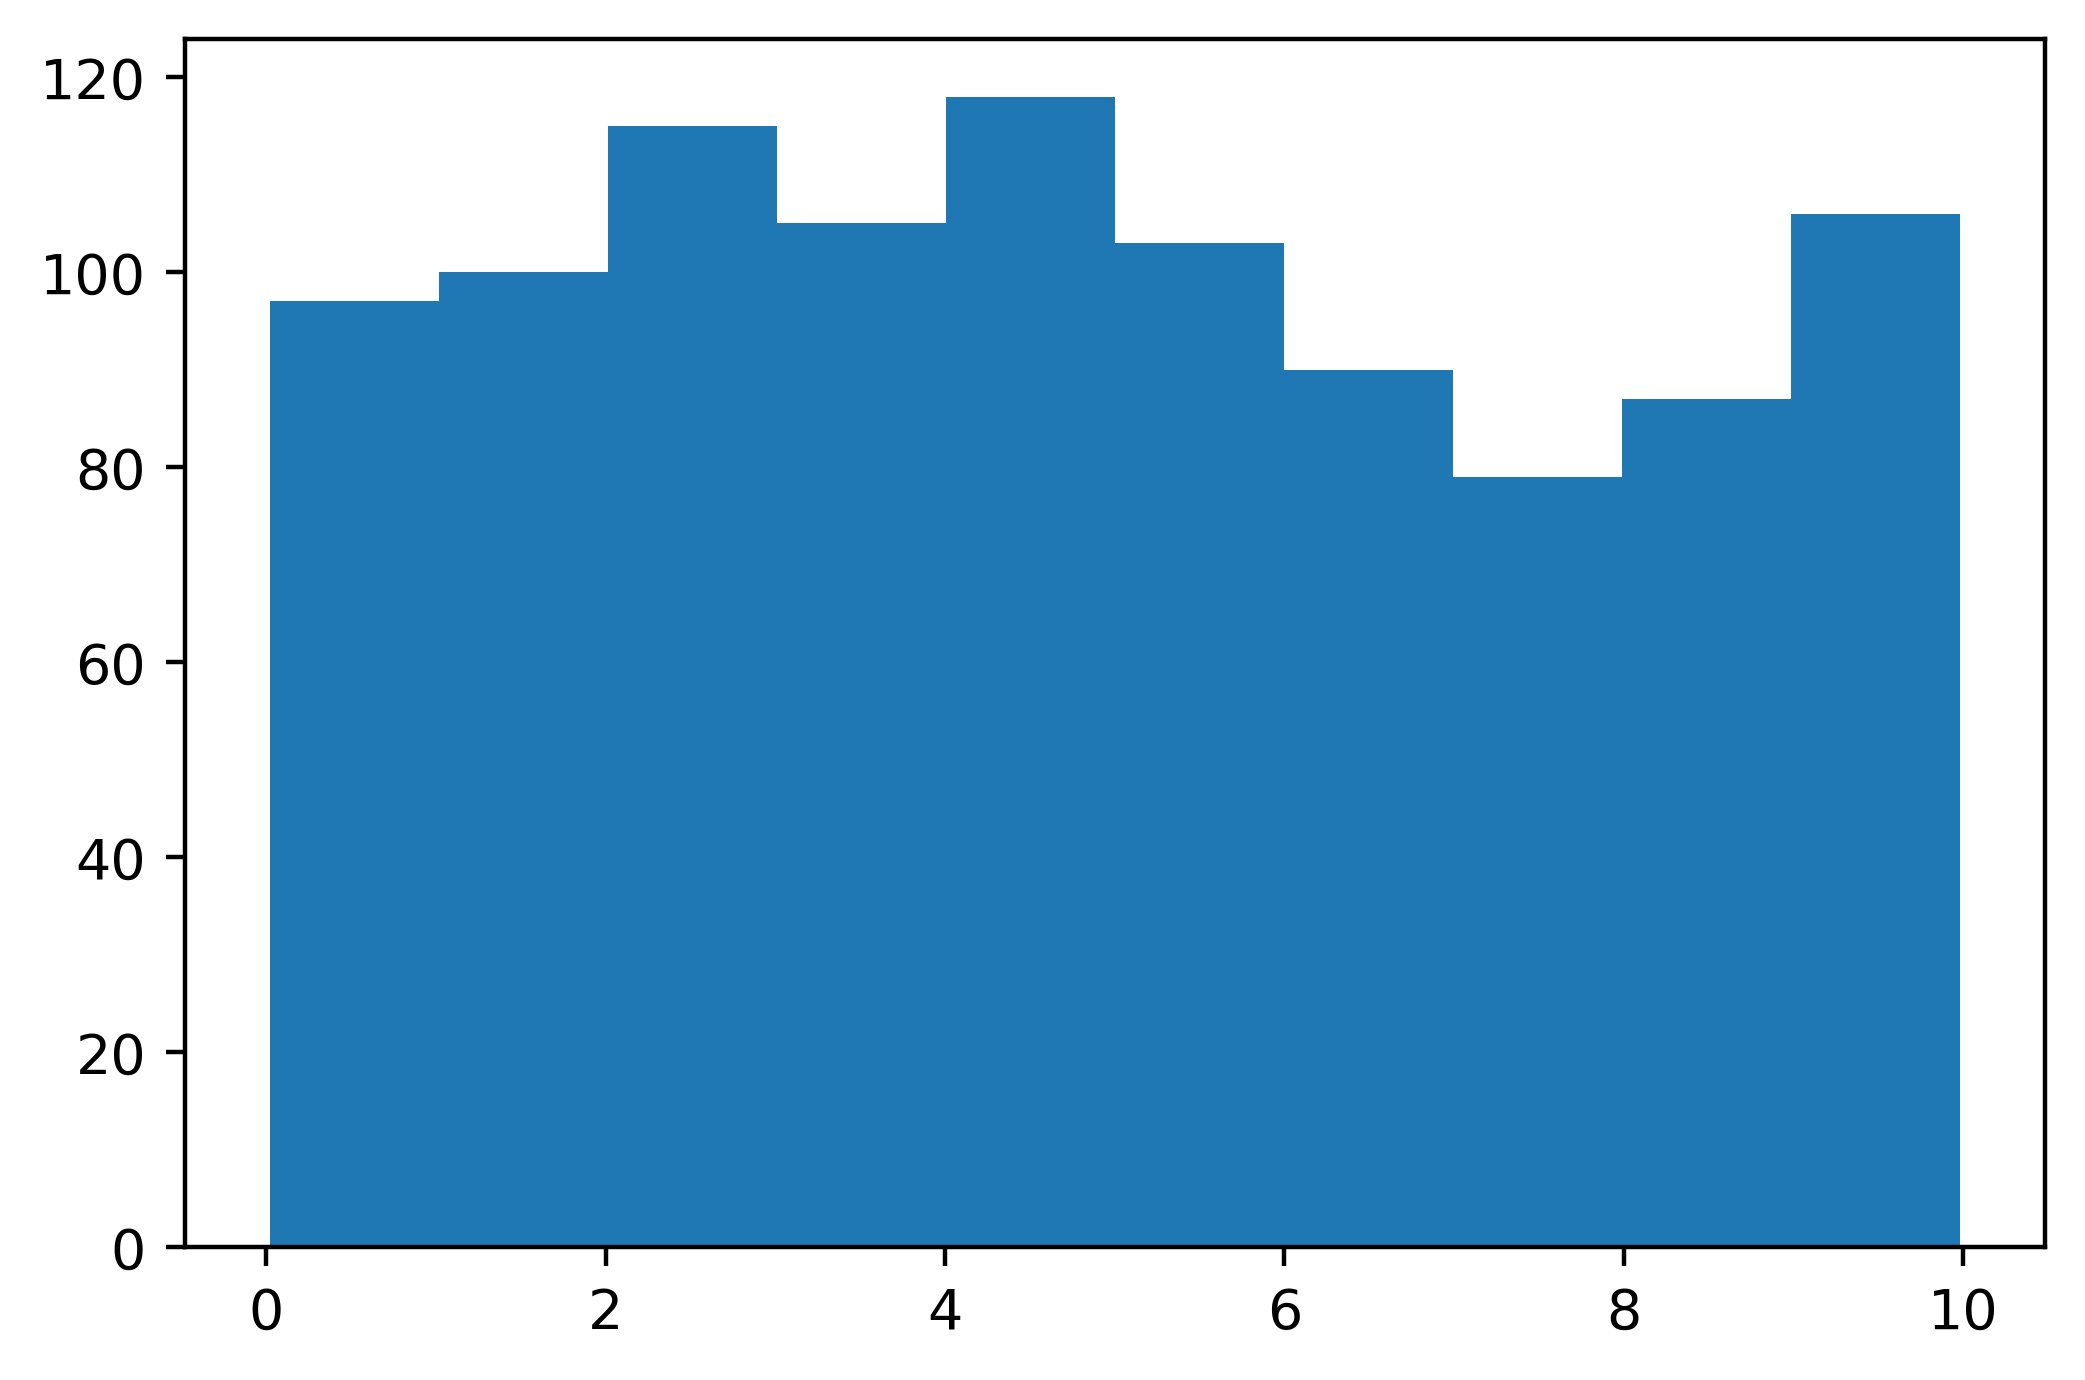

In [66]:
np.random.seed (seed= 2)
X = np.random.uniform (low=0.0, high=10.0,  size = (1000, 1) )
plt.hist (X)

#### Create response variable in line with linear regression assumptions


In [83]:
np.random.seed (seed=1)
slope = 0.25
intercept = -1.25
scatter = np.random.normal ( loc=0.0, scale = 1.0, size = (1000, 1)  ) # scale is sd
y = intercept + slope * X + scatter 

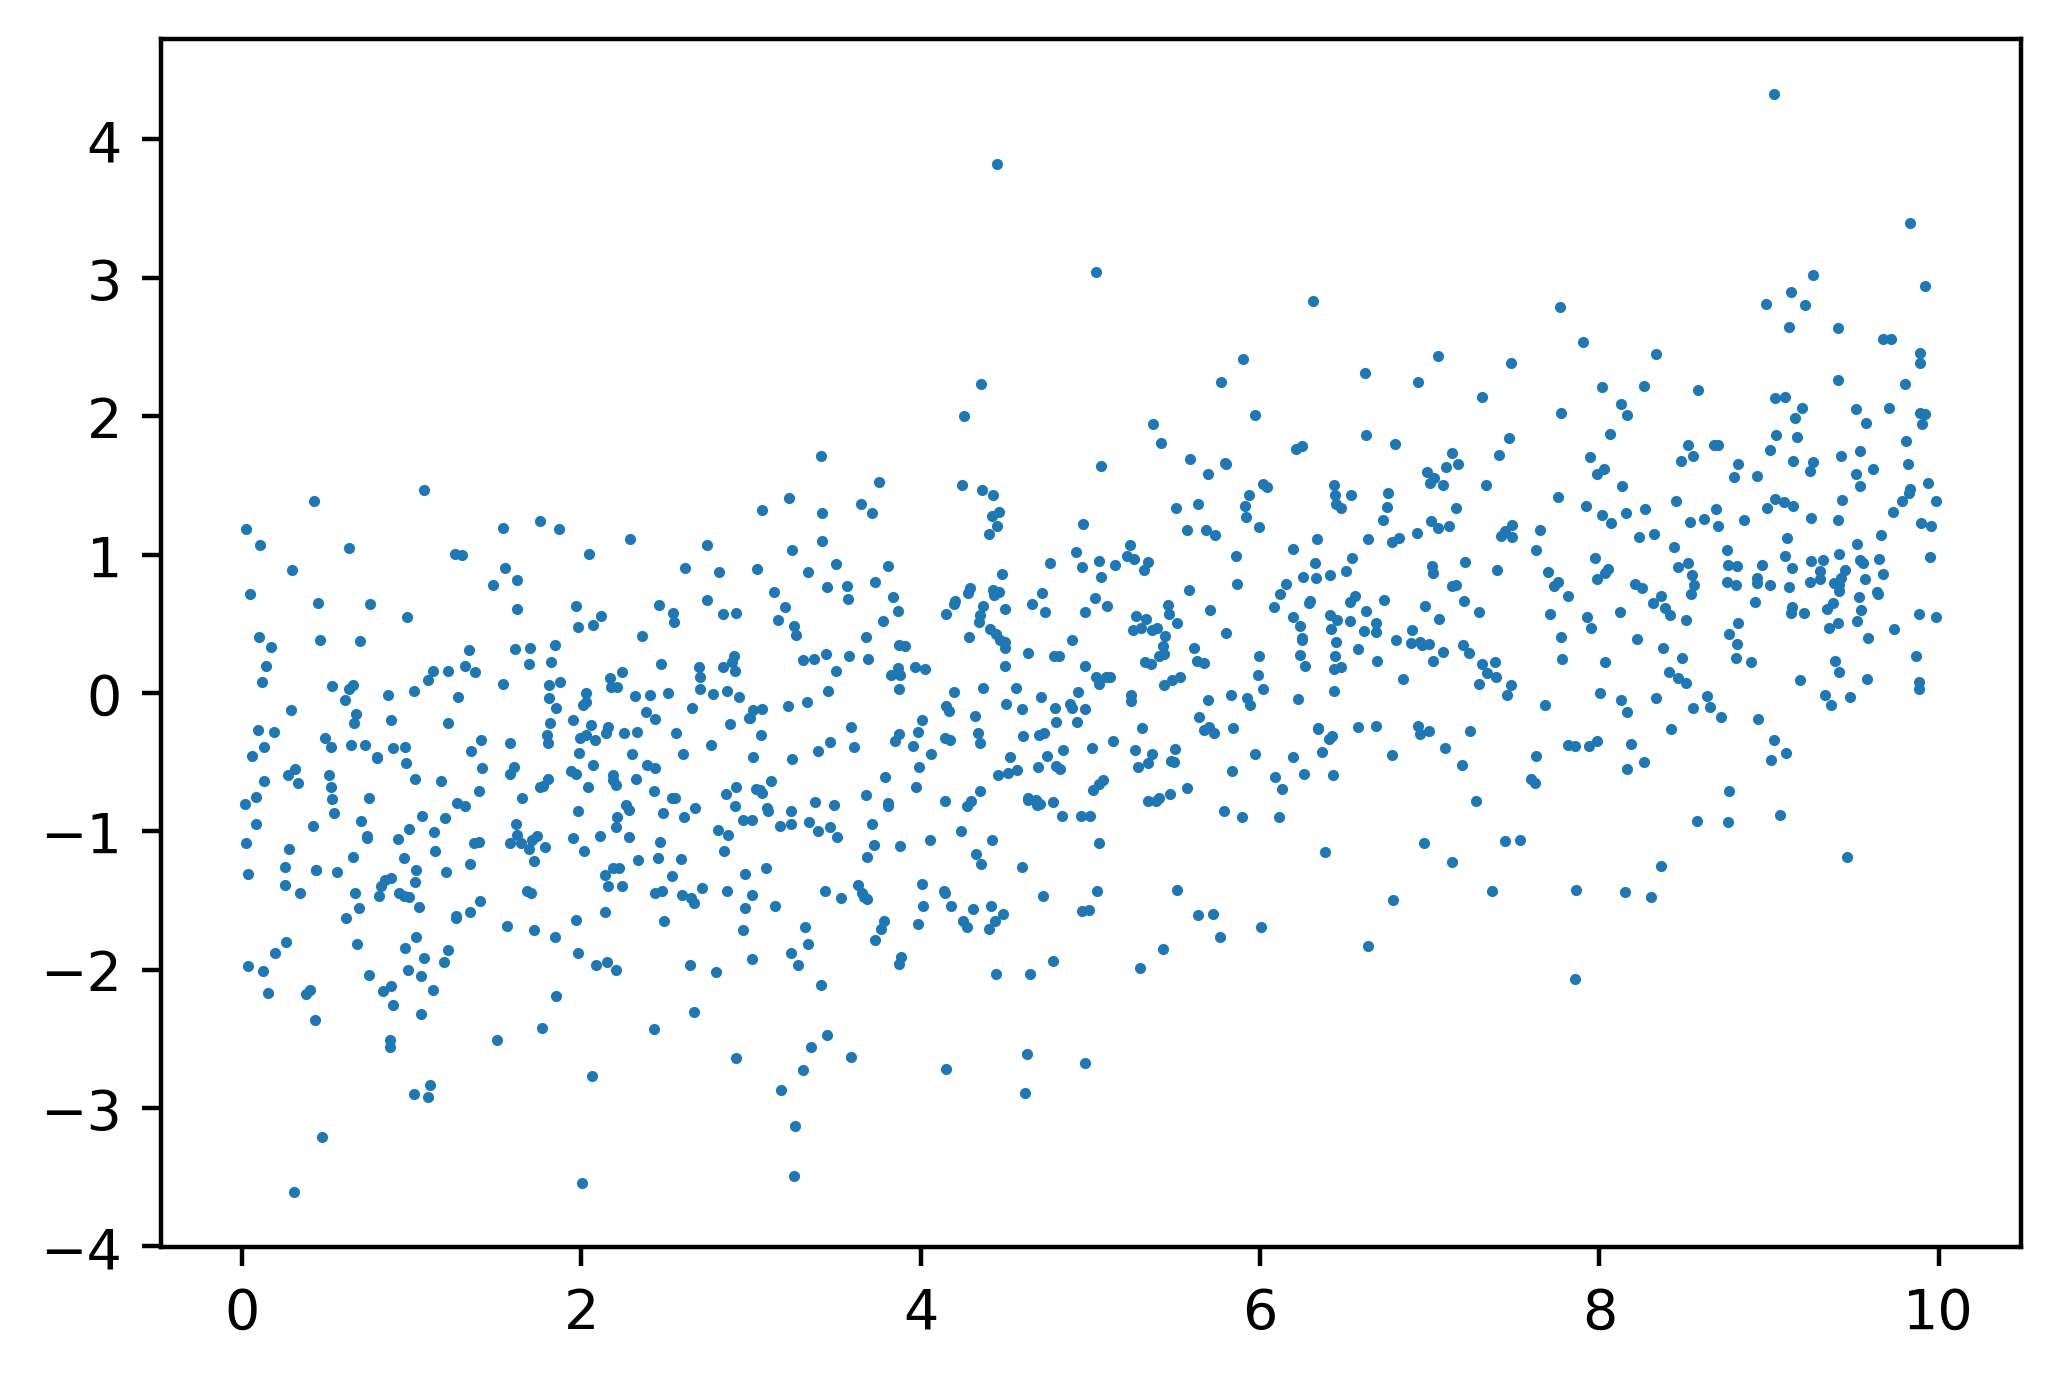

In [81]:
mpl.rcParams ['figure.dpi']
plt.scatter (X, y, s=1)

##### Run a linear regression

In [85]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression () 
lin_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
lin_reg.fit ( X.reshape (-1, 1), y )
print ( lin_reg.intercept_)
print ( lin_reg.coef_)

[-1.14344172]
[[0.23610076]]


#### Make some predictions

In [93]:
X_new = np.random.uniform ( low=0.0, high=10.0,  size = (1000, 1) ) 
y_pred =lin_reg.predict ( X_new.reshape (-1, 1) )
y_pred [0:10]

array([[ 0.39259592],
       [ 0.07272277],
       [ 0.84731291],
       [-0.83240159],
       [-0.5508128 ],
       [ 0.26733455],
       [ 0.33269515],
       [-0.16930394],
       [ 0.98286327],
       [ 0.76962379]])

##### Consider model performance

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (
    df['EDUCATION'].values.reshape ( -1,1), 
    df['default payment next month'].values ,
    test_size=0.2,
    random_state= 24)
    
print  (X_train.shape)
print  (y_train.shape)
print  (X_test.shape)
print  (y_test.shape)

(21331, 1)
(21331,)
(5333, 1)
(5333,)


In [110]:
print (np.mean ( y_train))
print (np.mean ( y_test))

0.223102526838873
0.21657603600225014


#### Don't forget to do out of time testing!!!

Classification Accuracy

In [117]:
from sklearn.linear_model import LogisticRegression
lr_mod = LogisticRegression()
lr_mod

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [119]:
lr_mod.fit ( X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

###### Check the model accuracy manually

In [125]:
y_pred = lr_mod.predict (X_test)
y_pred[1:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [126]:
is_correct = y_pred == y_test
np.mean (is_correct)

0.7834239639977498

In [127]:
lr_mod.score (X_test, y_test)

0.7834239639977498

In [128]:
from sklearn import metrics
metrics.accuracy_score (y_test, y_pred)

0.7834239639977498

### Manually calculate TP, FN, FP, TN

In [151]:
type  (( X_test == 1  ) & (y_test ==1 ))


numpy.ndarray

In [163]:
TP = sum ( (y_test == 1 ) & (y_pred==1) ) 
FN = sum ( (y_test == 0 ) & (y_pred==1) ) 

FP = sum ( (y_test == 1 ) & (y_pred==1) ) 
TN = sum ( (y_test == 0 ) & (y_pred==0) ) 

P = sum ( y_test == 1 ) 
N = sum ( y_test == 0 ) 


4178

#### Manually calculate true positives
True values correctly classified

In [155]:
TP / P

0.0

 #### Manually calculate false negative rate

In [159]:
FN / P

0.0


#### Manually calculate true  negative rate

In [166]:
TN / N

1.0

 #### Manually calculate false positive rate

In [167]:
FP / N

0.0

### Create a confusion matrix

In [168]:
metrics.confusion_matrix ( y_test, y_pred)

array([[4178,    0],
       [1155,    0]], dtype=int64)

##### Predictions from Logistic Regression
Default threshold probability is 0.5

(array([1883.,    0.,    0., 2519.,    0.,    0.,  849.,    0.,    0.,
          82.]),
 array([0.20959039, 0.2145797 , 0.21956901, 0.22455832, 0.22954762,
        0.23453693, 0.23952624, 0.24451555, 0.24950485, 0.25449416,
        0.25948347]),
 <a list of 10 Patch objects>)

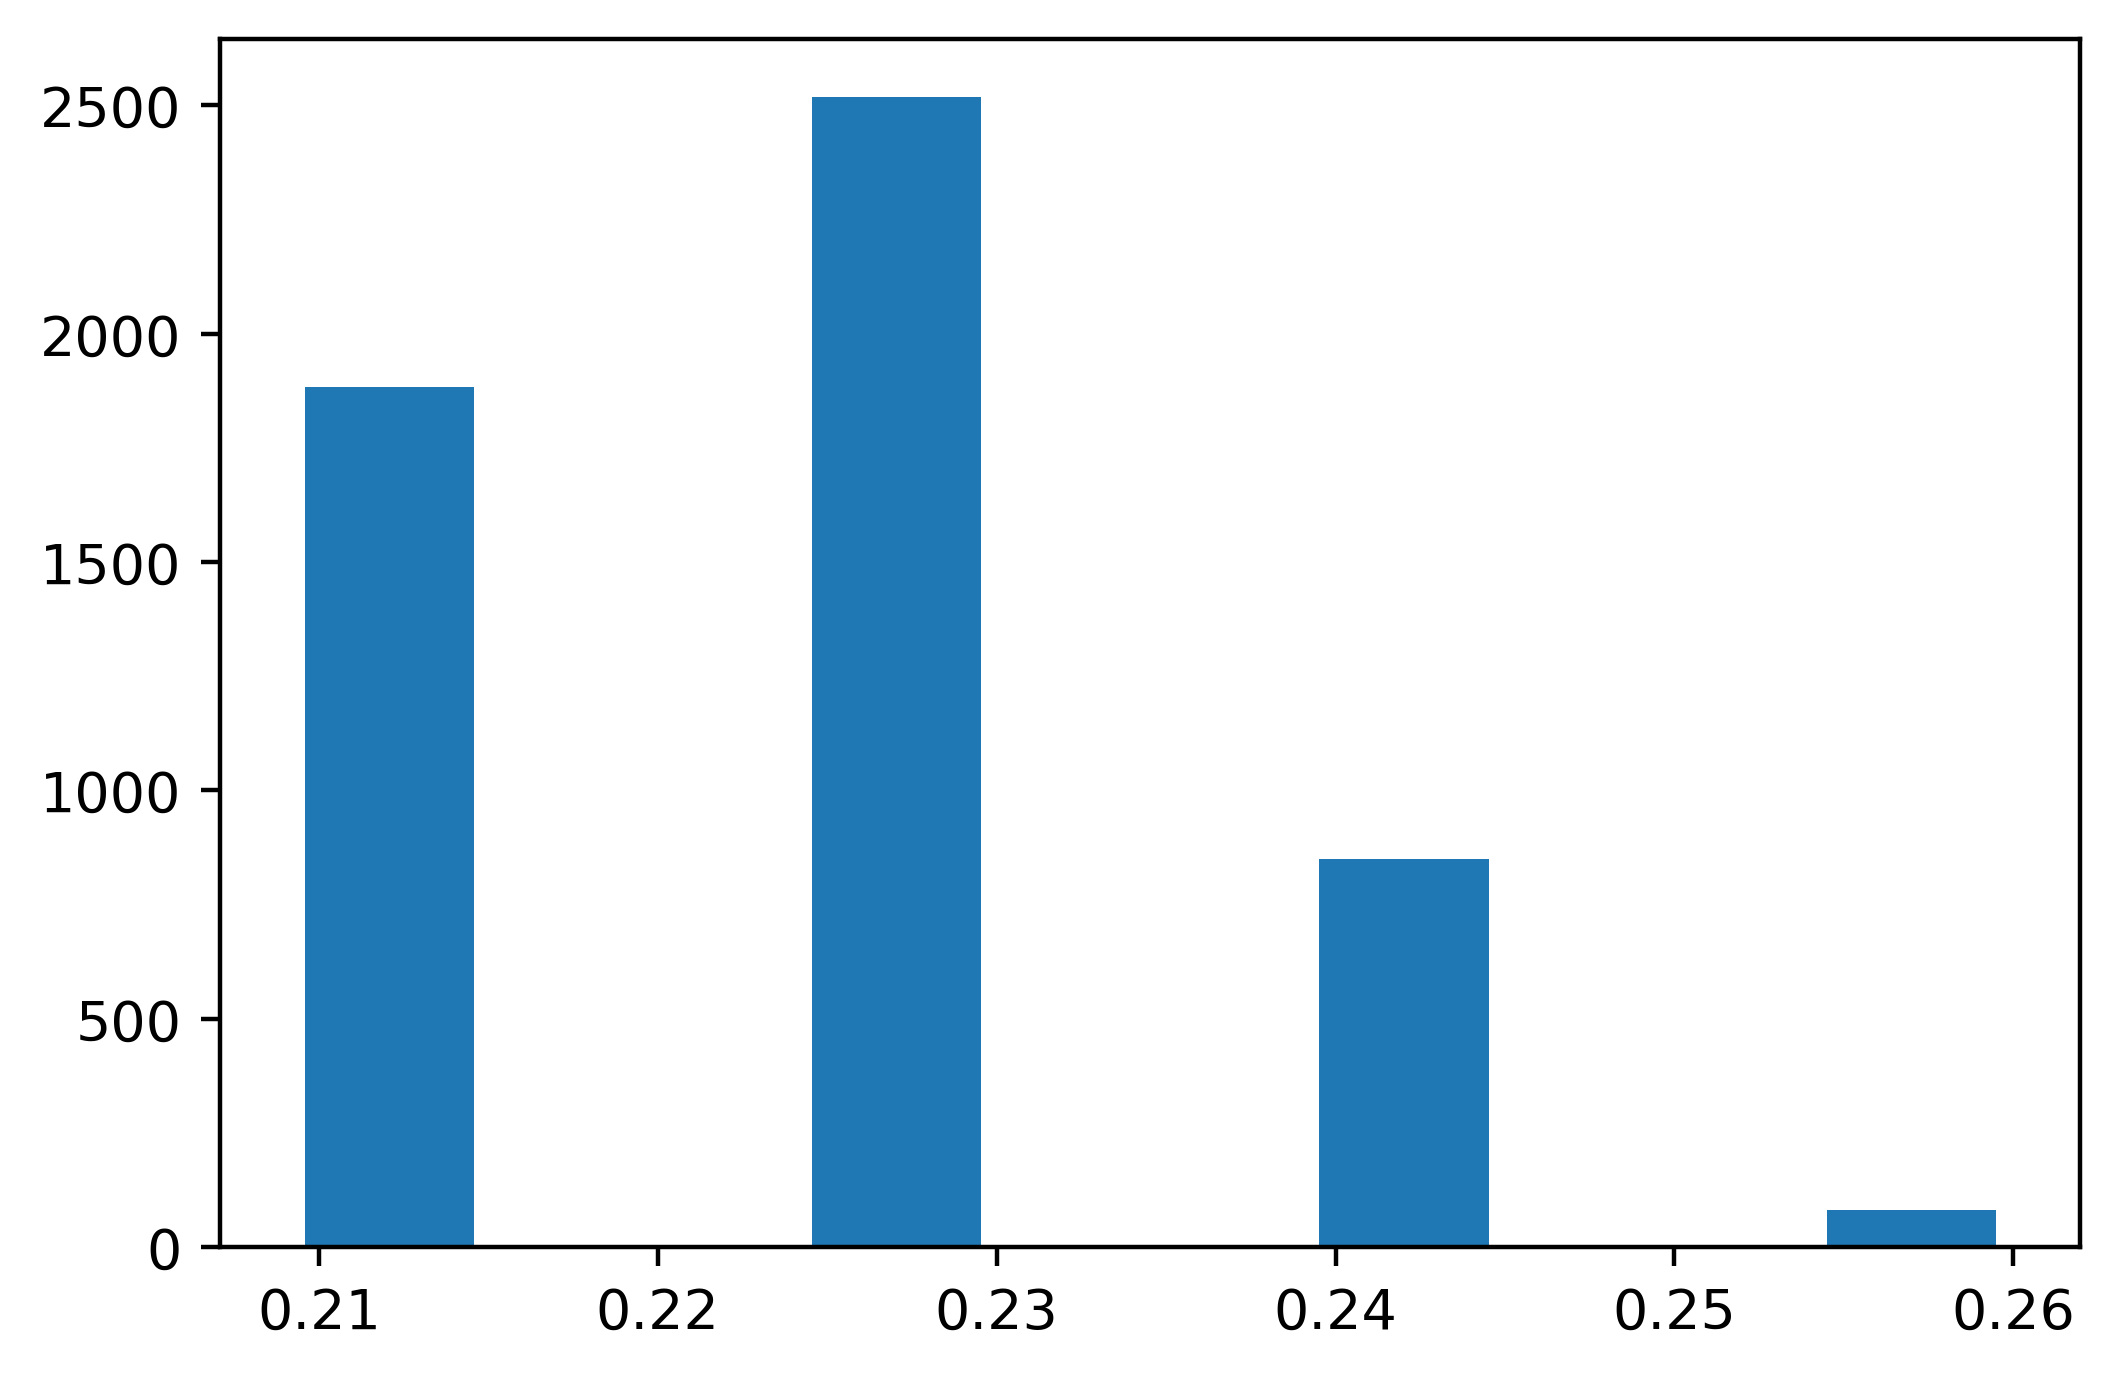

In [177]:
y_pred_prob = lr_mod.predict_proba (X_test)
pos_prob = y_pred_prob [:, 1]
plt.hist (pos_prob)

#### Visualise the actual classes of this set of predictions

In [180]:
pos_prob

array([0.22539786, 0.22539786, 0.20959039, ..., 0.20959039, 0.20959039,
       0.20959039])

In [183]:
pos_class_pos_proba = pos_prob [ y_test==1 ]
neg_class_pos_proba = pos_prob [ y_test==0 ]


4178

Text(0, 0.5, 'Number of test samples')

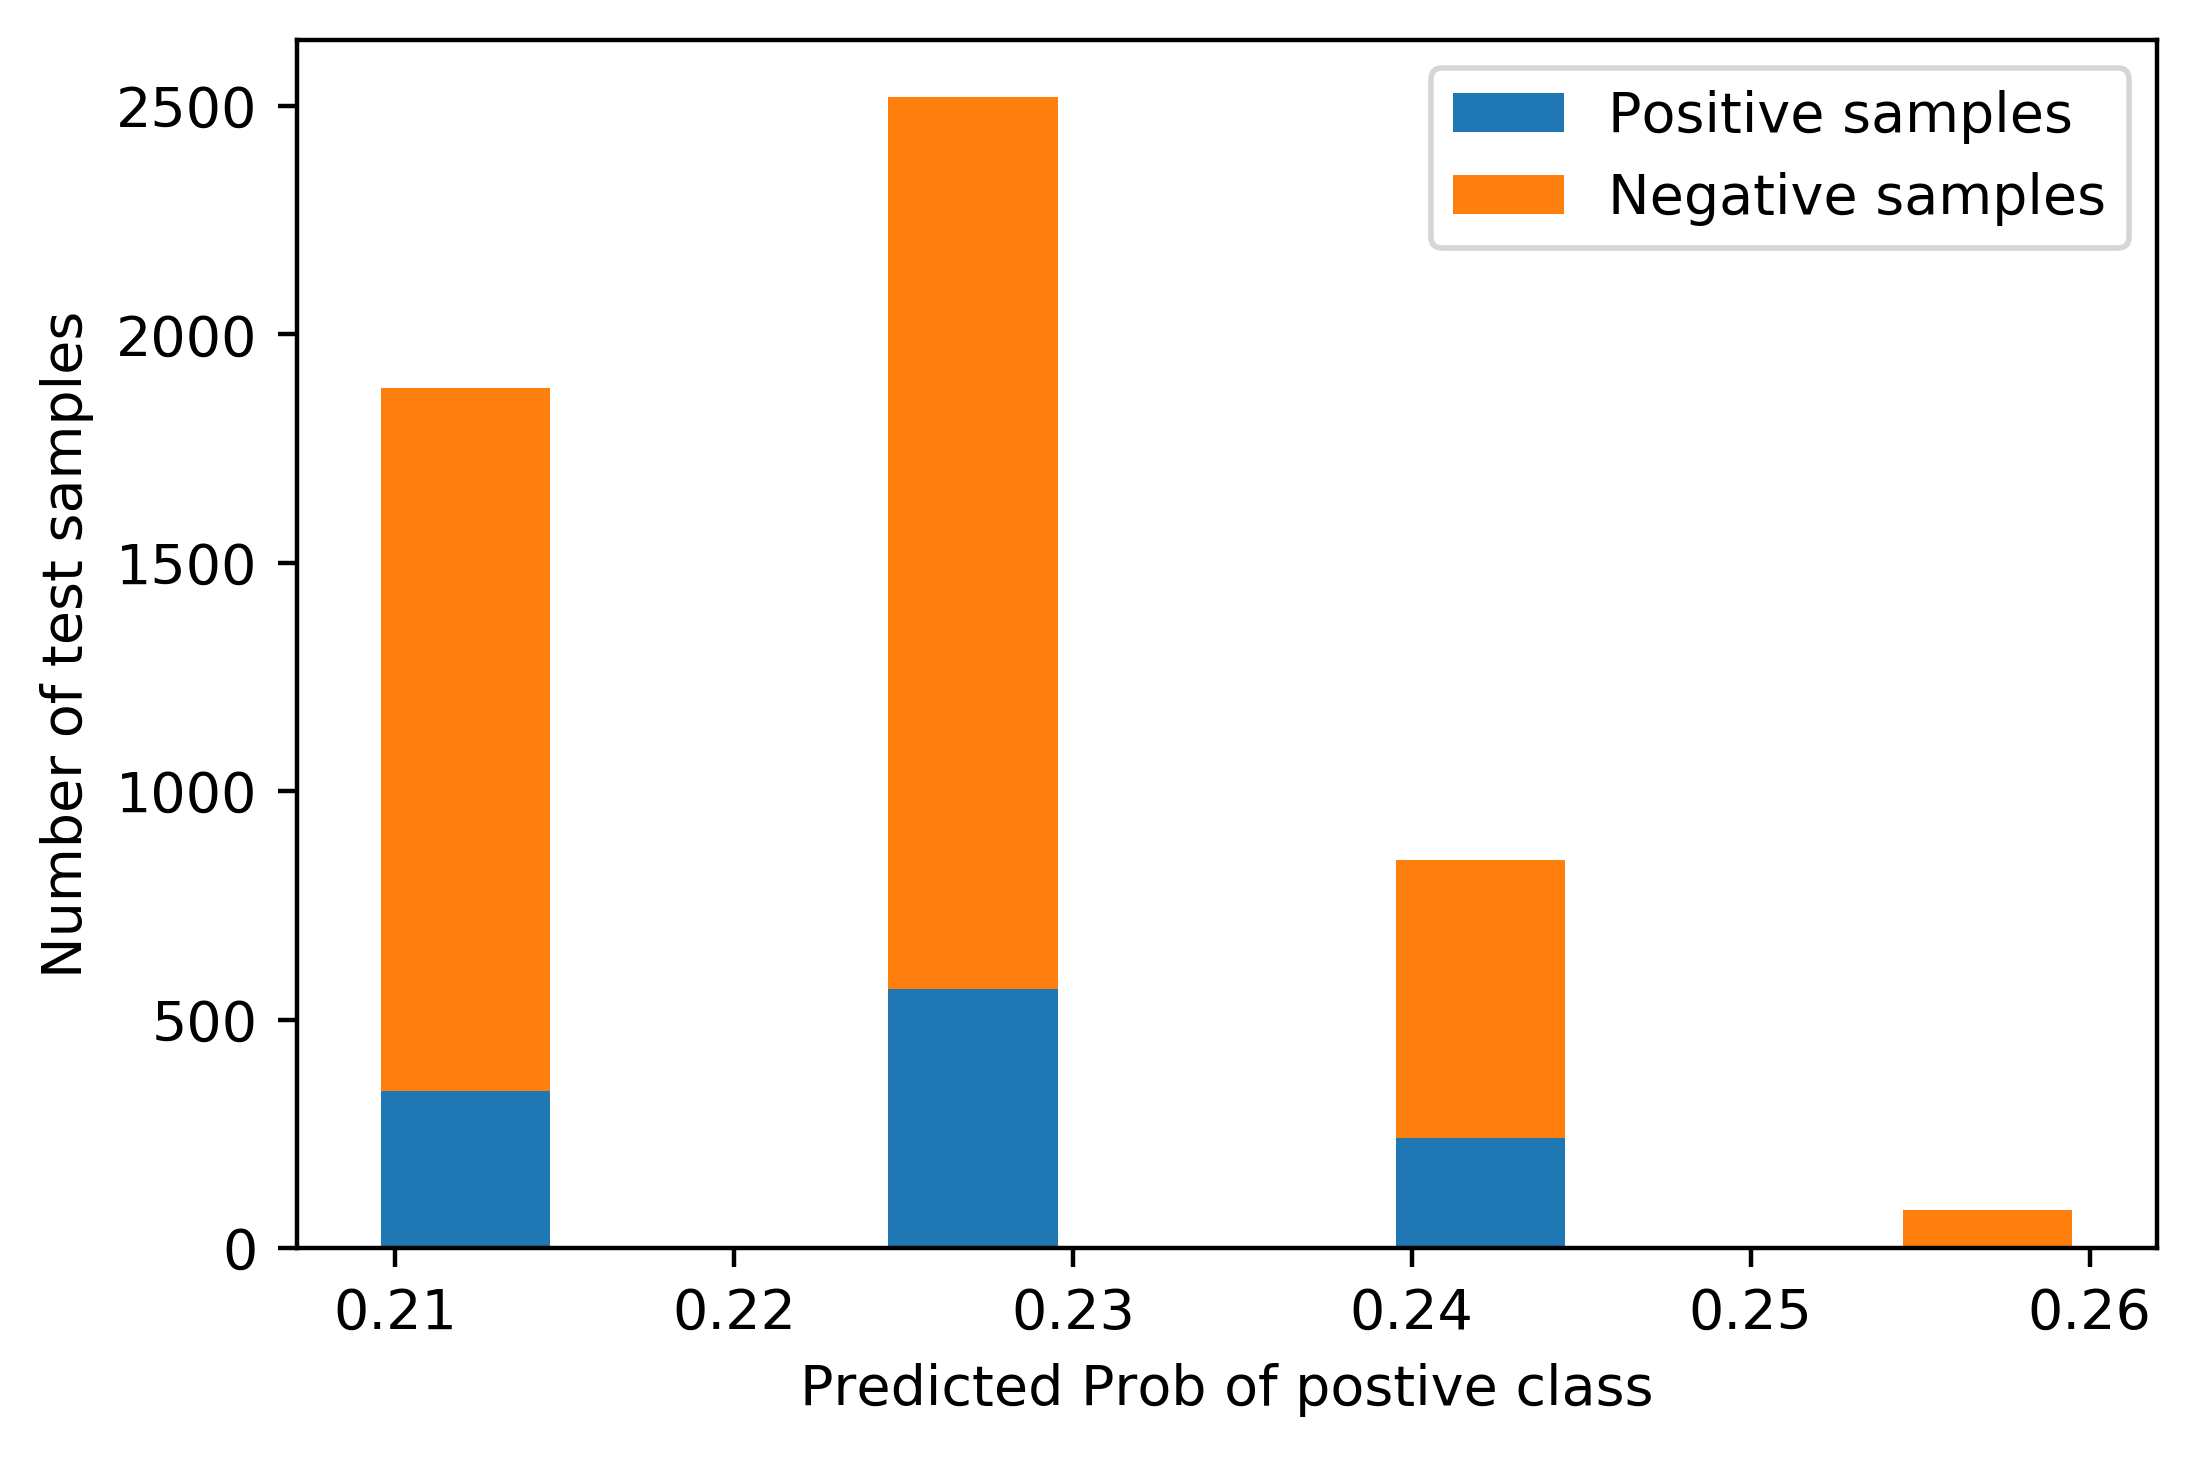

In [185]:
plt.hist ( [pos_class_pos_proba,neg_class_pos_proba], histtype='barstacked')
plt.legend  (['Positive samples', 'Negative samples'])
plt.xlabel ('Predicted Prob of postive class')
plt.ylabel ('Number of test samples')

#### Where to put the threshold (currently 0.5)


In [204]:
fpr, tpr, thresholds = metrics.roc_curve ( y_test, pos_prob)
thresholds

array([1.25948347, 0.25948347, 0.24203246, 0.22539786, 0.20959039])

Text(0, 0.5, 'TPR')

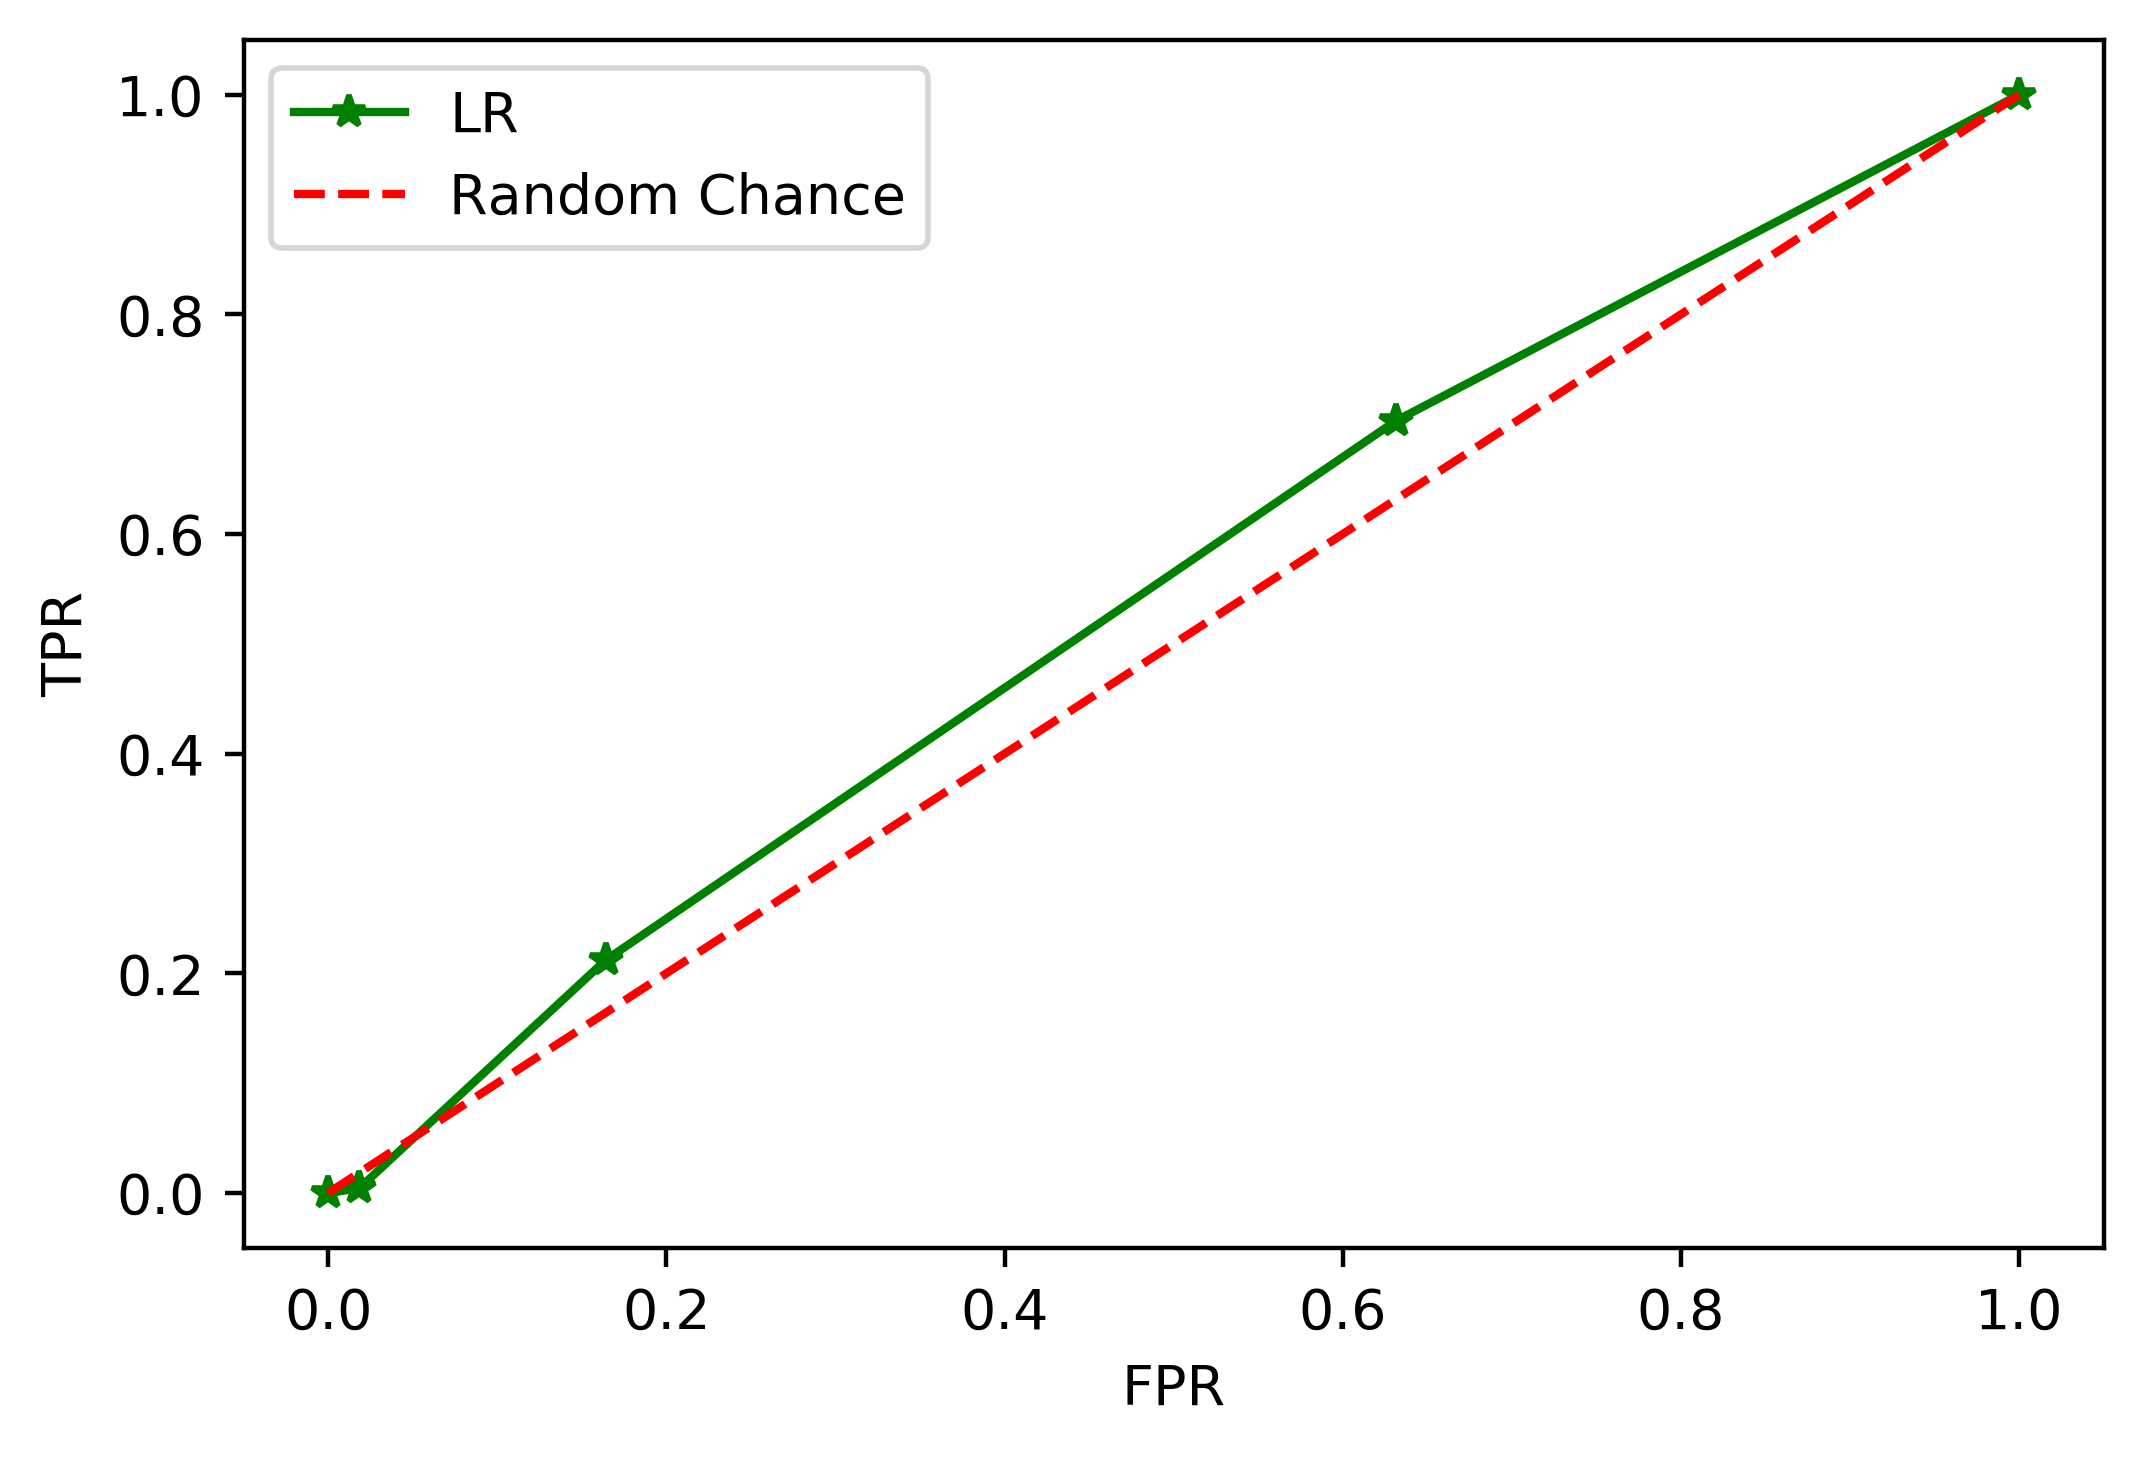

In [203]:
plt.plot (fpr, tpr, 'g*-')
plt.plot ( [0,1], [0,1], 'r--')
plt.legend (['LR'data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAACF8AAAWxCAYAAABK+a/lAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAA9hAAAPYQB1ayvdAAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjMsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+AADFEAAAgAElEQVR4nOzdeViVZf7H8c8DKIiCKLmkUi5puWBuKag1ppbZlJZaNvbLanAZW0Yd2zVxySUrK7VMU0YzrVBrdMIWRySX3HNJVNxFcVcUlJ3z/P5walIOyznPgcPyfl2Xf3Qv3/vrNchY58N9G6ZpCgAAAAAAAAAAAAAAAM7xcHcDAAAAAAAAAAAAAAAAJRnhCwAAAAAAAAAAAAAAAAsIXwAAAAAAAAAAAAAAAFhA+AIAAAAAAAAAAAAAAMACwhcAAAAAAAAAAAAAAAAWEL4AAAAAAAAAAAAAAACwgPAFAAAAAAAAAAAAAACABYQvAAAAAAAAAAAAAAAALCB8AQAAAAAAAAAAAAAAYAHhCwAAAAAAAAAAAAAAAAsIXwAAAAAAAAAAAAAAAFhA+AIAAAAAAAAAAAAAAMACwhcAAAAAAAAAAAAAAAAWEL4AAAAAAAAAAAAAAACwgPAFAAAAAAAAAAAAAACABYQvAAAAAAAAAAAAAAAALCB8AQAAAAAAAAAAAAAAYAHhCwAAAAAAAAAAAAAAAAsIXwAAAAAAAAAAAAAAAFhA+AIAAAAAAAAAAAAAAMACwhcAAAAAAAAAAAAAAAAWEL4AAAAAAAAAAAAAAACwgPAFAAAAAAAAAAAAAACABYQvAAAAAAAAAAAAAAAALCB8AQAAAAAAAAAAAAAAYAHhCwAAAAAAAAAAAAAAAAsIXwAAAAAAAAAAAAAAAFhA+AIAAAAAAAAAAAAAAMACwhcAAAAAAAAAAAAAAAAWEL4AAAAAAAAAAAAAAACwgPAFAAAAAAAAAAAAAACABYQvAAAAAAAAAAAAAAAALCB8AQAAAAAAAAAAAAAAYAHhCwAAAAAAAAAAAAAAAAsIXwAAAAAAAAAAAAAAAFhA+AIAAAAAAAAAAAAAAMACL3c3AMAawzBulvTQDcOHJaW4oR0AAAAAAAAAAAAAcCVfSfVvGPvWNM1T7mgmN4QvgJLvIUmz3d0EAAAAAAAAAAAAABSRQZI+dXcTf8SzIwAAAAAAAAAAAAAAABYQvgAAAAAAAAAAAAAAALCA8AUAAAAAAAAAAAAAAIAFXu5uAIBlh28cmDVrloKDg93RCwAAAAAAAAAAAAC4zK+//qrBgwffOJzjM1J3I3wBlHwpNw4EBwcrNDTUHb0AAAAAAAAAAAAAQGHL8Rmpu/HsCAAAAAAAAAAAAAAAgAWELwAAAAAAAAAAAAAAACwgfAEAAAAAAAAAAAAAAGAB4QsAAAAAAAAAAAAAAAALCF8AAAAAAAAAAAAAAABYQPgCAAAAAAAAAAAAAADAAsIXAAAAAAAAAAAAAAAAFhC+AAAAAAAAAAAAAAAAsIDwBQAAAAAAAAAAAAAAgAWELwAAAAAAAAAAAAAAACwgfAEAAAAAAAAAAAAAAGAB4QsAAAAAAAAAAAAAAAALCF8AAAAAAAAAAAAAAABYQPgCAAAAAAAAAAAAAADAAsIXAAAAAAAAAAAAAAAAFhC+AAAAAAAAAAAAAAAAsIDwBQAAAAAAAAAAAAAAgAWELwAAAAAAAAAAAAAAACwgfAEAAAAAAAAAAAAAAGAB4QsAAAAAAAAAAAAAAAALCF8AAAAAAAAAAAAAAABY4OXuBgCULqZpKi0tTcnJycrKylJ2drZsNptM03R3awAAACgEhmHIw8NDnp6e8vb2lr+/v8qVK+futgAAAAAAAIAiRfgCgGU2m01Xr17VlStXlJycrOzsbHe3BAAAADc5e/asfHx85O/vTxADAAAAAAAAZQbhCwCWXLlyRSdPniRwAQAAgN+lpaUpLS1NZ8+eVZUqVVSjRg0ZhuHutgAAAAAAAIBCQ/gCgFNM09TFixd19uxZd7cCAACAYiwxMVGSCGAAAAAAAACgVCN8AcBhpmnq1KlTunz5srtbAQAAQAlAAAMAAAAAAAClHeELAA67fPlygYIXhmHIy8tLHh4e8vDwKILOAAAAUNRsNpuys7OVlZWV57rfAhg1a9YsirYAAAAAAACAIkX4AoBDMjMzdebMmVznvby8VKlSJfn5+cnX15fQBQAAQBmRlZWl5ORkJSUlKSUlxe6axMREBQYGqly5ckXcHQAAAAAAAFC4CF8AcEhiYqJsNpvduerVq6tq1apcJQ0AAFAGeXl5qUqVKqpSpYqSk5OVkJAg0zRzrEtKSlJgYKAbOgQAAAAAAAAKDz+SDsAhV65csTteq1YtBQYGErwAAACA/Pz8VLt2bbtzycnJRdwNAAAAAAAAUPgIXwAosIyMDKWnp+cYr1ixoipXruyGjgAAAFBc/fYM3Y1SU1OVmZnpho4AAAAAAACAwsOzIyiVDMOoL+lOSbdIqiQpQ9JFSXGStpmmmerG9kqs3G698Pf3L+JOAAAAUBL4+/srJSUlxzhPjwAAAAAAAKC0IXxRhhmGUU9SG0mt//Crip2l95qmGVOErTnFMIxASUMkPSOpQR5L0wzD+EHSdNM0VxVFb6WFvVsvJKlSpUpF3AkAAABKAj8/P50+fTrHeG5/rwQAAAAAAABKKsIXZYQDQYsSyTCMv0p6VwX7PflI6impp2EYUZIGmaZ5sjD7Ky2ys7NzjHl5ecnLi28lAAAAyOm3vytmZWVdN26z2dzUEQAAAAAAQOHq+WVP7Ti947qxFjVbaNkTy9zUEYoKn5iWHdslVXZ3E65mGIaHpJmSBjlZ4s+SthmG8WfTNH9xXWelk73whaenpxs6AQAAQEnh6emZI3xh7++VAAAAAAAAJV1CUoKWxy3PMR5/OV4JSQmq7V/bDV2hqHi4uwHAoo+Ue/DCJmmPpGhJP0tKzGVdTUk/GobR2PXtlS6maeYY8/Dg2wgAAAByZ+/vi/b+XgkAAAAAAFDSLdmzJNe5pXuXFmEncAc+NUWJ9d+nRv5mZypd0jhJN5um2dQ0zS6maXaQdJOk+yVtsbMnUNJSwzAqFlrDAAAAAAAAAAAAAEqtxXsWOzWH0oHwRdkWL+kbSSMlPSCpjXvbKTjDMGpKet/OVKKkjqZphpumefaPE6Zp2kzTXCmpvaR5dvY2ljTa1b0CAAAAAAAAAAAAKN0SkhK0/vj6XOfXxa9TQlJCEXaEokb4ouz4LWgxSlJ3SdVM07zVNM1epmlONE3zB0kX3NqhY8ZJ8r9hzCapt2maW/PaaJpmlqQwSavsTA8zDOMW17QIAAAAAAAAAAAAoCzI68mR3/D0SOlG+KKMME2z+X+DFhNM0/zeNM3z7u7JWYZh3Cypv52p2aZpri5IDdM0bZIGSEq7Yaq8pBHWOgQAAAAAAAAAAABQlhTkWRGeHindCF+gJHpGkvcNY5mSJjhSxDTNo5Lm25nqbxjGjfUBAAAAAAAAAAAAIIf8nhz5DU+PlG6EL1AS/cXO2HemaZ5wotandsYCdO1pFgAAAAAAAAAAAADIU0GeHPkNT4+UXoQvUKIYhlFbUrCdKae+S5mmuU3SUTtTDzpTDwAAAAAAAAAAAEDZ4shzIjw9Unp5ubsBwEGdcxlfZaHmKklhBTwHAAAAAAAAAAAAQCl3KvmUekX2ynedaZralLCpwHXXxa9TyJwQGYaR79qvH/9aN/vdXODacC/CFyhp2tgZO2mappXHkTYrZ/iigWEYAaZpXrJQFwAAAAAAAAAAAEAJtCxumTae2FgotQsa1lget1yD2wwulB7gejw7gpKmuZ2xXy3WzG2/vbMAAAAAAAAAAAAAlHLf7PvG3S0Uix5QcIQvUNLcZmfsoMWaue1vYLEuAAAAAAAAAAAAgBLmUtolRR+Jdncbij4Srctpl93dBgqI8AVKDMMwykmqZWfKypMjMk3znKQMO1N1rdQFAAAAAAAAAAAAUPKsOLBCWbYsh/eVz5JeXidVSndNH5m2TK04sMI1xVDovNzdAOCAQNkPDJ1xQe2zkurcMFbNBXXzZRhGqMUSzVzSCIDfjRkzRmPHjs0xbpqmW87NS4UKFeTv76/KlSurTp06atmypVq1aqVu3bopMDCwkDoFAAAAAAAAAKD0CqwQqACfAF1Ku1TgPe2OS3OXS03PSXWSpKEPWu8jwCdAVStUtV4IRYLwBUqS3L6zuOKunSQ7Y0X1qeXPRXQOgFIoNTVVqampOnPmjPbv36/o6GvXoJUvX149evTQiBEjFBIS4uYuAQAAAAAAAAAoObrd1k27/rZLzyx7Jt/nR3wzpLeipaEb//dT5C9slr5qJv18i/M9dK7XWfMfma86/jf+/DiKK54dQUlSKZfxKy6oba9GRRfUBdTzy5669YNbr/vV88ue7m4LpVxGRoaWLFmiDh06aOjQoUpJSXF3SwAAAAAAAAAAlBhBlYO08qmVmnr/VJX3LG93TefD0q8fS8M3Xv/Bu4ekucsk70zHz/X29NbU+6dq5VMrCV6UMIQvUJKUy2Xc8QeXcrL3rc/+d1HAAQlJCVoet1zxl+Ov+7U8brkSkhLc3R7KAJvNpmnTpqlHjx7KyMhwdzsAAAAAAAAAAJQYHoaHhocO19aBWxVcPfj38cqp0qfLpFWfSfVzeZnkjgvSm2scO695jebaOmirhocOl4fBR/klDc+OoCTxzGU82wW17dXgzwcsW7JnSa5zS/cu1d/b/b0Iu0FJtWHDhlznUlJSlJiYqN27dysmJkYxMTF2161atUphYWFasGBBIXUJAAAAAAAAAEDp1LR6U73W4TW98N0Lumd7oj6OkmoV4G7+V9dJS5pIO27Oe50hQy+1f0nj7x0vby9v1zSNIseHyyhJcrvhwhVfx/ZqOHERkFPaW9zfTNJsVzQC11u8Z3Gec4QvUBAhISH5rundu7fCw8O1Z88ehYWFaePGjTnWfP755xoyZIjat7f6bQcAAAAAAAAAgNLPNE19f/B7jYweqYSD2/XJCunxPQXf72VKEcuktgOlrFx+zDzIP0ifPfqZOtXt5JKe4T6EL1CSpOcynttzJI6w98RIbue5lGmauf9IewEYhuGqVuBiCUkJWn98fa7z6+LXKSEpQbX9axdhVyjtmjRpojVr1qh79+5atWpVjvnw8HCtXLnSDZ0BAAAAAAAAAFByrD22Vm9Ev6F1x9bp/3ZJK7+XAlMdr+NhSjWuSAmV7c8/2+JZghelBA/FoCRJzmXc3wW1/eyMJbmgLsqwvJ4c+c3SvUuLoBOUNeXKldOiRYvk6+ubYy4mJkZJSXx7AwAAAAAAAADAnm0nt6n7wu66Z949OrZrnVYslBZ843jwIt1TGnWv1GZQ7sELSVr460KZpmmtaRQLhC9QklzIZTzABbXtfcvL7TygQPJ6csSRNYAzqlevrqeeeirHeFZWlmJiYoq+IQAAAAAAAAAAirG95/bqscWPqc2nbfTD/u/13GYp9mOp+0HHa/1cR2o5WJrwp9yfG/nNocRD2nDC0kX5KCYIX6AkSZSUYWe8hpWihmF4SKpmZ+q0lboo2/J7cuQ3vz09AhSGrl272h2Pi4sr4k4AAAAAAAAAACiejl46qmeXPatmM5tpyZ4lanRe+mme9NEKyc/eJ5N5uFpO+vsD0t1/lfZWL/i+z3Z+5thBKJYIX6DEME3TJumYnalbLJauLcle5uyIxboowwry5MhveHoEhaVevXp2x8+fP1/EnQAAAAAAAAAAULycSj6lF1a8oEbTG2nejnkysmx6da20c6Z0d7zj9VbWl5o9J00PkWwOfgofGRup9Kx0xw9FsUL4AiXNATtjjSzWzG2/vbOAAnHkORGeHkFh8ff3tzt+8eLFIu4EAAAAAAAAAIDi4WLqRb32n9fUYFoDfbTlI2XaMnXnKWnTHGnyKskn27F6iT7Ssz2l+5+SjlZxrqfEtERFHYhybjOKDS93NwA4aLukB28Ya24YhmGapulkzRZ2xrIk7XayHkqpU8mn1CuyV77rTNPUpoRNBa67Ln6dQuaEyDCMfNd+/fjXutnv5gLXRtl2+fJlu+O+vr5F3AkAAAAAAAAAAO51JeOKPtj4gd75+R0lpSdJkrwzpTfXSK+uk7yc+KTx6zuk5/8snfbLOde5XmdJUvSR6ALVWrBrgXo1zv9zKBRfhC9Q0tj7RLuypCaSYp2sGWpnbKdpmtztg+ssi1umjSc2FkrtgoY1lsct1+A2gwulB5Q+hw4dsjtevboDD80BAAAAAAAAAFCCpWWl6ZOtn2ji2ok6l3Lu9/H28dLcZdIdFxyveaai9PyD0tImkm742VpvT29N6jJJQ0OGSpI+3PihXl/1utKz8/7oMWp/lC6kXFCgb6DjDaFY4NkRlDQxunYrxY26OVPMMAwvSZ3tTP3HmXoo3b7Z9427WygWPaDk+PHHH+2Ot2zZsog7AQAAAAAAAACgaGXZsjTnlzlqOL2hhv8w/PfgRcV06cMV0toI54IX8++UmjwvLW2qHMGL5jWaa+ugrRoeOlwehoc8DA8NDx2uLQO3KLh6cJ51M22ZioyNdLwhFBvcfIESxTTNZMMwfpLU5YapvpKmOlHyfkn2Xl9a7kQtOCEtK02HLtr/6fziJCk9qcDXQhWmVUdWaePxjfLztnN/VTHUoGoD+Xj5uLuNMunkyZNatGhRjvEKFSqoY8eObugIAAAAAAAAAIDCZzNtioyN1OjVo3Xg4oEc8x6m9Og+x28pyKh9s4Y8bCii5skcc4YMvdT+JY2/d7y8vbxzzAfXCNaWgVs0KnqU3tvwnkzlfOOkYdWG6ngL//2+JCN8gZLoc+UMX7Q1DKOtaZqbHaz1gp2xI6Zp/uxca3DUoYuH1GxmM3e3UWJk2bIUGmHvpZziafeQ3Wpavam72yhzMjIy9Je//EVpaWk55vr27St/f383dAUAAAAAAAAAQOExTVNRB6I0Mnqkdp3Zleu6ZB/pbw9JUTl/fjF3L7yg8hMn6v3yppKWh2nJniW/TwX5B+mzRz9Tp7qd8izh7eWtd+5/R39u9Gf1/6a/jicd/32uT5M+mttjrvy9+e/3JRnPjqBIGYYxzzAM086vug6U+UrSOTvjkx3spZOk7namZjhSBwCKk19//VUdOnTQmjVrcsz5+vpq3LhxbugKAAAAAAAAAIDCE3M0Rh0iOujhLx7OM3jxmxWNpIV5vwJyze23S2vXStOnS35+8vf2V2SfSL3f7X15eXjpyeAntWvIrnyDF3/UqW4n7RqyS/2C+8nLw0sfdPtAkX0iCV6UAtx8gRLHNM1UwzDeU86wxb2GYbxkmua7+dUwDOMmSfPsTJ2VNNt6lwDgOhs3bsx1LjU1VYmJidq9e7dWrVplN3QhSYZhaP78+QoKCiqsNgEAAAAAAAAAKFJbErZoZPRIrTy80uG9wx6Q7j8kVUuxM+npKb3yijR6tORz/fPqhmFoWMgwPdbkMdX2r+1U3wE+AVrYa6GmdJ3idA0UP4QvUFJ9IClMUsMbxqcYhmEzTXNqbhv/e8vGMkm32pl+1TTNK65qEgBcITTU2lMzvr6+ioiIUJ8+fVzUEQAAAAAAAAAA7hN7NlZvrn5T3+z7xuka5ytKU56oo3ciTlw/0aKFNHeu1KpVnvtdEZogeFG68OxIGWEYRt1cnvv4/ZekI7lsX53f3v8+4VFkTNNMl/SkpIwbpgxJ7xmG8bNhGP0Mw6hjGIaXYRiVDMNoZxjGO5J2S2pup+zXpmnOK9zOAaDoeHl56YknntDu3bvVt29fd7cDAAAAAAAAAIAlhxMPq/83/RU8M9hS8KJBlQZa2GuhJs8+Ij388LVBb29p4kRp8+Z8gxeAPdx8gRLLNM0thmGESZqvnEGi0P/+Kqgtkp51VW8A4G6+vr6aM2eO/vKXv7i7FQAAAAAAAAAALElIStBba97SnO1zlGXLcrpObb/aGv2n0Xq2xbMq51nu2uDMmVJWljR1qnTHHS7qGGUR4QuUaKZpfm4YRqakCEm+Tpb5UVJf0zSTXNcZALhXSkqK+vXrpx9//FGzZs1S+fLl3d0SAAAAAAAAAAAOOZ9yXm+ve1sztsxQWlaa3TW3n5P675RGdtG1O/LtCKwQqDfufkND2gxRhXIVrp+sXVtascK1jaNMInyBEs80za8Mw9gpabqkrg5svSxpjKRppmnaCqM3AHAF0zTtjqelpenixYuKjY1VVFSU5s+fr0uXLl23Zt68eTp37py++eYblStXrijaBQAAAAAAAADAkqT0JL2/4X29t+E9JWck213jlS29vF4K/0nyzpZ2V5e+aH79Gr/yfnqp/UsaFjJM/t7+RdA5yjLCF2XHKTn2DIej9hRkkWmaz0h6xtWHm6a5T9J9hmG0k/S0pPsl1VfOfNtVSRskfSNpgWma9r9bo8g0qNpAu4fsdncblpimqe6LuutE0gmX1AvyD9KKfitkGLnEM0uQBlUbuLuFUs3Hx0e1atVSrVq1dN9992nUqFF65plnFBUVdd26qKgo/eMf/9D06dPd1CkAAAAAAAAAAPlLzUzVx1s+1qR1k3Qh9UKu61qelOYul1qe/t/YtO+k/9SXzlWSfLx89GLbF/Vqh1cV6BtYBJ0DhC/KDNM00yVtdHcfhc00zU2SNkmSYRiVJNWRVElSpqSLkk6Yuf0IOdzCx8tHTas3dXcblqyPX++y4IUkHU86rqSMJLUPau+ymigbbrrpJi1btkw9e/bMEcCYMWOG7rvvPvXo0cNN3QEAAAAAAAAAYF9mdqYitkdo3JpxOpl8Mtd1PpnS6J+u3XjhdcMnfjelStN+MLRm0t806p5RquVXq5C7Bq7n4e4GgMJimuYV0zT3maa51TTNnaZpHid4gcLw2c7PSkRNlA2enp5atGiR6tatm2Nu8ODBSkpKKvqmAAAAAAAAAACwI9uWrYW7FuqOj+7Q36L+lmfwouMxaccn0uvrcgYvfvPEr6Y+zn6A4AXcgvAFAFiQlpWmyD2RLq8bGRup9Kx0l9dF2eDv76+ZM2fmGD99+rTGjRvnho4AAAAAAAAAAPgf0zS1bN8ytZjVQv/3zf/pcOLhXNdWSpdmRElr/yndnvtLJP8zZIh0+bLrmgUKiPAFAFgQtT9Kl9IuubxuYlqiog5E5b8QyMUDDzygBx98MMf4jBkzFB8f74aOAAAAAAAAAACQVh1epZC5IXrkq0e0++zuPNc+cECK/Uh6fosDB5w8Kb38srUmAScQvgAACxbsWlDgtZ3rdVbnep0LpTZgz6RJk2QYxnVj6enp3H4BAAAAAAAAAChyG09sVJfPuqjrgq7anLA5z7VVU6T5X0vfLZRucfQ1bcOQKlaUzFzeJgEKCeELAHDShZQLWnFgRb7rvD29NfX+qVr51EqtfGqlpt4/Vd6e3vnui9ofpQspBbk/C7CvefPm6t27d47x+fPn6/Dh3K9wAwAAAAAAAADAVXad2aWeX/ZU6NxQRR+JznuxKfWJlfZ8JPXf5cRhjRtL69dL779/LYQBFCHCFwDgpK9iv1KmLTPPNc1rNNfWQVs1PHS4PAwPeRgeGh46XFsGblFw9eA892baMhUZG+nKllEGjR49OsftF1lZWRo/frybOgIAAAAAAAAAlAUHLx7Uk18/qRaftNDyuOX5rq+ZLH39lbR4sVTjqoOHeXlJo0ZJ27dLoaHONQxYRPgCAJx09y13q2HVhnbnDBl6uf3L2jxgs5pVb5ZjPrhGsLYM3KKXQl+SIfvJy4ZVG6rjLR1d2jPKnuDgYD3yyCM5xhcsWKCDBw+6oSMAAAAAAAAAQGl2IumEBv97sO6YcYcW/bpIpvJ5/sOUnv1F2jtDenSfEwe2bi1t3SqNHy9553/zOFBYCF8AgJOCawRr66Ct6tOkz3XjQf5Bin46WlPumyJvr9z/T97by1vv3P+Oop+OVpB/0HVzfZr00dZBWxVcI+/bMYCCsHf7RXZ2NrdfAAAAAAAAAABc5tzVcxrxwwjdNu02zf5ltrLN7Hz31LsorfxMilguBaQ7eKCPj/T229LGjdKddzrXNOBChC8AwAJ/b39F9onU+93el5eHl54MflK7huxSp7qdClyjU91O2jVkl/oF95OXh5c+6PaBIvtEyt/bv/AaR5nSokULPfzwwznGFy5cqP3797uhIwAAAAAAAABAaXE57bJGrx6t+tPqa+rGqUrPzj9F4WGThm6Qfp0pdT3ixKF33y3t3Cm98sq1J0eAYoCvRACwyDAMDQsZpseaPKba/rWdqhHgE6CFvRZqStcpTtcA8hIeHq7ly69/Uy87O1vjxo3T559/7qauAAAAAAAAAAAlVUpmimZsnqHJ6yYrMS2xwPsan5XmLpdCTzhxqJ/ftdsuBg+WPLhnAMULX5EA4CKuCE0QvCjeDMNw2a9HHnmkSHtv1aqVHnrooRzjX3zxhfbu3VukvQAAAAAAAAAASq6M7Ax9vOVjNZjWQK/+59UCBy/KZUmjfpK2z3IyeNG9uxQbKw0ZQvACxRJflQAAlBGjR4/OMWaz2TRu3Dg3dAMAAAAAAAAAKEmybdn6bOdnun3G7Xp+xfM6feV0gfe2TpC2fCqNXy15Zzt4cGCg9PnnUlSUFBTk4Gag6BC+AACgjLjrrrvUvXv3HOORkZGKjY11Q0cAAAAAAAAAgOLONE19vfdrNf+kuZ7+19M6eulogff6ZEpv/yhtmiPdecaJw/v2lfbskZ58UjIMJwoARYfwBQAAZUh4eHiOMZvNprFjx7qhGwAAAAAAAABAcWWapn489KPu+vQu9Y7srT3n9jhcwz9dGvCL5Gk6uPHmm6V//Uv68kupenWHzwXcwcvdDQAAUNwMGDBADzzwQKGeUbVqVbec265dO23dulWZmZnXjXvwPh4AAAAAAAAA4L/Wx6/XyOiR+unYT5bqNGrSUefeultVX5pU8E0DBkjvvCMFBFg6GyhqhC8AALhBnTp1VKdOnVJ7buvWrQv9DAAAAAAAAABAybPj9A6Nih6lqANRluq0rNlSE7tMVLcG3WRI0spfpB9+yHtTvXrSp59KXbpYOhtwF8IXAAAAAAAAAAAAAFCGxZ2PU3hMuL6K/cpSncfZg4kAACAASURBVDtuukPj7x2vXo17ycP4w43Ls2ZJTZtKV6/m3OThIQ0bJo0bJ1WsaOl8wJ0IXwAAAAAAAAAAAABAGRR/OV5jY8Zq3s55spk2p+vcWvlWjek0Rv/X/P/k5WHnI+hbb5UmT5ZefPH68SZNpIgIqV07p88GigvCFwAAAAAAAAAAAABQhpy5ckaT1k3SzK0zlZGd4XSdGhVraNQ9ozSw1UB5e3nnvfi556Qvv5TWr5e8vKSRI6XXX5e889kHlBCELwAAAAAAAAAAAACgDLiUdknv/vyuPtj4ga5m2nkCpIACfAL0aodX9WLbF1WxfAGfCvHwkObOlQYOlD76SAoOdvp8oDgifAEAAAAAAAAAAAAApdjVjKuatmmapvw8RZfSLjldp1lSBU252l6hHyxRgE+A4wVuv11as8bp84HijPAFAAAAAAAAAAAAAJRC6Vnpmr1ttiasnaAzV884XcfHKKcvj4eox8KtMlJXSY9slB54wIWdAiUf4QsAAAAAAAAAAAAAKEWybFlasHOBxvw0RvGX452u42l46o0qPTRy3mF5/7L2fxODB0u7d0t+fi7oFigdCF8AAAAAAAAAAAAAQClgM21aumep3lz9puIuxFmq1a9RH324vYZuemu2lJl5/WR8vPT669KMGZbOAEoTwhcAAAAAAAAAAAAAUIKZpqnvD36vkdEjtf30dku1Hmr0kN4L6KtGL0+WYpfkvvCjj6S+faW777Z0HlBaeLi7AQAAAAAAAAAAAACAc9YeW6t75t2jBxc9aCl48adb/6QNT/xH/97aSI0eelqKjc1/04ABUlqa02cCpQk3XwAAAAAAAAAAAABACbPt5DaNWj1K3x/83lKdNrXaaGLniep61EPGg4Okw4cLvnn/fmnsWGnSJEs9AKUB4QsAAAAAAAAAAAAAKCH2ntur0TGjtWRPHk+CFECTak301r1v6ZGanWS88oo0Z45zhZKTJdOUDMNSP0BJR/gCAAAAAAAAAAAAAIq5o5eOauxPY/XZzs9kM21O16kXUE9jO41Vv+B+8vw2SuraTDp50vFCDRpcC2x06uR0L0BpQvgCAAAAAAAAAAAAAIqpU8mnNGHtBM3eNluZtkyn69xc6Wa9ec+bCmsVpvIXLkn9npS++srxQh4e0ogR0pgxkq+v0/0ApQ3hCwAAAAAAAAAAAAAoZi6mXtSU9VM0bdM0pWalOl2naoWqeq3Da3q+7fPy9aogLVokDR0qXbjgeLHgYCkiQmrTxul+gNKK8AUAAAAAAAAAAAAAFBNXMq7og40f6J2f31FSepLTdSqVr6R/hPxD/wj9hyr7VJaOH5f+9jdpxQrHi5UrJ735pvTqq1L58k73BJRmhC8AAAAAAAAAAAAAwM3SstI0a+ssTVg7QedSzjldx9vTW8/f9bxe6/iaqlWsJtls0syZ14ITycmOF2zXTpo7V2ra1OmegLKA8AUAAAAAAAAAAAAAuEmWLUvzdszT2J/G6kTSCafreBqeGtBqgEbdM0p1/OtcGzxwQBowQFqzxvGCvr7ShAnSiy9Knp5O9wWUFYQvAAAAAAAAAAAAAKCI2UybImMjNXr1aB24eMDpOoYM9QvupzGdxui2qrddG8zKkqZOlcLDpbQ0x4t26SLNni3Vr+90X0BZQ/gCAAAAAAAAAAAAAIqIaZqKOhClkdEjtevMLku1et7eU+PvHa/gGsH/G9y5UwoLk7Ztc7xg5crXQhvPPisZhqXegLKG8AUAAAAAAAAAAAAAFIGYozF6Y9Ub2nBig6U6Xep10Vud31JInZD/DaanS2+9JU2efO3mC0f17Cl9/LFUq5al3oCyivAFAAAAAAAAAAAAABSiLQlbNDJ6pFYeXmmpTrva7TSh8wR1qd8l52RCgvTee44HL6pXl2bMkPr04bYLwAIPdzcAAAAAAAAAAAAAAKVR7NlY9fqql9rOaWspeNGsejMte2KZNoRtsB+8kKT69aXx4x0r/NRT0p490mOPEbwALOLmCwAAAAAAAAAAAABwocOJhzUmZow+3/W5TJlO12lQpYHG3TtOfZv2laeHZ/4bhg2TIiOlzZvzXhcUJM2aJXXv7nRvAK5H+AIAAAAAAAAAAAAAXOBk8km9teYtffrLp8qyOfj8xx/U9qut0X8arWdbPKtynuUKvtHTU5o7V2rVSsrMtL/m+eelSZMkPz+n+wOQE+ELAAAAAAAAAAAAALDgfMp5vb3ubc3YMkNpWWlO1wmsEKg37n5DQ9oMUYVyFZwr0qyZ9MYb0tix1483bHgtmHH33U73ByB3hC8AAAAAAAAAAAAAwAlJ6Ul6f8P7em/De0rOSHa6jl95P73U/iUNCxkmf29/64298Ya0ZIkUG3vtNoyXX5ZGj5YqOBnoAJAvwhcAAAAAAAAAAAAA4IDUzFR9vOVjTVo3SRdSLzhdx8fLRy+2fVGvdnhVgb6BrmuwfHkpIkIaMkSaPVtq3dp1tQHYRfgCAAAAAAAAAAAAAAogMztTEdsjNG7NOJ1MPul0HS8PLw1sNVCj7hmlWn617C86dkz6z3+ksDDnDmnbVtq6VTIMp/sEUHCELwAAAAAAAAAAAAAgD9m2bH25+0uFx4TrUOIhp+sYMvTUnU8p/E/hql+lvv1FNps0c6b02mvS1atS06ZSSIiTBxK8AIoK4QsAAAAAAAAAAAAAsMM0TS2PW65Rq0dp99ndlmr1atxL4zqNU9PqTXNfFBcnDRggrVv3v7GwMOmXXyRvb0vnAyhcHu5uAAAAAAAAAAAAAACKm1WHVylkboge+eoRS8GL+xvcr80DNmvp40tzD15kZkqTJ0t33nl98EKS9uyRJk1y+nwARYObLwAAAAAAAAAAAADgvzae2KiR0SMVfSTaUp3QOqGa2GWiOtXtlPfC7duv3W6xfXvuayZMkHr3loKDLfUEoPAQvgAAAAAAAAAAAABQ5u06s0tvrn5Ty+OWW6pzZ407NaHzBD3Y8EEZhpH7wrQ0afx46e23pezsvItmZUl//au0YYPkxUe8QHHEn0wAAAAAAAAAAAAAZdbBiwcVHhOuL379QqZMp+s0rNpQ4+8dr8eaPiYPwyPvxevXX7vtIi6u4Ads3Sp9+KE0YoTTPQIoPIQvAAAAAAAAAAAAAJQ5J5JOaPxP4zV3+1xlm/ncPJGHIP8ghf8pXE+3eFpeHvl8/JqcLL3xhvTRR5LpRNDj4EHnmgRQ6AhfAAAAAAAAAAAAACgzzl09p8nrJuujLR8pPTvd6TrVfKtp5N0jNbjNYPl4+eS/4YcfpEGDpPh4xw+75RZp9mypWzfH9wIoEoQvAAAAAAAAAAAAAJR6l9Mu670N7+n9je/rSsYVp+tU9q6sl9u/rKEhQ1WpfKX8N1y8KP3jH9L8+c4d+MIL0sSJkp+fc/sBFIl8HhsCAAAoO+rUqSPDMK77deLECXe3hTJgzpw5Ob72BgwY4O62AAAAAAAASoWUzBRNWT9F9T6sp/FrxjsdvKjgVUGvdXhNh4ce1sh7RhYseLF0qdSkiXPBi9tvl9aulaZPJ3gBlADcfAEAAADkIisrS3FxcTpy5IhOnDihK1euKC0tTRUrVlRAQIACAgIUFBSk4OBgeXt7u7tdAAAAAAAA/EFGdobm/DJH49eM1+krp52uU86jnAa3HqyR94xUzUo1C7bp1KlrN1Z8/bXjB3p6Sq+8Io0eLfkU4DkTAMUC4QsAAP5gzJgxGjt2rEN7KlSoIH9/f1WuXFl16tRRy5Yt1apVK3Xr1k2BgYGF1CmAwnL06FEtWbJE3377rbZs2aKUlJR895QvX17BwcEKDQ1V37591aFDBxmGUQTdAgAAAAAA4EbZtmwt/HWhwmPCdfTSUafreBge6n9nf4X/KVx1A+oWbJNpXrvlYvhw6dIlxw9t0UKKiJBatnR8LwC3InwBAIBFqampSk1N1ZkzZ7R//35FR0dLuvZhbI8ePTRixAiFhIS4uUsA+dm0aZMmTpyob7/9VjabzaG9GRkZ2rZtm7Zt26YZM2aoXr166t+/v4YNG6aAgIBC6hgAAAAAAAB/ZJqmvtn3jd5c/ab2nNtjqdZjTR7T2E5j1bha44JvOnpUGjRIWrnS8QO9vaXwcOmll6Ry5RzfD8DtPNzdAAAApVVGRoaWLFmiDh06aOjQoQX66XkARe/ChQvq37+/QkNDtXz5coeDF/YcOXJEY8eOVf369fXuu+8qLS3NBZ0CAAAAAADAHtM09eOhH3XXp3epd2RvS8GL7rd117ZB2xT5WGTBgxfZ2dL06VKzZs4FLzp0kHbskF5/neAFUIJx8wUAAIXMZrNp2rRpio2N1YoVK1S+fHl3twTgvzZu3KjHH39cx48fz3Odh4eHatWqpdq1a6tixYqy2Wy6cuWKjh07pnPnzuW6LzExUS+//LLOnTunt99+29XtAwAAAAAAlHnr49drZPRI/XTsJ0t1Ot7SURM7T9Tdt97t2Ma9e6UBA6Sff3b80EqVpMmTpSFDJA9+Zh4o6QhfAABQABs2bMh1LiUlRYmJidq9e7diYmIUExNjd92qVasUFhamBQsWFFKXABzx/fffq1evXkpNTbU7X7NmTT3xxBPq0aOH2rZtq4oVK9pdd/HiRa1du1ZRUVFaunSpLl68mGNNdna2S3sHAAAAAAAo63ac3qFR0aMUdSDKUp2WNVtqYpeJ6tagmwzDKPjGzExpyhRp3DgpI8Pxg7t1k2bNkm691fG9AIolwhcAABRASEhIvmt69+6t8PBw7dmzR2FhYdq4cWOONZ9//rmGDBmi9u3bF0abAApozZo16tmzpzLs/ItxQECAxo0bp0GDBsnb2zvfWlWrVlXPnj3Vs2dPTZ8+XfPmzdPkyZN19OjRQugcAAAAAACgbIs7H6fwmHB9FfuVpTp33HSHxt87Xr0a95KH4cStE/v2SeHh154ccUSVKtIHH0hPPSU5EvYAUOxxfw0AAC7WpEkTrVmzRl26dLE7Hx4eXsQdAfijo0eP6tFHH7UbvAgJCVFsbKxefPHFAgUvbuTt7a3Bgwdr7969Cg8PVzne6AQAAAAAAHCJ+MvxClsWpiYfN7EUvLi18q36Z89/6tchv6pPkz7OBS8kKThYeuUVx/b06XPtmZL+/QleAKUQ4QsAAApBuXLltGjRIvn6+uaYi4mJUVJSkhu6AmCapp599lm7T4N06dJFq1evVq1atSyf4+PjozFjxmjdunWqW7eu5XoAAAAAAABl1ZkrZzTs+2FqOL2hInZEyGbanKpTo2INTe8+XXEvxOmZFs/Iy8MFDwSMHi01apT/upo1pa+/lhYvlmrUsH4ugGKJ8AUAAIWkevXqeuqpp3KMZ2VlKSYmpugbAqD58+fb/fMXFBSkpUuXysfHx6XntW3bVps2bdJdd93l0roAAAAAAACl3aW0SxoVPUoNpjXQh5s+VEZ2zltMCyLAJ0CTukzSob8f0gttX5C3l+O3nebKx0eaOzfvNX/9q7Rnj/Too647F0Cx5IJIFwAAyE3Xrl01a9asHONxcXEuqW+apuLj47Vv3z6dOHFCSUlJSklJkZ+fn6pWrapq1aqpTZs2CgwMdMl5jtq3b5927typhIQEpaamqkqVKqpWrZpatmyp2267rVDP3r9/v7Zv364TJ04oNTVVlSpVUu3atXXnnXeqUUHS6C526tQpbd++XUePHlVSUpKysrJ+76lJkyZq0qSJjCK+avDMmTPatm2bDh8+rKSkJJUvX141atRQ69at1aRJE4frxcXFaceOHTp16pRSUlIUGBioWrVqqWPHjqpSpUoh/A4ck5GRYffZH8MwFBERocqVKxfKudWrV1ffvn1dWtNdf7bOnTunffv26fDhw7p8+bKSk5Pl4+OjqlWrKjAwUMHBwapXr16hnZ+XU6dOadu2bTpy5IiSkpJUqVIlVatWTQ0bNlTr1q3l4VH4ufMzZ85o586dOnbsmC5duqT09HT5+vrK399f9erVU+PGjV1ys8qNMjIytGPHDh08eFCnT59WSkqK/P39Vb16ddWqVUtt27Z1ebAIAAAAAIDCcjXjqqZvnq6317+tS2mXnK5TsVxFDQsZppfav6QAnwAXdniDjh2l55+XPvro+vG6daVPP5W6di28swEUK4QvAAAoRLl9CHn+/Hmna8bGxuq7777T6tWrtXbtWiUnJ+e53jAMNW7cWA8//LCGDRummjVrOn32nDlzNHDgwOvGwsLCNGfOnN//OSkpSR9//LFmz56tI0eO5FqrQYMGGjBggIYOHaoKFSo43dMfpaWl6ZNPPtHMmTO1f//+XNfVr19fgwYN0nPPPSc/Pz+XnG3P+fPnNXPmTH3xxRfau3dvnmurVq2qRx99VM8995xatWrl9Jl16tRRQkLCdWPHjx9XnTp1JF0L7ERGRmratGnasGGDTNO0W+eOO+7QiBEjFBYWlmcoJDk5WdOmTVNERIQOHz5sd42Xl5e6dOmiSZMmqWXLlk7+zqxbvHix4uPjc4w/+eST6loC/iXYHX+2Tp8+rW+//VarV69WTEyMTp48me+e2rVrq2vXrho2bJhatGjh9NkHDx5Uw4YNrxtr0KCBDh48+Ps/22w2ffnll5o2bZo2b96c69dzYGCg+vTpo9GjR7s8/BAXF6c5c+boX//613W95SYoKEj33XefevbsqQcffFBeXs79K1lWVpYWL16sBQsWKDo6Wunp6bmu9fX1VZcuXfT000+rd+/eTp0HAAAAAEBhS89K1+xtszVh7QSduXrG6TrlPcvruTbP6fW7X1f1itVd2GEeJk2S/v1vKT5eMgzp73+X3npLqlSpaM4HUCzw7AgAAIXI39/f7vjFixcdrvXJJ58oODhYzZo108svv6wVK1bkG7yQrn3YvmfPHr399tuqW7euRowYoczMTIfPL4gVK1aocePGev311/P8cFiSDh06pNdff12NGjXS1q1bLZ+9YcMGNW3aVMOHD88zeCFJhw8f1muvvaamTZsWyhMw2dnZmjJliurWravRo0fnG7yQrn1NzJ07V61bt1bfvn11+vRpl/eVkJCgTp066YknntDPP/+c6wfV0rWbFQYOHKjOnTvn+vX63Xff6bbbbtOoUaNyDV5I1z4k/uGHH3TXXXdp3Lhxln8fzvr000/tjr/wwgtF3InjivrP1urVq9WlSxfVrl1bAwcO1KJFiwoUvJCufZ3Nnz9fLVu21MMPP1woX8vStdttQkND9eSTT2rTpk15fj1fuHBBs2bNUsOGDRUREeGS848dO6bHH39cjRs31rvvvlug4IV0LQwVERGhnj17KigoSL/88ovDZy9btkyNGjVSv3799N133+UZvJCklJQU/fvf/1afPn3UsWNHp84EAAAAAKCwZNmy9M/t/1SjGY309+//7nTwwtPwVFjLMB148YDef+D9ogteSJKfnzRrltS4sbR+vfTBBwQvgDKI8AUAAIXo8uXLdsd9fX0drjVv3jzt3r3bUj/p6emaOnWqOnfurLNnz1qqdaNp06bp4YcfLvAHtL85ceKEOnfurHXr1jl99uLFi9WpU6c8AwD2HD9+XPfff7+WLFni9Nk3unTpkrp166ZXX31VV69edapGZGSkWrZsqU2bNrmsrwMHDqhdu3Zas2aNQ/tiYmLUuXNnXbly5brxmTNn6s9//rNDX0fZ2dkKDw+3+/RHYTt//rzWrl2bY7xFixZq165dkffjCHf82frhhx8UHR0tm83m8N4/+vbbb9WmTRtt2bLFUp0brVu3Tu3atdPmzZsd2peSkqKwsDB9+OGHls5fvHixmjdvrsWLF+cZ+sjP6dOnHfrfNT09XQMHDtQjjzySbwgnN+vXr1fHjh21fPlyp/YDAAAAAOAqNtOmxbGL1ezjZvrr8r8q/nLOG0sLqm/Tvop9LlZzeszRLZVvca7IyZPS11873YMeeEDatUsKDXW+BoASjWdHAAAoRIcOHbI7Xr2661LXHh4eCgoKUtWqVeXv7y/DMHT5/9m78zib6/7/488zM2bMZjDWsS+VJZHQILtKSSRFkiWhSRLxq4x1bFnri5IIyVKu5EKuFhnGnn0nW5YxYZgxC2Y7c35/zFVX45zhLJ/ZeNxvN7er630+79fnOcv5GPN5fd7vuDidOXMmy+aPLVu2qH379tq8ebPTS97/04IFCzRw4ECr8TJlyigoKEj+/v66du2ajh8/bvMJ7YSEBL3yyis6cuRIlquFZOWXX35R165dlZaWZvN1Hx8fVaxYUSVLllRMTIzOnTun69f/t1dkamqqXnvtNVWoUMGh89qSmJiop5566o43mkuXLq2yZcvK29tbUVFROnv2rM3sly5d0pNPPqlff/1VDRo0cClXTEyMOnToYLUdSWBgoCpUqKDChQsrJiZGx44ds/n1OXDggN5++20tXLhQkrR06VK99dZbVsdVqlRJpUqVUoECBXTx4sUsv//Hjh2rVq1aqWnTpi59XI74+eefbTYSdOnSJccyOCM331tZKVmypEqUKKGAgAB5eXkpLi5OUVFRWTYRXLx4UU8//bT279+v8uWd/OXHPxw8eFBt27ZVfHx8pvEiRYqofPnyCgwMVHx8vE6fPq3Y2FibNd577z01atRI9evXd/j8M2bM0LvvvnvHpovAwECVLl1axYsXV3JysmJjY/XHH38oKSnJ4fP9JSkpSR06dNDPP/+c5TEBAQGqUKGCAgMDdfPmTV28eFGRkZFWx926dUsdO3bU4sWL8/x7AAAAAABw77FYLPrp1E8KDQ/Vvkv7XKr13IPPaWyLsapTyvmtT2WxSPPnS++9JyUlSfv3S9WqOVfLgN+1Asi/WPkCAIBs9Msvv9gcf/TRR52u6e7urqZNm2ratGnasWOH4uPjdfbsWe3du1cbN27Uhg0btHfvXsXGxur48eMaNWqUzWaPHTt2aPjw4U7n+Mvhw4cz3YgvXLiwxo0bp1OnTikyMlI7d+7U+vXrtX//fsXExOirr75S2bJlrepERkY6nCcmJkavvfaazeaFmjVravny5bp69aqOHDmi8PBw7d+/X1evXtW6dev01FNP/X1sUlKSunfvrpSUFIfOf7uBAwfabLxwc3NTSEiI9u/fr6ioKO3cuVMRERE6efKkoqKiNHPmTBUvXtxqXkJCgl5++eUsm2jsFRIS8vdT8iaTSd26ddPOnTsVHR2tPXv2aP369dq3b5+uXr2q2bNnq2jRolY1Fi1apJ07d+rYsWPq06fP3+OBgYGaNm2aIiMjdebMGW3btk0RERE6deqUzpw5o549e1rVslgsCgkJcWnFAEft2LHD5rirjS3ZKTffW/9Uo0YNffjhh1q/fr2io6N16dIlHTx4UJs3b9avv/6qXbt26eLFi7p06ZJmz56thx9+2KpGbGysXnnlFZnNZqdzSBkrV3Tq1OnvxgsPDw/16dNHO3fu1NWrV7V//36tX79eu3btUnR0tMLDwxUcHGxVx2w264033nD4/MuWLcuy8SIwMFBjx47VwYMHdfXqVR06dEjh4eHaunWrjh49qoSEBO3du1dTpkxRvXr1HD73O++8Y7PxwsfHRwMGDNCePXsUExOjAwcOKDw8XDt27NCFCxf0+++/a+jQofLy8so076/Pgb3bpQAAAAAAYITN5zar6cKmenbpsy41XjSr0ExbX9+qNa+sca3x4swZqXVr6Y03pLg4KTk5479dXA0UwP3JlJO/9AZgPJPJ1FDStn+Obdu2TQ2zYVmrs2fP6tatW5nGvL29VbFiRWNPdOSIsfXs5eUlVa3q+LxTpzJ+IMsNNWs6PufCBem2p4UN40yePGb06NEaM2aM1bgzf19GRUWpSpUqVk86e3t769KlSw4/hd6uXTvVqVNH/fv3V6lSpRyaGxMToz59+uj725bN8/T01Llz5+yuN2/evEw33m/XrFkzrVixQoGBgXesc/nyZbVs2VJHjx7NNO7v768///xTvr6+duXp3r27vv76a6vxkJAQffLJJ/L09Lzj/E8//VQDBgy449f3woULNm9o3+7f//63XnjhBavxYsWKafXq1Xe9LkdHR6tz587asGGD1Wtdu3bVkiVL7ppBksqWLWu1wsVfChUqpO+//16tWrW6Y40jR46oadOmiomJyTT+8ssvKyoq6u9tLJo2bap///vfKlKkyB3rjR8/3ubN//DwcLVo0eKOc43SuHFjbduW6a9Lubm56fr16/L398+RDHeS195bo0eP1rlz5zR48GDVqlXLrjl/SUtL00cffaQRI0ZYvbZixQp17NjRrjqnTp3SAw88kOXrZcuW1Zo1a1Snzp1/wZKWlqZu3brp22+/tXotIiLC7hVYTp8+rdq1a9vcTqh3796aNm2aAgIC7KolZazgMXHiRPXo0UNt2rS547HffvutzRUqGjZsqOXLl9t1jTp69KieffZZnTt3LtN4gwYNtH37drm5ZV9ffo79DAkAAAAAyLP2RO3R8A3D9dOpn1yqUy+onia0nKDWlVvLZDI5X8hslmbOlEJDpZs3rV+fOVN6+23n6wMw1Pbt29WoUaPbhxtZLJbtuZEnKzRfAPncPdl84coPTK6oUcO5xo+aNaXbbnLlGGeu4S+9JH33nfFZJOfy5DFGNV+kpKToySef1KZNm6xe69mzpxYsWOBwNovF4tI/KMxms9q3b6+1a9dmGh81apRGjx5tV4073SBu2rSp1q1bd9eGh78cOnRIdevWtVq1YuHCherRo8dd5+/du1ePPfaY1Xi3bt20aNEiuz9XH3/8sQYPHpzl6/Y0X5jNZlWtWlVnz57NNO7n56eNGzfazGlLYmKiWrZsaXP1jO3bt9t8gv92WTVfeHh4aNOmTXb//fDFF1+oX79+Wb7eoEEDbdq0yeppelssFosaNWpktfpEjx49/t7KJLuVLl1aly5dyjRWtWpVnTx5MkfOfzd56b0luX69kaRJkybpgw8+yDTWrFkzd8YeWwAAIABJREFUbdy40a75d2q+KF68uPbs2aNy5crZVevmzZt6+OGH/14B5i+OXI+fffZZ/fjjj1bjI0eOtPn3hlHi4uJUoUIFqxVwWrZsqZ9++kkFChSwu9b58+dVt25dXbt2LdP4qlWr9PzzzxuS1xaaLwAAAADg/nUs+phGbhyp74669jvpGsVraFyLcepQrYPLv7PQkSNS797Sb79lfYyvb8ZxBmxVDMB1+aX5gm1HAAAw2KFDh9S4cWObjRc+Pj4KCwtzqq6r/6hwd3fXnDlzVLBgwUzjixcvdqmuJAUEBGjp0qV23xyWpFq1atl8An7z5s12zf/888+txkqXLq3Zs2c79LkaNGiQy6svrF692qrxQspY8cHexgspo1ljyZIlNhsaZsyY4UpEjRgxwqHGvF69emW5ooWXl1eWOW0xmUwaNGiQ1bi9X2tXpaam6sqVK1bjxYoVy5HzuyI33luS69cbSRo6dKhq166daSwiIkIXLlxwufaCBQvsbryQMq69Q4cOtRq393Oybds2m40XHTp0yNbGC0maM2eOVeNFUFCQVqxY4VDjhSSVL1/e5rXzk08+cSkjAAAAAAC3O3v9rHqt6qWHZz/sUuNFpcKVtKjDIh1886BeqP6Ca7+zSEmRwsKkRx+9c+OFJN24IfXte088cAgg59B8AQCAHXbs2JHlnw0bNuj7779XWFiYmjVrpkceeUS7d++2qmEymfTVV185dMPQaGXKlFHr1q0zjZ0+fVrR0dEu1Q0JCVGZMmUcnvfyyy9bje3Zs+eu8xISErRs2TKr8bCwMPn5+Tmc4+OPP3Z4zj99+umnVmMPPfSQ+vfv73CtBx54QO+8847V+HfffafLly87lc/f31/vvvuuQ3MKFCiQ5VYIXbt2VVUHt2lq27at3N3dM42dOXNG169fd6iOM+Li4pRuY5/OwoULZ/u5XZXT7y0jubm56bXXXrMav30FFEcFBwerbdu2Ds+z9Tk5ffq0Xd+Ds2fPthrz9/fX3LlzHc7hiNTUVJuNV2FhYU5//7744ouqUaNGprENGzZYrQoCAAAAAIAzLiVe0oD/DNCDMx/Uwv0LlW6x/p2MPUr7ldZnz36m428f12u1X5O7m/vdJ93Jrl1SvXrSqFFSaqp9c375RVq0yLXzAriv0HwBAIAdGjZsmOWfli1b6sUXX9SoUaNsrnYhZTx1vWzZMnXq1CmHk1tr0KCB1ZirN0PfeOMNp+bVq1fPauzEiRN3nbd582YlJiZmGvPx8VGXLl2cylG7dm2HVqj4p6SkJJtf9969e1s1G9jL1nYfqampCg8Pd6pep06dVKhQIYfn1apVy+Z4r169HK7l6+urKlWqWI3nxLYft2938Jf80HyR0+8to+Wl601gYKDNbS7u9j2Ympqq1atXW4336NEj21dP2bRpk9U2QgEBATabWuxlMpnUrVs3q/EtW7Y4XRMAAAAAgJhbMfrg1w9U+f8qa9auWUpNt7PB4TZFvYtqcuvJOvXOKYXUD5Gnu/2rgdp086Y0dKgUHCwdOuT4fBd/jwHg/kLzBQAA2cjDw0NdunTR4cOH1blz59yOI0kqUaKE1djp06edrlemTBmbN9XtUaFCBatl82/evKm0tLQ7zvvNxrKAbdq0cWrVi7/YeireHrt371aqjW75V155xeksVapUUXBwsNX49u3ObV/XpEkTp+bZulHt6emp+vXrG1bv9u0UskNW30/2bpuSW3LjvWU0o683ktSsWTOn59paseVu34M7duxQfHy81XifPn2czmEvW41d7dq1c2gbGltsXRO2bt3qUk0AAAAAwP0pMSVR4zaNU6X/q6RJWyfpVprth2Duxs/TTyObjtSZd85oaOOh8ing43q4jRul2rWlqVMlG6ui3lFQkLRqlWRjNUwAyIpHbgcAAOBe5ePjo3nz5rl0E/5OzGazNmzYoB07dujgwYM6fvy4YmNjlZCQoISEBJvbLGTFla0fatas6fRcKWPp/piYmExjcXFxCgwMzHLOzp07rcZsPenvCGdXvrD1FH+ZMmVUtmxZl/IEBwdb1Xa2+aJ69epOzfP397caq1SpkgoWLGhYvZxovsgqr60b6nlJbry37mT//v3asGGDDh06pMOHDys6Olrx8fFKSEiw2YCUFVeuN56eng5vefNPtlaAudv3oK3tWgoXLpzlyjBG2rx5s9WYq9c6yXYj1MGDB12uCwAAAAC4fySlJWnO7jkav3m8om86v6Wxl7uX+tfvrw+e+EDFfYsbEy4uTnr/fWnOHOfm9+kjTZkiBQQYkwfAfYPmCwAAssnNmzfVtWtX/fLLL5ozZ47LTyr/JTo6WhMnTtSSJUt05coVQ2q6cjO0aNGiLp3b29vbaiwpKemOc86ePWs1Vrt2bZdyODvfVpY6deq4lEWSHn30Uauxc+fOOVXL2a+RraYFV77eturd7WttBF9fX5vjrnzf54TceG/dLjU1VbNmzdLcuXN17Ngxl/L8Jb9db2xtS1K/fn2ZTCaXstjj8OHDVmNms9nlrVtsfcy3N+oAAAAAAGBLWnqaFu5fqDERYxQZH+l0HXeTu96o+4aGNx2usoVce4gpk7VrpX79pNu28bRL5crS3LlSy5bG5QFwX6H5AgAAO1gsFpvjSUlJiomJ0ZEjR7R27Vp99dVXVjcWFy5cqOjoaK1cudJqGwBHzZ8/X0OGDFFsbKxLdW5348YNp+dmdWPbFVl9vv9i6+O3tb2BI4oVKyZ3d3eZzWaH5tnKEhQU5FKWrGo4+3X38TFgmcZsqCXd/WtthEKFCsnHx0c3b97MNJ7Xmy9y4731T9u3b9frr7+u48ePG5ohv11vLtr4ZY2rK9vYw2Kx2GyIeO+997LlfDRfAAAAAADuJN2SruVHlmvkhpE6GWP9oIK9TDKpa62uGt18tKoWdX51SyvR0dK770pLlzo+180tY+7YsZLBv/sCcH+h+QJA3mPjKc8c4eXl3LxVq6TkZGOzZKfp06XRo3M7xT2jYMGCCgoKUlBQkJ588kkNHz5cPXv21Nq1azMdt3btWg0ePFgzZ850+lyTJk3SBx984Gpkm3LiBriRbN00t7WdgKP8/f0dviFvqyHCiCwBNpY1TEtLU2Jiovz8/Fyuf78pW7asTpw4kWnM1qolyBAeHq527dpZNawYIb9dbxITE63GihQpku3njYuLc7gZzNXzAQAAAABwO4vForUn1yo0PFQHL7u2ZWX7h9prbIuxqlXSwK08LRbpm2+kd96Rrl51fH7NmtKXX0qPP25cJgD3LZovAOQ9Lu5xn+Nc2Hs+V5Qrl9sJ7mnFihXTqlWr1L59e6sGjFmzZunJJ5/U888/73DdlStXZtl44e7urlq1aik4OFiVKlVSuXLlFBAQoIIFC6pgwYJyc3PLdPzq1as1ceJEhzPkJampqVZjRmzr4uVEE9atW7esxmxtbeCorGrcuHGD5gsn1KxZ06r5IjY2VqdOnVLV/HYdz2YXLlzQ888/n2XjRaVKldS4cWM9+OCDKleunIoXLy4vLy95e3vL3d0907GRkZF66aWXciJ2trHVAGHEe/xucroZIicbPQAAAAAA+cPGsxs1bP0wbY/c7lKdVpVaaVzLcQouG2xQsv+KjJRCQqQffnB8boEC0rBhGX8M2i4aAGi+AADAYO7u7lq6dKlq165t9WR9v3791Lx5c4dWRrh165YGDRpkNe7h4aH33ntP77zzjkPbXOzfv9/uY/Mqf39/qxuTCQkJLteNj493eI6tr6URWbKqYWtFDNxdvXr1tHLlSqvxnTt30nxxm/fee8/m1iAdO3bUiBEjVKdOHbtrGb1lSW4oXLiw1Zgz1wpH3d7IAgAAAABATtl1cZdCw0O17sw6l+o8XuZxjW85Xq0qtzIo2X+lp0vz5klDh0rO/Bu9fv2M1S5qGbgCBwBIcrv7IQAAwFGFChXS7NmzrcYvXbqksLAwh2qtXr1a586dyzTm5uamNWvW6KOPPnKo8UKyvU1GfmPrZqirT4mnpqbaXMXibmxtP2DEjVlbH4+3t7cKFizocu37UYsWLWyOb9iwIYeT5G2XLl3Sd999ZzU+bNgwrVixwqHGC+neuN4ULVrUaszR7Ymc4e/vb3P8zJkzslgshv9JS0vL9o8JAAAAAJC3HblyRB2/7agG8xq41HjxcImHtarLKm3vvd34xotTp6RWraR+/RxvvPD2lqZNk7Zvp/ECQLag+QIAgGzSpk0bPfvss1bjs2bN0vnz5+2us3r1aquxN998U23atHEq17Vr15yal5cUK1bMauzkyZMu1bx9Swp72Wq+OHPmjEtZJOn06dN2nQv2efzxx1W8eHGr8W+++caQlUruFWvWrJHFYsk0VqtWLYebxv5yr15vnL1eOCIgIMBmA4atawMAAAAAAK44E3tG3Vd2V63ZtbTyuPXKofaqUqSKlnRcov399uv5h56XyWQyLqTZnNE48cgj0saNjs9v0UI6dEgaPFhitUkA2YTmCwAAstHEiROt/pGRnJzs0I3MPXv2WI11797d6Uy26uU3tWvXthpzdTsVZ+fXqFHDZq3bb2A7at++fXadC/Zxc3PTq6++ajWemJioJUuW5EKivMnW9eHVV191eguMe+F6Y2u1j3379ik5OTnbz23rPX/gwIFsPy8AAAAA4P4QlRClt9a+pYdmPaSvD34ti5z7fVYZ/zKa89wcHet/TF1rdZW7WzY0N+zaJQ0ZIjm6cm2hQtIXX0jr10tVqhifCwD+geYLAACy0SOPPKIXX3zRavyrr76ye3WEy5cvW41Vr17dqTwpKSnatWuXU3Pzkscff9xq7Ndff3Wp5vr1652a17BhQ6uxuLg4l2+QRkRE2HUu2K9fv342n7iYMmWKbty4kQuJ8h4jrzeStGXLFlfi5AnNmjWzGktJSbH5HjWarfe8rdWQAAAAAABwxNWbVzX0l6GqMqOKZu+erbR057aiDPQO1LSnpunkgJPq+1hfFXAvYHDSfwgOlvr2dWxOu3bS0aNSnz6SkatwAEAWaL4AACCbjRw50uqGb1pamsaOHWvX/Hgbexf6+vo6leXbb7+9J24yN2rUyGrs6NGjTq9ecevWLa1YscKpuTVq1FBAQIDV+OLFi52qJ0lbt27VqVOnrMZpvnBNtWrV1KVLF6vxM2fOaOjQodl67vyy/UZcXJzVmJ+fn1O1zp07pw0bNrgaKdcFBQXpwQcftBqfPXt2tp/7ueeesxrbunWrIVsbAQAAAADuP/HJ8RqzcYwq/19lTd0+VUlpSU7V8ff015jmY3Rm4BkNbjhY3gW8DU6ahcmTpaCgux9XrJi0bJm0apVUpkz25wKA/6L5AgCAbFarVi116NDBavzrr7+2eYP9doUKFbIa+/PPPx3OYTabNX36dIfn5UUPP/ywza0AJk2a5FS9zz77zGaTiz3c3NzUsWNHq/GvvvpKsbGxTtW09XUqVqyYWrRo4VQ9/M/48ePl4+NjNT579mytWrUqW845depUp783c5qtRqKoqCinak2bNk1ms9nVSHlCz549rcbWrFljc3sgIzVv3lzlypXLNGY2mxUaGpqt5wUAAAAA3Ftupd7StG3TVPn/Kmt0xGglpCQ4VaegR0ENbTRUfwz8QyObjVQhL+vfW2argADp88/vfEzXrtKxY1KXLqx2ASDH0XwBAEAOsLX6hdlstmv1iyAb3dw//vijwxk++ugjp1eGyIv62lhm8JtvvlF4eLhDdSIjIzVmzBiXsgwYMMBq7OrVqxoxYoTDtX7++Wd9//33VuN9+vRRwYIFncqH/6lUqZImT55s87XOnTtrzZo1hp0rJiZGL774ooYOHar09HTD6mYno643mzdv1qeffmpEpDzhrbfekr+/f6Yxs9msbt26KSnJuaeE7OHu7q6BAwdajX/zzTdasmRJtp0XAAAAAHBvSDWnas7uOao6s6qGrBuia7ecW5nTw81DIfVCdPqd05r85GQF+gQanNQB7dplNFbcrkwZac0aacmSjJUvACAX0HwBAEAOqFOnjtq1a2c1vmTJEp04ceKOc5s0aWI1NnHiRCUk2N+h/u2332r06NF2H58fdOvWTaVLl7Yaf+mll3TkyBG7asTGxuqZZ55x6HNpy6OPPqpmzZpZjX/22WdasGCB3XWOHTumbt26WY17eXkpJCTEpYz4n/79+6tr165W48nJyerQoYM+/PBDl26om81mzZs3T9WqVbPZSJOX2breLF++XAcOHLC7xpEjR9S5c+d803Bij4CAAJtNVkePHtVzzz3n9DUkOTlZMTExdzzm7bffVpUqVazGX3/9dae3S/qnyMhIzZkzx+U6AAAAAIC8w5xu1pKDS1T90+p6c+2bikpwblVLk0x67ZHX9Pvbv+uztp8pyN+OLT9ywowZUuA/GkDefFM6elSysX0nAOQkmi8AAMgho0aNshozm80KCwu74zxbW5b88ccfateunaKjo+84NykpSWFhYeratavS0tIkZTxJfS/w9/fXrFmzrMZjYmLUtGlTLV269I7zt27dquDgYB0+fFhSxufFy8vL6Tyff/65vL0z729psVjUp08fTZw48e/Pf1Z++eUXtWrVSlevXrV6bcKECVZbD8A18+fPV+vWra3G09PT9dFHH+mhhx7SjBkz7npj/J/+/PNPffzxx3rggQfUp0+fu74/86KnnnrK6vs4LS1Nbdu2tWuLjeXLl6tp06Z/b410r1xvpIxreIMGDazG169fr0aNGmnDhg1217py5YqmTJmiihUratu2bXc81svLS19//bU8PDwyjaekpKhTp0568803Hd4aJikpSWvWrFGXLl1UqVIlzZw506H5AAAAAIC8yWKxaNXxVaozp466reym07Gnna7VsXpHHQo5pEUvLFLlIpUNTGmA4sUzGjCqVpU2bpRmz5ZsbN0MADnN4+6HAAAAI9StW1fPPfecfvjhh0zjy5YtU2hoqKpXr25zXps2bVS/fn3t2rUr03hERIRq1KihN998U23btlX16tXl6+ura9eu6Y8//tB//vMfLVq0SOfOnft7jre3t/r376+pU6ca/wHmgo4dO+rll1/W8uXLM43HxMTo1Vdf1YQJE/Tyyy+rRo0aKlGihGJjY3X69GmtXLlSW7dulcVi+XvOoEGDtGzZMl28eNGpLNWqVdPUqVPVv3//TONms1nDhg3T4sWL1atXLz399NMqW7asvL29FRUVpV27dmnx4sVW3xd/adWqlQYNGuRUJmTNy8tLP/zwg1555RWtXLnS6vXz589r4MCBGjJkiBo1aqSGDRvqwQcfVFBQkHx9fWWxWJSQkKDz58/r+PHj2rJli/bt25fvV3soWrSozWvExYsXFRwcrG7duqlz586qU6eOihQposTERF28eFHh4eFaunSpfvvtt0zzhg0bZtf2SvmBp6enli9frrp161o15Rw+fFgtW7ZUkyZN1L59ezVv3lxBQUEKDAxUSkqKYmJidOLECe3evVu//vqrNm7cKLPZbPe5GzZsqC+++EKvv/661Wtz5szR/Pnz1aFDB7Vs2VLBwcEqVaqUihYtqvT0dMXFxSk2NlYnTpzQgQMH/s5w8+ZNlz8nAAAAAIC8Y/2Z9RoWPkw7L+50qc5TVZ7SuBbjVL9MfYOSZeHKFengQcnGwzF2eeUVqWNHiW16AeQhNF8AAJCDRo4caXWTPT09XWFhYVq2bFmW8+bMmaMnnnjC6mbZ1atXNW7cOI0bN+6u5zaZTJo/f74SExOdC59HzZ8/X+fOnbO66StlbH9ga8WR2zVv3lwTJky449fAHm+99ZaOHz9u8ynyo0ePaujQoRo6dKjd9WrVqqVvv/1WJpPJpVywzcvLSytWrNDkyZM1YsQIpaamWh2TmpqqiIgIRUREOH2e8uXLq02bNq5EzVHDhw/XDz/8oOPHj2caT0lJ0fz58zV//ny76oSEhKh79+73TPOFJFWoUEE///yz2rRpo2vXrPfJ3bx5szZv3pwt5+7Vq5ckqW/fvlYr6aSmpupf//qX/vWvf2XLuQEAAAAAedeOyB0KDQ9V+B/hLtVpWLahJrSaoOYVmxsTLCsWi7RkiTRwoJSWJh05IpUt63gdk4nGCwB5DtuOAACQg+rXr69nnnnGanz58uU6cuRIlvMeffRRLV26VAWd/AeFp6enFixYoC5dujg1Py/z9fXVr7/+qmeffdap+U8++aRWr16tAgUKGJJnxowZmjBhgsvbLTz99NOKiIhQ4D/3r4ThTCaT3n//fR08eNDwBomiRYtqypQpOnHihM0tTvKqgIAArVmzxqWtbkJCQmxuC3QvqFevnnbt2qV69erl+Ll79eqliIgIVa5s7HKvRl3/AAAAAAA559DlQ2r/TXs1/LKhS40XtUvW1g+v/KCtr2/N/saLCxek556TXntNiomR4uOlkJCMhgwAuAfQfAEAQA6ztRJDenq6xowZc8d57du317Zt21StWjWHzle3bl1t3bpVPXr0cGhefuLn56cffvhBs2fPVvHixe2aU6RIEU2dOlU//vij/P39Dc3z4Ycf6rffflOTJk0cnlumTBnNnTtXP/74o4oUKWJoLmStWrVq+vHHH7Vnzx717NlThQsXdqqOu7u7nnnmmb+3sBkyZIi8vLwMTpv9qlatqr1796pt27YOzStZsqSWLFmizz77TG5u9+4/NSpVqqQdO3Zo1qxZKuvM0zmSChUqpJCQEIebOBo1aqQjR45o8uTJCgoKcurckuTm5qbmzZvryy+/1KZNm5yuAwAAAADIWadiTunV719V7c9ra/Xvq52u80DRB/TNi99ob7+9avtg2+xdeTU9XZo9W6pZU/rPfzK/9sMP0jffZN+5ASAHmSx0kwH5mslkaihp2z/Htm3bpoYNGxp+rrNnz+rWrVuZxry9vVWxYkXDzwXklsjISEVGRlqNBwcHG3qePXv2WG1x4ObmpgYNGtx1bnp6ulasWKHFixdr06ZNun79utUx5cuXV4sWLdS1a1c9+eSTmf7xdPToUYWHZ+6Gr1mzplq0aOHkR5O3JCUl6bvvvtPatWu1d+9eRUZGKikpSb6+vipbtqweeeQRtWnTRp06dZKfn1+259m1a5eWLFmi9evX6+jRo0pPT7c6JigoSE888YQ6deqk9u3by9PTM9tz4c5SU1O1ZcsWbdu2Tfv27dMff/yhyMhIJSYm/v39VLhwYRUpUkTly5dXvXr1VL9+fT3++OP33Golv/32mz7//HOtX79eFy5csHq9SJEiatKkiV544QV16dIl0wo9cXFx+vrrrzMdX7hwYXXr1i3bc+eU1NRU/fjjj1q5cqW2bNmi06dPy9a/sXx8fPTQQw+pYcOGevrpp9W6dWv5+Pi4dO60tDT9/PPPWr16tbZv365jx45ZbUnylxIlSqhatWqqXbu2WrRooRYtWjjdZOQofoYEAAAAANdFxkdqbMRYfbnvS5ktZqfrlCtUTqOajVKPOj3k4eZhYMIsnDghvfGGdKdtOosVk44elex8qArA/Wf79u1q1KjR7cONLBbL9tzIkxWaL4B8juYL4P6Wnp6uy5cv69q1a0pOTpafn5/KlCmTI00FcFxKSoouXLiguLg4paeny8fHR2XLllWhQoVyOxpgl2vXrunq1atKSEiQt7e3SpQoYfdqM/eL5ORkRUZGKj4+Xunp6fL19VVAQIBKlSqVvU8RSTKbzYqKilJsbKySk5Pl7e0tf39/FSlSJFevM/wMCQAAAADOi74RrY+2fKRPd32qZHOy03WK+xRXaJNQ9avXTwU9nNva2CFpadL06dKoUVJS0t2P79pVWrIk+3MByJfyS/NFDrS0AQCA7OLm5qbSpUurdOnSuR0FdvD09FSVKlVyOwbgtMDAwHtuZQ+jeXl55dr73N3dXeXKlVO5cuVy5fwAAAAAAOPEJcVp+vbpmr5juhJTEp2uE+AVoKGNhmpg8ED5eebQA1sHDkivvy7t3Wv/nKVLpVdekZ57LvtyAUA2o/kCAAAAAAAAAAAAyANupt7UrJ2zNGnrJMXcinG6jreHtwY+PlBDGw9VUe+iBia8g+Rkadw46aOPMla+cNR//kPzBYB8jeYLAAAAAAAAAAAAIBelmFM0b+88jd00VpcSLzldp4BbAfV7rJ9Cm4aqlF8pAxPexfbtUu/e0rFjjs8tUUKaNUvq1Mn4XACQg2i+AAAAAAAAAAAAAHKBOd2sJYeWaNTGUTp7/azTddxMbupeu7tGNRulioUrGpbvrhITpeHDpRkzJIvF8fndu0vTp0tscwrgHkDzBQAAAAAAAAAAAJCDLBaLVh5fqREbRuho9FGXar1U4yWNaT5G1YtXNyidndatk/r2lc6edXxuuXLSnDnSM88YHgsAcgvNFwAAAAAAAAAAAEAOsFgsWndmnULDQ7U7ardLtZ6p+ozGtRynuqXrGpTOTrGx0pAh0vz5zs3v31+aOFHy9zc2FwDkMpovAAAAAAAAAAAAgGy29fxWhYaHKuJchEt1nij/hCa0nKAmFZoYlMwBK1dKb70lXbrk+NwHHpC+/FJqkgu5ASAH0HwBAAAAAAAAAAAAZJP9l/ZrePhwrT251qU6j5Z6VBNaTdDTVZ6WyWQyKJ2dLl2SBgyQvvvO8bnu7tLQodLIkZK3t/HZACCPoPkCAAAAAAAAAAAAMNiJayc0csNIfXvkW5fqVCtWTWNbjFXH6h3lZnIzKJ2dLBbp66+ld9/N2G7EUXXqZKx2UTeHt0YBgFxA8wUAAAAAAAAAAABgkPNx5xUWEaaF+xfKbDE7XadCQAWNbj5a3R7pJg+3XLild+6c1K+f9PPPjs/19JRGjcpY8aJAAeOzAUAeRPMFAAAAAAAAAAAA4KLLiZc1cctEzd49WynmFKfrlPQtqeFNh6tP3T7y8vAyMKGd0tOl2bOlDz6QEhMdn9+oUcZqF9WqGZ8NAPIwmi9nGBYhAAAgAElEQVQAAAAAAAAAAAAAJ11Puq6p26bqkx2f6EbqDafrFC5YWO83fl8DGgyQr6evgQkdtH699Pbbjs/z9ZUmTpT695fccnh7FADIA2i+AAAAAAAAAAAAABx0I+WGZu6cqUlbJ+l60nWn6/gW8NW7we9qSKMhKlywsIEJndS6tfTCC9LKlfbPefJJ6YsvpIoVsy0WAOR1NF8AAAAAAAAAAAAAdkpOS9YXe77Q+M3jdfnGZafreLp76q16b+nDJh+qhG8JAxO6yGSSPv1UCg+X4uLufGzhwtLHH0s9emTMA4D7GM0XAAAAAAAAAAAAwF2kpafp6wNfa3TEaJ2PO+90HXeTu3rW6amRzUaqfEB5AxMaqHRpafp0qXfvrI/p2DGjSaNUqZzLBQB5GM0XAAAAAAAAAAAAQBbSLelacXSFRmwYod+v/e5Src41O2tM8zF6qNhDBqXLRr16ScuWSb/+mnm8ZMmMposXX8ydXACQR9F8AQAAAAAAAAAAANzGYrHop1M/KTQ8VPsu7XOp1nMPPqexLcaqTqk6BqXLASaT9MUX0sMPSzdvZoz17ClNmyYVLZqr0QAgL6L5AgAAAAAAAAAAAPiHzec2a1j4MG05v8WlOs0qNNOEVhPUqFwjg5LlsEqVpAkTpI8/zmjEeOqp3E4EAHkWzRcAAAAAAAAAAACApD1RezR8w3D9dOonl+rUC6qnCS0nqHXl1jKZTAalc1JMjHTqlNSggXPz335b6t1b8vMzNhcA3GNovgAAAAAAAAAAAMB97Vj0MY3cOFLfHf3OpTo1itfQuBbj1KFah9xvupCkFSuk/v0z/vvoUee2C3F3p/ECAOxA8wUAAAAAAAAAAADuS2evn9WYiDFadGCR0i3pTtepVLiSxjQfo661usrdzd3AhE7688+MFSu+//5/Y++9Jy1YkHuZAOAeR/MFALvZ6tJNT3f+h1EAAADc+2z9vJgnnv4CAAAAcF+7lHhJ4zeN15w9c5Sanup0ndJ+pTWi6Qj1rttbnu6eBiZ0ksUiLVwoDR4sXb+e+bWFC6VXXpGeeio3kgHAPY/mCwB2c3e37tY1m825kAQAAAD5ha2fF239XAkAAAAAOSHmVowmb52sGb/N0K20W07XKepdVB80/kD9G/SXTwEfAxO64OxZqW9fad26rI/p21c6fJhtRAAgG9B8AcButn5JnpaWprS0NHl4cDkBAABAZn/9rHg7Nze3XEgDAAAA4H6WmJKoT3Z8oinbpig+Od7pOn6efhocPFiDGw5WQMEAAxO6wGyWPv1UGjZMunHjzseeO5dx3IwZOZMNAO4j3C0FYDcvLy+b44mJiSpcuHAOpwEAAEBel5CQYHM8q58rAQAAAMBoSWlJmrN7jsZvHq/om9FO1/Fy91L/+v31wRMfqLhvcQMTuujYMemNN6Rt2+yfM2uW1Lmz1Lhx9uUCgPsQzRcA7Obn56fLly9bjcfHx9N8AQAAACvx8bafJitUqFAOJwEAAABwv0lLT9PC/Qs1JmKMIuMjna7jbnJX70d7a0SzESpbqKyBCV2UmipNniyFhUkpKY7NtVikZctovgAAg9F8AcBunp6e8vLyUnJycqbxGzduKC4uTgEBeWSJNQAAAOS6hIQE3bx502rc29tbBQoUyIVEAAAAAO4H6ZZ0LT+yXCM3jNTJmJNO1zHJpK61ump089GqWrSqgQkNsGeP9Prr0sGDjs8tWlT65BOpWzfjcwHAfY7mCwAO8fPzs2q+kKSoqCilpaWpaNGiMplMuZAMAAAAeUVCQoIuXrxo8zV/f/8cTgMAAADgfmCxWLT25FqFhofq4GUnmhL+of1D7TW2xVjVKlnLoHQGuXVLGjNGmjpVMpsdn//SS9LMmVLJksZnAwDQfAHAMUWKFFFsbKzS09OtXrty5YpiYmLk5+cnf39/+fj4yM3NLRdSAgAAIKelpaUpISFB8fHxNle8+AtbjgAAAAAw2sazGzVs/TBtj9zuUp2WlVpqfMvxCi4bbFAyA23aJL3xhnTSidU8SpWSPvtMeuEF43MBAP5G8wUAhxQoUEAlS5bUn3/+afP1tLQ0Xb9+XdevX5fJZJKHh4fc3NxowgAAALhHpaeny2w2Ky0t7a7HFilShC1HAAAAABhm18VdCg0P1boz61yq83iZxzW+5Xi1qtzKoGQGio+XPvwwo3nCGb17S1OmSEWKGJsLAGCF5gsADgsICNDNmzcVFxd3x+MsFotSU1NzKBUAAADysiJFiqgkS9sCAAAAMMCRK0c0YsMIrTy+0qU6D5d4WONbjle7B9vlze20//Mf6c03pQsXHJ9bsaI0d67UurXhsQAAttF8AcBhJpNJpUuXlpeXl65cuZLbcQAAAJDH/dV4kSd/mQkAAAAg3zgTe0ajN47W4oOLZZHF6TpVilRRWIswda7ZWe5u7gYmNMjVq9KgQdLixY7PNZmkgQOlceMkX1/jswEAskTzBQCnmEwmBQYGysvLS1FRUTKbzbkdCQAAAHkQjRcAAAAAXBWVEKVxm8Zp7t65Sku/+5aHWSnjX0Yjm41Urzq9VMA9D26JaLFI//qX9PbbUnS04/OrV5e+/FJq2ND4bACAu6L5AoBL/Pz8VLVqVd24cUOJiYlKSEigEQMAAOA+5+3tLX9/fxUqVEgFCuTBX2gCAAAAyBeu3bymSVsnaebOmUpKS3K6TqB3oIY1GaaQeiHyLuBtYEIDRUVJb70lrVrl+FwPD+nDD6XQUMnLy/hsAAC70HwBwGVubm7y9/eXv7+/SpUqpaSkJCUmJio1NVVms1np6emyWJxfAg4AAAB5l8lkkru7u9zc3OTl5UXDBQAAAACXxSfH6+PtH2va9mlKSElwuo6/p7+GNBqid4PfVSGvQgYmNJDFkrFaxZAhUlyc4/Mfe0yaP1965BHjswEAHELzBQBDmUwmeXt7y9s7j3YPAwAAAAAAAADypFupt/TZrs80cctEXbt1zek6BT0KakCDAXq/8fsK9Ak0MGE2WLVK6tPH8XkFC0phYdKgQRkrXwAAch1XYwAAAAAAAAAAAOSaVHOq5u+br7BNYYpKiHK6joebh/rU7aPhTYcryD/IwITZ6PnnpWbNpIgI++c0bSrNmyc98ED25QIAOIzmCwAAAAAAAAAAAOQ4c7pZ3xz+RqM2jtLp2NNO1zHJpG6PdNPo5qNVuUhlAxPmADc3ae7cjG1DkpLufKy/vzR5stS3b8Y8AECeQvMFAAAAAAAAAAAAcozFYtHq31dr+IbhOnzlsEu1OlbvqLDmYapZoqZB6XLBAw9kbCHy//5f1se0bSvNni2VK5dzuQAADqH5AgAAAAAAAAAAADli/Zn1GhY+TDsv7nSpzlNVntK4FuNUv0x9g5LlskGDpOXLpd27M48HBkozZkivvCKZTLmTDQBgF5ovAAAAAAAAAAAAkK12RO5QaHiowv8Id6lOw7INNaHVBDWv2NyYYHmFh4f05ZfSY49JaWkZY126ZDReFC+eu9kAAHah+QIAAAAAAAAAAADZ4tDlQxq+YbhW/77apTq1S9bW+Jbj9ewDz8p0r64A8cgj0ocfZjRhzJ4tPf98bicCADiA5gsAAAAAAAAAAAAY6lTMKY3aOErLDi2TRRan6zxQ9AGNbTFWL9V8SW4mNwMTZpO4OCkyUqpZ07n5oaHS4MFS4cLG5gIAZDuaLwAAAAAAAAAAAGCIyPhIjY0Yqy/3fSmzxex0nXKFymlUs1HqUaeHPNzyye2sNWukN9+UfHykAwcy/tdRXl4ZfwAA+U4++dsKAAAAAAAAAAAAeVX0jWh9tOUjfbrrUyWbk52uU9ynuEKbhKpfvX4q6FHQwITZKDpaGjhQWrbsf2OjRklTpuReJgBAjqP5AgAAAAAAAAAAAE6JS4rT9O3TNX3HdCWmJDpdJ8ArQEMbDdXA4IHy8/QzMGE2slgyGi7eeUe6di3za9OnSy+/LNWvnzvZAAA5juYLAAAAAAAAAAAAOORm6k3N2jlLk7ZOUsytGKfreHt4a+DjAzW08VAV9S5qYMJsFhkphYRIP/xg+/X0dKl3b2n3bsnTM2ezAQByBc0XAAAAAAAAAAAAsEuKOUXz9s7T2E1jdSnxktN1CrgVUL/H+im0aahK+ZUyMGE2S0+X5s6Vhg6VEhLufOyhQ9JHH0kjR+ZMNgBArqL5AgAAAAAAAAAAAHdkTjdryaElGrVxlM5eP+t0HTeTm7rX7q5RzUapYuGKhuXLEadOSX36SBs32j9n3DjpxRelmjWzLRYAIG9wy+0AAAAAAAAAAAAAyJssFou+P/a9Hvn8EfX4dw+XGi9eqvGSDocc1oL2C/JX40VamjR1qlSrlmONF5KUmirNm5ctsQAAeQsrXwAAAAAAAAAAACATi8WidWfWKTQ8VLujdrtU65mqz2hcy3GqW7quQely0MGDUu/e0m4nPgeFCknTpmXMBwDc82i+AAAAAAAAAAAAwN+2nt+q0PBQRZyLcKnOE+Wf0ISWE9SkQhODkuWg5GRpwoSMP2lpjs9v106aPVsqU8b4bACAPInmCwAAAAAAAAAAAGj/pf0aHj5ca0+udanOo6Ue1YRWE/R0ladlMpkMSpeDduzIWK3i6FHH5xYvLs2cKb38spQfP3YAgNNovgAAAAAAAAAAALiPnbh2QiM3jNS3R751qU61YtU0tsVYdazeUW4mN4PS5aAbN6QRI6RPPpEsFsfnv/pqxtxixYzPBgDI82i+AAAAAAAAAAAAuA+djzuvsIgwLdy/UGaL2ek6FQIqaHTz0er2SDd5uOXTW0/r10t9+kh//OH43LJlpc8/l9q2NT4XACDfyKd/AwIAAAAAAAAAAMAZlxMva+KWiZq9e7ZSzClO1ynpW1LDmw5Xn7p95OXhZWDCHHT9ujR0qDRvnnPz33xTmjRJKlTI2FwAgHyH5gsAAAAAAAAAAID7wPWk65q6bao+2fGJbqTecLpO4YKF9X7j9zWgwQD5evoamDCHrVolhYRIf/7p+NyqVTMaNpo1Mz4XACBfovkCAAAAAAAAAADgHnYj5YZm7pypSVsn6XrSdafr+Bbw1bvB72pIoyEqXLCwgQlz2OXL0jvvSMuXOz7XzU0aMkQaPVry9jY8GgAg/6L5AgAAAAAAAAAA4B6UnJasuXvnatymcbp847LTdTzdPRVSL0QfPvGhSvqVNDBhDrNYpCVLpIEDpZgYx+fXqiXNny/Vq2d8NgBAvkfzBQAAAAAAAAAAwD0kLT1NXx/4WqMjRut83Hmn67ib3NWzTk+NbDZS5QPKG5gwlyxbJr32muPzPD2lESOk//f/Mv4bAAAbaL4AAAAAAAAAAAC4B6Rb0rXi6AqN2DBCv1/73aVanWt21pjmY/RQsYcMSpcHvPSSNHmydOCA/XOCg6Uvv5Rq1Mi+XACAewLNFwAAAAAAAAAAAPmYxWLRT6d+Umh4qPZd2udSrbYPtNW4luNUp1Qdg9LlIQUKZGwb0qCBZDbf+VgfH2nCBOnttyV395zJBwDI12i+AAAAAAAAAAAAyKc2n9usYeHDtOX8FpfqNKvQTBNaTVCjco0MSpZH1a0rDRkiTZqU9TGtWklffCFVrpxzuQAA+R7NFwAAAAAAAAAAAPnMnqg9Gr5huH469ZNLdeoF1dOElhPUunJrmUwmg9LlcaNGSd9/L508mXk8IECaPl3q1Uu6Xz4XAADD0HwBAAAAAAAAAACQTxyLPqaRG0fqu6PfuVSnRvEaGtdinDpU63D/NF38xdtbmjdPatbsf2Pt20uffSYFBeVeLgBAvkbzBQAAAAAAAAAAQB539vpZjYkYo0UHFindku50nUqFK2lM8zHqWqur3N3cDUyYzzRtKoWESCtWSLNmSZ06sdoFAMAlNF8AAAAAAAAAAADkUZcSL2n8pvGas2eOUtNTna5T2q+0RjQdod51e8vT3dPAhLkoMVG6elWqWNG5+ZMmSWPHSoGBhsYCANyfaL4AAAAAAAAAAADIY2JuxWjK1in6v9/+T7fSbjldp6h3UX3Q+AP1b9BfPgV8DEyYy9atk/r2lYoWlX77TfJw4paXv7/xuQAA9y2aLwAAAAAAAAAAAPKIxJREfbLjE03ZNkXxyfFO1/Hz9NPg4MEa3HCwAgoGGJgwl8XGSu+9Jy1YkPH/z56Vpk2T3n8/V2MBAEDzBQAAAAAAAAAAQC5LSkvSnN1zNH7zeEXfjHa6jpe7l/rX768PnvhAxX2LG5gwD1i5UnrrLenSpczjo0ZJL7wgPfhg7uQCAEA0XwAAAAAAAAAAAOSatPQ0fbX/K42JGKML8RecruNuclfvR3trRLMRKluorIEJ84BLl6QBA6TvvrP9enKy1Lu3FBEhubnlbDYAAP6L5gsAAAAAAAAAAIAclm5J1/IjyzVyw0idjDnpdB2TTOpaq6tGNx+tqkWrGpgwD7BYpEWLpEGDMrYbuZMtW6TPP89YGQMAgFxA8wUAAAAAAAAAAEAOsVgsWntyrULDQ3Xw8kGXarV/qL3GthirWiVrGZQuDzl3TurXT/r5Z/vnvP++9NxzUvny2ZcLAIAssPYSAAAAAAAAAABADth4dqMaz2+sdsvaudR40bJSS23vvV3/7vLve6/xIj1dmjVLqlnTscYLSUpMzJgLAEAuYOULAAAAAAAAAACAbLTr4i6Fhodq3Zl1LtV5vMzjGt9yvFpVbmVQsjzm99+l3r2lrVsdn+vrK02cKPXvb3wuAADsQPMFAAAAAAAAAABANjhy5YhGbBihlcdXulTn4RIPa3zL8Wr3YDuZTCaD0uUhqanS1KnSmDFScrLj8596SpozR6pY0fBoAADYi+YLAAAAAAAAAAAAA52JPaPRG0dr8cHFssjidJ0qRaoorEWYOtfsLHc3dwMT5iH79kmvvy7t3+/43CJFpI8/lrp3l+7FphQAQL5C8wUAAAAAAAAAAIABohKiNG7TOM3dO1dp6WlO1ynjX0Yjm41Urzq9VMC9gIEJ85CkpIyVLqZMkcxmx+e/+KI0a5ZUqpTx2QAAcALNFwAAAAAAAAAAAC64dvOaJm2dpJk7ZyopLcnpOoHegRrWZJhC6oXIu4C3gQnzmC1bpN69pRMnHJ9bsqT06acZzRcAAOQhNF/gbyaTqYakhyUFSfKTlCQpWtIxSfssFktqLsZziMlk8pf0mKRykgpLKqSMj+e6pKuSDlgslrO5FhAAAAAAAAAAkO/FJ8fr4+0fa9r2aUpISXC6jr+nv4Y0GqJ3g99VIa9CBibMYxISpA8/zGiecEbPntK0aVLRoobGAgDACDRf3OdMJlM5SQMkdZVU5g6HxptMptWSZlgsll05Es5BJpOplKReyvhYakhyu8vxVyX9KOkLi8WyJfsTAgAAAAAAAADuBbdSb+mzXZ9p4paJunbrmtN1CnoU1IAGA/R+4/cV6BNoYMI86Oefpb59pfPnHZ9boYL0xRfSU08ZnwsAAIPQfHGfMplMJknvSxopyZ61ywpJ6iapm8lkWiRpgMViic/GiHYzmUwFJY2SNESOfU8Xk/SapNdMJtN2Sb0tFsuxbIgIAAAAAAAAALgHpJpTNX/ffIVtClNUQpTTdTzcPNSnbh8NbzpcQf5BBibMg65dkwYPlhYtcnyuySQNGCCNHy/5+RmfDQAAA9F8cR/6b7PCckntnCzRXVKwyWR6Ore37vjvyh2/SKrmYqmGkvabTKa+FovlK9eTAQAAAAAAAADuFeZ0s745/I1GbRyl07Gnna5jkkndHumm0c1Hq3KRygYmzIMsFmnFCql/f+nKFcfnV6smzZsnNW5sfDYAALIBzRf3GZPJ5C7pO0ltszgkVdJRSVcl+Stj+w5b7aQPSgo3mUyNLBbLpezIejcmkylI0gZJVe5wWIKkk5KuK2OFj1KSKmVxrKek+SaTKd1isXxtZFYAAAAAAAAAQP5jsVi0+vfVGr5huA5fOexSrY7VOyqseZhqlqhpULo8bsECqXdvx+e5u0sffCANHy4VLGh8LgAAsolbbgdAjhsl240X1yUNllTcYrHUsVgsrS0Wy+OSikrqJOmEjTmVJC01mUy59X00V1k3XiyRFCypsMViecxisbSyWCyNLBZLZUnFJQ2UdNHGPLf/z96dh3s95/8fv7/P0qJUSopEoZgWpclSomRpMA3jxzQMWSopShpJnfZOyagsqaSisU2DxjKTMdOKtqmktBAJIRIp7cs5798fx8yXOifn8/m8z36/Xde5xvV6v1/Pz8PEdR2nR68XMCEIgpwKGpIkSZIkSZKkEmDW+lmcM/kcrvzrlQkVLy45+RIWd1zMtN9NKznFC4B27aBWrdj2nHEGLF0K6ekWLyRJRY7lixIkCILTgb7ZPPoUaBqG4YNhGG778YMwDPeHYTgNaAL8K5u9FwCdIw/7M4IguBy4LJtHe4C2YRheH4bhf8IwzDz4hTAMvwnD8BGgITAjmxllgVGRBpYkSZIkSZIkFQmLPl/EhU9dyEVPX8TiLxbHPafZ8c2Yc+Mc/nX9vzizxpkRJiwiypWDiRNz927p0jBiBCxeDI0b520uSZLyiOWLkmUkkHzQ2k7g0jAMD3tJXRiGO4GrgNXZPB4aBEG5aCLm2k05rHcKw/AfuRkQhuF3wG+B97J53DYIgqPizCZJkiRJkiRJKmJWblrJFVOvoNnkZsz+eHbccxpVa8Q/rv0H82+ZT6taraILWBRddBHccsvh3znvPHj3XejdG1JS8ieXJEl5wPJFCREEQRPg4mweDQ3DMLvywSHCMNwFdMrmURXg1gTixSQIglTg0mwevROG4TOxzPqhVJKWzaOUHD5DkiRJkiRJklSMrNuyjj/87Q80eqwRr659Ne45dSrXYer/m8qyzsu4vO7lBEEQYcoibNQoOPbYQ9fLl4exY2HuXKhbN99jSZIUNcsXJUd2V4NsAcbEMiQMw4Vkf/1IdqWMvHIskN1JG9PinPcasCub9ZPjnCdJkiRJkiRJKuQ+//5zOv+9M6c9ehrPrXyOkDCuOTUr1GRS20msuX0N7Rq0Iynwt15+olIlGDfup2u/+hWsXg1du0KS/39JkooHz28qAYIgSAGuyebRMz+cZhGriUCbg9Z+EQRB4zAMl8cxL1bVclhfE8+wMAz3BkGwHmhw0KNsqriSJEmSJEmSpKJs887NjJg3grFLxrI3Y2/cc6oeUZW089Lo3LQzZVLKRJiwGLrySrjmGpg1Cx5+GP7wB/BkEElSMWP5omQ4Gzgqm/V4T4qYDuwGyh60fhmQH+WLnL4j25HAzO+zWctIYJ4kSZIkSZIkqRDZtmcboxeOZvSi0ezYF/+PkyuWrkiv5r2485w7KV+qfIQJC7ndu2HbNqhePb79Y8dCZiZUy+nPV0qSVLRZvigZWmeztgtYGM+wMAz3BEGwALgwm88ZHs/MGG3KYb1KAjOPjuFzJEmSJEmSJElFxK79uxi7eCwj5o9gy+4tcc8pm1KWO8++k17n9qJy2coRJiwC3nwTOnaEmjVh5sz4Tq2oWjX6XJIkFSJepFUyNM1mbXkYhvsTmLk4m7VfJjAv18Iw/JTsixFnxTMvCIIqwCnZPFoUzzxJkiRJkiRJUsHbl7GPcUvGccojp3DPzHviLl6kJqVyx5l3sP7O9dx30X0lq3jx/ffQtSu0bAkffgizZ8PkyQWdSpKkQsnyRclwejZrKxOcmd3+SkEQnJDg3Nz6WzZr7YIgOPgqlNy4iUP/XfgaeCuOWZIkSZIkSZKkApSRmcFTK57i1EdP5fbXbufLHV/GNScpSOKmxjfxQbcPGHPZGKqXj/O6jaLqtdegfn0YP/6n63/8I3zxRcFkkiSpELN8UcwFQZAKZFeIWJfg6Jz2n5zg3Nx6CNh30NpxxHjtSRAEdYF+2TwaFYbh3jizSZIkSZIkSZLyWRiG/O29v3H6Y6dz48s38snWT+KedXW9q1nVZRVPXvEktSrViixjkfDNN3D99XD55fD554c+/+9pGGGY/9kkSSrEUgo6gPJcTbIv2SRaS81pf60E5+ZKGIYfBEEwABhx0KMeQdZdc73DMDy4nPETQRC0AP4CVDro0SJgdFRZf04QBM0SHNEgkiCSJEmSJEmSVASFYciM9TNIm53G0o1LE5p16SmXkt46nSbHNokoXREShvD889CtG2zefPh3X30169127fInmyRJRYDli+LvmBzWNyU4N6f9VROcm2thGN4fBEENoNtBj3oA/y8IgonAbGAtsBUoA1QHzgKuBS7j0GLKO8DlYRgeyMvsB1mQj58lSZIkSZIkScXG/A3zSZudxhufvpHQnBYntGB46+Gcd+J5ESUrYjZuhC5dskoVudWtG1x4IRx9dN7lkiSpCLF8UfxVzmF9WyJDwzDMCIJgF3DEQY+qJDI3jhzdgyBYDozipydY1ASG/PCVGweA8WSdmLE72pSSJEmSJEmSpCgt/2o5/Wb3Y/qH0xOac0b1Mxh+4XDanNyGH05VLlnCECZPhrvvhm0x/rbB5s3wyCMwJLc/hpckqXizfFH8lc9hfUcEs3dwaPmiXARzYxKG4RNBEEwDugC/BxrFsP1j4AXgsTAMP86LfJIkSZIkSZKkaHzw7QcMmDOAv67+a0JzTq1yKumt07nqF1eRFGR3c3cJ8NFHcOutMHt27HvLlIGhQ6FHj+hzSZJURFm+KP5Sc1iP4lqN/dmslYpgbrx2k3W9SCaHXieSk2OAOkDDIAg+CcMwzKtwkiRJkiRJkqT4bNi2gSFvDGHK8ilkhBlxzzmx4okMajWI60+/npSkEvpbJBkZ8PDD0K8f7I7jIOiWLWHSJDjllOizSZJUhJXQ7yxKlOQc1uP/7vTwM/L1n6kgCJKAXkAfoGIcI8oBv/3h690gCDqEYbg0woi50TzB/Q2Ax6MIIkmSJEmSJEmFyaYdm7hv3n2MXzqefRn74p5TrVw1+p3fj05NOlE6pXSECYuYVaugQwdYvOOExUUAACAASURBVDj2vUceCQ88AJ06QVIJPS1EkqTDsHxR/OV0wkUUv/bZzcjuNIw8EQRBBeBVoGU2jw8A/wTmAh8BW4CyZJ10cRZwOXDSQXtOBxYEQdAlDMPJeRT7EGEYLkxkf4m8h1CSJEmSJElSsbZ1z1ZGLhjJQ4seYuf+nXHPqVSmEr3P7U23s7pRrlS+35pdeOzbB/fdB8OGwf44fox/+eXw2GNw/PHRZ5MkqZiwfFH87c1hPafrSGKR3RUjOX1epIIgKA28DjTL5vFfgV5hGH6Ww/ZngiDoAfwOeBSo8qNnqcDEIAh2hWH4lygzS5IkSZIkSZIOb+e+nYxZPIb759/P1j1b455TLrUcPc7pwd3N76ZSmUoRJiyCliyBW27JOvUiVlWqwCOPwLXXgn8QUJKkw7J8Ufxtz2G9QgSzj8xm7fsI5ubGMLIvXvQPwzD95zaHYZgJTA2CYD7wJlDrR48DYEIQBAvCMPw0irCSJEmSJEmSpJztPbCXicsmkv5mOpt2bop7TqnkUnRp2oU+LfpQrXy1CBMWQbt2wYAB8OCDkJkZ+/5rr4WHH4aqVaPPJklSMWT5ovj7Nof1hKq+P5w8kd3FeDl9XmSCIDgR6JHNo6m5KV78WBiGnwVB8BtgGT/99+FIYBBwc7w5JUmSJEmSJEmHdyDzAE+veJpBbwxiw7YNcc9JDpK5qfFNDGg5gBMqnhBhwiJqzhzo2BHWr499b40aMH48tG0bfS5JkoqxpIIOoDz3VQ7riVZ+j43x86J0G5B80Np+4N54hoVhuBKYks2j64IgOCqemZIkSZIkSZKknGWGmbyw+gUajGvALa/eklDxol39dqzuuppJv5lk8WLbNujcGVq3jq94ceutsHq1xQtJkuLgyRfF30ZgL4eeUpHod6A1c1j/OMG5uXFJNmvzE7wi5Fmg40FrpYDzgVcSmCtJkiRJkiRJ+kEYhry+7nXSZqfxzlfvJDTr8jqXk946ncbVG0eUroj7+9/htttg48bY9558MkycCBdcEH0uSZJKCMsXxVwYhmEQBB8B9Q56VDfB0TntX5fg3MMKgiAZaJTNo3kJjl4AhEBw0PoZWL6QJEmSJEmSpIS99elb9J3dl3kbEvtxbssTWzL8wuE0r9k8omTFwGOPQZcuse9LSoK77oIhQ+CII6LPJUlSCeK1IyVDdvXhRKvA2e3/PAzDbxKc+3OO4tArRwA2JTI0DMN9wHfZPDo6kbmSJEmSJEmSVNK9vfFtLn32Us6fcn5CxYumxzXl39f/mzk3zrF4cbBrroGqVWPb06ABLFwII0davJAkKQKWL0qG/2SzVi8IggoJzGyWy8+JWk6nteyPYHZ2M/x3RJIkSZIkSZLi8N7m97jmhWtoOrEpr697Pe459arW42+/+xuLOy7m4pMvJggOPsBYVKkCjz6au3dTU2HwYHj7bTjrrLzNJUlSCeK1IyXDzGzWkoGLgL/FOiwIgqpkXceRm8+J2rc5rCd0QkWQ9d16lWwebU5kriRJkiRJkiSVNJ9s/YTBbwzmqRVPkRlmxj2ndqXaDG41mOsaXkdyUnYHIusnrrkGnnsOXjnMTdpnnQWTJ2edeiFJkiLln+ovAcIwfA/4KJtH7eIceQ2H/rMTAtPjnJdrYRjuJ/vrQZomOPoMsi8jWb6QJEmSJEmSpFz4asdXdHutG3XH1GXK8ilxFy+OLX8s4y4bx/t3vM8NjW6weJFbQQDjxkHFioc+K1sWRo+GBQssXkiSlEcsX5Qcz2Sz9tsgCGrEMuSHEyJuz+bR3DAMP4srWezezmbtwgSvUfltDutLEpgpSZIkSZIkScXelt1b6DOzDyc9fBKPLnmU/Znx3RJduWxl/nTRn1jXfR1dzuxCqeRSESctAY47DkaN+ula69awahXcdRckW2SRJCmvWL4oOR4H9h20lgqkxzjnRqBeNuu5vEwOgiCYEgRBmM1XrVyOyO5ywCOBP+Y2w0F5jgG6Z/NoC5YvJEmSJEmSJClbO/btIP3NdGo/XJsR80ew+8DuuOaUL1WeAecPYH339fQ6txdHpB4RcdIS5pZbsgoXFSrAxIkwcyacdFJBp5IkqdjL7poFFUNhGG4MguAJ4LaDHt0UBMFrYRi+8HMzgiCoAzyUzaNVwMsRxMytacB9ZJVHfqxvEAQLwjD8V24HBUFQ+od52Z2a8XwYJnAhoSRJkiRJkiQVQ3sO7GHC0gkMe2sYm3fFf3Nz6eTS3H7m7dzb4l6qlqsaYcJiYO9e2L0bKlWKfW8QwJNPZp1yUSOmw68lSVICPPmiZOlP1mkOB3s6CIJrD7cxCILGwCwgm8vi6J6fJYUwDD8BJmTzKAV4JQiCbkEQ/Ow/2z+USeYDLbJ5vAsYmkhOSZIkSZIkSSpODmQeYPKyydQdU5ce/+oRd/EiOUjm1ia3sq77Oka1GWXx4mCLFkGTJtC5c/wzTjjB4oUkSfnM8kUJEobhN0CHbB6VBp4LguC1IAiuDIKgWhAEyUEQVAqCoGUQBBOAxUDNbPY+GIbhnLzMnYPBwKfZrJcGHgHWBkFwbxAEzYIgOCYIgtQgCI4MguDkIAiuDYJgKvAe8Msc5vcPw3BjHmWXJEmSJEmSpCIjM8xk6qqp1Btbj45/78hn338W15yAgD80/APv3/E+E9pO4PgKx0ectIjbuRPuuguaN4c1a+D55+Hl/Dx0WpIkJcJrR0qYMAxfDoKgLzA8m8eX/vCVW/8AekcSLEZhGH4TBEEbYB5wdDavnELW1STxeCQMw9Fxh5MkSZIkSZKkYiAMQ6Z/OJ202Wm8u+ndhGZdceoVDL1gKA2rNYwoXTEzcybceit8/PFP17t0gZYt4aijCiaXJEnKNU++KIHCMLwPuAvISGDMM8DVYRjujyZV7MIwXAucS9apHFHYS1aZpEdE8yRJkiRJkiSpSJr7yVzOfeJc2v6lbULFi9a1W7Oww0Je/v3LFi+ys3UrdOgAF198aPEC4KuvoFev/M8lSZJiZvmihArD8CGyigtvx7j1S+CGMAxvCMNwb/TJYhOG4Qdk/X3cDWyIc0wG8DLQNAzDP4VhGEaVT5IkSZIkSZKKkiVfLOGSpy/hgj9fwMLPF8Y95+waZzPzhpnMaj+Lc44/J8KExcjLL0O9evDEE4d/b/JkmDUrfzJJkqS4ee1ICRaG4X+ApkEQXARcD1wE1Mjm1a3AW8CLwF8TLV2EYXgTcFMiMw6adwAYFQTBg8BlwK+As4HTgVI5bNsILAEWAM+GYfhFVHkkSZIkSZIkqahZ/fVq+s/pz0vvv5TQnAbHNGBY62G0rduWIAgiSlfMbNoE3brBCy/kfk+nTrByJZQrl3e5JElSQixfiDAMZwIzAYIgqAQcB5QD9gDfhGH4ZQHGy7UwDDOBf/zwRRAEKcBRQCWgArCPrCLJd2EY7iionJIkSZIkSZJUWKz/bj2D5g7imXefIST+Q4FPPupkhlwwhHb125GclBxhwmIkDOGZZ6BHD9iyJba9H38MY8bAvffmTTZJkpQwyxf6iTAMt5JVUCjyfjgRY/MPX5IkSZIkSZKkH2zcvpH0N9OZuGwiBzIPxD2nxpE1GNByADc3vpnU5NQIExYzGzbAbbfBP/8Z+95SpaB/f+jZM/pckiQpMpYvJEmSJEmSJEkqIb7d9S33z7+fMYvHsOfAnrjnVClbhb7n9aVL0y6UTS0bYcJiJjMTHnsMeveGHXEcyHzOOTB5MtSrF302SZIUKcsXkiRJkiRJkiQVc9v3bufBRQ8ycsFItu/bHvecI0sdyd3N76bHOT2oULpChAmLoQ8+gI4d4a23Yt97xBEwfDjccQcke42LJElFgeULSZIkSZIkSZKKqd37dzNuyThGzB/BN7u+iXtOmZQydDurG73P7U2VI6pEmLAYOnAARo2CgQNh797Y9190ETz+ONSuHX02SZKUZyxfSJIkSZIkSZJUzOzP2M8T7zzBkDeHsHH7xrjnpCSl0KlJJ/qd34/jjjwuwoTF1IoVcMstsGxZ7HsrVoTRo+HmmyEIos8mSZLylOULSZIkSZIkSZKKiYzMDKaumsrAuQP56LuP4p4TEHD96dczqNUgTjrqpAgTFlN79kB6Otx/f9bJF7G68koYOxaOs+AiSVJRZflCkiRJkiRJkqQiLgxDXl37Kv3m9GPV16sSmnXVL65iSKsh1D+mfkTpirkFC6BDB3j//dj3HnNMVuni//0/T7uQJKmIs3whSZIkSZIkSVIRNmv9LPrO7sviLxYnNOeSky8h/YJ0zqxxZkTJirkdOyAtDcaMgTCMfX/79lnXjFSpEn02SZKU7yxfSJIkSZIkSZJUBC36fBFps9OY/fHshOY0O74Zwy8cTqtaraIJVhLMmAG33gqffBL73hNOgAkT4Fe/ijyWJEkqOJYvJEmSJEmSJEkqQlZuWkm/Of14de2rCc1pVK0Rw1oP47I6lxF45UXujRkD3bvHt/f22+G+++DII6PNJEmSCpzlC0mSJEmSJEmSioB1W9YxcO5A/rLyL4TEcc3FD+pUrsPQC4ZyTf1rSAqSIkxYQlxxBfTtm3XtSG7VrQuTJsF55+VdLkmSVKD8rkqSJEmSJEmSpELs8+8/p/PfO3Pao6fx3Mrn4i5e1KxQk0ltJ7Hm9jW0a9DO4kW8TjgB7r8/d+8mJ8O998KKFRYvJEkq5jz5QpIkSZIkSZKkQmjzzs2MmDeCsUvGsjdjb9xzqh5RlbTz0ujctDNlUspEmLAEu+02mDoV3nor53caN4bJk6FJk/zLJUmSCozlC0mSJEmSJEmSCpFte7YxeuFoRi8azY59MVxtcZCKpSvSq3kv7jznTsqXKh9hQpGUlHWNyOmnw96DijGlS8PAgXD33ZCaWjD5JElSvrN8IUmSJEmSJElSIbBr/y7GLh7LiPkj2LJ7S9xzyqaU5c6z76TXub2oXLZyhAn1E3XrwuDBWdeK/Ffz5lmnXZx2WsHlkiRJBcLyhSRJkiRJkiRJBWhfxj4mLZtE+pvpfLnjy7jnpCal0vmXnUk7P43q5atHmFA5+uMf4fnnYe1aGDECunbNOhVDkiSVOJYvJEmSJEmSJEkqABmZGTy78lkGzh3IJ1s/iXtOUpBE+0btGdhyILUq1YosX4mxf3/W1xFHxL43JQWefRbKlIFatSKPJkmSig7LF5IkSZIkSZIk5aMwDHnp/ZfoP6c/azavSWjW1fWuZkirIfyi6i8iSlfCvPMO3HILNGsG48bFN8MrRiRJEpYvJEmSJEmSJEnKF2EYMmP9DNJmp7F049KEZl16yqWkt06nybFNIkpXwuzeDUOGwAMPQEYGLF8Ov/89nH9+QSeTJElFlOULSZIkSZIkSZLy2PwN80mbncYbn76R0JwWJ7RgeOvhnHfieRElK4HmzYMOHeCDD3663rEjrFgBZcsWTC5JklSkJRV0AEmSJEmSJEmSiqvlXy3n18/9mhZPtkioeHFG9TP45x/+yZs3vWnxIl7bt8Mdd8B55x1avAD48EMYNCjfY0mSpOLBky8kSZIkSZIkSYrYB99+wIA5A/jr6r8mNOfUKqeS3jqdq35xFUmBf54ybq+/Dp07w4YNh39v5Ei45hpo2jR/ckmSpGLD8oUkSZIkSZIkSRHZsG0DQ94YwpTlU8gIM+Kec2LFExnUahDXn349KUn+KD9u334LPXvCU0/l7v3MzKwrSZYuhdTUvM0mSZKKFb9jkyRJkiRJkiQpQZt2bOK+efcxful49mXsi3tOtXLV6Hd+Pzo16UTplNIRJixhwhBefDHrmpGvv45t77vvwmOPQbdueZNNkiQVS5YvJEmSJEmSJEmK09Y9Wxm5YCQPLXqInft3xj2nUplK9D63N93O6ka5UuUiTFgCffkldO0KL78c+96UFOjdGzp1ij6XJEkq1ixfSJIkSZIkSZIUo537djJm8Rjun38/W/dsjXtOudRy9DinB3c3v5tKZSpFmLAECkN48smsa0a2bYt9f5MmMHkyNG4cfTZJklTsWb6QJEmSJEmSJCmX9h7Yy8RlE0l/M51NOzfFPadUcim6NO1CnxZ9qFa+WoQJS6iPP4Zbb4WZM2PfW6YMDB6cVdpI8bdNJElSfPwuQpIkSZIkSZKkn3Eg8wDPvPsMg+YO4tNtn8Y9JzlI5qbGNzGg5QBOqHhChAlLqIwMePRR6NsXdu2Kff9558GkSVC3bvTZJElSiWL5QpIkSZIkSZKkHGSGmUxbM40Bcwfw/jfvJzSrXf12DG41mFOPPjWidCXcmjXQoQMsWhT73vLl4U9/gs6dISkp+mySJKnEsXwhSZIkSZIkSdJBwjDk9XWvkzY7jXe+eiehWZfXuZz01uk0rt44onQl3L59cP/9kJ6e9dexuvRSeOwxOMGTRyRJUnQsX0iSJEmSJEmS9CNvffoWfWf3Zd6GeQnNaXliS4ZfOJzmNZtHlEwsXZp12sW778a+t3JlePhh+MMfIAiizyZJkko0yxeSJEmSJEmSJAHLvlxG2uw0Xl/3ekJzmh7XlOGth3PRSRcR+Jv80di9GwYOhFGjIDMz9v3t2sEjj8Axx0SfTZIkCcsXkiRJkiRJkqQS7r3N7zFg7gBeXPNiQnPqVa1H+gXpXHnalZYuovTGG9CxI6xbF/veY4+F8ePhiiuizyVJkvQjli8kSZIkSZIkSSXSJ1s/YfAbg3lqxVNkhnGcpvCD2pVqM7jVYK5reB3JSckRJhQPPgg9e8a3t2NHeOABqFQp2kySJEnZsHwhSZIkSZIkSSpRvtrxFcPeHMaEtyewP3N/3HOOLX8s/c/vT4cmHSiVXCrChPqfSy6B1FTYH8OvU+3aMHEiXHhh3uWSJEk6iOULSZIkSZIkSVKJsGX3Fh6Y/wAP/+dhdh/YHfecymUrc++593L7WbdzROoRESbUIerXh379YODAn383CKBHDxg6FMqVy/tskiRJP2L5QpIkSZIkSZJUrO3Yt4OHFz3MAwseYNvebXHPKV+qPD3P6UnPZj2pWKZihAl1WPfeCy++CCtX5vxOvXoweTKcc07+5ZIkSfoRyxeSJEmSJEmSpGJpz4E9TFg6gWFvDWPzrs1xzymdXJrbz7yde1vcS9VyVSNMqFwpVer/ihWZmT99lpICaWnQpw+ULl0w+SRJkrB8IUmSJEmSJEkqZg5kHuDPy//M4DcG89n3n8U9JzlIpsMZHejfsj/HVzg+woSK2ZlnQs+eMHLk/601bQpPPAENGxZcLkmSpB9YvpAkSZIkSZIkFQuZYSYvrH6B/nP68+GWD+OeExBwXcPrGNRqEKdUPiXChErI4MHw8svw+eeQng533pl18oUkSVIh4HclkiRJkiRJkqQiLQxDpn84nX6z+7Fi04qEZl1x6hUMvWAoDat5mkKeyMjI+ipVKva9RxwBf/kLVKoEp1iKkSRJhYvlC0mSJEmSJElSkTX3k7n0ndWXhZ8vTGhO69qtGdZ6GOccf05EyXSIVaugQwe45BIYOjS+GU2bRptJkiQpIpYvJEmSJEmSJElFzpIvlpA2O40Z62ckNOfsGmczrPUwLjzpwoiS6RD79sF998GwYbB/PyxbBldfDY0aFXQySZKkyFi+kCRJkiRJkiQVGau/Xk3/Of156f2XEprT4JgGDGs9jLZ12xIEQUTpdIjFi7NOu1i16v/WDhzIWlu0CFL8bQpJklQ8JBV0AEmSJEmSJEmSfs7679bT/qX2NBzfMKHixclHncyzVz3L8s7L+c2pv7F4kVd27YI//hGaNftp8eK/3n4bRo/O/1ySJEl5xEqpJEmSJEmSJKnQ2rh9I+lvpjNx2UQOZB6Ie06NI2swoOUAbm58M6nJqREm1CHmzIGOHWH9+sO/N3AgXHkl1K2bP7kkSZLykOULSZIkSZIkSVKh8+2ub7l//v2MWTyGPQf2xD2nStkq9D2vL12adqFsatkIE+oQ27ZBr14wcWLu3t+zBzp1yiprJHlQtyRJKtosX0iSJEmSJEmSCo3te7fz4KIHGblgJNv3bY97zpGljuTu5nfT45weVChdIcKEytbf/w633QYbN8a278034amn4Kab8iSWJElSfrF8IUmSJEmSJEkqcLv372bcknGMmD+Cb3Z9E/ecMill6HZWN3qf25sqR1SJMKGytXkzdO8OU6fGvjcpCXr2hN/9LvpckiRJ+czyhSRJkiRJkiSpwOzP2M8T7zzBkDeHsHF7jKcm/EhKUgqdmnSi3/n9OO7I4yJMqGyFITz3HNx5J3z7bez7GzaEyZPhzDOjzyZJklQALF9IkiRJkiRJkvJdRmYGU1dNZeDcgXz03UdxzwkIuP706xnUahAnHXVShAmVo88+gy5dYPr02PempkK/fnDvvVCqVPTZJEmSCojlC0mSJEmSJElSvgnDkFfXvkq/Of1Y9fWqhGb99rTfMvSCodQ/pn5E6XRYmZnw+ONwzz2wfXvs+88+O+u0i/r+ekmSpOLH8oUkSZIkSZIkKV/MWj+LvrP7sviLxQnNueTkS0i/IJ0za3hlRb758EPo1AneeCP2vWXLwrBh0L07JCdHn02SJKkQsHwhSZIkSZIkScpTiz5fRNrsNGZ/PDuhOc2Ob8bwC4fTqlaraILp5x04AA8+CAMGwJ49se9v3RomToSTvBJGkiQVb5YvJEmSJEmSJEl5YuWmlfSb049X176a0JxG1RoxrPUwLqtzGUEQRJROP2vFCujQAd5+O/a9FSrAqFFZ+/01kyRJJYDlC0mSJEmSJElSpNZtWcfAuQP5y8q/EBLGPadO5ToMvWAo19S/hqQgKcKEOqy9eyE9HUaMyDr5Ila/+Q2MGwc1akSfTZIkqZCyfCFJkiRJkiRJisTn33/O0DeGMvmdyWSEGXHPqVmhJgNbDuTGxjeSkuSPsfPVwoVZp1W8917se6tWhTFj4He/87QLSZJU4vhdqyRJkiRJkiQpIZt3bmbEvBGMXTKWvRl7455T9YiqpJ2XRuemnSmTUibChMqVUaOgVy8I4zit5Prr4cEH4eijo88lSZJUBFi+kCRJkiRJkiTFZduebYxeOJrRi0azY9+OuOdULF2RXs17cec5d1K+VPkIEyomzZrFvuf442HCBLjssujzSJIkFSGWLyRJkiRJkiRJMdm1fxdjF49lxPwRbNm9Je45ZVPKcufZd9Lr3F5ULls5woSKS/Pm0K0bPPJI7t7v0gVGjIAKFfI2lyRJUhFg+UKSJEmSJEmSlCv7MvYxedlkhr45lC93fBn3nNSkVDr/sjNp56dRvXz1CBMqYcOGwSuvwKef5vxOnTowaRKcf37+5ZIkSSrkLF9IkiRJkiRJkg4rIzODZ1c+y6C5g/h468dxz0kKkmjfqD0DWw6kVqVa0QVUdMqXh8cfhzZtDn2WlAR33w2DBkHZsvkeTZIkqTCzfCFJkiRJkiRJylYYhrz0/kv0n9OfNZvXJDTr6npXM6TVEH5R9RcRpVOeueQSuPlmePLJ/1s7/XSYPBmaNi24XJIkSYWY5QtJkiRJkiRJ0k+EYciM9TNIm53G0o1LE5p16SmXkt46nSbHNokonfLFqFHwz3/Cli3Qvz/07g2pqQWdSpIkqdCyfCFJkiRJkiRJ+p8Fny2g76y+vPHpGwnNaXFCC4a3Hs55J54XUTLFLDMz63+TkmLfe9RR8OyzUL061KsXbS5JkqRiyPKFJEmSJEmSJBViV0y9guVfLf/JWuPqjXnl969E+jnLv1pOv9n9mP7h9ITmnFH9DIZfOJw2J7chCIKI0ilma9dCx45wzTXQvXt8M1q3jjaTJElSMWb5QpIkSZIkSZIKqS++/4JX1756yPqGbRv44vsvqFGhRsKf8cG3HzBgzgD+uvqvCc05tcqppLdO56pfXEVSEMdJC4rGgQMwciQMGgR798KyZfCb30CtWgWdTJIkqVjzO2BJkiRJkiRJKqReXPNijs+mvTctodkbtm2g46sdqTe2XkLFixMrnsiTVzzJqq6ruLre1RYvCtLy5XD22dCnT1bxAmDXLujUCcKwYLNJkiQVc34XLEmSJEmSJEmF1AtrXojr2eF8vfNrerzegzpj6jD5nclkhBlxzalWrhpjLh3D2jvWclPjm0hJ8qDlArNnD6SlQdOmWSddHGzmTJgyJd9jSZIklSR+NyxJkiRJkiRJhdAX33/B/M/m5/h83oZ5MV09snXPVkYuGMlDix5i5/6dceeqVKYSvc/tTbezulGuVLm45ygiCxZAhw7w/vuHf69nT/jVr+DYY/MnlyRJUgnjyReSJEmSJEmSVAgd7sqR/8rN1SM79+1kxLwR1H64NsPeGhZ38aJcajnSzkvj4zs/5t4W91q8KGg7dkD37tCixc8XLwC2boU77sj7XJIkSSWU5QtJkiRJkiRJKoRyc63I4d7Ze2Avjy5+lJMfOZk+s/qwdc/WuHKUSi7FnWffyUfdPyK9dTqVylSKa44i9O9/Q4MGMGYMhGHu9/3tb/Dyy3mXS5IkqQTz2hFJkiRJkiRJKmR+7sqR/8ru6pEDmQd45t1nGDR3EJ9u+zTuDMlBMjc1vokBLQdwQsUT4p6jCG3ZAn/8I0yZEt/+O+6ACy+MNJIkSZKyWL6QJEmSJEmSpEImN1eO/Ne096bR/ezuZIaZTFszjQFzB/D+N7m4huIw2tVvx+BWgzn16FMTmqMITZsGt98OmzbFvvfUU2HSpKwrSiRJkpQnLF9IkiRJkiRJUiGTmytH/vfu6heoU7kOabPTeOerdxL63MvrXE5663QaV2+c0BxF6Kuvsk6smDYt9r3JyXDPPTBgAJQpE302SZIk/Y/lC0mSJEmSJEnKB19u/5Krnr/qZ98Lw5D/fPGfXM+d99k8LnvuskSi0fLElgy/cDjNazZPaI4iFIbw5z9Dz57w3Xex72/cGJ54As44I/pskiRJOoTlC0mSJEmSJEnKB6+sfYVFny8q6Bg/0fS4pgxvPZyLTrqIhkwKTQAAIABJREFUIAgKOo7+65NPoHNn+Pe/Y99bujQMHAh33w2pqZFHkyRJUvYsX0iSJEmSJElSPnjp/ZcKOsL/1Ktaj/QL0rnytCstXRQmmZkwdiz06QM7d8a+/9xzYdIkOO206LNJkiTpsCxfSJIkSZIkSVIe27pnK7M/nl3QMQB47PLH6NikI8lJyQUdRT/23nvQsSMsWBD73nLlYMQI6NoVkpKizyZJkqSf5XdhkiRJkiRJkpTHXvvwNQ5kHijoGABUKF3B4kVhsn8/DB8OjRvHV7xo0wZWr4Y77rB4IUmSVIA8+UKSJEmSJEmS8liVslWoVKYSW/dsLdAclcpUonLZygWaQT+ybBl06ADLl8e+96ij4KGH4IYbwKtjJEmSCpw1WEmSJEmSJEnKY21OacO7t71L69qtCyxD69qtWdllJW1OaVNgGfQjo0bBWWfFV7y4+uqsa0rat7d4IUmSVEhYvpAkSZIkSZKkfFCzYk1m3DCD0ZeMplRyqXz73NLJpRl9yWhm3DCD4yscn2+fq59x2mmQkRHbnurVYdo0eOEFqFYtb3JJkiQpLpYvJEmSJEmSJCmfJAVJ3NXsLpZ2WkrDYxrm+eedXu10lt66lLua3UVS4I+DC5XLL4frrsv9+zffDGvWwFVX5V0mSZIkxc3vtiVJkiRJkiQpnzWs1pAlnZZwd7O7CYj+2oiAgF7Ne7G442IaHNMg8vmKyMMPw9FHH/6dWrXg3/+GJ56Ao47Kl1iSJEmKneULSZIkSZIkSSoApZJLcdJRJ0V+BUnNCjWZfeNs/nTxnyidUjrS2YrY0UfDmDHZPwsC6N4dVq6Eiy/O31ySJEmKmeULSZIkSZIkScpnn3//OW2eaUPX17qyN2NvpLNvbnwzrWq1inSm8lC7dtC27U/XTjsN5s3LOhmjfPmCySVJkqSYWL6QJEmSJEmSpHwShiFPr3iaBuMaMGP9jDz5jGdXPksYhnkyW3kgCGD8eKhQAVJSoF8/WL4cmjcv6GSSJEmKQUpBB5AkSZIkSZKkkuDrnV9z2z9u46X3X8rTz/nou49Y+PlCmtf0N+/z1X8LL0EQ+94aNeDPf4bataFRo2hzSZIkKV948oUkSZIkSZIk5bGX3nuJBuMa5Hnx4r+eWvFUvnyOfrB+PVx8MTz3XPwzrrzS4oUkSVIRZvlCkiRJkiRJkvLI1j1baf9Se656/io279qcb5/7/Orn2Xtgb759XomVkQEPPQQNG8KsWXDnnfD11wWdSpIkSQXA8oUkSZIkSZIk5YF/f/RvGoxrwNPvPp3vn/3dnu+Y/uH0fP/cEmXNGmjRAu66C3btylr79tusAoYkSZJKHMsXkiRJkiRJkhShHft20HV6V9o804Yvtn8R2dzWtVvTunbrXL9fEKWPEmHfPhg6FBo3hkWLDn0+dSq8+mr+55IkSVKBsnwhSZIkSZIkSRGZt2EejR9rzPil4yObWTq5NKMvGc2MG2Yw44YZjL5kNKWTS//svukfTOfbXd9GlkPAkiXQtCkMGAD79+f8XpcusHVr/uWSJElSgbN8IUmSJEmSJEkJ2nNgD/fMuIfznzyfj777KLK5p1c7naW3LuWuZneRFCSRFCRxV7O7WNJpCQ2PaXjYvfsz9/P86ucjy1Ki7doF99wD55wDK1f+/PsbN2a9L0mSpBLD8oUkSZIkSZIkJWDZl8to+nhTHljwACFhTHvLpZbLdj0goFfzXizuuJgGxzQ45HnDag1Z0mkJdze7m4Ag2xl1KtehxQktYsqjbMydC40awQMPQGZm7vdNnAhz5uRZLEmSJBUuli8kSZIkSZIkKQ77M/Yz5I0hnD3pbFZvXh3T3oqlK/LUlU/xRc8vuLre1T95VrNCTWbfOJs/XfwnSqfkfL1I6ZTSPHDJA8y+cTY1K9T8ybOr613N0luX0rDa4U/H0GFs2wa33QYXXADr1sW+v1MnOOOM6HNJkiSpULJ8IUmSJEmSJEkxWrN5Dc2faM7AuQM5kHkgpr0Xn3Qxq7qu4oZGN1CxTEWev/p5HmzzIClJKfyh4R94t8u7tKrVKtfzWtVqxbtd3uW6hteRkpTCQ20e4vmrn6dC6Qox/l3pf6ZPh/r1YcKE2PeedBLMmgWPPw6VKkWfTZIkSYVSEIaxHYMnqXAJgqAZsODHawsWLKBZs2YFlEiSJEmSJKn4ygwzeWjRQ/Sd1Ze9GXtj2ntE6hGMvHgktzW9jSA49KqQL77/ghoVaiSUL4oZJdrmzdCjBzz3XOx7k5Ky9g4ZAuWyv05GkiRJsVu4cCHNmzc/eLl5GIYLCyJPTlIKOoAkSZIkSZIkFQXrv1vPza/czJufvhnz3nNrnsuUK6dwSuVTcnwnitKExYs4hSH89a/QrRt8803s++vXh8mT4eyzo88mSZKkIsHyhSRJkiRJkiQdRhiGTFw2kZ7/6snO/Ttj2lsquRTpF6TTs1lPkpOS8yihEvL559C1K/z977HvTU2Fvn2zvkqVij6bJEmSigzLF5IkSZIkSZKUg43bN9Lx1Y78c90/Y97b5NgmPHXlU9Q/pn4eJFPCMjNh0iTo1Qu+/z72/WeemXXaRcOG0WeTJElSkWP5QpIkSZIkSZIOEoYhf1n1F+547Q6+2/NdTHuTg2TSzkuj3/n9SE1OzaOESsi6ddCpE8ydG/vesmVh6FDo0QOSPc1EkiRJWSxfSJIkSZIkSdKPfLPrG7pM78KLa16Mee9pR5/GU1c+xZk1zsyDZEpYRgY89BD07w+7d8e+v1UrmDgRTjkl8miSJEkq2ixfSJIkSZIkSdIPXl37Kp3+3omvd34d076AgLvOuYv01umUTS2bR+mUkFWr4JZbYMmS2PdWqAAjR0KHDpCUFH02SZIkFXmWLyRJkiRJkiSVeNv2bKPHv3owZfmUmPfWqlSLKVdMoWWtltEHUzRGjYI+fWD//tj3tm0L48dDjRrR55IkSVKxYflCkiRJkiRJUok2a/0sbn7lZj77/rOY997a5FZGXjKSI0sfmQfJFJmjj469eHH00TBmDLRrB0GQN7kkSZJUbHg+miRJkiRJkqQSadf+XXR7rRsXPX1RzMWLY8sfy2vXvcaEthMsXhQF7dtDmza5f/+66+C99+D3v7d4IUmSpFzx5AtJkiRJkiRJJc7CzxZy48s38uGWD2Pee13D6xhz6Rgql62cB8mUJ4IAJkyA+vVh586c36tRAx57DH796/zLJkmSpGLBky8kSZIkSZIklRh7D+ylz8w+tHiyRczFiyplq/DCNS/w7FXPWrwoik48EUaMyPn5bbfB6tUWLyRJkhQXT76QJEmSJEmSVCKs+GoF7V9uz7ub3o15b9u6bXm87eNUL189D5Ip33TtClOnwvz5/7d2yikwaRK0bFlwuSRJklTkefKFJEmSJEmSpGLtQOYBhr05jDMnnhlz8aJC6Qo8ecWTvPL7VyxeFAdJSVlFi9Kls/66Vy9YscLihSRJkhLmyReSJEmSJEmSiq2136yl/cvtWfzF4pj3tq7dmieveJITKp6QB8lUYE47DR57DOrXhzPPLOg0kiRJKiY8+UKSJEmSJElSsZMZZvLwoodpPKFxzMWLsillGXPpGGbcMMPiRWH02Wdw+eXwz3/GP+OmmyxeSJIkKVKefCFJkiRJkiSpWPl066fc/MrNzPlkTsx7zzn+HP585Z+pW6VuHiRTQjIzYcIE6N0btm+HlSth9Wo48siCTiZJkiR58oUkSZIkSZKk4iEMQyYvm0zD8Q1jLl6kJqVy34X3Me/meRYvCqMPP4QLLoCuXbOKF5B1AkafPgWbS5IkSfqB5QtJkiRJkiRJRd6X27/kN1N/Q8e/d2T7vu0x7W1UrRFLb13KvS3uJTkpOY8SKi4HDsCf/gSnnw5vvnno87Fj4a238j+XJEmSdBCvHZEkSZIkSZJUpD2/+nm6TO/Clt1bYtqXFCTRp0UfBrQcQKnkUnmUTnFbsQI6dIC33z78ex07Zr1bpkz+5JIkSZKy4ckXkiRJkiRJkoqkb3d9y7XTrqXdi+1iLl7UrVKXBbcsIL11usWLwmbvXujfH5o2/fniBcAHH8DgwXmfS5IkSToMyxeSJEmSJEmSipzpH0ynwfgGTF01Nea93c/qzjud3+Hs48/Og2RKyMKFcMYZkJ6edeVIbj3wACxblne5JEmSpJ/htSOSJEmSJEmSiozv935Pz3/1ZPI7k2Pee0LFE5hyxRQuqH1BHiRTQnbuhLQ0eOQRCMPY9197LZx4YvS5JEmSpFyyfCFJkiRJkiSpSJj7yVxuevkmPt32acx7O5zRgdFtRlOhdIU8SKaEzJwJnTrBJ5/Evvf442HCBLjssshjSZIkSbGwfCFJkiRJkiSpUNu9fzd9ZvXh4f88HPPe6uWrM7HtRH5d99d5kEwJ+e47uPtueOKJ+PZ36QIjRkAFCzWSJEkqeJYvJEmSJEmSJBVai79YTPuX2rP227Ux7/1d/d8x7rJxVDmiSh4kU0Jeegm6doWvvop9b506MGkSnH9+9LkkSZKkOFm+kCRJkiRJklTo7MvYx9A3hnLfvPvICDNi2lu5bGXGXTaOdg3a5VE6xW3TJujWDV54Ifa9yclZJ2UMHAhly0afTZIkSUqA5QtJkiRJkiRJhcrKTStp/3J7ln+1POa9l9W5jEltJ3HskcfmQTLFLQzh6aehR4+s60Zi1agRTJ4Mv/xl9NkkSZKkCFi+kCRJkiRJklQoZGRm8MCCBxgwZwD7M/fHtLd8qfI82OZBOpzRgSAI8iih4rJhA3TuDK+/HvveUqVgwAC45x5ITY0+myRJkhQRyxeSJEmSJEmSCtyH337IjS/fyMLPF8a8t+WJLZly5RRqVaoVfTDFLzMTxo+He++FHTti39+sWdZpF7/4RfTZJEmSpIhZvpAkSZIkSZJUYDLDTMYvGc89M+9h1/5dMe0tk1KGEReOoNvZ3UgKkvIooeKydi107Ajz5sW+94gj4L774PbbITk5+mySJElSHrB8IUmSJEmSJKlAfLbtM2559RZmrp8Z896zapzFn6/8M6cdfVoeJFNCHnoo67SLvXtj33vxxTBhAtSuHX0uSZIkKQ9ZvpAkSZIkSZKUr8Iw5KkVT9H99e58v/f7mPamJKUwqOUgerfoTUqSP94slDIyYi9eVKoEDz4IN94IQZA3uSRJkqQ85H+dSJIkSZIkSco3m3ZsovM/OvPK2ldi3tvgmAY8/dunaVy9cR4kU2R69IDnn4fFi3P3/m9/C2PHwrHH5m0uSZIkKQ95EaIkSZIkSZKkfDFtzTQajG8Qc/EiKUii97m9WdppqcWLoiA5GSZPhtTUw79XrRq8+CL87W8WLyRJklTkWb6QJEmSJEmSlKe+2/3/2bvP8KqqvA3j9wq9NwF7rwhYsGJBhbExCBZ0HBWk19eC2LA3xl5RkKIYy1hGAXvFOlhRQYq9jAoqICCC1Kz3Q3RG4ASyT85JvX/XlQuy9/6vPDF+MMfnrDWfkx47ieMeOY65S+Ymmt224ba83u11rm53NdUqV8tSQmVc8+YwZEjB97t2hRkz4Nhjiy+TJEmSlEWWLyRJkiRJkiRlzbOfP0vz4c154KMHEs8O2HMAH/b5kNabtc5CMmXdkCGw886rX9t8c3j2WRg7Fho2LJFYkiRJUjZYvpAkSZIkSZKUcb8u/5W+T/bliPuPYNaiWYlmN6u7GS+c8gLDjhxGraq1spRQWVe1Ktx1F+TkQAgwcCBMmwaHHVbSySRJkqSMq1zSASRJkiRJkiSVL69/8zpdx3flqwVfJZ7tuktXbjn8FupVr5eFZCp2e+0F112X/+f++5d0GkmSJClr3PlCkiRJkiRJUkYsXbmUwc8Pps3YNomLF01qNWH8CeMZ22msxYvSZPZs6NwZ3n47/TUGDbJ4IUmSpHLPnS8kSZIkSZIkFdl7s96jy7guzJw7M/HssTsdy/D2w2lcq3EWkiktMcLYsfnFiQULYOZMeP/9/KNEJEmSJK3FnS8kSZIkSZIkpW3FqhVc+sql7DN6n8TFi/rV63Pf0ffxSOdHLF6UJl9/DYcdBt275xcvAKZPh6FDSzSWJEmSVJq584UkSZIkSZKktEz/aTpdxnfh/dnvJ549bJvDGHPUGDapu0kWkiktq1bB7bfDkCGwePHa94cOhWOPhRYtij+bJEmSVMq584UkSZIkSZKkRFblreL6SdfTamSrxMWLWlVqMaL9CJ456RmLF6XJzJlw4IFw+umpixcAK1ZAjx75JQ1JkiRJq7F8IUmSJEmSJKnQvvj5Cw665yDOfuFslq1almj2gM0PYGq/qfTZow8hhCwlVCIrVsBVV8Guu8KkSet//t134ZZbsp9LkiRJKmMsX0iSJEmSJElarxgjI94bwS4jduGN/7yRaLZapWpc/5frebnry2zdYOssJVRi778Pe+4JF14Iy5cXfu7CC+Hzz7OXS5IkSSqDKpd0AEmSJEmSJEml2/e/fE+Px3vw3BfPJZ5ttVErco/OpVnjZllIprT89htcdhlcf316R4j89a9Qp07mc0mSJEllmOULSZIkSZIkSSnFGLn/o/v5v2f+jwVLFySarZxTmQsPuJAhBwyhSqUqWUqoxF57DXr2hM8+Sz674YZwxx1w9NGZzyVJkiSVcZYvJEmSJEmSJK1lzuI59H2qL4/NfCzxbLPGzcjtlEurjVtlIZnS8ssvcP75+eWJdHTvnr9TRoMGmc0lSZIklROWLyRJkiRJkiStZvzH4+n9RG/mLJmTaC4QOGvfs7jikCuoXrl6ltIpsWeegT594Ntvk89uuSWMGgXt2mU8liRJklSeWL6QJEmSJEmSBMCCpQs4/dnTyZ2Sm3h26wZbM7bjWA7Y4oAsJFNa5s2DM8+Ee+9NPhsCnH46XHkl1KqV+WySJElSOWP5QpIkSZIkSRIvfPEC3R/vzne/fJd4tm+rvlx36HXUrlo7C8mUWIzwyCMwcCDMSbZ7CQA77QRjxsC++2Y+myRJklROWb6QJEmSJEmSKrDFyxdzzgvncMd7dySe3aTOJow5agyHbXtYFpIpLbNmQf/+MGFC8tnKleH88+GCC6BatcxnkyRJksoxyxeSJEmSJElSBTXp20l0Hd+Vz3/+PPHsyS1P5tbDb6VBjQZZSKbEYoS77oKzzoKFC5PPt2qVv9vFLrtkPpskSZJUAVi+kCRJkiRJkiqYZSuXcfHLF3P9m9eTF/MSzW5QcwPu/OudHLPTMVlKp8S+/BJ69YKJE5PPVq8Ol18OZ56Zv/OFJEmSpLT4X9OSJEmSJElSBfLB7A/oMr4L036alni24w4dufOvd9K0dtMsJFNahg2Dc8+FJUuSzx54IIweDdttl/lckiRJUgVj+UKSJEmSJEmqAFbmreQfr/+Dy1+7nJV5KxPN1q1Wl9uOuI1TWp5CCCFLCZWWWbOSFy/q1IFrr4XevSEnJzu5JEmSpArG8oUkSZIkSZJUzs2cM5Ou47vy7qx3E8+227oddx11F5vV2ywLyVRkF18Mjz0Gn3xSuOePPBJGjIDN/HlKkiRJmWStWZIkSZIkSSqn8mIeN715E7uP3D1x8aJmlZrcfuTtPHfycxYvSrPq1WHMGFjfjiSNGsF998GTT1q8kCRJkrLAnS8kSZIkSZKkcuir+V/RbUI3Xv3m1cSzrTdrzT2d7mHbhttmIZkybr/9YMAAGDYs9f2//Q1uuQWaNCneXJIkSVIF4s4XkiRJkiRJUjkSY2TU5FG0HNEycfGiaqWqXNPuGl479TWLF2XN0KGw+earX9t4Y5gwAf75T4sXkiRJUpa584UkSZIkSZJUTsxaNIteT/Ti6c+eTjy764a7ktsplxZNW2QhmbKuTh0YORIOPzz/81694NproX79ks0lSZIkVRCWLyRJkiRJkqQyLsbIQ9Mfov9T/Zm/dH6i2UqhEkMOGMKFB15I1UpVs5RQxeKww+CCC+CQQ/I/JEmSJBUbyxeSJEmSJElSGTZ3yVz6P9WfR2Y8knh2xw125J5O97DXJntlIZkSmzMHBg+G88+HHXdMb40rr8xsJkmSJEmFYvlCkiRJkiRJKqOe+OQJej3Rix8X/5h49oy9z2Bo26HUqFIjC8mUSIzw4INw2mkwdy58/jm8/jrk5JR0MkmSJEmF5H+9S5IkSZIkSWXML8t+ofuE7hz14FGJixdb1t+Sl7u+zE2H32TxojT47js46ij4+9/zixcAkybBHXeUbC5JkiRJiVi+kCRJkiRJksqQiV9NpMXwFtz94d2JZ3vt3oupfady0JYHZT6YksnLg5EjYeed4ckn175/3nnw9dfFHkuSJElSejx2RJIkSZIkSSoDlqxYwnkvnsdt79yWeHaj2hsx+qjRHLndkVlIpsQ+/xx69YJXXin4mcWLoU8fePZZCKHYokmSJElKjztfSJIkSZIkSaXcW9+9xW537pZW8eLE5icyrf80ixelwcqVcMMN0LLluosXf3j+ecjNzXosSZIkSUVn+UKSJEmSJEkqpZatXMYFL13Afnftx6fzPk0026hGIx4+7mEeOPYBGtZomKWEKrSPPoLWrWHwYPjtt8LPnXkm/PBD9nJJkiRJygiPHZEkSZIkSZJKoSk/TKHL+C5M/XFq4tm/bv9XRnUYxYa1N8xCMiWybBkMHZr/sXJl8vn99898JkmSJEkZZ/lCkiRJkiRJKkVW5q3k2n9fy6WvXMqKvBWJZutUrcPNh99Mt127EULIUkIV2ttvQ48eMH168tnGjeG22+D448GfpSRJklTqWb6QJEmSJEmSSolP531K1/Fdeeu7txLPHrzlwdzd8W62qL9FFpIpkcWL4aKL4OabIcbk8yedlD+7wQaZzyZJkiQpKyxfSJIkSZIkSSUsL+Zx+zu3c+6L5/Lbyt8SzdaoXINr2l3DgL0GkBNyspRQhTZxIvTqBV9+mXx2001hxAho3z7zuSRJkiRlleULSZIkSZIkqQR9s+Abuj/enYlfTUw8u/cme5N7dC7bN9o+C8mUyIIFcPbZMHp0evN9+8I110DdupnNJUmSJKlYWL6QJEmSJEmSSkCMkbEfjuX0Z09n0fJFiWar5FThsoMu4+z9zqZyji/xlbjHH4d+/WDWrOSz226bX9ho0ybzuSRJkiQVG38zkyRJkiRJkorZD7/+QO8nevPEp08knm3ZtCW5nXLZZcNdspBMifz0E5x2Gjz0UPLZnBw46yy49FKoWTPj0SRJkiQVL8sXkiRJkiRJUjF6ePrD9HuqHz//9nOiuZyQw7n7ncslbS6hWuVqWUqnQokR7r8fTj8dfk72cwSgRQu46y7YY4/MZ5MkSZJUIixf6L9CCM2A5sDGQG1gKTAHmAl8EGNcUYLx0hZCqAzsDOwAbET+97YK+BWYDXwBfBxjXFpiISVJkiRJUrn3828/M+DpATw47cHEs9s13I7co3PZZ9N9spBMiXz7LfTtC08/nXy2ShW46CI491yoWjXz2SRJkiSVGMsXFVwIYTPg/4C/A5us49FfQgiPA7fGGN8tlnBFEEKoBBwJnAq0A+quZ2RFCOEj4DXgKeC1GOPyrIaUJEmSJEkVxtOfPU3Px3sy+9fZiWf/b6//4+p2V1OzikdTlLgRI+Ccc2DRouSz++wDY8ZAs2aZzyVJkiSpxOWUdACVjJDvPOAT4GzWXbyA/PLCycA7IYR7QgjrKzOUmBBCe2Aq8DhwDOsvXgBUAXYHzgBeIL+MIkmSJEmSVCSLli2i9xO9af9A+8TFi83rbc5LXV7i1iNutXhRWkyenLx4UbMm3HwzvPGGxQtJkiSpHHPniwoohFAdeBjokOYSXYB9QgiHxRi/zliwIgoh1ACGAd1LOoskSZIkSdKrX7/KqRNO5esFXyee7bZrN2467CbqVa+X+WBK33XX5R83MmtW4Z5v2xZGjoStt85uLkmSJEklzvJFBfP7cRz/AtoX8MgKYAYwF6gDNANqp3hue2BiCKF1jPGHbGRNIoTQAHgSaL2Ox5YAs4EfgeVAA2BToFHWA0qSJEmSpArjtxW/ccHEC7j5rZuJxESzTWs1ZVSHUXTYId33zCir6teH4cOhY8d1P1evHtx4I3TrBiEUTzZJkiRJJcryRcVzCamLFwuAy4G7YowL/7gYQqgCHAUMJb9w8WdbAQ+EENrFGPOylHe9ft/x4ilg3xS3lwFjgMeAV2OMK1PMb05+aeMo8v/ZlNojVSRJkiRJUun27vfv0mV8Fz6e+3Hi2c7NOnNH+zvYoOYGWUimjDnqKDjhBHjoodT3O3aEO+6AjTcu3lySJEmSSlROSQdQ8QkhtASGpLj1DbBHjPGmPxcvAGKMK2KMjwK7A8+lmD0Y6JPxsMmMIXXx4gWgeYxxQIzxpVTFC4AY439ijA/GGP8ObEz+9/Of7MWVJEmSJEnlzfJVy7lo4kXsO2bfxMWLBtUb8MAxD/DQcQ9ZvCgrbr0VGq2xmWqTJvDwwzBunMULSZIkqQKyfFGxXA9UWuPaYuCIGOMX6xqMMS4GjgGmp7h9RQihVmYiJhNC6AKcmOLWQ+R/X58nWS/GuDjGODLGODEjASVJkiRJUrk37adp7DN6H658/UpWxVWJZo/Y9gim9Z/GiS1OJHg8RdnRpAnccsv/Pj/lFJgxAzp39pgRSZIkqYLy2JEKIoSwO/CXFLeuiDHOLMwaMcYlIYRewKQ1bjUCegM3FS1lMiGEeuQXStb0EnByjAlf7ZAkSZIkSUpgVd4qbnjzBi56+SKWr1qeaLZ21drceOiN9Ny9p6WLsurvf4fXXoNOneCII0o6jSRJkqQS5s4XFUeqo0F+Bm5LskiM8U1SHz/SK51QRXQ20HiNa0uBvgUdMSJJkiRJkpQJn//8OQeOPZBzXzw3cfGizRZtmNp3Kr1a9bJ4UZLmz4f+/eG779KbDwHuvNPihSRJkiTA8kWFEEKoDHROceu+GOOSNJYcleLaTiGEXdPgWnnrAAAgAElEQVRYKy2/H3PSP8Wtm5IeNSJJkiRJklRYMUbuePcOdhmxC5O+XXNz0HWrVqkaNx56IxO7TmSrBltlKaEKZdw4aNYMhg+Hfv0gxpJOJEmSJKmMs3xRMewNNEhx/dE013sK+C3F9SPTXC8dx7L29xSBkcWYQZIkSZIkVSDfLvyWw+47jAFPD2DJimTvZ9lz4z35oM8HnLnvmeQEX5IrMT/+CMcfD8ccAz/8kH/tySfhwQdLNpckSZKkMs/f9CqGQ1JcWwK8mc5iMcalQKq3dqT6OtnytxTXJsYYvy7GDJIkSZIkqQKIMZI7JZcWw1vwwpcvJJqtnFOZyw+6nEk9JrFT452ylFDrFSPk5sJOO8Ejj6x9/7TTYM6c4s8lSZIkqdywfFEx7JHi2ocxxhVFWPOdFNdaFWG9QgshVAMOTnHr8eL4+pIkSZIkqeL4afFPHPPwMXQd35WFyxYmmt258c683fNtLmpzEZVzKmcpodbrm2/giCOga1eYPz/1M3PnwhlnFG8uSZIkSeWK5YuKoWWKax8Vcc1U8/VDCJsXcd3C2AeonuL6W6keDiFUCiFsHULYPYTQLITQOIRQKbsRJUmSJElSWffYzMfY+Y6dGf/x+ERzgcA5rc9hcu/J7L7R7llKp/XKy4Pbb4fmzeG559b//AMP5B9BIkmSJElpsHJfzoUQqgCpChGfF3Hpgua3Af5TxLXXJ9WrFsuAD//4JIRQCzgFOB5oDVRb4/lVIYR3gReBf8UYp2QpqyRJkiRJKmPm/zaf0549jfum3pd4dpsG23BPp3vYb/P9spBMhfbJJ9CzJ7zxRrK5vn1h+nSoVy87uSRJkiSVW+58Uf5tRuqf8/dFXLeg+S2LuG5h7Jzi2mcxxuUAIYQuwJfAcPKPJ1mzeAFQifwdNC4EPgwhPBZCSLWuJEmSJEmqQJ77/DlaDG+RVvGi/x79mdJ3isWLkrRiBVx9NeyyS/LiBUCzZrBkSeZzSZIkSSr33Pmi/GtSwPUfi7huQfONi7huYaTayWPW70eJjAK6pbHm0cARIYQeMcYHipQuoRDCvkVconlGgkiSJEmSVIH9uvxXzn7+bEZMHpF4dtO6m3LXUXfxl23+koVkKrQPPoAePfL/TKp+fbjpJujaFULIfDZJkiRJ5Z7li/KvYQHXFxZl0RjjqhDCEqDmGrcaFWXdQtooxbVZwFjg5CKsWx24P4SwaYzx2iKsk9SkYvxakiRJkiRpDW/85w26ju/Kl/O/TDzbZZcu3HL4LdSvXj8LyVQoS5fC5ZfDtdfCqlXJ5485Bm6/HTbcMPPZJEmSJFUYli/Kv9oFXP81A2v/ytrli1oZWHd9Ur2acRhrlzIWASOBx4FPgZ/JL6NsD3QAegN1U6z1jxDC1BjjsxlLLEmSJEmSSp2lK5dy0cSLuOHNG4jERLONazZmZIeRdNqxU5bSqVD+/e/83S4++ST5bNOm+aWLY4/NfC5JkiRJFY7li/KvSgHXV2Zg7RUprlXNwLrrUy3FtTWLF88BXWOMax6P8sPvH6+FEK4H7gaOWOOZHPJ3wNghxjg3E4ElSZIkSVLpMnnWZLqM78KMOTMSzx6949GM+OsImtQq6LRXZd2iRTBkSH55IiYrzgD5x4vceCM0LGjTWEmSJElKJqekAyjrKhVwPY09GAu1RnEUetb3NZ4GOqQoXqzm9/sdgSdS3G4InJ5ePEmSJEmSVFqtWLWCy165jH3G7JO4eFGvWj3uPfpeHj3+UYsXJem556B5cxg2LHnxYost4NlnYexYixeSJEmSMsqdL8q/gna4yMTPPtUaqXbDyLR1fY2fyN/xolA5YowrQgjdgGnAmgd7DgwhXBNjzMQRLevSuojzzck/XkWSJEmSJK3DjDkz6DKuC5NnT048e+g2hzLmqDFsWnfTLCRTofz8M5x5JuTmJp8NAQYOhKFDoXZBp/RKkiRJUvosX5R/ywq4XtBxJEmkOmKkoK+XScvXce/GpEeFxBjnhRBuBK5d41Z94CDgyWTxkokxvlmU+RBCpqJIkiRJklQurcpbxc1v3cwFEy9g2apkL13UqlKL6w+9nj6t+vg7eEn6179gwAD46afkszvsAGPGwH77ZT6XJEmSJP3OY0fKv0UFXK+bgbXrpLj2SwbWXZ8FBVzPA+5Kc80xpD5G5aA015MkSZIkSaXAl/O/5OB7DmbwC4MTFy/233x/pvSdQt89+lq8KCmzZ8Oxx0LnzsmLF5UqwZAh8OGHFi8kSZIkZZ07X5R/8wq4Xr8oi4YQqgHVEny9TCroa8yMMc5JZ8EY488hhOlAyzVu7ZPOepIkSZIkqWTFGBk5eSRnPX8Wi1csTjRbtVJVrjrkKs7c50wq5VTKUkKtU4wwdiwMGgQLCnofzjrsthvcdRfsumvGo0mSJElSKpYvyr8fCrjetIjrbpTw62XSdwVc/7CI605h7fJFUf85SZIkSZKkYvb9L9/T84mePPv5s4lnd99od3I75bJzk52zkEyJPPFE8uJFtWpw2WX5pY0qmTh1V5IkSZIKx2NHyr9ZQKo9NTcv4rqbFXD9qyKuWxgFfY2fi7huqh01GhVxTUmSJEmSVExijNw/9X6aD2+euHhRKVTikjaX8FaPtyxelAYhwO23Q/0Em7fuvz9MmQLnnmvxQpIkSVKxs3xRzsUYI/BFilvbF3HpguY/L+K6hTGzgOtLirhuqj1IaxdxTUmSJEmSVAzmLJ5D50c6c/K4k1mwNNluCTttsBNv9XyLSw+6lCqV/J/2pcZGG8GNN67/udq184sar74KO+yQ/VySJEmSlILli4rhgxTXinrgZar572KMc4u4bmFMLuB63SKuWy/FtflFXFOSJEmSJGXZhI8n0Hx4cx6d+WiiuUBg0D6DmNx7MntsvEeW0qlITj0V2rUr+P7hh8O0adC/P+T4UqckSZKkkuNvJBXD2ymuNQshFKWssG8hv042fArMSXG9SRHXTTVfHGUSSZIkSZKUhoVLF3Lq+FPp9FAnflr8U6LZrepvxSunvsINh91AjSo1spRQRRYCjBwJNWuufr1hQ8jNhaefhi22KJlskiRJkvQnli8qhhdTXKsErONtAwULITQGdivk18m4349SeT7FrT2LuHSq+W+KuKYkSZIkScqCl758iRbDW3DPlHsSz/Zp1Yep/aZy4BYHZiGZMm6rreAf//jf58cfDzNmwCmn5JczJEmSJKkUsHxRAcQYZwJfpLh1QppLdmbtf3ci8FSa66Uj1T6im4cQ0jrYM4SwLbBVilsvp7OeJEmSJEnKjsXLFzPw6YG0u7cd3/7ybaLZjetszDMnPcOIv46gdtXaWUqorBgwAI45BsaNg4cegqZNSzqRJEmSJK3G8kXFcV+Ka0eHEDZJskgIIQADUtx6JcaY7BWPonmS1EeP9Etzvf4FXC+W3TwkSZIkSdL6Tfp2ErveuSu3v3t74tmTWpzEtH7TOHzbw7OQTOv1yy9wzjnw88/pzVeqBI8+Cp06ZTaXJEmSJGWI5YuKYySwfI1rVYArE67TFWiW4vqwwi4QQhgbQogpPrYs7BoxxhXAbSlu9Q0hNC/sOr/naUbq0sbkGOMHSdaSJEmSJEmZt2zlMs578TwOuPsAPv/580SzjWo04pHOj3DfMffRoEaDLCXUOj39NOy8M1x3HQweXNJpJEmSJCkrLF9UEDHGWcBdKW6dGkLoXJg1QgjbATenuDUNGF+EeOm6FfhxjWvVgIdDCBsWZoEQQlPgYaB6ituXFS2eJEmSJEkqqg9/+JA9Ru3BNf++hryYl2j2qB2OYnr/6RzX7LgspdM6zZ0LJ58M7dvDd9/lX7v7bnj++ZLNJUmSJElZYPmiYrkISLW3470hhBPXNRhC2BV4CaiX4vZpMSZ89SMDYowLgTNS3NoJeCOEcNC65kMIbYA3gJ1T3H4+xvhEkUNKkiRJkqS0rMxbyZWvXcmeo/Zk2k/TEs3WrVaXsR3HMv6E8TSt3TRLCVWgGOGhh6BZM7j//rXv9+4Nv/5a/LkkSZIkKYsql3QAFZ8Y49wQQg9g3Bq3qgEPhBBOIf94kjeBuUAdYBfg70A38o8pWdNNMcaXs5d63WKMD/5esuizxq1tgJdDCG8AjwOfAPOBBsAOQAfggAKW/RJYZxlFkiRJkiRlz8dzP6br+K688/07iWfbbtWWuzrexeb1Ns9CMq3XrFnQrx88/njBz3zzDVxwAdxyS/HlkiRJkqQss3xRwcQYx4cQhgBDU9w+4vePwnoSODcjwYpmINAISLWH6P6/fxTWV0D7GGOqHUIkSZIkSVIW5cU8bnv7Ns576TyWrlyaaLZG5Rpc95fr6LdnP3KCm70WuxhhzBgYPBgWLlz/87fdBiecAK1bZz+bJEmSJBUDfxOtgGKM/wDOBFYVYZn7gONijCsykyp9McaVwN+Aq4FYhKUmAnvGGD/OSDBJkiRJklRoXy/4mra5bTnjuTMSFy/23XRfpvSdwoC9Bli8KAlffgnt2kGvXoUrXkB+WaNHD1ia7GctSZIkSaWVv41WUDHGm4H9gMkJR2cDp8QYT4kxLst8svTEGFfFGM8H9gGSHoMyFTgWaBdjnJfxcJIkSZIkqUAxRsa8P4aWw1vyytevJJqtWqkqV7e9mte7vc52jbbLTkAVbNUquOkmaN4cJk5MPt+0KSxYkPlckiRJklQCPHakAosxvg3sEUJoB5wMtAM2SfHoAuB14F/AQ0UtXcQYTwVOLcoa61j7HeCQEEIzoBNwALAj0BioTv73Mhf4lvySxovAuzHGouyYIUmSJEmS0jB70Wx6PdGLpz57KvHsLk134d6j76VF0xZZSKb1mjYNevaEt99OPlunDlx3Xf5OGTm+N0ySJElS+WD5QsQYXyS/hEAIoT6wMVALWArMjTHOLsF4aYkxzgBmlHQOSZIkSZKU2oPTHqT/U/2Zv3R+ormckMP5+5/PxW0upmqlqllKpwItXw7/+AdcdRWsSOM02vbtYcQI2HTTzGeTJEmSpBJk+UKriTEuIH93CEmSJEmSpIybt2Qe/Z/uz8PTH048u0OjHbin0z3sveneWUim9Xr3XejePX/Xi6QaNYJbb4UTT4QQMp9NkiRJkkqY5QtJkiRJkiQVi6c+fYqeT/Tkh19/SDx7xt5ncFXbq6hZpWYWkmmdliyBiy+Gm26CvLzk83/7W37xonHjzGeTJEmSpFLC8oUkSZIkSZKy6pdlv3Dms2dy14d3JZ7dot4WjO00loO2PCjzwbR+r7wCPXvCF18kn914Yxg+HI46KuOxJEmSJKm0sXwhSZIkSZKkrHn5q5fpNqEb3yz8JvFsj916cONhN1K3Wt0sJNM6LVwI55wDI0emN9+rF1x3HdSrl9lckiRJklRKWb6QJEmSJElSxi1ZsYQhLw3hlrdvSTy7Ye0NGd1hNO23b5+FZFqvJ5+Evn3h+++Tz269NYwaBYcckvlckiRJklSKWb6QJEmSJElSRr393dt0Gd+FT+d9mnj2hJ1P4PYjb6dRzUZZSKZ1mjMHTj8d/vnP5LM5OXDGGXDFFVCzZuazSZIkSVIpZ/lCkiRJkiRJGbF81XIue+Uyrv731eTFvESzDWs05I4j7+CE5idkKZ0KFGN+4eK002DevOTzO+8MY8bA3ntnPpskSZIklRGWLyRJkiRJklRkU3+cSpdxXZjy45TEs+23a8+oDqPYqM5GWUimQhk5MnnxokoVuOACOP98qFo1O7kkSZIkqYywfCFJkiRJkqS0rcxbyfWTrufily9mRd6KRLN1qtbh5sNvptuu3QghZCmh1isEGDUKWraEpUsLN7PXXvm7XTRvnt1skiRJklRG5JR0AEmSJEmSJJVNn837jAPuPoDzXzo/cfHioC0PYmq/qXTfrbvFi9Jgu+3giivW/1yNGnDDDTBpksULSZIkSfoTyxeSJEmSJElKJC/mMeydYewyYhfe+u6tRLPVK1fnlsNv4aUuL7Fl/S2zE1DpOeMM2GOPgu8ffDB89BEMGgSVKhVfLkmSJEkqAzx2RJIkSZIkSYX2n4X/ofuE7rz01UuJZ/faZC9yO+WywwY7ZCGZiqxy5fyjRFq1gpUr/3e9bl24/nro2TP/iBJJkiRJ0lrc+UKSJEmSJEnrFWNk7IdjaTG8ReLiRZWcKlx58JX8u/u/LV6Udi1bwvnn/+/zDh1gxgzo1cvihSRJkiStgztfSJIkSZIkaZ1++PUH+jzZh8c/eTzxbIsmLcg9OpddN9w1C8mUFRdcAK+9Bn37wgknWLqQJEmSpEKwfCFJkiRJkqQC/WvGv+j7ZF/m/TYv0VxOyOGc1udw6UGXUq1ytSylU0qLF8NNN8GgQVCzZvL5atXg5ZctXUiSJElSApYvJEmSJEmStJaff/uZ/3vm/3jgowcSz27XcDvu6XQP+262bxaSaZ0mTsw/IuTLL2HhQrjuuvTWsXghSZIkSYnklHQASZIkSZIklS7PfPYMLYa3SKt4MXDPgXzQ5wOLF8VtwYL80kXbtvnFC4Abb4R33y3ZXJIkSZJUQbjzhSRJkiRJkgBYtGwRg58fzMj3Ryae3azuZtzd8W7abt02C8m0ThMmQL9+MHv26tfz8qBHD3jvPahatWSySZIkSVIF4c4XkiRJkiRJ4rVvXmOXEbukVbw4dddT+ajfRxYvittPP8Hf/gadOq1dvPjDRx/BNdcUby5JkiRJqoAsX0iSJEmSJFVgv634jUHPDeKgsQfx1YKvEs02qdWECX+bwN0d76Ze9XpZSqi1xAj33Qc77QQPPbT+56+4AqZPz34uSZIkSarAPHZEkiRJkiSpgnpv1nt0GdeFmXNnJp49rtlxDG8/nA1qbpCFZCrQt99C377w9NOFn1mxIv/4kX//GypVyl42SZIkSarA3PlCkiRJkiSpglmxagWXvHwJ+4zeJ3Hxon71+tx/zP08fNzDFi+KU14eDB8OzZolK178IQSYNy/zuSRJkiRJgDtfSJIkSZIkVSjTfppGl3Fd+OCHDxLPHr7t4YzuMJpN6m6ShWQq0KefQs+e8PrryWdr1oShQ2HgQHe9kCRJkqQssnwhSZIkSZJUAazKW8WNb97IhS9fyPJVyxPN1qpSixsPu5Feu/cihJClhFrLypVw441wySWwdGny+bZtYeRI2HrrzGeTJEmSJK3G8oUkSZIkSVI598XPX3DqhFN54z9vJJ49cIsDubvj3WzdwP+BX6ymTIHu3eH995PP1quXX9ro1i3/uBFJkiRJUtZZvpAkSZIkSSqnYoyMeG8Eg18YzJIVSxLNVqtUjaFth3LGPmeQE3KylFBrWbYMrrwSrr46f+eLpDp1gttvh403znw2SZIkSVKBLF9IkiRJkiSVQ9/98h3dJ3TnhS9fSDzbaqNW5B6dS7PGzbKQTAWaNAl69ICPP04+26QJDBsGxx3nbheSJEmSVAJ824IkSZIkSVI5EmPk3in30vyO5omLF5VzKnPZQZfxZo83LV4Up19/hdNPh/33T6940aULzJgBnTtbvJAkSZKkEuLOF5IkSZIkSeXET4t/ou+TfRn38bjEs80aNyO3Uy6tNm6VhWQq0AsvQO/e8PXXyWc32wzuvBOOOCLjsSRJkiRJybjzhSRJkiRJUjkwbuY4mt/RPHHxIhA4u/XZTO492eJFcZo/H7p3h0MPTa94MWAATJ9u8UKSJEmSSgl3vpAkSZIkSSrDFixdwGnPnMa9U+9NPLt1g625p9M97L/5/llIpgI99lh+eeKHH5LPbr89jB4NBxyQ+VySJEmSpLRZvpAkSZIkSSqjXvjiBbo/3p3vfvku8Wy/Pfpx7V+upXbV2llIpgKtXAmXX568eFGpEpx9NlxyCVSvnp1skiRJkqS0Wb6QJEmSJEkqY35d/ivnvHAOw98bnnh2kzqbcFfHuzh0m0OzkEzrVbkyjBkDe+0FeXmFm9l11/yZ3XfPbjZJkiRJUtpySjqAJEmSJEmSCu+N/7zBriN2Tat4cUrLU/io30cWL0paq1YwePD6n6taFa66Ct55x+KFJEmSJJVyli8kSZIkSZLKgKUrl3LOC+dw4N0H8sX8LxLNNq7ZmEePf5Tco3NpUKNBlhIqkUsvhe22K/h+69YwZQoMGQJVqhRbLEmSJElSejx2RJIkSZIkqZR7f/b7dBnXhelzpiee7bRjJ+786500qdUkC8mUtho1YPRoaNNm9eu1asHVV0P//pDj+6YkSZIkqazwN7giCiE0CyFsWNI5JEmSJElS+bNi1Qouf/Vy9h69d+LiRb1q9cjtlMtjxz9m8aK0OvBA6Nfvf58feihMmwYDB1q8kCRJkqQyxp0v0hRC2BG4BOgMtAZ+KNlEkiRJkiSpPJk5ZyZdxnfhvVnvJZ79y9Z/YcxRY9is3mZZSKaMuvpq+Pe/YdAg6NIFQijpRJIkSZKkNFi+SCiEsB35pYsTcOcQSZIkSZKUYXkxj5vfupkhLw1h2apliWZrVqnJ9X+5nr579CX4P/GLx9KlcOedMGAAVE7jpba6deGDD9zpQpIkSZLKOMsXhRRC2Aa4GDgRqAT88QpGLLFQkiRJkiSpXPly/pd0m9CN1755LfHsfpvtx9hOY9m24bZZSKaU3ngDevSATz+F336D885Lbx2LF5IkSZJU5vmb3XqEELYKIdwFzAROJr+wErB0IUmSJEmSMiTGyMjJI2k5vGXi4kXVSlW5tt21vHrqqxYvisuiRTBwIBxwQH7xAuDSS+GTT0o0liRJkiSp5JSrnS9CCNWAhsCSGOPCIq61BXAh0IX/FS7A0oUkSZIkScqgWYtm0fPxnjzz+TOJZ3fbcDdyj86leZPmWUimlJ57Dnr3hv/8Z/Xry5ZBz57w6qvuZCFJkiRJFVCZ/k0whLBvCOEfIYT3QgiLgCXAd8DPIYQlIYS3QgiXhxC2SrBm0xDCMOAToDtQhf/tdPHn4sUfZYzngK8y8f1IkiRJkqSKI8bIAx89QPM7micuXlQKlbjowIt4q+dbFi+Ky7x50LUrHH742sWLP7zxBowYUby5JEmSJEmlQpnc+SKE0By4HvjLH5dSPFYd2PP3j3NDCLcD58cYlxWwZgAGARcDtSl4p4s/rj8NXBZjfDfd70OSJEmSJFVMc5fMpd9T/fjXjH8lnt1xgx3J7ZTLnpvsmYVkWkuM8OijMGAA/PTT+p8/91xo3x622CL72SRJkiRJpUaZ2/kihHAo8Cb5xYvA6iWJNT/+uF8FOB14OYRQP8WaW/++5rVAHQre6SIATwB7xhj/avFCkiRJkiQl9cQnT9D8juaJixeBwKB9BvF+7/ctXhSX2bPh2GOhc+fCFS8Afv0V+vbNL21IkiRJkiqMMrXzRQjhAPLLD1V+v7S+32LXLE/sDfwTOOJPax4EPArU53+lC9aYi8B44PIY44dpxpckSZIkSRXYwqULOeO5Mxj74djEs1vW35KxHcfSZss2mQ+mtcUIY8fCoEGwYEHy+R9/hPnzoWHDjEeTJEmSJJVOZWbnixBCdWAM+cWLNXel+O9jrL4bxp/9sRPGoSGErr+vuT/wDNCAtYsXf6zxGLBbjPEYixeSJEmSJCkdL335Ei2Gt0ireNF7995M7TvV4kVx+eorOPRQ6N49efGiWjW4+mp45x2LF5IkSZJUwZSlnS9OB7Yl9c4UANOBr4BfgHrANsCOv9+Lf/ozABeFEB4HHgGqkbp08ShwaYxxega/B0mSJEmSVIEsWbGEc184l2HvDks8u1HtjRhz1BiO2O6I9T+solu1CoYNgyFDYMmS5PMHHACjR8P222c+myRJkiSp1CtL5YserF2SWAncAtwQY/xhzYEQwqbA2UB/Vt/lYyvgIaBpijUnAWfEGN/LaHpJkiRJklShvPntm3Qd35XPfv4s8eyJzU9k2JHDaFjD3ROKxYwZ0LMnvPlm8tnateGaa6BvX8gpM5vMSpIkSZIyrEyUL0II+7L6rhcBWAocFWN8saC5GON3wOkhhOfJPz6kMv/b/aLtGuutAAYDw2KMqY40kSRJkiRJWq9lK5dx6SuXcu2ka8mLeYlmG9VoxPD2w+m8c+cspdNqVqzIL05ccQUsX558/vDD4c47YfPNM59NkiRJklSmlInyBbDvn/4eyC9NXLCu4sWfxRifCiFcBFz9++wfBYw//vwVaB9jfD2jqSVJkiRJUoUy5YcpdBnfhak/Tk0822H7DozsMJINa2+YhWRay+TJ0L07TE3+s6JhQ7j5Zjj5ZAhh/c9LkiRJksq9srIX4m5rfD4HSHpY6i3A3D99/ucCRleLF5IkSZIkKV0r81Yy9PWh7Dlqz8TFi7rV6nJ3x7uZ8LcJFi+Kw2+/wbnnwl57pVe8OP74/GNKTjnF4oUkSZIk6b/Kys4XO//+5x9lifExxhVJFogxLgshjAd6snrx4vUY47hMhpUkSZIkSRXHJ3M/oev4rrz9/duJZw/Z6hDu7ng3m9fz2Ipi8eqr0LMnfP558tmNNoI77oBOnTKfS5IkSZJU5pWVnS8akF+U+MO7aa6T6lWQe9NcS5IkSZIkVWB5MY9b3rqFXe/cNXHxokblGtx2xG28cMoLFi+Kwy+/QL9+cNBB6RUvevTI3+3C4oUkSZIkqQBlZeeLemt8/n2a66SaS/62FEmSJEmSVKF9s+Abuk3oxstfv5x4dp9N9+GeTvewfaPts5BMa3n6aejTB777LvnsVlvBqFHQtm3mc0mSJEmSypWysvNFnTU+X5jmOqnmvklzLUmSJEmSVMHEGBnz/hhaDG+RuHhRJacKQw8ZyuvdXrd4UVyWL4eBA5MXL0KAM86Ajz6yeCFJkiRJKpSysvNFJVY/dmRVmuvkrXkhxrgozbUkSZIkSVIFMnvRbHo/2ZsnP30y8WzLpi259+h7adm0ZRaSqUBVq+bvXNGuXeFnmjWDMWNgn32yl0uSJEmSVO6UlZ0vJEmSJEmSSszD0x+m+VStIl0AACAASURBVPDmiYsXOSGHIfsP4d1e71q8KClt20KPHut/rnJluPhieP99ixeSJEmSpMTKys4XkiRJkiRJxW7eknkMfGYgD057MPHs9o22J7dTLntvuncWkimR66+Hp5+G2bNT399jj/zdLlpakJEkSZIkpcedLyRJkiRJklJ46tOnaD68eVrFi9P2Oo0P+nxg8aK0qF8fhg9f+3r16nDddfDmmxYvJEmSJElF4s4XkiRJkiRJf/LLsl8Y9NwgxnwwJvHs5vU2Z2zHsRy81cFZSKYi6dgRjj8eHn44//M2bWD0aNh225LNJUmSJEkqFyxfSJIkSZIk/e6Vr1/h1PGn8s3CbxLPdt+1OzcdfhN1q9XNQjJlxK23wrvvwnnnQc+ekOOmsJIkSZKkzCir5YueIYTD05jbdM0LIYSLM5BndIxxVgbWkSRJkiRJJeC3Fb9x/kvnc8vbtySebVqrKaM6jKLDDh2ykEyrWb4c7r8fTj0VQkg+37QpfPIJVKmS8WiSJEmSpIqtLJYvAtAjA2v88eclRVwL4FnA8oUkSZIkSWXQO9+/Q5dxXfhk3ieJZ4/f+XjuOPIOGtVslIVkWs0770CPHjBtGuTl5f89HRYvJEmSJElZUFb3VgxF+MjkWmm8xUKSJEmSJJUGy1ct56KJF9F6TOvExYsG1Rvwz2P/yUPHPWTxItuWLIHBg2HfffOLFwBnnQWzfB+MJEmSJKn0KIs7XwDEIsyuWZjI5FqSJEmSJKkM+OjHj+gyvgsf/vBh4tkjtzuSUR1GsXGdjbOQTKt5+WXo2RO+/HL16wsXQv/+MG5cesePSJIkSZKUYWVt54tI0coSf14jE2tJkiRJkqQyZFXeKq554xr2GLVH4uJF7aq1GdVhFE+e+KTFi2xbuBD69IFDDlm7ePGHCRPgkUeKN5ckSZIkSQUoSztflNa3MZTWXJIkSZIk6U8+m/cZXcd35c3v3kw822aLNoztNJYt62+Z+WBa3RNPQN++hTtWZOBAaNsWGnn0iyRJkiSpZJWJ8kWMsazt0CFJkiRJkkqJvJjH8HeHc86L57BkxZJEs9UrV+cfbf/BaXufRk7w5YmsmjMHTj8d/vnPZDNnngm5udnLJUmSJElSIZSJ8oUkSZIkSVI6vl34Ld0f786LX76YeHbPjfck9+hcdtxgxywk03/FmF+4OO00mDcv+fwHH8CiRVCnTuazSZIkSZJUSL5lQ5IkSZIklTsxRu758B6aD2+euHhROacyVxx8BZN6TLJ4kW3ffgsdOsBJJyUvXlSpApdeCpMnW7yQJEmSJJU4d76QJEmSJEnlyo+//kifJ/sw4ZMJiWebN2lObqdcdttotywk03/l5cGoUXD22fm7ViS1114wZgw0b575bJIkSZIkpcHyhSRJkiRJKjcenfEofZ/qy9wlcxPN5YQczm59NpcddBnVKlfLUjoB8Nln0KsXvPpq8tkaNeCqq/KPKKlUKfPZJEmSJElKk+ULSZIkSZJU5s3/bT7/98z/cf9H9yee3bbhttzT6R5ab9Y6C8n0XytXws03w0UXwdKlyecPPjh/t4xttsl8NkmSJEmSisjyhSRJkiRJKtOe/fxZejzeg1mLZiWeHbDnAK5pdw21qtbKQjL919Sp0KMHvPde8tm6deGGG/LnQ8h8NkmSJEmSMqBclC9CCK2AvYAmQGMgAnOBOcA7McY0frOXJEmSJEml2a/Lf2Xw84O5c/KdiWc3rbspd3e8m3Zbt8tCMv3XsmUwdGj+x8qVyec7dIDhw2GTTTKfTZIkSZKkDCqz5YsQQhPgQuBEoOF6np0PPAhcFWOcXQzxJEmSJElSFr3+zet0Hd+VrxZ8lXi26y5dufnwm6lfvX4Wkum/3norf7eKGTOSzzZuDLfdBscf724XkiRJkqQyIaekA6QjhNAX+AIYADQCwno+GgL9gM9CCKeVRGZJkiRJklR0S1cuZfDzg2kztk3i4kWTWk0Yd8I4xnYaa/EimxYvhkGDoHXr9IoXJ52UP3fCCRYvJEmSJEllRpnb+SKEcBVwHvmlCsg/YqRQo0BN4KYQwhYxxrOykU+SJEmSJGXHe7Peo8u4LsycOzPx7DE7HcOI9iNoXKtxFpLpv156CXr1gq+S70jCppvCiBHQvn3mc0mSJEmSlGVlqnwRQugKnP/7p4UtXfzhj+cDcEYI4eMY46iMhZMkSZIkSVmxYtUKrnr9Kq587UpWxVWJZutXr8+wI4bx9xZ/J7iLQnYtWQJ//zv89FPy2X794OqroW7dzOeSJEmSJKkYlJnyRQhhU+AWUpcu1vfqSVzj7wG4IYTwfIzxmwxFlCRJkiRJGTb9p+l0Gd+F92e/n3j2sG0OY8xRY9ik7iZZSKa11KwJt92Wf1xIYW27LYweDW3aZC+XJEmSJEnFIKekAyRwJvDH2x/+XLYIwOvAWUAboBmw8+9/Pwt4jdTljFrAoGyFlSRJkiRJ6VuVt4rrJ11Pq5GtEhcvalWpxYj2I3jmpGcsXhS3zp2hY8f1P5eTA+ecA1OnWryQJEmSJJULZWLnixBCNaAr/9vB4o/dK34ATo4xTixg9HXgphDCwcB9wIZrzJ8SQjg3/j979xldVZm4bfzaCb0Iigii2CsEpKmoWLAjSlFHHUuQXuyo2BgrCioWRHoRouOrjkqxo2IXFEWaYkFFVCyA9E6y3w9x/jIYlJ2cnUPOuX5rZQ3Z59w796zxw3C88+wwXBdbeUmSJEmSFMnXv33NxRMu5t0F70bONtujGWNaj2HfnfaNoZn+VhDA4MHw5puwfHnB76lXD0aPhiZNirWaJEmSJElxKiknX5wI7LTZ9wGwCGj6F8OL/xOG4RtA098zm6sCnJSokpIkSZIkqfDCMGToR0M5ZOghkYcXZTPL0v+k/rzZ7k2HF8lWqxbcd9+fr5cpA3fcAR995PBCkiRJkpRySsr44tDN/hyQf3JF1zAMF2zrDcIw/B7oyp8fQXJY0etJkiRJkqSi+HHFj7T4dwu6v9Cd1RtXR8o22rURH3f5mKuPvJrMjMyYGiqSDh3g+OP/+L5pU/jkE+jdO3+EIUmSJElSiimJ4wuAuWEYjo96kzAMJwCfbXHZX7WQJEmSJClJwjDksVmPkTUki1e+fiVSNjPI5JZjb2Fqx6nU3aVuTA1VKEEAI0ZA9erw4IPw7rtQp06yW0mSJEmSFJtSyS6wjfYm/7SL/5568UIR7vU8UGez++1V1HKSJEmSJCm6RasX0e2Fbjw799nI2TrV65DTJofGtRrH0EwAbNoEzz8PbdoULr/PPvDdd1C+fGJ7SZIkSZK0HSopJ19U2eL7j4twry2zW95bkiRJkiTFbPzn46k7uG7k4UVAwDVHXMPHXT52eBGnmTPh8MOhbVsYH/nw0T84vJAkSZIkpYmSOr5YXIR7bZl1fCFJkiRJUjFZtm4Z7ca3o+2TbVm0ZlGk7D477sNbF7/FvSffS7lS5WJqmObWrYPevaFJE5g+Pf9a9+6wdGlye0mSJEmStJ0rKeOLClt8v6oI91qzxfd+WiNJkiRJUjF49etXqTekHjkzcyJnuzXuxsxuMzl6z6NjaCYA3n8fGjaEO+/Mf+TIf/38M1x7bfJ6SZIkSZJUApSU8YUkSZIkSSqhVm9YzSUvXMLJj53MDyt+iJStVbkWL1/wMkNOH0KlMpViapjmVq2Cyy+HZs3g888Lfs+oUfDaa8XbS5IkSZKkEqRUsgtIkiRJkqTU9f7379NufDvm/TYvcvaCehcwsMVAdiy/YwzNBMCkSdClC3z33d+/t3NnmDMHKlaMv5ckSZIkSSWMJ19IkiRJkqSEW79pPde9eh1HP3J05OHFzhV25ul/PM1jZz7m8CIuS5dC+/ZwyinbNrwAmD8feveOtZYkSZIkSSWVJ19IkiRJkqSE+uSnT8gen82cX+dEzrY+sDXDTh9GjUo1YmgmAJ59Fi65BH7+OXr2lVdg7VooXz7xvSRJkiRJKsE8+UKSJEmSJCXEprxN3PHWHRw28rDIw4sdyu7A2DZjGXfuOIcXcfn5Zzj7bDjrrOjDi8xMuOEGmD7d4YUkSZIkSQUoqSdfhMkuIEmSJEmS/jB30VzajW/HtIXTImdP3OdERrcaTe0qtWNoJsIQxo6Fnj3zHzcSVYMGMGoUNGqU+G6SJEmSJKWIkji+CICpQRAk4j4AQRAEuUW4TwgcGYbhh0UtJEmSJElSSZMX5jFg6gBunHwj6zati5StULoC9550L92adCMj8HDOWMyfD127wqRJ0bNly8Itt8A110Dp0gmvJkmSJElSKimJ4wv4Yzixvd5PkiRJkqSU9+3Sb2k/oT1vffdW5OyRtY9kTOsx7F9t/xiaibw8GDQo/1Ehq1dHzx91FIwcCQcdlPhukiRJkiSloJI6vijqY0e2HFsU9n6ONiRJkiRJaScMQ0ZOH0nPST1ZtWFVpGyZzDLcftztXHPkNWRmZMbUMM19/jl06gTvvRc9W7Ei9OsHPXpAhqeRSJIkSZK0rUra+KKoo4tE30eSJEmSpLSycOVCOj/XmRe/ejFytkHNBuS0yaFejXoxNBMbN8K998Jtt8GGDdHzp5wCw4bBnnsmvpskSZIkSSmuJI0vPGVCkiRJkqQkemLOE/R4oQdL1y2NlMsMMrnx6BvpfUxvymSWialdmps+HTp2hBkzomd33BEeeACysyHw4xdJkiRJkgqjpIwvbkt2gb/xQ7ILSJIkSZIUl8VrFnPJi5fw1KdPRc4etPNBjG0zlsN2OyyGZmLtWrj99vwTL3Jzo+fPPhsGDoSaNRPfTZIkSZKkNFIixhdhGG7v4wtJkiRJklLSc188R+fnOvPL6l8iZ688/EruOuEuypcuH0Mz8e67+addfPll9GzNmjBoEJx5ZuJ7SZIkSZKUhkrE+EKSJEmSJBWvFetXcOXLV/LIjEciZ/equhePtH6E4/Y6LvHFlG/5cmjZElasiJ5t3x7uuy//cSOSJEmSJCkhMpJdQJIkSZIkbV8mfzuZekPqFWp40alhJ2Z1m+XwIm5VqkDfvtEye+0FkybB6NEOLyRJkiRJSrASMb4IgmCPLb5KJ7uTJEmSJEmpZs3GNVz+0uWckHMCC5YviJStWakmz//zeUa0GkHlspVjaqj/0a0bNGv29+8LArj8cpg9G046Kf5ekiRJkiSloZLy2JH5QLjZ90cAHyaniiRJkiRJqWfqD1NpN74dXy75MnL2vKzzeLjFw1SrUC2GZtqqjAwYORIOOQTWry/4PQcdBKNGwZFHFm83SZIkSZLSTIk4+WIzQbILSJIkSZKUSjbkbuCm12/iqNFHRR5eVCtfjSfPfpL/d9b/c3iRLAceCLfd9ufrpUpB797wyScOLyRJkiRJKgYl5eQLSZIkSZKUYDN/nkn2+Gxm/TIrcvb0A05nxBkjqFmpZgzNFMnVV8NTT8H06fnfN26cf9rFIYckt5ckSZIkSWmkpJ18IUmSJEmSimhT3ibueucuDh1xaOThReUylRnVahQTz5vo8GJ7UapU/tiicmW4+26YOtXhhSRJkiRJxcyTLyRJkiRJSiNfLvmSduPbMfWHqZGzzfdqziOtH2HPqnvG0CzN5ebCW2/B8ccXLt+gASxYAFWrJraXJEmSJEnaJp58IUmSJElSGsgL8xj4wUAaDG0QeXhRrlQ5Bpw6gNeyX3N4EYfPPoNmzeCEE/IHGIXl8EKSJEmSpKTx5AtJkiRJklLcd8u+o8PEDkz+dnLk7OG7Hc7YNmM5cOcDY2iW5jZsyH9MSJ8++X8G6NQJZs2C8uWT202SJEmSJEXiyReSJEmSJKWoMAx55JNHqDekXuThRemM0tx5/J282+Fdhxdx+OgjOPRQuPnmP4YXAPPmwa23Jq2WJEmSJEkqHMcXkiRJkiSloJ9X/UzrJ1rTYWIHVm5YGSlbv0Z9pnWexo1H30ipDA/NTKi1a6FXLzj88PwTLgrSv3/+OEOSJEmSJJUYfoIiSZIkSVKK+c+n/6H7C91ZsnZJpFxGkMF1R13HLcfeQtlSZWNql8beeiv/sSLz5v31+/LyoGNHmDYNypQpnm6SJEmSJKlIPPlCkiRJkqQU8dva3/jnM//knKfPiTy82H+n/Xmvw3vcdcJdDi8SbcUK6N4djjvu74cX/zVrFtxzT6y1JEmSJElS4ji+kCRJkiQpBbz41YtkDc7iiTlPRM5edthlzOg2g6a7N42hWZp78UWoWxeGDo2e/fe/YePGxHeSJEmSJEkJ5/hCkiRJkqQSbOX6lXR5rgstH2/JT6t+ipStvUNtXrvoNR5q8RAVSleIqWGaWrwYLrwQWraEH36Ilg0CuOoq+OgjKF06nn6SJEmSJCmhSiW7gCRJkiRJKpy35r/FxRMuZv6y+ZGz7Ru054FTHqBKuSqJL5bOwhCeegouuwwWLYqer1MHRo2Cpp5CIkmSJElSSVJSxxeDgyBYkewSv/swDMPrk11CkiRJkpQ+1m5cy02Tb+LBqQ8SEkbK1qhYg+FnDKfVga1iapfGfvwRevSAiROjZ0uVghtvzP8qWzbx3SRJkiRJUqxK4vgiABomu8Rm1iW7gCRJkiQpfUz7cRrZ47P5fPHnkbNn1zmbIS2HsHOFnWNolsbCEEaOhGuugRWF+F2RJk3yT7uoXz/x3SRJkiRJUrEoieMLyB9gbA+i/XqRJEmSJEmFtCF3A33e7sNd79xFbpgbKbtjuR0ZdNogzss6jyDYXv5KnSK+/ho6d4Y33oieLVcO+vSBK67IP/lCkiRJkiSVWCX1b/aOHiRJkiRJaWPOr3PIHpfNJz9/EjnbYr8WjGw1klqVa8XQLI3l5sKAAdC7N6xdGz1/7LH5p2Xst1/iu0mSJEmSpGJXUscX/pqOJEmSJCnl5eblct+U+/jXG/9iQ+6GSNlKZSpx/8n306lRJ0+7SLQ5c6BjR/jww+jZypWhf3/o1AkyMhLfTZIkSZIkJUVJHF+EwAygEA9RjcWsZBeQJEmSJKWeeb/No934drz//fuRs8fseQxjWo9h7x33jqFZGtuwAfr2hTvvhI0bo+dbtoShQ2H33RPfTZIkSZIkJVVJHF8AdA/DsBC/XiJJkiRJ0vYtDEOGfDSEa1+9ljUb10TKls0sS98T+nJF0yvICDxVIaGmTYMOHfJPvYhq553hoYfgvPPAU0gkSZIkSUpJJXV8IUmSJElSyvl++fd0nNiRV795NXK2Sa0m5LTJ4eDqB8fQLM0tXgzHHgtr10bP/vOfMGAAVK+e+F6SJEmSJGm74a/BSJIkSZKUZGEYkjMzh3pD6kUeXpTKKMXtx93O+x3ed3gRl513huuvj5bZbTeYOBEef9zhhSRJkiRJacCTLyRJkiRJSqJfV/9K1+e7Mv7z8ZGzdavXJadtDo12bRRDM/2P66+Hp5+G2bP//r1du8Ldd0OVKvH3kiRJkiRJ2wVPvpAkSZIkKUmenfssdQfXjTy8CAjodWQvPu7yscOL4lKmDIwaBRl/8VHKvvvC5MkwdKjDC0mSJEmS0ozjC0mSJEmSitnStUu5aNxFnPXUWSxeszhSdt8d9+Wd9u9w90l3U7ZU2ZgaqkCHHgo9e/75ekYGXHMNzJoFzZsXfy9JkiRJkpR0ji8kSZIkSSpGr8x7hXpD6vHYrMciZ3s06cGMbjM4ao+jYmimbXLbbbDffn98n5UFU6bAvfdChQrJ6yVJkiRJkpLK8YUkSZIkScVg1YZVdH++O6f++1R+XPljpOxulXfjlQtfYVDLQVQqUymmhtomFSrAiBH5jyG57Tb4+GM47LBkt5IkSZIkSUlWKtkFJEmSJElKde8ueJd249vxzdJvImcvqn8RD7V4iKrlqsbQLE3l5cH06dCkSeHyxx0H8+fDrrsmspUkSZIkSSrBPPlCkiRJkqSYrNu0jmsnXcsxjxwTeXhRvUJ1nj3nWXLa5ji8SKSvvoLjj4cjjoBZswp/H4cXkiRJkiRpM558IUmSJElSDD5e+DHZ47P5bNFnkbNtD2rL0NOHskvFXWJolqY2bYIHHoCbb4Z16/KvdewIU6ZAKT8ekSRJkiRJRePJF5IkSZIkJdDG3I3c9uZtNB3VNPLwokrZKjza9lGeOecZhxeJNGtW/kkXvXr9MbwA+OgjePDB5PWSJEmSJEkpw1/tkCRJkiQpQT5b9BnZ47L5+KePI2dP3vdkRrUaxe477B5DszS1fj3ceSf07Zt/8kVB/vUvaN0a9t+/eLtJkiRJkqSUUpJOvgi2+E9JkiRJkrYLuXm53Pf+fTQa1ijy8KJC6QoMaTmEly942eFFIk2dCo0awR13bH14AfknYXTuDHl5xddNkiRJkiSlnJJy8sXeW3z/U1JaSJIkSZK0hW+WfsPF4y/mnQXvRM4eVfsoxrYZy7477RtDszS1ejX07g0DBkAYblvmrbdgxAjo2jXebpIkSZIkKWWViJMvwjD8bouvDcnuJEmSJElKb2EYMuyjYdQfUj/y8KJMZhnuOfEe3rr4LYcXifT661CvHjz44LYPL/5r4EDIzY2nlyRJkiRJSnkl5eQLSZIkSZK2Gz+u+JFOz3Xi5XkvR8422rUROW1yqLtL3Riapally+Caa2DUqMLlu3eHfv0gMzOxvSRJkiRJUtpwfCFJkiRJ0jYKw5DHZz/OpS9dyrJ1yyJlM4NMeh/Tm5uOvonSmaVjapiGxo+HHj3gp0I8oXT//WHkSDjmmMT3kiRJkiRJacXxhSRJkiRJ22DR6kV0f6E7z8x9JnL24J0PJqdtDk1qNYmhWZr65Re47DL4z3+iZzMy8k/KuPVWKF8+4dUkSZIkSVL6cXwhSZIkSdLfmPD5BLo834VfV/8aKRcQcFXTq+hzfB/Kl/Zf8idEGMJjj8GVV8Jvv0XP16+f/3iSJg5hJEmSJElS4ji+kCRJkiRpK5avW84VL1/B2JljI2f3rro3Y9qM4Zg9faRFwixYAN26wUsvRc+WKQM33wy9ekFpH/siSZIkSZISy/GFJEmSJEkFeP2b12k/oT3fr/g+crZLoy70P7k/lctWjqFZGsrLg6FD4brrYNWq6Pkjjsg/7eLggxPfTZIkSZIkCccXkiRJkiT9j9UbVnPda9cxaNqgyNldK+3KqFajaLF/ixiapakvvoDOneGdd6JnK1SAvn3hkksgMzPx3SRJkiRJkn7n+EKSJEmSpN9N+X4K2eOzmffbvMjZ8+udz8AWA9mp/E4xNEtDmzZB//5w662wfn30/IknwvDhsPfeCa8mSZIkSZK0JccXkiRJkqS0t37Tem5981buef8e8sK8SNlq5asx9PShnF3n7JjapaEZM6BjR5g+PXq2alW4/364+GIIgoRXkyRJkiRJKojjC0mSJElSWpvx8wwuGncRc36dEznb6sBWDD99ODUq1YihWZr68Uc4/HDYsCF6tm1bGDQIdt018b0kSZIkSZL+QkayC0iSJEmSlAyb8jbR5+0+HDri0MjDix3K7sCY1mMYf+54hxeJtttu0K1btEyNGvD00/Dssw4vJEmSJElSUnjyhSRJkiQp7Xy++HPajW/Hhz9+GDl7wt4nMLr1aPaoskcMzQTAnXfCxIkwf/7fv7ddu/zHjOy0U+y1JEmSJEmStsaTLyRJkiRJaSMvzGPA1AE0HNYw8vCifKnyDGwxkEkXTXJ4EbdKlWD48L9+zx57wMsvw5gxDi8kSZIkSVLSOb6QJEmSJKWF+cvmc0LOCVz5ypWs27QuUrbp7k2Z0W0Glx52KRmBf5UuFiedBO3bF/zapZfCnDlwyinF20mSJEmSJGkr/MRIkiRJkpTSwjBk1PRR1B9SnzfnvxkpWzqjNH1P6Mu77d/lgGoHxFNQW3fffVCz5h/fH3ggvPMODBwIlSsnr5ckSZIkSdIWSiW7gCRJkiRJcflp5U90fq4zL3z1QuTsITUOIadtDvVr1I+hmbbJjjvCoEFwzjnQqxfcfDOUK5fsVpIkSZIkSX/i+EKSJEmSlJKemPMEPV7owdJ1SyPlMoIMbmh2AzcfezNlMsvE1C6NhCF8/jkcfHDh8meeCV9+Cfvsk9hekiRJkiRJCeT4QpIkSZKUUpasWUKPF3vw1KdPRc4eWO1AxrYZy+G7Hx5DszQ0fz506QLvvQdz5sDeexfuPg4vJEmSJEnSdi4j2QUkSZIkSUqUF758gawhWYUaXlxx+BVM7zrd4UUi5OXBwIGQlQWvvgpr1uSPMMIw2c0kSZIkSZJi4ckXkiRJkqQSb8X6FVz18lWMnjE6cnbPKnvySOtHaL538xiapaG5c6FTJ3j//f+9/tprMGYMtG+flFqSJEmSJElx8uQLSZIkSVKJ9sa3b1B/SP1CDS86NuzIrO6zHF4kwsaNcOed0KDBn4cX/9WzJ/z0U/H2kiRJkiRJKgaefCFJkiRJKpHWblzLDa/fwIAPBkTO1qxUkxFnjOD0A06PoVkamj4dOnSAmTP/+n3LlkGPHvDssxAExdNNkiRJkiSpGHjyhSRJkiSpxPnghw9oOKxhoYYX59Y9lznd5zi8SIS1a+H66+Gww/5+ePFf48fDM8/E20uSJEmSJKmYOb6QJEmSJJUYG3I3cNPrN3Hk6CP5YskXkbI7ld+JJ856gifOfoJqFarF1DCNvPNO/iNG7r4bcnOjZfv0gTCMp5ckSZIkSVIS+NgRSZIkSVKJMOuXWWSPy2bmL9t4wsJmWu7fkhFnjGDXyrvG0CzNrFgBN9wAgwcXLt+hA/Tv72NHJEmSJElSSnF8IUmSJEnarm3K20T/9/tz8xs3szFvY6RspTKVePCUB+nQsAOB/7K/6F56Cbp2he+/j57day8YMQJOPDHhtSRJkiRJkpLN8YUkSZIkabv11ZKvyB6fzdQfpkbOHrfXcTzS+hH2qrpX4oulmyVL4Kqr4NFHo2eDAC6/PP9RI5UqJb6bJEmSJEnSdsDxhSRJkiRpu5MX5jF42mB6vdqLeRtL5QAAIABJREFUtZvWRsqWK1WOfif047LDLyMjyIipYZoIQ/jPf+DSS2HRouj5gw+GUaPgiCMS302SJEmSJGk74vhCkiRJkrRdWbB8AR0mdOD1b1+PnD1st8MY22YsB+18UAzN0szChXDJJTB+fPRsqVJwww1w001Qtmziu0mSJEmSJG1nHF9IkiRJkrYLYRgyduZYrnj5ClasXxEpWzqjNLccewvXNbuOUhn+VbdIwhBGj4arr4bly6PnGzfOP+3ikEMS302SJEmSJGk75SdSkiRJkqSk+3nVz3R9visTv5gYOVtvl3rktM2hQc0GMTRLM998A507w+TJ0bPlysHtt8NVV+WffCFJkiRJkpRG/DREkiRJkpRUT3/2NN2e78aStUsi5TKCDHod2Ytbj7uVsqV8tEWR5ObCwIH5jwlZsyZ6/phjYMQIOOCAxHeTJEmSJEkqARxfSJIkSZKS4re1v3HZS5fx+OzHI2f322k/xrYZy5G1j4yhWZr59FPo2BE++CB6tnJluOce6NIFMjIS302SJEmSJKmEcHwhSZIkSSp2L331Ep2e68TClQsjZy899FL6ndiPimUqxtAszXzzDTRqBBs2RM+edhoMHQq1aye+lyRJkiRJUgnjr6VIkiRJkorNyvUr6fpcV057/LTIw4vaO9Tm1YteZeBpAx1eJMo++8DZZ0fLVKsGjz0Gzz/v8EKSJEmSJOl3nnyh/xMEQR0gC6gFVALWAYuAucAnYRhuTGI9SZIkSSXc29+9zcXjL+bbZd9GzrY7pB0DTh1AlXJVYmiW5h58ECZNgsWL//69550HAwbALrvE30uSJEmSJKkEcXyR5oIgqA1cBpwP7PYXb10RBMFE4KEwDKcVS7kYBEHwKHDhVl4eG4bhxcVYR5IkSUoLazeupffk3jww9QFCwkjZXSruwvDTh9P6oNYxtRPVq8NDD8H552/9PbVqwZAh0KpV8fWSJEmSJEkqQXzsSJoK8l0PfAFcy18PLwB2IH+08GEQBGODINgh7o6JFgRBC7Y+vJAkSZIUg48WfkTj4Y25f+r9kYcXZ9c5m097fOrwojicdx6ccUbBr3XuDJ9+6vBCkiRJkiTpLzi+SENBEJQDJgB9gfKFuEU2MC0Igr0SWCtWQRBUBoYmu4ckSZKULjbmbuSWN26h6cimzF08N1K2armq/PvMf/PU2U+xc4WdY2qo/xEEMHgw7LDZzn6ffeD112H4cKhaNXndJEmSJEmSSgDHF2kmCIJM4GlgK7/SxEZgJvA68CGwaivvOwCYHARBzYSXjEc/YI9kl5AkSZLSwZxf53D4yMO5/e3byQ1zI2VP3e9U5nSfw/n1zicIgpgaqkC77w733gsZGdCzJ8yeDccfn+xWkiRJkiRJJUKpZBdQsbsFaFnA9WXA7cDoMAyX//diEASlgVbAXeQPLja3N/B4EAQnhmGYF1PfIguCoBnQfYvLeTg+kiRJkhIqNy+X+6fcT+83erMhd0OkbMXSFbn/lPvp3Kizo4uiCEP4/nvYo5Db886d4YgjoF69xPaSJEmSJElKcf7L5zQSBEF94MYCXvoOaBKG4QObDy8AwjDcGIbhM0Aj4JUCss2BrgkvmyC/P2JlJLD5p7cvAt8np5EkSZKUmr7+7WuOG3scvV7rFXl4cfQeRzOr+yy6NO7i8KIofvwRWreGRo3g118Ld48gcHghSZIkSZJUCI4v0kt/IHOLa6uBFmEYfv1XwTAMVwNnAp8W8PIdQRBUTEzFhLsFOHCz71cDPZLURZIkSUo5YRgyZNoQ6g+tz7sL3o2ULZtZlv4n9eeNdm+wz477xNQwDeTlwfDhUKcOPPccLFkCl1+e7FaSJEmSJElpxfFFmgiCoBFwUgEv3RGG4dxtuUcYhmuAzgW8VA3oUoR6sQiCoCFwzRaXbw7D8Ltk9JEkSZJSzQ8rfuDUf59Kjxd7sGbjmkjZxrs2ZnrX6Vx95NVkZmy5Edc2mzcPTjgBunaFFSv+uP7kkzBhQvJ6SZIkSZIkpRnHF+mjoEeD/AYMjHKTMAynUPDjRwoaZSRNEASlgFFAqc0uTwcGJKeRJEmSlDrCMOTRmY+SNTiLSV9PipQtlVGK2467jSkdp1Cnep2YGqaB3Fy47z6oXx/efLPg9/ToAcuWFWstSZIkSZKkdOX4Ig38PkT4RwEvPfb7aRZRjSjg2sFBEDQoxL3ici3QcLPvc4HOYRjmJqmPJEmSlBJ+Xf0rZz11Ftnjs1m+fnmkbJ3qdZjacSo3H3szpTNLx9QwDcyZA0ccAddcA2vXbv19CxdCr17F10uSJEmSJCmNOb5ID4cDOxZw/ZlC3u8FoKBP+E4r5P0SKgiCA4Cbt7g8IAzD6cnoI0mSJKWKcXPHkTU4i3Gfj4uUCwi49shr+bjLxzSu1Timdmlgwwa49VZo1AimTdu2zIgRMHlyrLUkSZIkSZLk+CJdHF/AtTXAlMLcLAzDdcD72/hzilUQBAEwEii32eXv+PMYQ5IkSdI2WrZuGdnjsjnzqTNZtGZRpOw+O+7D2+3f5p6T7qFcqXJ/H1DBPvwwf3Rx222wcWO07I03QhjG00uSJEmSJEmA44t00aSAazPCMIz4id3/+LCAa9vDr7D1AI7e4lr3MAxXJ6OMJEmSVNK9+vWr1BtSj0dnPRo5261xN2Z2m0mzPZrF0CxNrFkDV1+d/5iRTz+Nnj//fHjuOQiCxHeTJEmSJEnS/ymV7AIqFvULuDa7iPcsKF81CII9wjBcUMR7F0oQBLWBvltcfiIMw5eS0UeSJEkqyVZvWM21r17LkI+GRM7uVnk3RrUaxSn7nRJDszTyxhvQqRN880307G67wZAhcMYZie8lSZIkSZKkP3F8keKCICgN7FHAS/OKeOut5fcFkjK+AIYBlTf7filwZZK6SJIkSSXWewveo934dny99OvI2YvqX8SAUwewY/kdY2iWJpYvh2uvhREjCpfv2hXuvhuqVElsL0mSJEmSJG2V44vUV5uCHy/zYxHvu7X8XkW8b6EEQXAR0GKLy73CMPwlGX0kSZKkkmjdpnXc/MbN9H+/PyFhpGz1CtUZevpQzjz4zJjapYmJE6F7d1i4MHp2333zBxvNmye+lyRJkiRJkv6S44vUt8tWrhd1lLC1fPUi3jeyIAh2AR7Y4vLbwKji7lIYQRAcUcRbZCWkiCRJktLa9J+mkz0um08XfRo52+agNgw7fRi7VNzaXz/0t379FS6/HJ58Mno2IwN69oTbboMKFRLfTZIkSZIkSX/L8UXq22kr15cX5aZhGOYGQbAG2PKTvWpFuW8hDdzi564HuoRhGO1X9ZLn/WQXkCRJUvramLuRvu/25Y6372BT3qZI2SplqzCwxUAurH8hQRDE1DDFhSE8/jhccQUsWRI9X68ejBoFhx6a+G6SJEmSJEnaZo4vUl+lrVxflYB7r+LP44uKCbjvNguCoBVwzhaX+4Zh+EVx9pAkSZJKormL5pI9PpuPFn4UOXvSPicxqtUoalepHUOzNPH99/mPGHnhhejZ0qWhd2+4/nooUybx3SRJkiRJkhSJ44vUV3or16P9SlvBNhZwrdg+9QuCoAowZIvLc4G+xdVBkiRJKonywjwenPogN75+I+tz10fKVihdgXtPupfuTbp72kVh5eXB8OHQqxesXBk9f/jh+add1K2b+G6SJEmSJEkqFMcXqS9zK9dzE3Dvgu5RnP9M9QdqbfZ9SP7jRjYUYwdJkiSpRPl26bdcPOFi3v7u7cjZI2sfydg2Y9lvp/1iaJYmvvoKOneGt96Kni1fHu68Ey6/HDK39lc9SZIkSZIkJYPji9S3tRMuEvG/fUH3KOg0jIQLgqA50HGLyyPCMHy3OH5+gh1ZxHwWMDwRRSRJkpS6wjBk5PSR9JzUk1Uboj2FsExmGfo070PPI3qSmeG/9C+0zz6Dxo1h3bro2eOPhxEjYJ99Et9LkiRJkiRJReb4IvVt7QzhrT2OJIqCHjES7cziQgiCoDwwAtj8jOOfgevi/tlxCMNwSlHyHvUsSZKkv7Nw5UI6TezES/NeipxtWLMhOW1zyNolK4Zmaebgg+GYY2DSpG3PVKkC990HHTqA/99fkiRJkiRpu5WR7AKK3dYeILxDAu5duYBrKxJw379zB7DvFteuCMNwWTH8bEmSJKnECMOQx2c/TtbgrMjDi8wgk38d8y+mdprq8CJRggCGDYOKFbft/a1b55+W0bGjwwtJkiRJkqTtnOOL1LdkK9erFuWmQRCUBcpG+HkJEQRBE+DKLS6/GIbhU3H+XEmSJKmkWbxmMec8fQ4XPHsBS9ctjZQ9aOeDmNJxCrc3v50ymQUdeKdC22sv6Nfvr99TvTo8+SSMGwe1ahVLLUmSJEmSJBWN44vU9/NWrtco4n13jfjziiwIgtLAaGDzh0yvBnrE9TMlSZKkkui5L54ja3AWT3/2dKRcQMBVTa9iepfpHLrboTG1Ez16wFFHFfzahRfC3LlwzjmediFJkiRJklSClEp2AcVuIbCeP59SsUcR71t7K9e/LeJ9/0odoN4W154Cdg2CYGtjkK0p6NSO6kEQNC3g+tdhGC6KeH9JkiSp2C1ft5wrX7mSMTPGRM7uVXUvxrQew7F7HZv4YvpfGRkwciQ0aADr1+dfq10bhg6F005LbjdJkiRJkiQViuOLFBeGYRgEwdfkDxc2d0ARb721/Lwi3vevFPRrX+1//0qE037/KuhnjEnQz5AkSZJiMfnbybSf0J4FyxdEznZu1Jn7Tr6PymUrx9BMBTroILjlFrjxxvyTMPr2hR12SHYrSZIkSZIkFZLji/TwCX8eXzQo4j0Lyv8QhuHiIt5XkiRJUgRrNq7h+teuZ+CHAyNnd620KyNbjeS0/T1todAWL4addy5c9pproHlzaFrQAXySJEmSJEkqSTKSXUDF4oMCrtUJgqAov1Z1xDb+HEmSJEkxmfL9FBoMbVCo4cU/s/7JnB5zHF4U1i+/wDnnQOPGsHJl4e5RurTDC0mSJEmSpBTh+CI9vFbAtUzgxMLcLAiC6kDDbfw5kiRJkhJs/ab13PDaDTR7pBlf/fZVpGy18tV46uynePysx9mp/E4xNUxhYQg5OXDwwfCf/8CCBfmPDpEkSZIkSVJac3yRBsIwnAt8XcBL5xbylv/gz//shMALhbzfNgnDcEYYhkEivoDvCvgRY7fy/jFx/veSJEmSopj580wOG3kY/d7rR16YFyl7xgFnMKfHHP5R9x8xtUtx330HLVpAu3awdOkf1x9+GN59N3m9JEmSJEmSlHSOL9LHYwVcaxsEwW5RbhIEQQBcUsBLb4Zh+H2hmkmSJEn6W5vyNnHXO3dx6IhDmfXLrEjZymUqM7rVaCacN4GalWrG1DCF5eXBoEGQlQWvvFLwezp2hHXrireXJEmSJEmSthuOL9LHcGDDFtdKA30i3qcdUKeA6w9v6w2CIBgTBEFYwNdeEbtIkiRJaeGLxV/QbHQzbpp8ExvzNkbKNt+rObO7z6Z9w/bkb6kVyRdfwLHHwqWXwqpVW3/fl1/C7bcXXy9JkiRJkiRtVxxfpIkwDBcCowt46eIgCLbpzOEgCPYHHizgpTnA+CLUkyRJklSAvDCPhz54iIbDGvLBjx9EypYvVZ6HTn2I17JfY8+qe8bUMIVt3Aj9+sEhh2z7I0XuuQc++STeXpIkSZIkSdoulUp2ARWrfwHnADttcf3RIAhKhWH4/7YWDIKgATARqFLAy5eHYcSHTUuSJEn6S98t+472E9rzxvw3Imeb7t6UsW3GckC1A2JolgY++ST/MSJRhxS5uXD11TB5cjy9JEmSJEmStN3y5Is0EobhYqBjAS+VBR4PguDFIAjaBEFQIwiCzCAIqgZBcGwQBMOAD4HaBWQfCMMw+qfBkiRJkgoUhiGjpo+i3pB6kYcXpTNKc9fxd/FO+3ccXhTGunVw001w6KGFO8HizDPh8ccT30uSJEmSJEnbPU++SDNhGI4PguBG4K4CXm7x+9e2eh64LiHFJEmSJPHTyp/o8nwXnv/y+cjZ+jXq82jbR6lfo34MzdLAe+/ln3bxxRfRszVqwKBBcNZZie8lSZIkSZKkEsGTL9JQGIZ9gauA3CLc5jHg7DAMNyamlSRJkpTenvr0KbKGZEUeXmQEGdzY7EamdZ7m8KIwVq6Eyy6Do48u3PCiXTv47DOHF5IkSZIkSWnOky/SVBiGDwZBMAUYBDSOEP0J6BWG4WPxNJMkSZLSy5I1S7j0pUt5Ys4TkbMHVDuAsW3G0nT3pjE0SwOvvAJdusCCBdGze+wBw4fDKackvpckSZIkSZJKHMcXaSwMww+AJkEQnAhcCJwI7FbAW5cB7wBPA0+GYbi+iD/3YuDiotwjAR4Eqm5xbUYyikiSJCl9vfjVi3Sc2JGfV/0cOXv5YZfT98S+VChdIYZmKe6336BnTxg7Nno2CODSS+HOO6Fy5cR3kyRJkiRJUonk+EKEYfga8BpAEARVgVpARWAdsDgMw5+SWC8WYRg+mOwOkiRJSl8r1q/g6leuZuQnIyNn96iyB4+0foTj9z4+hmZp4Jln4JJL4JdfomcPPBBGjYKjjkp8L0mSJEmSJJVoji/0P8IwXEb+SReSJEmSYvDm/De5ePzFfLf8u8jZDg06cP8p91OlXJUYmqW4n37KP7Hi2WejZzMz4brr4F//gnLlEt9NkiRJkiRJJZ7jC0mSJEkqBms3ruWG129gwAcDImdrVKzBiDNGcMaBZ8TQLMWFYf7jRa66CpYVYmfesCGMHg0NGiS+myRJkiRJklKG4wtJkiRJitmHP35I9rhsvljyReTsOXXPYfBpg6lWoVoMzVLc/PnQpQu8+mr0bNmycOutcPXVULp0optJkiRJkiQpxTi+kCRJkqSYbMjdwB1v3UHfd/uSG+ZGyu5YbkcGtxzMeVnnxdQuxX3yCRx9NKxeHT3brBmMHAkHHpj4XpIkSZIkSUpJji8kSZIkKQazf5lN9vhsZvw8I3K2xX4tGNlqJLUq14qhWZqoXx/q1oUPP9z2TKVK0K8fdO8OGRnxdZMkSZIkSVLK8dMkSZIkSUqg3Lxc7n73bpqMaBJ5eFGpTCVGnDGCF85/weFFUWVmwqhR2/7IkFNPhTlz4JJLHF5IkiRJkiQpMj9RkiRJkqQE+WrJVxz9yNFc//r1bMjdECl77J7HMqvbLDo16kQQBDE1TDNZWXDTTX/9np12gpwcePFF2HPP4uklSZIkSZKklOP4QpIkSZKKKC/MY9CHg2gwrAFTfpgSKVs2syz3n3w/k9tNZu8d946pYRq74Yb8EUZB/vEP+OwzuOgicPAiSZIkSZKkIiiV7AKSJEmSVJJ9v/x7OkzswGvfvBY5e2itQxnbZiwHVz84hmYCoEyZ/MePHHEE5OXlX6tZEwYPhrZtk9tNkiRJkiRJKcOTLyRJkiSpEMIwZOyMsWQNyYo8vCiVUYo7mt/B+x3fd3hRHA47DK68Mv/PHTrkn3bh8EKSJEmSJEkJ5MkXkiRJkhTRL6t+oevzXZnwxYTI2axdsshpk0PDXRvG0CzFrVwJlSsXLnvHHXD66dC8eWI7SZIkSZIkSXjyhSRJkiRF8sxnz5A1JCvy8CIjyOC6o67jo84fObyIavFiuOii/EeHrF9fuHtUqODwQpIkSZIkSbHx5AtJkiRJ2gZL1y7lspcu49+z/x05u++O+5LTNocjax8ZQ7MUFobwn//ApZfCokX51/r2hVtvTWotSZIkSZIkaUuefCFJkiRJf+PleS+TNSSrUMOLHk16MLPbTIcXUS1cCG3bwrnn/jG8ALjrLpg9O3m9JEmSJEmSpAI4vpAkSZKkrVi1YRXdnu9Gi3+3YOHKhZGyu++wO5MunMSgloOoWKZiTA1TUBjCqFFQpw5MKODRLhs3QseOsGlT8XeTJEmSJEmStsLxhSRJkiQV4J3v3qH+kPoM+3hY5Gy7Q9oxu/tsTtr3pBiapbBvvoETT4ROnWD58q2/b9o0GDCg+HpJkiRJkiRJf8PxhSRJkiRtZt2mdVwz6RqOHXMs3y77NlJ2l4q7MO7ccYxpM4aq5arG1DAF5ebCgw9CvXowefK2Zf71L5g3L95ekiRJkiRJ0jYqlewCkiRJkrS9+GjhR2SPy2bu4rmRs2cefCZDWw6lesXqMTRLYZ9+mv8YkQ8+iJZbuxZ69oSJE+PpJUmSJEmSJEXg+EKSJElS2tuYu5E737mTPm/3ITfMjZStWq4qD7d4mPPrnU8QBDE1TEEbNkC/ftCnD2zcGD1/2mkwaFDie0mSJEmSJEmF4PhCkiRJUlr7bNFnZI/L5uOfPo6cPWXfUxjZaiS777B7DM1S2LRp+addzJ4dPVutGgwYAOefD45dJEmSJEmStJ3ISHYBSZIkSUqG3Lxc+r/fn0bDGkUeXlQsXZEhLYfw0gUvObyIYs0auPZaaNq0cMOL886Dzz6DCy5weCFJkiRJkqTtiidfSJIkSUo7X//2NRdPuJh3F7wbOdtsj2aMaT2GfXfaN4ZmKezNN6FzZ5g3L3q2Vi0YMgRatUp4LUmSJEmSJCkRPPlCkiRJUtoIw5ChHw3lkKGHRB5elM0sS/+T+vNmuzcdXkSxfDl06wbNmxdueNG5c/5pFw4vJEmSJEmStB3z5AtJkiRJaeHHFT/ScWJHXvn6lcjZRrs2IqdNDnV3qRtDsxT2wgvQtSv8+GP07D77wIgRcPzxie8lSZIkSZIkJZgnX0iSJElKaWEY8tisx8gakhV5eJEZZHLLsbcwteNUhxdRLFoEF1wAp58efXiRkQE9e8Ls2Q4vJEmSJEmSVGJ48oUkSZKklLVo9SK6vdCNZ+c+Gzlbp3odctrk0LhW4xiapagwhCefhMsug8WLo+fr1oVRo+DwwxPfTZIkSZIkSYqR4wtJkiRJKWnC5xPo8nwXfl39a6RcQEDPI3rS5/g+lCtVLqZ2KeiHH6BHD3juuejZ0qXhxhvzv8qUSXw3SZIkSZIkKWaOLyRJkiSllGXrlnHFy1eQMzMncnbvqnszps0YjtnzmBiapbAPPoCTT4YVK6JnDz00/7SLevUS30uSJEmSJEkqJo4vJEmSJKWMV79+lQ4TO/DDih8iZ7s27kr/k/tTqUylGJqluPr1oWbNaOOL8uWhTx+44grIzIyvmyRJkiRJklQMHF9IkiRJKvFWb1hNr1d7MfijwZGztSrXYlSrUZy636kxNEsT5cvnn15x9NHb9v7mzWHECNh333h7SZIkSZIkScUkI9kFJEmSJKko3v/+fRoMa1Co4cUF9S5gTvc5Di8SoVkzuOSSv37PDjvA8OHw+usOLyRJkiRJkpRSHF9IkiRJKpHWb1rPda9ex9GPHM283+ZFyu5cYWee/sfTPHbmY+xYfseYGqahvn2hdu2CXzvjDPjsM+jcGYKgeHtJkiRJkiRJMfOxI5IkSZJKnE9++oTs8dnM+XVO5GzrA1sz7PRh1KhUI4Zmaa5y5fyTLVq0+OPazjvDwIFw7rmOLiRJkiRJkpSyPPlCkiRJUomxKW8Tfd7uw2EjD4s8vNih7A6MaT2GceeOc3gRp1NPhezs/D+ffz7MnQvnnefwQpIkSZIkSSnNky8kSZIklQifL/6c7HHZTFs4LXL2hL1PYHTr0exRZY8YmqWo9euhbNnCZe+/H845B1q2TGwnSZIkSZIkaTvlyReSJEmStmt5YR4PTHmAhsMaRh5elC9VnodbPMykiyY5vNhWy5ZB585wwgmQl1e4e1Sr5vBCkiRJkiRJacWTLyRJkiRtt75d+i3tJ7Tnre/eipw9YvcjGNtmLPtX2z+GZilq4kTo3h0WLsz/fvBguPTS5HaSJEmSJEmSSgBPvpAkSZK03QnDkBEfj6D+0PqRhxdlMsvQ74R+vNP+HYcX2+rXX+G886B16z+GFwDXXw/z5yetliRJkiRJklRSePKFJEmSpO3KwpUL6fxcZ1786sXI2QY1G5DTJod6NerF0CwFhSE8/jhccQUsWfLn11evhq5d4eWXIQiKv58kSZIkSZJUQnjyhSRJkqTtxhNzniBrcFbk4UVmkEnvo3vzQacPHF5sq++/h9NPhwsvLHh48V+TJkFOTvH1kiRJkiRJkkogT76QJEmSlHSL1yzmkhcv4alPn4qcPbDageS0zeGw3Q6LoVkKysuDYcPguutg5cpty1x1FZxyCtSsGW83SZIkSZIkqYTy5AtJkiRJSfXcF8+RNTirUMOLKw+/kk+6fuLwYlt99RU0bw49emz78AJg6VK4+ur4ekmSJEmSJEklnCdfSJIkSUqKFetXcOXLV/LIjEciZ/essidj2ozhuL2OS3yxVLRpE9x/P9xyC6xbFz1/wglwxx2J7yVJkiRJkiSlCMcXkiRJkord5G8n035CexYsXxA526lhJ+475T52KLtDDM1S0MyZ0LEjfPxx9GyVKnDffdChAwRB4rtJkiRJkiRJKcLxhSRJkqRis2bjGq5/7XoGfjgwcrZmpZqMPGMkLQ9oGUOzFLR+PfTpA/365Z98EVXr1jB4MNSqlfhukiRJkiRJUopxfCFJkiSpWEz9YSrtxrfjyyVfRs6el3UeD7d4mGoVqsXQLAVNmZJ/2sXcudGzu+wCDz8MZ5/taReSJEmSJEnSNnJ8IUmSJClWG3I3cNubt9HvvX7khXmRsjuV34khLYdwTt1zYmqXYlatgt694aGHIAyj5y+6CB54AP4/e3cebuW4/3H8/exd7eZSkhAZMqSJzMeQJGNkPA6ptBvJkGPqhMxShoTmQRlPhtJEBxmKlIikHBkjRaKkcbf38/tjHb9zsGI/e6+19l5rv1/X1XV47ud7Px9Of7jq033XtuQiSZIkSZIkRWH5QpIkSVLSLPx2IRdOvJCF3y6MPHtKw1MY2XYk9arVS0KyDPTii9CtG3zxRfTZ+vVh+HA46aSEx5IkSZIkSZI9hW1qAAAgAElEQVTKgqySDiBJkiQp82wt2Mqds+7koBEHRS5eVKtQjdGnjWbK36ZYvCiMH3+MXTHSpk3RihcXXwyLFlm8kCRJkiRJkorBky8kSZIkJdTHqz+m46SOvPX1W5FnWzZoydjTx9KgZoPEB8tEEyfGyhMrV0afbdgQRo+Go45KfC5JkiRJkiSpjPHkC0mSJEkJURAW8MDcB2g+rHnk4kXFchW5/8T7ebnDyxYvCmPlSjjnHDjzzOjFi+xsuO46eP99ixeSJEmSJElSgnjyhSRJkqRi+3LNl3Se3JmZn8+MPHvozocyrt049tl+nyQky0Bvvgmnnhq7biSqZs1ip120aJH4XJIkSZIkSVIZ5skXkiRJkoosDEPGLhhLk6FNIhcvymeV5/ZWtzO782yLF1Hsvz9UqhRtpkIFuP12ePttixeSJEmSJElSEnjyhSRJkqQiWfnzSrpN6caUj6dEnm2yQxMeOeMRmu3YLAnJMlyNGjBsGJx2WuHeP+KI2GkX++6b3FySJEmSJElSGebJF5IkSZIie+rDp2g8pHHk4kVWkEWfI/vwdte3LV4UR9u2cN55f/xOlSoweDDMmmXxQpIkSZIkSUoyT76QJEmSVGg/bPyBXtN78cSiJyLPNqzVkHHtxnF4/cOTkKwMuv9+ePFFWL3692vHHw8jRkCDBimPJUmSJEmSJJVFnnwhSZIkqVCmL51O4yGNi1S86HVwLxZ0X2DxIpF22CFWwPhfNWvC2LEwY4bFC0mSJEmSJCmFLF9IkiRJ+kPrNq+j25RunPL4Kaz4eUWk2frV6/PShS/xwMkPUKVClSQlLMPOPx9OOSX212edBUuWQKdOEAQlGkuSJEmSJEkqa7x2RJIkSdI2vfbFa3R6rhNfrPki8uxFzS/ivhPuo0bFGokPlmny8yE7O/pcEMDQoTBvXqx8IUmSJEmSJKlEWL6QJEmS9Dsb8zbSd2ZfBr01iJAw0mzdKnUZ0XYEp+1zWpLSZZB166BPH/jqK5g0qWgnVtSvH/shSZIkSZIkqcRYvpAkSZL0K28vf5sOkzrw0fcfRZ49u9HZDD1lKNtX3j4JyTLMjBnQrRssWxb7+3/+E847r2QzSZIkSZIkSSqSrJIOIEmSJKl02JK/hRtfuZHDRx8euXixXcXtePzMx5lw9gSLF3/mhx+gY0c48cT/Fi8ALr0UVq0quVySJEmSJEmSisyTLyRJkiSx6LtFdJjYgQUrF0SePXGvExl92mh2qrZTEpJlkDCEZ56BSy6B7777/fr338MVV8Bjj6U+myRJkiRJkqRi8eQLSZIkqQzLL8hnwBsDaDGiReTiRZXyVRh+6nCmnz/d4sWfWbECzjoLzjknfvHiF48/DlOnpi6XJEmSJEmSpITw5AtJkiSpjPrkh0/oOKkjb371ZuTZo3c7mrGnj2WP7fZIQrIMEobw8MNw5ZWwZk3hZnr0gMWLoXr1pEaTJEmSJEmSlDiefCFJkiSVMWEYMuTtITQb1ixy8SInO4d729zLKx1fsXjxZz7/HNq0gc6dC1+8AFi+HPr0SV4uSZIkSZIkSQnnyReSJElSGfLV2q/InZzLi5+9GHn2oJ0OYny78exXZ78kJMsg+fnw0EOxAsWGDdHnjzoKLr888bkkSZIkSZIkJY3lC0mSJKkMCMOQRxY+wmXPX8bazWsjzZbLKseNR9/IdUdeR/ns8klKmCGWLIHcXJgzJ/ps1apw112xa0eyPKRQkiRJkiRJSieWLyRJkqQM99367+g+tTuTPpoUeXb/Ovsz/ozxHFjvwCQkyyB5ebHixK23wpYt0edPPBGGD4ddd018NkmSJEmSJElJZ/lCkiRJymDPLnmW7lO78/2G7yPNBQRcdcRV3HLsLVQsVzFJ6TLEO+9A586wcGH02Vq1YNAgaN8egiDx2SRJkiRJkiSlhOULSZIkKQP9uPFHLnvhMh5d+Gjk2T2224Nx7cZx5K5HJiFZBtm4EW66Ce6+GwoKos+fey4MHgx16yY8miRJkiRJkqTUsnwhSZIkZZgZn8wgd3Iuy9ctjzx78UEXc9fxd1G1QtUkJMsgr78OXbrA0qXRZ3fcEYYOhXbtEp9LkiRJkiRJUomwfCFJkiRliJ+3/MzV/7qaYe8Mizy7c7WdGXP6GNrs2SYJyTLITz/BddfFyhNFkZsLAwfCdtslNpckSZIkSZKkEmX5QpIkScoAs5fNpuOkjnz242eRZy9seiGDTxpMzYo1k5Asg0yfDj16wFdfRZ9t0ABGjoTWrRMeS5IkSZIkSVLJs3whSZIkpbFNWzdxw8wbuGfOPYSEkWbrVK7D8FOHc8Z+ZyQpXYb4/nvo3RsefTT6bBDA5ZfDbbdBlSqJzyZJkiRJkiSpVLB8IUmSJKWpd1e8S4eJHfhw1YeRZ8/Y9wyGnTqMHarskIRkGWT2bDjzTFi1KvrsfvvB6NFw+OGJzyVJkiRJkiSpVLF8IUmSJKWZvPw87ph1B7fNuo2tBVsjzdbIqcEDJz1A+6btCYIgSQkzyJ57Ql5etJly5aBPH+jbF3JykpNLkiRJkiRJUqli+UKSJElKI4tXLabDxA68s+KdyLPH73E8Y04fwy7Vd0lCsgxVrx7cey907ly491u0iJ120axZcnNJkiRJkiRJKlWySjqAJEmSpD+XX5DPPW/ew4HDD4xcvKhcvjJDTh7CjPYzLF4URadOcPzxf/xOxYowYAC89ZbFC0mSJEmSJKkM8uQLSZIkqZT77MfP6DSpE7OWzYo8+5f6f2Fcu3HsWWvPJCQrI4IARoyAxo1h/frfrx99NIwcCXvvnfpskiRJkiRJkkoFT76QJEmSSqkwDBk+fzhNhzaNXLyokF2BAa0H8Fqn1yxeJEKDBnDHHb9+Vq0aDB0Kr7xi8UKSJEmSJEkq4zz5QpIkSSqFlv+0nC5TuvDCJy9Enj2w3oGMbzee/XfYPwnJyrBLLoEnn4Q5c+Dkk2HYMKhfv6RTSZIkSZIkSSoFLF9IkiRJpUgYhjyx6AkumX4JazatiTSbHWTT96i+XH/09ZTPLp+khBkgDGNXiUSVnQ2jR8O778L55xdtD0mSJEmSJEkZyfKFJEmSVEqsWr+KntN68sySZyLP7rv9voxvN56Ddz44CckyxIYN0K8frFkDI0cWbY/99ov9kCRJkiRJkqT/YflCkiRJKgWe++g5uk3txnfrv4s0FxDQ+7De3NbqNiqVr5SkdBng1Veha1f45JPY359zDrRpU6KRJEmSJEmSJGUOyxeSJElSCVq7aS2Xv3A5494fF3l295q7M/b0sRzT4JgkJMsQa9fCtdfC8OG/ft6tGyxaBFWrlkwuSZIkSZIkSRklq6QDSJIkSWXVy5+9TJOhTYpUvOh2YDfe7/G+xYs/MnUq7L//74sXAF9+CX37pj6TJEmSJEmSpIxk+UKSJElKsfVb1tNrei9aP9Kar376KtJsvar1mH7+dIa3HU61nGpJSpjmVq2C88+Htm1h+fJtv/fAA/Dmm6nLJUmSJEmSJCljee2IJEmSlEJzvppDh0kd+OSHTyLPnt/kfB446QFqVaqVhGQZIAzhySfhssvg++8L935uLixYABUrJj+fJEmSJEmSpIzlyReSJElSCmzeupk+L/XhyLFHRi5e1K5Um6fOeYrHznzM4sW2fP01nHZa7MSLwhQvfvHRR3DbbcnLJUmSJEmSJKlM8OQLSZIkKcneW/keHSZ24IPvPog823bvtoxoO4Idq+6YhGQZoKAARo2Cq6+Gn36KPn/IIXDeeYnPJUmSJEmSJKlMsXwhSZIkJcnWgq30n92fm1+7ma0FWyPNVs+pzv0n3k/HZh0JgiBJCdPcJ59A167w6qvRZytVip14cfnlkJ2d8GiSJEmSJEmSyhbLF5IkSVISfPT9R3Sc1JF5y+dFnm21eyvGnj6WXWvsmoRkGWDrVhg0CG64ATZtij5/7LEwciTsuWfis0mSJEmSJEkqkyxfSJIkSQlUEBbwwNwHuO7l69i0NVoxoFK5Sgw4fgAXH3wxWUFWkhKmuQ8+gNxcePvt6LPVq8Pdd0OXLuBpIpIkSZIkSZISyPKFJEmSlCBfrPmCi567iFe/eDXy7GG7HMa4duPYu/beiQ+WCTZvhjvuiP3YGu0KFwDatoWhQ2HnnROfTZIkSZIkSVKZZ/lCkiRJKqYwDBmzYAy9Z/Rm3ZZ1kWbLZ5XnlmNv4eojriY7KztJCdPc3Lmx0y4+/DD6bJ068MADcO65nnYhSZIkSZIkKWksX0iSJEnFsGLdCrpO6cq0pdMizzar24zxZ4ynad2mSUiWAdavhxtugEGDIAyjz19wQWx2++0Tn02SJEmSJEmS/oflC0mSJKmI/rnon1w8/WJ+2PhDpLmsIIs+R/bhxmNupEJ2hSSlS3Mvvwxdu8Lnn0ef3WUXGDYMTjkl8bkkSZIkSZIkKQ7LF5IkSVJEqzes5uLpFzPhwwmRZ/euvTfj243n0F0OTUKyDLBmDVx9NYwaVbT5Hj3grrugevXE5pIkSZIkSZKkP2D5QpIkSYpg2sfT6DKlCyt/Xhl59vJDL+eO4+6gcvnKSUiWAV5/Hc47D1asiD67116xwsYxxyQ+lyRJkiRJkiT9CcsXkiRJUiH8tPkner/QmzHvjYk8u1uN3Rh7+liO3f3YJCTLIPXqwY8/RpvJyoKrroKbboJKlZISS5IkSZIkSZL+TFZJB5AkSZJKu1c+f4WmQ5sWqXiRe0AuC3sutHhRGA0bwi23FP79Jk1g7tzYNSMWLyRJkiRJkiSVIMsXkiRJ0jZszNvIFS9cQavxrfhy7ZeRZnesuiNT/jaFUaeNonpO9SQlzEC9e0OLFn/8ToUKcOutMH8+HHRQanJJkiRJkiRJ0h/w2hFJkiQpjrlfz6XjpI78e/W/I8+eu/+5DDl5CLUr105CsgxXrhyMHh0rVWzd+vv1ww6LrTdqlPpskiRJkiRJkrQNnnwhSZIk/Y8t+Vu4fub1HDHmiMjFi1qVavHkWU/yz7P/afGiOJo1gz59fv2scmUYNAhmz7Z4IUmSJEmSJKnU8eQLSZIk6T8WfruQDhM78P6370eePbnhyYxqO4p61eolIVkZ1LcvPP00LFkCrVvDiBGw++4lnUqSJEmSJEmS4rJ8IUmSpDJva8FW7n7zbm585UbyCvIizVatUJX7TriP3ANyCYIgSQnLoJwcGDMGFi+Giy4C/91KkiRJkiRJKsUsX0iSJKlMW7p6KR0mdeCtr9+KPNuyQUvGnj6WBjUbJD5Yutu8GW67DfLz4Y47irbHYYfFfkiSJEmSJElSKWf5QpIkSWVSQVjAkLeHcM2L17Bx68ZIsxXLVaT/cf259NBLyQqykpQwjb35JuTmwkcfQVYWnHEGHHxwSaeSJEmSJEmSpKSxfCFJkqQyZ9naZXR+rjMvf/5y5NlDdj6Ece3Gse/2+yYhWZr7+Wfo2xceeADCMPasoCBWxJg/HypUKNl8kiRJkiRJkpQk/jE9SZIklRlhGPLwew/TZGiTyMWLclnluO3Y23ij8xsWL+J58UVo0gQGD/5v8eIXH3wA/fuXTC5JkiRJkiRJSgFPvpAkSVKZsPLnlXSf2p3J/54cebbxDo155IxHaL5j8yQkS3M//gh//zuMHfvH7912G5x1Fuy/f2pySZIkSZIkSVIKefKFJEmSMt7Ti5+m8ZDGkYsXWUEW1/7lWuZ3nW/xIp5nn4VGjf68eAGQlxe7fiQ/P/m5JEmSJEmSJCnFLF9IkiQpY/2w8QcuePYCznnqHFZvXB1pdq9aezHroln0b92fnHI5SUqYplauhLPPjp1ksXJl4efmzo1dSyJJkiRJkiRJGcZrRyRJkpSRnl/6PF2mdOGbdd9Enu11cC/6t+5PlQpVkpAsjYUhjB8PvXvHrhuJqnlzOOaYxOeSJEmSJEmSpBJm+UKSJEkZZd3mdVz1r6sY8e6IyLP1q9dnzOljaL1H6yQkS3Nffgndu8OMGdFnK1SAfv3g6quhfPnEZ5MkSZIkSZKkEmb5QpIkSRnj9S9fp9OkTny+5vPIsx2bdeT+E++nRsUaSUiWxgoKYMgQuO46WL8++vwRR8Do0bDvvonPJkmSJEmSJEmlhOULSZIkpb1NWzfR9+W+3PfWfYSEkWZ3qLIDI04dwen7np6kdGnso4+gSxd4443os1WqQP/+cPHFkJWV+GySJEmSJEmSVIpYvpAkSVJam//NfDpM7MCS75dEnj1rv7MYespQ6lSpk4RkaSwvDwYOhJtvhi1bos+3aQPDh0ODBgmPJkmSJEmSJEmlkeULSZIkpaW8/Dxue/02bp91O/lhfqTZmhVr8uBJD3J+k/MJgiBJCdPUggXQuTO891702e22g/vugw4dwH+vkiRJkiRJksoQyxeSJElKO4u+W0SHiR1YsHJB5NkT9jyB0aeNZufqOychWRrbtCl20sXAgZAfrcwCwFlnwYMPwo47Jj6bJEmSJEmSJJVyli8kSZKUNvIL8rl3zr1c/8r1bMmPdh1GlfJVuPeEe+l6YFdPu/it2bMhNxc+/jj6bN268NBDsfKFJEmSJEmSJJVRli8kSZKUFj794VM6PdeJ2ctmR549atejeLjdw+yx3R5JSJbG1q2DPn1i5YmiuOgiuOee2HUjkiRJkiRJklSGWb6QJElSqRaGIcPmD+OqF69iQ96GSLM52Tnc3up2rjjsCrKzspOUME3NmgXt28OyZdFnd9sNRoyANm0Sn0uSJEmSJEmS0pDlC0mSJJVaX//0NbmTc/nXp/+KPNuiXgvGnzGeRnUaJSFZBqhcGZYvjzYTBHDppXD77VC1anJySZIkSZIkSVIayirpAJIkSdJvhWHII+8/QuMhjSMXL8plleOmY25iTu4cixd/pEULuOqqwr+/774wezbcf7/FC0mSJEmSJEn6DU++kCRJUqny3frv6DG1BxM/mhh5tlGdRoxvN54WO7VIQrIM1K8fPPssLF267XfKlYNrr4Xrr4eKFVOXTZIkSZIkSZLSiOULSZIklRoTl0yk+9TurNqwKtJcQMDfD/87t7a6lYrlLAgUWqVKMGoUHHNM/PUDD4TRo6F589TmkiRJkiRJkqQ047UjkiRJKnFrNq2hw8QOnDnhzMjFiz2224PXOr3GwDYDLV4UxdFHQ8+ev36WkwP9+8PcuRYvJEmSJEmSJKkQPPlCkiRJJerFT1+k8+TOfP3T15Fne7TowcA2A6laoWoSkpUh/fvD1Knw1Vdw1FGx0zD23rukU0mSJEmSJElS2rB8IUmSpBKxfst6rn7xaobOHxp5dudqOzP6tNGcsNcJSUhWBlWvDiNHwqefQo8ekOUBeZIkSZIkSZIUheULSZIkpdwby96g46SOfPrjp5Fn2zdtz+ATB7Ndpe2SkCxNbdkCAwZA5cpw5ZVF2+MEiyySJEmSJEmSVFSWLyRJkpQym7Zuot8r/Rj45kBCwkiz21fenuGnDufM/c5MUro0NX8+5ObCwoWQkwOnnuqVIZIkSZIkSZKUYpYvJEmSlBLvrniXDhM78OGqDyPPnr7P6Qw/dTh1q9ZNQrI0tXEj9OsH99wDBQWxZ5s3Q5cu8OqrXh0iSZIkSZIkSSnkr8hKkiQpqfLy87jltVs4dNShkYsX1XOqM67dOCb+daLFi//12mvQtCkMHPjf4sUvZs2CYcNKJpckSZIkSZIklVGefCFJkqSkWbJqCR0mdWD+N/Mjz7beozVjThtD/Rr1k5AsTf30E1x77Z+XK669Nnb9yK67piaXJEmSJEmSJJVxnnwhSZKkhCsIC7h3zr0cMPyAyMWLyuUr89DJD/Gv9v+yePG/pk+H/fcv3KkWP/8MPXpAGCY/lyRJkiRJkiTJky8kSZKUWJ//+DmdnuvE61++Hnn2iPpHMK7dOPaqtVcSkqWp77+HK66Axx6LNvf887GZ9u2Tk0uSJEmSJEmS9P8sX0iSJCkhwjBk1LujuPJfV/Lzlp8jzVbIrsCtx97K3w//O9lZ2UlKmGbCECZMgEsvhVWros83agQNGyY+lyRJkiRJkiTpdyxfSJIkqdi+WfcNXSZ34flPno8823zH5oxvN54mdZskIVma+uYb6NkTJk+OPluuHPTpA337Qk5O4rNJkiRJkiRJkn7H8oUkSZKKLAxDnlj0BL2m9+LHTT9Gms0OsvnHUf/g+qOvp0J2hSQlTDNhCKNHw1VXwdq10edbtIAxY6Bp08RnkyRJkiRJkiRtk+ULSZIkFcn3G76n57SePL346ciz+26/L+PajeOQnQ9JQrI09dln0LUrzJwZfbZiRbjlFujdO3byhSRJkiRJkiQppfyVWUmSJEU25d9T6DqlK9+u/zbSXEDAFYddwe2tbqdS+UpJSpdm8vNh8ODYNSEbN0afP+YYGDkSGjZMfDZJkiRJkiRJUqFYvpAkSVKhrd20litmXMHD7z0cebZBzQY8fPrDHNPgmMQHS1eLFkFuLsybF322WjUYODB2WkZWVuKzSZIkSZIkSZIKzfKFJEmSCmXm5zO56LmLWLZ2WeTZrgd25Z4291Atp1oSkqWhLVvgzjvh9tshLy/6/CmnwLBhsMsuic8mSZIkSZIkSYrM8oUkSZL+0Ia8DVz30nU8MO+ByLP1qtZj1GmjOLnhyUlIlqbefhs6d46dehFV7dqxK0r+9jcIgsRnkyRJkiRJkiQVieULSZIkbdOcr+bQcVJHlv6wNPLs3xr/jQdPfpBalWolIVka2rABbrwR7rsPCgqiz593Xqx4UadO4rNJkiRJkiRJkorF8oUkSZJ+Z/PWzdz06k0MeHMABWG0okDtSrUZespQztn/nCSlS0NvvAEdO8Knn0af3WknGDoUTjst8bkkSZIkSZIkSQlh+UKSJEm/8v7K9+kwqQMLv10YefbUvU9lZNuR7Fh1xyQkS2ObNhWteNGtGwwYADVqJD6TJEmSJEmSJClhsko6gCRJkkqHrQVbuWPWHRw88uDIxYtqFaox5rQxTD5vssWLeI47DnJzC//+nnvCzJkwfLjFC0mSJEmSJElKA558IUmSJP79/b/pOKkjc5fPjTx7bINjGXv6WHaruVsSkmWQu++G6dNhxYptv5OVBb17wy23QOXKqcsmSZIkSZIkSSoWT76QJEkqwwrCAgbPHcwBww+IXLyoVK4Sg08czEsdXrJ4URg1a8KQIdteb9wY5syJlTQsXkiSJEmSJElSWvHkC0mSpDLqyzVfctFzF/HKF69Enj1050MZf8Z49q69dxKSZbB27eDcc2HChP8+K18e+vaFPn2gQoWSyyZJkiRJkiRJKjJPvpAkSSpjwjBkzIIxNBnaJHLxonxWee5odQezO8+2eFFUgwdDrVqxvz7kEHj3XejXz+KFJEmSJEmSJKUxT76QJEkqQ1asW0G3qd2Y+vHUyLNN6zZlfLvxNNuxWRKSlSF168JDD8E338Dll0N2dkknkiRJkiRJkiQVk+ULSZKkMmLChxPoOa0nP2z8IdJcVpDFtX+5ln7H9COnXE6S0qWRrVth0CCoUwc6dizaHuedl9hMkiRJkiRJkqQSZflCkiQpw63esJpez/fiyUVPRp7du/bejGs3jsN2OSwJydLQwoWQmwvz50ONGnD88bDTTiWdSpIkSZIkSZJUwrJKOoAkSZKSZ/rS6TQe2rhIxYvLDrmMBd0XWLwA2LwZ+vWDFi1ixQuAtWuhZ08Iw5LNJkmSJEmSJEkqcZ58IUmSlIHWbV7HlTOuZNSCUZFnd62xK2NPH0ur3VslIVkaeuut2GkXixf/fm3yZHjqKTj33NTnkiRJkiRJkiSVGp58IUmSlGFe/eJVmg5rWqTixUXNL2Jhj4UWLwDWr4feveGII+IXL37RqxesXp26XJIkSZIkSZKkUsfyhSRJUobYmLeR3i/05thxx/LFmi8izdatUpfJ501mzOljqFGxRnICppOXX4YmTWDQoD+/VmTVKrjiitTkkiRJkiRJkiSVSpYvJEmSMsC85fM4YPgBDJo7KPLsOY3OYdHFi2i7T9skJEsza9ZAly7QujV8/nnh5x59FKZPT14uSZIkSZIkSVKpVq6kA0iSJKnotuRv4dbXbuXO2XeSH+ZHmt2u4nY8dPJDnNf4PIIgSFLCNPLcc9CzJ6xYEX22YUOo4YkhkiRJkiRJklRWWb6QJElKUx98+wEdJnXgvZXvRZ49aa+TGHXaKHaqtlMSkqWZb7+Fyy6DCROiz2ZlwVVXwU03QaVKCY8mSZIkSZIkSUoPli8kSZLSTH5BPne/eTc3vnojW/K3RJqtWqEq951wH7kH5HraRRjGrgu54gr44Yfo802bwujRcNBBic8mSZIkSZIkSUorli8kSZKS6PQnT//dyRTNd2zOc+c9V6T9PvnhEzpO6sibX70ZefaY3Y5h7Olj2X273Yv07YyybBn06AHPPx99tkIFuOEGuPZaKF8+8dkkSZIkSZIkSWnH8oUkSVKSLP9pOZP/Pfl3z5etXcbyn5azc/WdC71XQVjA0LeHcs1L17Ahb0OkHDnZOdx53J1cftjlZAVZkWYzTkEBDBsWK078/HP0+cMOi5120ahR4rNJkiRJkiRJktJWGf/Vd0mSpOR5evHT21x7Zskzhd7nq7VfccKjJ9Dr+V6RixcH73QwC7ovoPfhvS1efPwxtGwJl1wSvXhRuTLcfz/Mnm3xQpIkSZIkSZL0O2X8V+AlSZKS56nFTxVp7RdhGDLuvXE0HtqYlz57KdK3y2WV45aWt/Bm7pvsV2e/SLMZZ+tWuOsuaNoUZs2KPt+6NSxaBJddBtnZic8nSZIkSZIkSUp7XjsiSZKUBMt/Ws4bX72xzfXZy2b/4dUj3/78Ld2ndue5fz8X+dv719mf8WeM58B6B0aezTjvvQe5ufDuu9Fna9aEe++FTp0gCBIeTZIkSZIkSZKUOTz5QpIkKQn+6MqRX2zr6pFnFj9D46GNIxcvAgKuOUgOhRcAACAASURBVOIa3un2jsWLTZugb1846KCiFS/OOAMWL4aLLrJ4IUmSJEmSJEn6U5YvJEmSkqAw14r89p0fN/5I+2fbc/ZTZ/P9hu8jfW/P7fZkdufZ3HX8XeSUy4k0m3HmzIEDDoA77oD8/GizO+wATz0FzzwD9eolJ58kSZIkSZIkKeN47YgkSVKC/dmVI7/436tHZnwyg86TO/PNum8if+/igy5mwPEDqFKhSlHiZp5ly+Cjj6LPdewI99wDtWsnPpMkSZIkSZIkKaNZvpAkSUqwwlw58ovHP3icT3/8lOHvDI/8nV2q78KY08Zw/J7HR57NaOeeC088Ac8V8tqWXXeFESPghBOSm0uSJEmSJEmSlLEsX0iSJCVYYa4c+cUNr9zA5vzNkb/RoVkH7j/xfmpWrBl5NuMFAQwZAq++CmvX/vG7vXrFriepVi0l0SRJkiRJkiRJmcnyhSRJUiGsWLeCMyec+afvhWHI3OVzC71v1OJFncp1GNF2BO32bRdprszZaSe4+27o2jX++j77wKhRcOSRqc0lSZIkSZIkScpIli8kSZIK4bl/P8dbX79Vohma123OjAtnsEOVHUo0R9rIzY1dPzJz5n+fZWfDNdfAjTdCxYoll02SJEmSJEmSlFEsX+j/BUHQCGgM7ARUBTYBq4AlwIIwDPNKMF6hBEFQAdgX2AeoDdQECoA1wI/Ax8CiMAzzSyykJCktTfxoYklHoG7VuhYvoggCGDkSGjeGjRuheXMYMwYOOKCkk0mSJEmSJEmSMozlizIuCIL6wKXA+cDOf/DqT0EQTAYGh2H4dkrCFUIQBDWAlkCr//xvI/785/XPQRC8BYwFng7DcEsyM0qS0t+aTWuY+fnMP38xyWZ+PpO1m9ZSo2KNko6SPvbYAwYOhJ9+gquugvLlSzqRJEmSJEmSJCkDZZV0AJWMIOY64N/A1fxx8QKgOtAemBcEwbggCKonO+O2BEFQIwiCjkEQTAW+AyYBlwFNKVyhqCrQGngM+CoIgs5JCytJygjTl05na8HWko5BXkEe05dOL+kYqVVQAA8+CFOmFH2PSy6BPn0sXkiSJEmSJEmSksbyRRkUBEFF4DngTqBSEbboALwdBEGDBMaK4lLgYeAUoEIx99oBGB0EwbQgCLYrbjBJUmaqXak2NSvWLOkY1KxYk1qVapV0jNT56CM4+mi49FLo1g1+/LGkE0mSJEmSJEmSFJflizImCIJs4Gmg7TZeyQPeB14G5gE/b+O9vYGZQRDsmPCQifEz8AnwJvAa8CGxf7ZtORl4oSRP9JAklV4n7HUCC3sspNXurUosQ6vdW/FBzw84Ya8TSixDyuTlwR13QLNm8MYbsWcrV8auDZEkSZIkSZIkqRSyfFH29CN2YsRvrQGuBOqEYdg8DMPWYRgeCtQCzgY+jjOzO/B4EASl4edRHrHTPHoBTYDqYRg2DMPwL2EYtgzDsDFQEzgNeH0bexxCrJgiSdLv1K9RnxcvfJF729xLheziHrxUeDnZOdzb5l5evPBFdqm+S8q+W2LefRcOOQT69oUtW369NmYMvPRSyeSSJEmSJEmSJOkPlIbfNFeKBEHQFPhHnKUvgYPCMLwvDMO1/7sQhmFeGIbPAAcCM+LMHgt0T3jYwlsM9AZ2CsOwXRiGD4VhuCgMw/C3L4ZhuCEMwylhGB4DXEz8kzCOD4Lgb0nOLElKU1lBFr0P7838rvNpskOTpH+vad2mzO82n96H9yarVHQdk2jjRujTJ1a8eO+9bb/XtSusX5+6XJIkSZIkSZIkFUKG/yq+fuNuIPs3z9YDJ4Vh+OkfDYZhuB44k9j1Hb91axAEVRITsdA+BM4DGodhOCgMw++jDIdhOBS4aBvLdxQ3nCQpszWp24S3u77NVYdfRUCQ8P0DAq4+4mrmdZlH4x0aJ3z/Umf2bGjeHPr3h/z8P373iy9ip2JIkiRJkiRJklSKWL4oI4IgOBA4Ps7SrWEYLinMHmEYbgC6xlmqDXQrRryoRgNNwjD8Z7wTLgorDMPHgAlxlhoEQdCiyOkkSWVCTrkcBrYZyMsdXqZe1XoJ27d+9frM7DiTAccPIKdcTsL2LZXWrYNeveCoo+DjeDecbcPgwTBnTvJySZIkSZIkSZIUkeWLsiPe1SA/AA9E2SQMwznEv34kXikjKcIwXFGc0sVv3LWN5ycnaH9JUoarVakWP23+KWH7XdT8Ilo2aJmw/UqtF16Axo3hoYeiz+62G2zdmvhMkiRJkiRJkiQVkeWLMiAIgnLAOXGWHv3PaRZRjYzzbL8gCJoXYa8SFYbhu0C8K0t2S3UWSVL6mb1sNkePPZr1eesTtudjHzxG4jqGpdDq1dCxI5x0EixbFm02COCyy+CDD2KnZUiSJEmSJEmSVEpYvigbDgW2i/P8mSLuNw3YGOd5up4W8VWcZzumPIUkKa1MXzqdNo+04actiTv1AuDTHz9lztcZeKVGGMLTT0OjRjB+fPT5ffeF2bPh/vuhatXE55MkSZIkSZIkqRgsX5QNreI82wAU6Xd2wjDcBLxZyO+kgy1xnuWnPIUkKW08/sHjnP7k6WzcGq+LWHzj3y9COaE0W7ECzjoLzjkHvvsu2my5ctC3LyxYAEcckZx8kiRJkiRJkiQVk+WLsuGgOM/eC8Mwrxh7zovzrEUx9itJDeI8W5HqEJKk9PDQvIdo/2x7thZsTdo3Jnw4gc1bNydt/5QJQxgzJnbaxcSJ0ecPPBDefhtuuw0qVkx8PkmSJEmSJEmSEsTyRdnQNM6zD4q5Z7z5mkEQ7FrMfVMqCIL9gLpxlj5NdRZJUukWhiG3vHYLvZ7vRUiY1G/9uOlHpi2dltRvJN3nn0ObNpCbC2vWRJvNyYH+/WHuXGjePDn5JEmSJEmSJElKIMsXGS4IgvJAvELEJ8XcelvzexZz31S7aBvPp6Y0hSSpVCsIC7jihSvo92q/Iu/RavdWtNq98Dd0PbLwkSJ/q0Tl58P990PjxvDSS9HnjzoKFi6Ea6+NXTkiSZIkSZIkSVIa8Fe0M1994pdslhdz323NNyjmvikTBMGOQI84S/8Ow3BJCnMcXswtGickiCQprrz8PDpP7syjCx8t0nxOdg53Hncnlx92OQD3v3U/fV7uw+b8P75WZNrH01i9YTW1K9cu0ndLxOLF0KULzJkTfbZqVRgwALp3hyz7wZIkSZIkSZKk9GL5IvPtsI3n3xZz323N1ynmvqk0CKgW5/nAFOd4M8XfkyQV0sa8jfz16b8y5eMpRZpvWrcpj535GI13+G9PrvfhvWm9R2suePYCPvhu27eA5RXkMeHDCfQ8uGeRvp1SeXlw111w662wZUv0+ZNOgmHDYNe0ur1MkiRJkiRJkqT/5x8rzHy1tvF8bXE2DcMwH9gQZykt/nhuEATtgb/GWXoPeDi1aSRJpdHaTWs58bETi1S8CAi4+oirmddl3q+KF79oUrcJb3d9m6sOv4qAIO4eDWs15Mhdj4z87ZR75x046CC44YboxYtateCRR2DaNIsXkiRJkiRJkqS0Zvki81XdxvOfE7B3vD2qJGDfpAqCoCkwPM5SHtDlP8USSVIZ9t367zh23LG8/uXrkWfrV6/PzI4zGXD8AHLK5WzzvZxyOQxsM5CZHWdSv3r9X62d3ehs5nebT5O6TSJ/P+XmzoWFC6PPnXsuLFkC7dtDEL+AIkmSJEmSJElSurB8kfnKb+P51gTsnRfnWYUE7Js0QRDsCEwBKsdZvj4Mw3dSHEmSVMp8ueZLjhxzJAtWLijU++WCcnRq1olyWeW4oMkFLOy5kJYNWhb6ey0btGRhz4Wc3+R8ymWVY9AJg5hw9gSq51Qv4j9BivXoAUdGOKGjXj2YOBH++U/YYVu3o0mSJEmSJEmSlF7KlXQAJV32Np4n4nSHeHuU2p9TQRBUA6YB8c41nwQMTG2i/3dEMecbAyMSEUSSyrrFqxbT5pE2LF+3vFDvVylfhYl/ncjxex7Pba1uY+fqOxfpuzUr1uSxMx9jQOsBRd6jxGRlwahR0KwZbN78x+/m5sLdd0PNmqnJJkmSJEmSJElSipTa3yhXwmzrhItE/H8fb494p2GUuCAIKgGTgQPjLM8BLgjDMExtqpgwDOcUZz7wqHZJSoh5y+dx0mMn8cPGHwr1/nYVt+P5C57n0F0OBUhIaSLtihe/2GcfuPlmuO66+Ou77w4jR8Jxx6U2lyRJkiRJkiRJKeK1I5lvW38EdVvXkUQR74qRP/kjr6kXBEEF4FmgZZzlBcDJYRhuSGkoSVKp8vJnL9NqXKtCFy92qrYTsy6a9f/FCwF//zsc+JuOYxBA797wwQcWLyRJkiRJkiRJGc3yReZbt43nibhIvlqcZz8lYN+ECYKgPDABODHO8iLg+DAM16Q2lSSpNHl2ybOc/PjJrM9bX6j396q1F290foP9d9g/ycnSTLlyMHo0ZP/nxrNGjeDNN+Hee6FKlZLNJkmSJEmSJElSknntSOZbvY3nxbpsPQiCHCAnwvdSLgiCbOBx4PQ4yx8Bx4VhWGrySpJSb/S7o+k2tRsFYUGh3m9Wtxkz2s+gbtW6SU6Wppo3hxtugIIC+Mc/ICfefypIkiRJkiRJkpR5LF9kvpXbeF7c3zWqF/F7KfWf4sWjwNlxlpcCrcIw/C61qSRJpcnANwZyzUvXFPr9I3c9kil/m0LNisXqL5ZuYRg7vWKffeCoo4q2R79+ic0kSZIkSZIkSVIasHyR+b4BNvP7Uyp2Lea+9bfx/PNi7ltsQRBkAeOA8+Isf0aseLEitakkSaVFGIb0ebkPd71xV6FnTml4ChPOmUDl8pWTmKyEffopdO0Kr7wCDRvC++9DpUolnUqSJEmSJEmSpLSQVdIBlFxhGIbAp3GW9i7m1tua/6SY+xbLf4oXY4AL4ix/Sax48XVqU0mSSov8gny6T+0eqXhxfpPzmfjXiZlbvMjPh3vvhSZNYsULgKVL4eabSzaXJEmSJEmSJElpxPJF2bAgzrPmxdwz3vzXYRh+X8x9iywIggAYCXSMs/w1seLFl6lNJUkqLTZv3cx5z5zHyHdHFnqm18G9eOSMRyifXT6JyUrQokVwxBHw97/Dxo2/Xrv7bnjnnZLJJUmSJEmSJElSmrF8UTbMjfOsURAE1Yux5+GF/E5K/Kd4MRzoHGf5G+DYMAw/S20qSVJp8fOWn2n7RFueXvx0oWf6HdOPwScNJivIwP9c2rIldrLFgQfCvHnx38nPh9xcyMtLbTZJkiRJkiRJktJQBv5uguJ4Kc6zbKB1UTYLgqAOcEAhv5MqDwFd4zxfQax4UaLXoUiSSs7qDatpPb41L372YqFn7j/xfm5qeROxbl+GmTcPWrSAm27682LF++/DgAEpiSVJkiRJkiRJUjqzfFEGhGG4BPg0ztJfi7jlOfz+504ITCvifsUSBMFgoGecpW+JXTXycYojSZJKieU/Lefoh49m7vLCHc6UHWTzyBmPcNmhlyU5WQnYsAGuugoOPzx23Uhh3XILLFmSvFySJEmSJEmSJGUAyxdlx6Nxnp0RBMHOUTb5z/Uel8RZejUMw6+KlKwYgiC4B7g0ztIq4LgwDD9KcSRJUimxdPVSjhx7JItXLS7U+xXLVWTSeZNo37R9kpOVgFdegSZN4J57oKAg2mydOrBqVXJySZIkSZIkSZKUISxflB0jgC2/eVYeuC3iPh2BRnGeP1jYDYIgeDgIgjDOjwZRggRB0B+4Ms7S98SKFx9G2U+SlDneW/keR449ki/WfFGo96vnVGdG+xmcuvepyQ2WamvXQvfu0KoVfPZZ9Pnu3eHDD+HooxOfTZIkSZIkSZKkDGL5oowIw/AbYEycpU5BEJxTmD2CIGgIDIqztAiYVIx4kQVBcDNwbZyl1UDrMAw/SGUeSVLpMevLWbR8uCXfrf+uUO/vUGUHXu34KkfvlmEFgylToFEjGDEi+uyee8LMmTBsGNSokfhskiRJkiRJkiRlmHIlHUApdQNwLlDrN88fCYKgXBiGT2xrMAiC5sBkIN7vwFwWhmHEM8yLLgiCvwM3xlnKJ/bPWCkIgsOK+50wDN8q7h6SpNSa9vE0zn7qbDZt3VSo93ersRsvXvgiDWs3THKyFFq1Ci67DJ58MvpsVhZceSXcfDNUrpz4bJIkSZIkSZIkZSjLF2VIGIbfB0GQC0z8zVIO8HgQBBcSu55kDrGrO6oBzYDzgYuIXVPyW/eFYfhK8lLH1XYbz7OBIQn8TpDAvSRJSfbYwsfo9FwnthZsLdT7jeo0Ykb7GexSfZckJ0uRMIQnnogVL1avjj7fuDGMHg2HHJL4bJIkSZIkSZIkZTjLF2VMGIaTgiD4B3BHnOWT/vOjsKYS/+oPSZJS6sF5D3Lp85cW+v1Ddj6E6edPp3bl2klMlUJffQU9e8K0adFny5eH66+H666DChUSn02SJEmSJEmSpDLA8kUZFIbhnUEQbATuJnZaRFE8CnQJwzAvcckkSYomDENuff1W+r3ar9Azx+1+HJPOm0TVClWTmCxFCgpg5Ei4+mpYty76/KGHxk672H//xGeTJEmSJEmSJKkMySrpACoZYRgOAv4CvBNxdAVwYRiGF4ZhuDnxySRJKpyCsIArXrgiUvHirP3OYtr50zKjeLF0KbRqBT16RC9eVKoE994Lb7xh8UKSJEmSJEmSpATw5IsyLAzDucBBQRC0BtoDrYGd47y6BpgFPA38s7ilizAMOwGdijHfsjjflySlv7z8PDpP7syjCx8t9EzuAbkMP3U42VlFPfSplNi6FQYNghtugE2bos+3ahU7LWOPPRKfTZIkSZIkSZKkMsryhQjD8CXgJYAgCGoCOwFVgE3A92EYrijBeJIk/crGvI2c+/S5TP14aqFnrjniGvq37k8QBElMlgILF0JuLsyfH322enW4557YfLr/e5AkSZIkSZIkqZSxfKFfCcNwDbGTLiRJKnXWblpL2yfaMmvZrELP3NX6Lq75yzVJTJVCzz1XtOLFaafBkCGwc7wDriRJkiRJkiRJUnFllXQASZKkwvj2529pOa5loYsXWUEWI9uOzJziBcC110KTJoV/v04dePJJmDTJ4oUkSZIkSZIkSUlk+UKSJJV6X6z5gqPGHsV7K98r1PsVsisw4ewJdDmwS5KTpViFCjB6NGQV4j/h2reHxYvhr3/1mhFJkiRJkiRJkpLM8oUkSSrVFq9azJFjjmTpD0sL9X6V8lWYdv40zmp0VpKTlZCDD4Yrr9z2+i67wLRp8MgjsP32qcslSZIkSZIkSVIZZvlCkiSVWvOWz+OosUexfN3yQr1fq1ItXu7wMq33aJ3kZCXs5pthr71+/7xnT/jwQzj55NRnkiRJkiRJkiSpDLN8IUmSSqWXPnuJVuNa8cPGHwr1/k7VduL1Tq9z6C6HJjlZKVC5Mowc+d+/b9gQXnsNhgyB6tVLLpckSZIkSZIkSWVUuZIOIEmS9FvPLnmWvz3zN7bkbynU+3vV2osXL3yRBjUbJDdYadKyJVxyCVSpAjfdBJUqlXQiSZIkSZIkSZLKLMsXkiSpVBn97mi6Te1GQVhQqPeb79icFy54gbpV6yY5WYKFITz6KDRrBk2bFm2PBx6AIEhsLkmSJEmSJEmSFJnXjkiSpFJj4BsD6TKlS6GLF0ftehSvdnw1/YoXy5bBySdDhw7QuTNs3Vq0fSxeSJIkSZIkSZJUKli+kCRJJS4MQ6576TqueemaQs+c0vAUXmj/AjUq1khisgQrKICHHoL994cXXog9e+cduO++ks0lSZIkSZIkSZKKxfKFJEkqUfkF+XSb0o273rir0DMXNLmAiX+dSOX/Y+/Ow7Qsy/6Bf++ZATQMDNfctbBXFJcyl0RFZTHEcrfcUcRMTX0z234tpuVWrtmioqngipYLmpJUipphmij4umauuYKoCA5w//6YNvUZeJ5ZgJn5fI6jo+a+zvO6zvvIwuOYr9fd7UPtOFkbe/TRZNttkyOPTN56671r3/1u8vjji2cuAAAAAACg1YQvAIDFZs7cOfnCtV/IhQ9cWHXPUZsdlUt3vTTd6ru142RtqLExOeWUZKONkkmTKtfMnp2MHNl0MwYAAAAAANDhCF8AAIvFW+++lZ2v2Dnjpo2ruuf7234/Z+94duqKDvK3MA88kGy+efLNbyZz5iy49o47kvPPXzRzAQAAAAAAbaqD/OYCAOhMXpv1WgZdOigTnppQdc85O56T7w38XoqiaMfJ2sjs2cm3v518+tNNAYxqHX988uyz7TcXAAAAAADQLhoW9wAAQNfy/MznM2TMkEx7ZVpV9fVFfS7Z5ZLsu+G+7TxZG7nrruSQQ5JHH629d+mlk7/9LVl99bafCwAAAAAAaDduvgAAFpnHX3s8W120VdXBi6Ualsr1X7i+YwQv3nor+cpXkq23blnw4sADk0ceSbbZpu1nAwAAAAAA2pWbLwCAReKv//hrho4Zmpfffrmq+l49euWmL96Urdfcup0nawO33pocdljy97/X3rvGGsn55ydDh7b9XAAAAAAAwCLh5gsAoN3d+fc7s+2vtq06eLFizxXzx4P+uOQHL15/PTnooGTHHWsPXhRFcuSRycMPC14AAAAAAEAH5+YLAKBdjX9sfPa4Zo/Mnju7qvo1e6+ZCftPSN/l+rbzZK107bXJEUckL71Ue+8nPpFceGEyYEDbzwUAAAAAACxybr4AANrN2Cljs8tVu1QdvOi3Qr/cdfBdS3bw4sUXk913T/bYo/bgRX198s1vJn/9q+AFAAAAAAB0Im6+AADaxU///NMcdctRVddvtupmuXmfm7Pch5Zrx6laoSyTSy5Jjj02mTGj9v5NNklGj276dwAAAAAAoFNx8wUA0KbKsswJfzihpuDFoHUG5fYDbl9ygxdPP50MHZqMGFF78KJHj+Tkk5N77xW8AAAAAACATsrNFwBAm5lfzs8xvz0m5/753Kp7dl9v94zdbWx6NPRox8laaN685Lzzkm99K3n77dr7BwxILrww+cQn2n42AAAAAABgiSF8AQC0icZ5jRlx/YiMfWhs1T0jNxmZXwz/Rerr6ttxshZ65JFk5Mjk7rtr711mmeSUU5LDD0/qXDQGAAAAAACdnfAFANBq7zS+kz2v2TPjHx9fdc/Xt/p6Tt7h5BRF0Y6TtcL557cseDF0aPLLXyZrrtn2MwEAAAAAAEsk/ygmANAqM2bPyNAxQ2sKXpw66NScMuiUJTd4kSQnnlhbgKJPn+SSS5JbbhG8AAAAAACALkb4AgBosZfeeinbXbJd7nzmzqrq64q6XLDzBTl+q+PbebI2sMwyTbdfVGPPPZNp05IDDkiW5EAJAAAAAADQLoQvAIAWeXrG0xlw8YD89R9/raq+e333XL3H1Rn5yZHtPFkbGjIkOeig5tdXXjm57rrk6quTlVZaZGMBAAAAAABLFuELAKBm016Zlq0u2ipPvP5EVfU9u/XM+H3GZ/d+u7fzZO3gjDOaQhbvd/DBTbdd7Lrrop8JAAAAAABYoghfAAA1ufe5e7P1xVvnhTdfqKq+z9J9MvHAiRm0zqB2nqydfOQjyXnn/efntdZKJkxIRo9uWgMAAAAAALq8hsU9AADQcfzuqd9llyt3yduNb1dVv+qHV81t+9+Wfiv0a+fJ2tluuyV77ZWsskpy4onJMsss7okAAAAAAIAliPAFAFCVa6ddm32u2yfvznu3qvq+ffrmtv1vy1rLrtW+g1WjLJNx45JNN03WXrtle1xxRVLn0jAAAAAAAOCD/AYBAFioC++/MHuN26vq4MXGK2+cO0fcuWQEL1544T83V4wa1RTEaAnBCwAAAAAAoBl+iwAALNBpd52WQ288NPPL+VXVb73G1vnDgX/ISsus1M6TLURZJqNHJ/36Jb/5TdOz3/0uufjixTsXAAAAAADQ6QhfAAAVlWWZr0/4er7+u69X3TN83eG5db9b03up3u04WRWeeioZPDgZOTJ54433rv3v/zbdhgEAAAAAANBGhC8AgA+YN39eRt04KqfdfVrVPfttuF+u2+u6LN1t6XacbCHmzUvOOivp3z+5/fbKNW+8kRxxRMs/PwIAAAAAAPA+whcAwHvMmTsne4/bOxc+cGHVPUdtdlQu2eWSdKvv1o6TLcTUqclWWyXHHpvMmrXg2t/8Jrn22kUzFwAAAAAA0OkJXwAA//bWu29l+BXDc+0j1QcTThh4Qs7e8ezUFYvpbyvefTc58cRkk02Se++tvu+II5LXX2+/uQAAAAAAgC6jYXEPAAAsGV6b9VqGXT4sf37+z1X3nPvZc3PkZke241QLMXlycsghyUMP1d47d24ybVoyYEDbzwUAAAAAAHQpbr4AAPL8zOezza+2qTp40VDXkDG7jll8wYtZs5Ljj0+22KJlwYu99koeeUTwAgAAAAAAaBNuvgCALu7x1x7P4MsG5+9v/L2q+qUalsq4Pcdlp3V3aufJmvHHPyYjRyZPPFF770c/mvzsZ8kuu7T9XAAAAAAAQJfl5gsA6MIeePGBDLh4QNXBi149euW2/W5bPMGLmTOTww9PBg5sWfBi5Mimz4wIXgAAAAAAAG3MzRcA0EXd+fc7M/yK4Zk5Z2ZV9Sv2XDG37ndrNl5543aerILx45MvfSl57rnae9deO7nggmSHHdp+LgAAAAAAgLj5AgC6pJseuylDxgypOnixZu81M2nEpEUfvHjllWTffZPhw2sPXhRFcuyxyUMPCV4AAAAAAADtys0XANDFjJ0yNgf+5sDMK+dVVd9vhX65bb/bsmqvVdt5sv9SlslVVyVHHZW8+mrt/f36JaNHJ1ts0fazAQAAAAAAvI+bLwCgCzn33nOz36/3qzp4sfmqm+eOg+5YtMGL559PPv/55ItfrD140dCQfPe7yf33C14AAAAAAACLjJsvAKALKMsyJ/zxhJzwxxOq7hm0zqD8MrcbHgAAIABJREFUeu9fZ5nuy7TjZP+lLJMLL0yOOy6ZWd3nUN5j002Tiy5K+vdv+9kAAAAAAAAWQPgCADq5+eX8HH3L0fnp5J9W3bNHvz0yZtcx6dHQox0n+y9PPpkcemjy+9/X3rvUUslJJyVHH9108wUAAAAAAMAi5jcUANCJNc5rzIjrR2TsQ2Or7hm5ycj8YvgvUl9X346Tvc9JJ7UseLHttk23ZXz8420/EwAAAAAAQJXqFvcAAED7mNU4K7tetWtNwYuvb/X1nL/z+Ys2eJEkp52WLL989fW9eiW//GUycaLgBQAAAAAAsNgJXwBAJzRj9owMHTM04x8fX3XPaYNOyymDTklRFO04WTNWWCE555zqaocPT6ZOTUaNSur8rQwAAAAAALD4+Y0FAHQyL731Ugb+amAmPTOpqvq6oi4X7nxhvrbV19p5soX4wheSnXdufn355ZPLL09uuCFZbbVFNxcAAAAAAMBCCF8AQCfy9IynM+DiAXnwpQerqu9e3z3X7HlNDvnkIe08WRWKIvnZz5o+KfJ+++yTTJuWfPGLTXUAAAAAAABLEOELAOgkpr48NVtdtFWeeP2Jqup7duuZ8fuMz27r7dbOk9VgtdWS00//z8+rrtp008XYsU2fJgEAAAAAAFgCNSzuAQCA1rv3uXsz7PJhef2d16uq77N0n9yy7y3ZbNXN2nmyFhg5MrnyymTddZNTT016917cEwEAAAAAACyQ8AUAdHATnpyQXa/aNW83vl1V/aofXjW37X9b+q3Qr/2GuvHGZPPNkxVXrL23ri757W+T7t3bfi4AAAAAAIB24LMjANCBjZs2LjtdvlPVwYu+ffrmroPvar/gxcsvJ1/4QvK5zyVHH93yfQQvAAAAAACADkT4AgA6qAv+ckH2Hrd3Guc3VlW/8cob584Rd2bNZdds+2HKMhk7NunXL7nqqqZnV16Z3HBD258FAAAAAACwhBG+AIAO6NRJp2bUTaMyv5xfVf3Wa2ydPxz4h6y0zEptP8yzzyY775zst1/y2mvvXTv88OSNN9r+TAAAAAAAgCWI8AUAdCBlWeb4CcfnG7d/o+qe4esOz6373ZreS/Vu22Hmz09+8Ytk/fWT8eMr17zwQvK1r7XtuQAAAAAAAEsY4QsA6CDmzZ+XQ288NKfffXrVPfttuF+u2+u6LN1t6bYd5vHHk+22a7rZ4s03F1x7wQXJxIltez4AAAAAAMASRPgCADqAOXPnZK9xe2X0A6Or7vnKZl/JJbtckm713dpukLlzk9NOSzbcMLnjjur7Dj00mTWr7eYAAAAAAABYgghfAMAS7s05b2any3fKdY9cV3XPCQNPyFk7npW6og3/qH/wwWSLLZKvfz2ZPbu23tdeS6ZMabtZAAAAAAAAliDCFwCwBHtt1msZdNmg3P6326vuOfez5+a72343RVG0zRBz5iTf+U6y6abJX/5Se//nP59Mm9YU3AAAAAAAAOiEGhb3AABAZc/NfC5DLhuSR159pKr6hrqGXLLLJdmn/z5tN8Q99ySHHJI8Ut0M77HiislPf5rssUfSVkEQAAAAAACAJZCbLwBgCfTYa49lwEUDqg5eLNWwVH6z92/aLnjx1lvJMcckW23VsuDF/vs33Xax556CFwAAAAAAQKfn5gsAWMI88OIDGTpmaF6Z9UpV9b179M5N+9yUAWsMaJsBJkxIRo1Knn669t7VV09++cvks59tm1kAAAAAAAA6ADdfAMAS5I6/35GBlwysOnixUs+V8oeD/tA2wYvp05s+MTJkSMuCF1/+cvLww4IXAAAAAABAl+PmCwBYQtz02E3Z85o9M3vu7Krq11p2rUzYf0I+3ufjrT/8179uCk/84x+19/btm1x4YbLNNq2fAwAAAAAAoANy8wUALAHGTBmTXa7cpergxforrJ9JIya1Pnjx0kvJXnslu+1We/Civj75xjeSBx8UvAAAAAAAALo0N18AwGJ2zr3n5OjfHl11/earbp6b9705fZbu0/JDyzK57LLkmGOaPjdSq402SkaPTj71qZbPAAAAAAAA0Em4+QIAFpOyLPP9P3y/puDF4HUG53cH/K51wYtnnkmGDUsOPLD24EX37skPf5hMnix4AQAAAAAA8E9uvgCAxWB+OT9H33J0fjr5p1X37NFvj4zZdUx6NPRo3eHHHpv89re19225ZdNtF+ut17rzAQAAAAAAOhk3XwDAItY4rzH7/3r/moIXh37y0Fy5+5WtD14kyRlnJD17Vl/fs2dyzjnJnXcKXgAAAAAAAFQgfAEAi9CsxlnZ9apdc/lDl1fd842tvpFfDv9l6uvq22aINddMTjmlutrBg5OHH06OOiqpb6PzAQAAAAAAOhnhCwBYRGbMnpGhY4Zm/OPjq+45bdBpOXnQySmKom2H+fKXk622an592WWTiy9Obr01WWuttj0bAAAAAACgkxG+AIBF4KW3XsrAXw3MpGcmVVVfV9Tlwp0vzNe2+lr7DFRXl4wenfSo8BmT3XZLHnkkOeigpK1DHwAAAAAAAJ2Q8AUAtLOnZzydARcPyIMvPVhVfff67rlmz2tyyCcPad/BPvGJ5Hvf+8/PK62UjBuXXHttsvLK7Xs2AAAAAABAJ9KwuAcAgM5s6stTM2TMkLzw5gtV1ffs1jPXf+H67LDODu082T8dd1xyzTXJhhsmZ5yR9OmzaM4FAAAAAADoRIQvAKCd3PvcvRl2+bC8/s7rVdUvt/RyuXnfm7PZqpvVdtDvfpdsvnny4Q/XPmS3bsmddyY9e9beCwAAAAAAQBKfHQGAdjHhyQnZ4dIdqg5erPrhVXPHiDtqC168/npy0EHJ4MHJN7/ZskETwQsAAAAAAIBWEr4AgDY2btq47HT5Tnm78e2q6vv26Zu7Dr4r/VboV8Mh45L11ksuuaTp5/POa7rBAgAAAAAAgEVO+AIA2tAFf7kge4/bO43zG6uq32TlTTLp4ElZc9k1qzvgxReT3XdP9twzefnl966NHJnMnl3jxAAAAAAAALSW8AUAtJFTJ52aUTeNyvxyflX126y5TX5/4O+zYs8VF15clsnFFyf9+iXXXVe55rHHkhNOqGFiAAAAAAAA2oLwBQC0UlmWOX7C8fnG7d+oumfndXfOb/f9bXov1XvhxU8/nQwdmhx8cDJjxoJrTz89uf/+qucAAAAAAACg9YQvAKAV5s6fm0NvPDSn33161T37b7h/rt3r2izdbekFF86bl5xzTrLBBsmECdVtPm9ecsghSWN1nz0BAAAAAACg9YQvAKCFZs+dnb3H7Z3RD4yuuufozY/Or3b5VbrVd1tw4SOPJNtskxx9dPL227UN9sQTyZQptfUAAAAAAADQYsIXANACb855MztdvlOue+S6qnt+MPAHOXPomakrFvDHb2Nj8sMfJhtvnNx9d+2D7bhj8vDDyac+VXsvAAAAAAAALdKwuAcAgI7m1VmvZtjYYZn8wuSq6osUOfez5+aIzY5YcOFf/tL0yZAHH6x9qD59krPOSvbbLymK2vsBAAAAAABoMeELAKjBczOfy5DLhuSRVx+pqr6hriGX7nJpvtj/i80XvfNOcsIJyY9/nMybV/tQe+6ZnHtustJKtfcCAAAAAADQasIXAFClx157LIMvG5xn3nimqvqlG5bOuL3GZVjfYc0X3XFHMnJk8vjjtQ+08srJz36W7Lpr7b0AAAAAAAC0mQV8dB4A+Jf7X7w/Ay4aUHXwoneP3rlt/9uaD17MnJkccUSy7bYtC14cckgybZrgBQAAAAAAwBLAzRcAsBB3/P2O7HzFzpk5Z2ZV9Sv1XCm37ndrNlp5o8oFt9ySHHZY8uyztQ+z1lrJBRckgwbV3gsAAAAAAEC7cPMFACzAjY/emKFjhlYdvFhr2bUy6eBJlYMXr72WHHBAMmxY7cGLokiOOSZ5+GHBCwAAAAAAgCWMmy8AoBmXPXhZRlw/IvPKeVXVr7/C+rlt/9uyyodXee9CWSbXXJMceWTyyiu1D7Leesno0cmWW9beCwAAAAAAQLtz8wUAVHD2n87OAb85oOrgxRarbZE7RtzxweDFCy8ku+2W7L137cGLhobkO99JHnhA8AIAAAAAAGAJ5uYLAPgvZVnm+3/4fn5wxw+q7hm8zuBct/d1Wab7Mh9cPOigZMKE2gf51KeabrvYqMLnSwAAAAAAAFiiuPkCAP5pfjk/R91yVE3Biz377Zkbv3hj5eBFkvzkJ0m3btUPsdRSyWmnJX/6k+AFAAAAAABAByF8AQBJGuc1Zr/r9st5k8+rumfUJ0flit2vSI+GHs0X9e+ffOtb1W24zTbJgw8mX/ta0ydHAAAAAAAA6BCELwDo8mY1zsouV+2SKx6+ouqebw74Zn4x/Bepr6uvovibyfrrN7/+4Q8nP/958vvfJ+uuW/UMAAAAAAAALBmELwDo0mbMnpGhY4bm5sdvrrrn9MGn50c7/ChFUVTX0KNHMnp0Uql+2LBk6tTkS19K6vyxDAAAAAAA0BH5LQ8AXdY/3vpHBv5qYCY9M6mq+rqiLqM/NzrHfea42g/bfPPkmGP+8/NyyyVjxiQ33ZSsvnrt+wEAAAAAALDE8EF5ALqkv03/WwZfNjhPTn+yqvru9d1z5e5XZtf1dm35oSeemFx/fbLZZsnZZycrrtjyvQAAAAAAAFhiCF8A0OU8/PLDGXLZkLz41otV1S/TfZn8Zu/fZId1dkjuvjv51KeaPiVSq549k8mTkz59au8FAAAAAABgieWzIwB0KX967k/Z5uJtqg5eLLf0cpl4wMTssNymyZe+lGy1VXLyyS0fQPACAAAAAACg0xG+AKDLmPDkhOxw6Q6ZPnt6VfWrfnjV3Dniznz6ry8n66+f/PKXTQs/+lHy0EPtOCkAAAAAAAAdifAFAF3CNVOvyU6X75RZjbOqql93uXVzz+duyHrHnJQMH548//x/Fhsbk0MOSebObadpAQAAAAAA6EiELwDo9C74ywXZe9zeaZzfWFX9JittnD8v879ZfcuhyeWXVy6aPDk5++w2nBIAAAAAAICOSvgCgE6rLMucMumUjLppVMqUVfXs1mvz3HvTyuk94kvJq68uuPg730meeKINJgUAAAAAAKAja1jcAwBAeyjLMsdPOD4/vufHVdUX85Nzn98wX77mkRQzZ1Z3yDvvJIcemkycmBRFK6YFAAAAAACgIxO+AKDTmTt/bg678bBc9NeLqqr/2GvJDb9fKf0enlL7Yffemzz8cNK/f+29AAAAAAAAdAo+OwJApzJ77uzsdc1eVQUv6uYn/3t3Mu38hvR7+KXaDxs4MJkyRfACAAAAAACgi3PzBQCdxptz3swuV+2SiX+buNDa9V9KLro+2eyFJJlb20G9eiWnn56MHJnUyTECAAAAAAB0dcIXAHQKr856NcPGDsvkFyYvsK7b3ORbdzb9q/v8Fhw0fHjy858nq63WskEBAAAAAADodIQvAOjwnpv5XIZcNiSPvPrIAus2ey4ZfX2ywSstOGT55ZNzz0323jspipYNCgAAAAAAQKckfAFAh/bYa49l8GWD88wbzzRb86F3kxMnJsf8KWnRR0L22Sc5++ymAAYAAAAAAAC8j/AFAB3W/S/enx3H7JhXZjV/lcV2TyUX3Jh8bHoLDlh11eQXv2j61AgAAAAAAAA0Q/gCgA7pj0//MTtfsXPefPfNiuu930lOn5Acen8LDzjssOTUU5PevVs+JAAAAAAAAF2C8AUAHc6Nj96YvcbtldlzZ1dc3/n/kp+PT1atnMtYsI9/PLnggmTgwFbNCAAAAAAAQNchfAFAh3LZg5dlxPUjMq+c94G1Fd5Kzrkl+cLUFmxcV5d89avJ97+ffOhDrZ4TAAAAAACArkP4AoAO4+w/nZ1jbj2m2fXrrkoGPNuCjfv3Ty66KNl005YPBwAAAAAAQJdVt7gHAICFKcsy3/39dxcYvEiSbwyqceNu3ZIf/CC57z7BCwAAAAAAAFpM+AKAJdr8cn6OuuWonHjHiQutvWvN5KefrnLjLbZIHngg+c53ku7dWzckAAAAAAAAXZrwBQBLrMZ5jdnvuv1y3uTzqu557KsHpVxjjeYLPvSh5KyzkkmTkvXXb4MpAQAAAAAA6OoaFvcAAFDJrMZZ2ePqPXLLE7dU3fPNAd/MD7f/YYretyaf/ewHC3bYITn//GSdddpwUgAAAAAAALo6N18AsMSZMXtGhlw2pKbgxY8H/zg/2uFHKYoi2XHH5IAD/rPYu3cyenQyYYLgBQAAAAAAAG3OzRcALFH+8dY/MnTM0Ex5aUpV9XVFXS7c+cKM2GTEexfOPDP57W+TLbdMfvazZJVV2mFaAAAAAAAAEL4AYAnyt+l/y+DLBufJ6U8mSTZ+MZmyUjK/mXuautd3z5W7X5ld19v1g4t9+iQPPJB89KNJUbTj1AAAAAAAAHR1PjsCwBLh4ZcfzlYXbZUnpz+ZnnOSM29J/vLL5MuTK9cv032Z3LLvLZWDF/+yyiqCFwAAAAAAALQ74QsAFrs/PfenbHPxNnnxrRcz6MnkoZ8nx9zb9IfUyb9L1pz+3vrlll4uEw+YmO3X3n6xzAsAAAAAAAD/TfgCgMXqtidvyw6X7pBy+vRceH0y4bJk7Rn/WV+mMfnlTUnKpp9X67Va7hxxZz696qcXy7wAAAAAAADwfg2LewAAuq5rpl6Tfa/bNztNbczPxicffaty3dAnkwMeTP60w7qZsP+ErNF7jUU7KAAAAAAAACyA8AUAi8X5fzk/37visIy9Jdlz2sLrz7mtPo0/uTbLC14AAAAAAACwhPHZEQAWqbIsc8qdJ2fSSYdl6nnVBS+SpPeseVn+6ye073AAAAAAAADQAsIXACwyZVnmR2MOy8YjvpVLf5P0mV3jBjfckDz+eLvMBgAAAAAAAC3lsyMALBJz576bK4/YNl/51Z/y4XdbsMFnPpOMHp307dvmswEAAAAAAEBrCF8A0O7mTJ2Sp3bfLvs9+nrtzT17JiefnBxxRFLnwiYAAAAAAACWPH6LBUD7aWzMnBO/n2KTTbJeS4IXQ4YkDz+cHHWU4AUAAAAAAABLLDdfANA+Hnggc0ccmB4PPlR770c+kpx5ZnLAAUlRtP1sAAAAAAAA0Ib8Y8QAtK3Zs5NvfSvlpz+dhpYEL3bfPZk2LTnwQMELAAAAAAAAOgQ3XwDQdiZNSkaOTB59NLXGJuYs/5H0+MUFTeELAAAAAAAA6EDcfAFA6735ZnLkkcnWWyePPlpz+0t7DkuPR58QvAAAAAAAAKBDcvMFAK1z663JqFHJM8/U3PrsR+rS+PPzss7eX2qHwQAAAAAAAGDRcPMFAC3z+uvJgQcmO+5Yc/BifpJfbd0rjX99QPACAAAAAACADs/NFwDUriyTwYOT+++vufX/lkt+eNDaOfV7k7LKh1dph+EAAAAAAABg0XLzBQC1K4rk+9+vqWVukfxw6+SwkzbL2SfeJ3gBAAAAAABApyF8AUCLlMOHZ8p261dVe//KyaajkjtGDcnNB09Mn6X7tPN0AAAAAAAAsOgIXwBQs/nl/Bx585HZYdOpeXXp5utm1yff2CHZ/NDkE4P2yo1fvDE9u/dcdIMCAAAAAADAIiB8AUBN3p33bva9bt/87L6f5dWeyVc+W7nuzjWSjQ5PTt06OWSzw3L5bpene333RTssAAAAAAAALALCFwBUbVbjrOxy5S658uEr//3siv7JTX3/U/Nm9+SIYcm2ByWPLZ98a8C38vOdfp76uvpFPzAAAAAAAAAsAg2LewAAOobp70zP8CuG5+5n737vQpEcPjzZ5rzk7tWTw3ZOnlm2aenHg3+cr37mq4t+WAAAAAAAAFiEhC8AaPLYY0nfvklRfGDpxTdfzI5jd8yUl6ZUbH2ud/Kpw5In+iQpkrqiLhfufGFGbDKinYcGAAAAAACAxc9nRwC6unfeSb7xjaRfv+Sqqz6w/NT0pzLg4gHNBi/+5YnlkhRJ9/ruGbfnOMELAAAAAAAAugzhC4Cu7I47ko02Sk49NZk3LznqqOTVV/+9/NBLD2XARQPy1PSnqtpume7L5JZ9b8mu6+3aXhMDAAAAAADAEkf4AqArmjkzOeKIZNttk8cf/8/zV19Njj46SXLPs/dkm19tkxfferGqLZdberlMPGBitl97+/aYGAAAAAAAAJZYDYt7AAAWsZtvTr70peTZZyuvX3557t/2Exn06qmZ1Tirqi1X67Vabtvvtqy3wnptOCgAAAAAAAB0DG6+AOgqXn012X//ZKedmg9e/NOKX/te6t+sLnix7nLr5q6D7xK8AAAAAAAAoMsSvgDo7MoyufrqpF+/ZMyYqlpWm5mcNmHhdZ/86Cdz54g7s0bvNVo5JAAAAAAAAHRcwhcAndkLLyS77prsvXfyyis1tR78QLL6jObXt11z2/z+wN9nxZ4rtnJIAAAAAAAA6NiELwA6o7JMRo9uuu3i+utrbr/vo8mmo5Jnl628/rlPfC637HtLevXo1cpBAQAAAAAAoONrWNwDANDGnnoqOfTQZOLEmlvfaUi+u11y5hbJvPrKNQdsdEBGf250Gur8EQIAAAAAAACJ8AVA5zFvXnLOOcm3v528807N7X9cMxn5ueSJ5ZqvOWbzY/KToT9JXeHiJAAAAAAAAPgX4QuAzmDq1OSQQ5J77625dWb35PjByfmfSsoFZCpO3O7EfHvrb6coilYMCgAAAAAAAJ2P8AVAR/buu8kppyQnnZQ0NtbcPr5v8qXhyXO9m68pUuS8Yefl8E8f3opBAQAAAAAAoPMSvgDoqCZPbrrt4qGHam59denkK59NruifZAEXWTTUNeTSXS7NF/t/seVzAgAAAAAAQCcnfAHQ0cyalXzve8kZZyTz59fcfsUGTcGLV3suuG7phqVz7V7X5rN9P9vCQQEAAAAAAKBrEL4A6Ej+8Idk5MjkySdrbn2xV10OGzY/N/7PwmuXXWrZ3PTFm7LVGlvVPiMAAAAAAAB0McIXAB3BG28kxx+fnH9+i9ov/nS3HLNDY2YutfDalZdZObfud2s2XGnDFp0FAAAAAAAAXY3wBcCSbv78ZMCA5OGHa259e/WVs/ug13Lrmo1V1a+97NqZsP+EfKzPx2o+CwAAAAAAALqqusU9AAALUVeXHHtszT1TD9gxKx/wctXBiw1W3CCTDp4keAEAAAAAAAA1Er4A6AhGjEgGDaqudoMNcsX5X8kG6/w2b3WbX1XLlqttmTsOuiOrfHiVVgwJAAAAAAAAXZPwBUBHUBTJ+ecnH/pQ8zXduqX83vfy/R/vnH2eO6vqrYd+bGgm7D8hH1n6I20wKAAAAAAAAHQ9whcAHcXaayc/+lHltc02y/y/3JcjPv1yTvjTyVVvuff6e+eGL96Qnt17ttGQAAAAAAAA0PU0LO4BAGjy+Ss/n7/+46/vebbxyhvn+i9c/58HRx6ZXHVVcs89TT8vvXRy0kl598jDc+CNB+fKh6+s+rzDPnVYzht2Xurr6ttifAAAAAAAAOiyhC8AlgDPz3w+Nzx6wweeP/PGM3l+5vNZtdeqTQ/q65MLL0w22STZaqvkggsya42PZverd8tvn/ht1ed9e+tv58TtTkxRFG31CgAAAAAAANBl+ewIwOLw/PPv+XHctHHNll77yLXvfdCvX3Lvvcntt2f6Kn0y+LLBNQUvfjLkJzlp+5MELwAAAAAAAKCNuPmCfyuKol+SDZKskmSZJLOTvJLkkSQPlGXZuBjHq1lRFOsk2SjJGml6n3eTvJ7k0SR/KcvyncU4Hl3VnDnJj36UnHxyctNNyZAhSZJrpl3TbMs1067JVzb/ynsfbrxxXnzzxQwdMzQPvfxQVUfXFXUZ/bnROWjjg1o6PQAAAAAAAFCB8EUXVxTF6kmOSrJPklUXUDqzKIobkpxTluXkRTJcCxRFsVySw5MclORjCyidXRTFrUnOLcvy9kUxG+Tee5NDDkmmTm36edSo5OGH8/z8N3LXs3c12zbpmUnv/fRIkqemP5XBlw3OU9OfquroHvU9cuUeV2aX/9mlVa8AAAAAAAAAfJDwRRdVNH1v4OtJvptk6SpaeiXZL8l+RVFcmuSosixntuOINSuK4uAkP07ykSrKl0ry+SSfL4pifJJRZVm+0J7z0TF8/srP56//+Ot7nm288sa5/gvXt3zTt99OvvOd5KyzkrL8z/O//z351rcybp8F5YSaXPvItf++/eKhlx7K0DFD8+JbL1Z1/DLdl8kNX7gh2629XYvGBwAAAAAAABZM+KILKopiqSRXJ9m5hVsckGSLoiiGlmX5dJsN1kJFUdQl+XmSUS3cYqckfymKYqeyLO9vu8noaJ6f+XxuePSGDzx/5o1nPnDzRNVuvz059NDkb3+rvP7Tn+b/em7QFAdagH99euSeZ+/JsMuHZcbsGVUdv/yHls8t+96STVfZtMbBAQAAAAAAgGrVLe4BWLSKoqhPMi7NBy8akzyY5PYkf07yVjN16yaZWBTFym0+ZO3OS/PBi/lJpiWZmOTuJNObqVs5yW1FUazX9uPRUYybNq7ZtWsfuba2zWbMaApdDBrUfPAiScoyX7nwofRoXPB2k56ZlLFTxmbQZYOqDl6s1mu13DniTsELAAAAAAAAaGfCF13P99J008P7zUjyv0lWKMty47IsB5VluXmSPkn2SPJYhZ61k1z+z5snFot/fmrkSxWW5iT5QZKPlmW5flmWO5RluVWS5ZMMSTK5Qs9ySa4tiqJnuw3MEu2aade0aO0Drr8+6dcvufDCqsrXezX5f3csvO6A3xyQWY2zqtrzE8t9IncdfFf+Z/n/qaoeAAAAAAAAaDnhiy6kKIoNk3yrwtLfk2xaluWZZVm+8d8LZVk2lmV5bZJPJrm1Qu92SQ5r82Gr8M9bN86ssDQ9yYCyLL9XluXL/71QluX8siwnJPlMkl9V6F0vyXfbelaWfM999JbsAAAgAElEQVTPfD53PXtXs+uTnpmU52c+v+BNXn45+cIXkl12SV58sabzj7s7WbG5e2b+aX45v6q9PvnRT+bOEXdmjd5r1DQDAAAAAAAA0DLCF13Lj5PUv+/Z20k+W5blkwtqLMvy7SS7JZlaYfnExXRbxA+S9Hrfs/lJdi/L8r4FNZZlOTfJIWn6vMr7HVMUhd9adzEL+uTIvzT76ZGyTMaMSdZbL7nqqprPnrJiMuDg5OVlam79gF49eqW+qM/c+XNbvxkAAAAAAABQFeGLLqIoik8mGVxh6cSyLB+pZo+yLGclObTC0nJJRrVivJoVRfHRJAdUWDq/LMvfV7NHWZbzk4xMMvt9S92TfLV1E9LRVPNZkYo1zzyT7LRTsv/+yeuv13TmnPrk/22XbDoq+cuqNbU2a+acmZn8wuTc8OgNbbMhAAAAAAAAsFDCF11HpU+DvJ7k3Fo2KcvynlT+/EilUEZ7OihJj/c9a0zyw1o2Kcvy6SSXVFg6oCiK9+9PJ7WwT478y3s+PTJ/fvLznyfrr5/cckvNZ96zWrLJYckPt00aG2puX6hf/9+v235TAAAAAAAAoCLhiy6gKIqGJHtWWBrzz9ssanVBhWfrFUWxcQv2aqkvVnh2S1mWz7Vgr0rvs2ySz7ZgLzqgaj458i/XPnJt8thjycCByZe/nLz1Vk1nvd0tOXrHps+MPLJijYPWYOLfJuaN2W+03wEAAAAAAADAvwlfdA2bJ/lIhefXtnC/8UneqfB8WAv3q0lRFKsm6V9hqUXvU5blX5I8XWFpkbwPi181nxxJkvp5SbefnJlstFFy5501nzNhnWSDLyfnbJHMb+f/922c35ibH7+5fQ8BAAAAAAAAkiTtcNk9S6DtKzybleSelmxWluXsoijuTrJDhXN+1JI9a1TpfZLk9lbseXuSQ6o8hw7gxTdfzG5X77bQurIsc+/z9y60bsN/JBddn3zqxadrnmVGj+R/hyYXb5KkqLm9RZZdatn0WbrPojkMAAAAAAAAujjhi65h0wrP/lqWZWMr9vxzPhi++FQr9qtFpfd5oSzL51ux55/zwfDFx4qiWLYsyxmt2JfF5PpHr8+fnvtTq/fp0Zj8vzuSr9+VdJtfe/+v/yc5YljyYq9Wj1K17dfePpfscklW67XaojsUAAAAAAAAujDhi65hwwrPHmrlnpX6ly2KYo2yLJ9p5d4Ls6je519n3dHKvVkMfv1/v271Hls+k4y+IVnv1dp7X+qZHDksGdcvi+y2ix71PXLyDifn6C2OTl3hq1IAAAAAAACwqAhfdHJFUXRLskaFpSdauXVz/R9L0t7hi49XeNae7yN80cHMmD0jE/82scX9PeckP5yYHHVv0pIIwyUbNX1m5PUPtXiEmm240oYZu9vYbLDiBovuUAAAAAAAACCJ8EVXsHoq//64NZ/oWFD/Wq3cd4H+GSZZpcJSq96nLMtXiqJ4N0n39y2t1Zp9WTxufvzmzJ0/t0W99fOSP1+Q9GvBbRd/750cNjy5tW+Ljm6RIkWO+8xxOXG7E9OjoceiOxgAAAAAAAD4N+GLzm/FZp6/1Mp9m+tfoZX7LsxyqRwmae37JMnLSVZ737P2fp8URbFlK7dw1cH7LLf0cll2qWUzY/aMmnvn1ScXb5KcPqG2vp9+OvnmoOStRZh/WL3X6rl010szcK2Bi+5QAAAAAAAA4AOELzq/Ps08f6M1m5ZlOa8oillJ3v9hheVas28V2uV9/mlmhWft/T5JcvciOKNLGfrxoZnypSk56PqDWvT5kTO3SPaamnz6hYXXPrpcMvJzyaQ1WzBoK43YeITgBQAAAAAAACwBKt0gQOeyTDPP32qDvSvt0bMN9l2QzvY+tJPVe6+eCftPyBlDzkj3+vd/TWbB5tUnh3wuaVzA/0POLZIfDUg2+tLiCV4kydiHxqYsy8VzOAAAAAAAAPBvwhedX7dmns9tg70bKzyr7bfctets70M7qivqcuyWx+a+Q+9L/xX719T70MrJyQMqrz2wcrLZocm3ByVzmvsrchF4cvqTuee5exbfAAAAAAAAAEAS4YuuoL6Z5/PaYO9Ke7T3p2w62/uwCPRfqX8mHzo5x215XIoUVff9cJtk6gr/+Xl2ffLNHZqCFw+s0nxffVGfvn36Zvi6w/PVLb+a84efnz8e9Mfsv+H+rXiLyi598NI23xMAAAAAAACojV8sd37N3QjRFv/dV9qj0u0RbamzvU+SfKaV/RskOb8tBunMejT0yOlDTs+wvsNy4G8OzLMzn11oz7sNTZ8fuXt0cs/qTf/50RXeW9O9vnu2X2v7DFxrYP5n+f/JJ5b/RNb5yDof+NTJ7Lmz8/krP9+Wr5QkuXrq1Tl7x7PTo6FHm+8NAAAAAAAAVEf4ovOb08zztvhYQqVPcjR3XlvpbO+Tsixb9d2Ioqj+JgeS7dbeLgdtfFBOvOPEqurvXT3ZdkRy1+pJWeGuoG9s9Y2csN0JC91n/GPjM2P2jFrHXajps6dn/OPjs9t6u7X53gAAAAAAAEB1fHak83uzmee92mDvD1d4NrMN9l2QzvY+LGJlWWbsQ2Nr6pm0ZuXgRZKMfWhsyrJc6B6XTbms6vO2X3v7bL/29lXX17I3AAAAAAAA0PaELzq/15p5vmxrNi2KokeSSt85aO68ttIu7/NPvWs4jw7q7mfvzlPTn2qz/Z6c/mTueW7Bl5e8Nuu13Pz4zQvdq0d9j5wx5IxM2H9CJuw/IWcMOSM96hf+OZHxj43Pa7P8pQoAAAAAAACLi/BF5/ePZp6v1Mp9P1rjeW1lepJ3Kzxv1fsURVGXZIUKS+39Pixilz546SLf86qpV6VxfuMCazZcacPcN+q+HLvlsakr6lJX1OXYLY/N5EMnp/+K/RfY2zi/MVdPvbrmuQEAAAAAAIC2IXzR+b2QZE6F52u0ct/Vm3n+t1buu0BlWc5P8vcKS619n1WT1Fd43q7vw6I1e+7sXD2t7UMKV0+9OnPmVvqfWZOt19g6ffv0rbhWpMjXPvO1/Hnkn7PBiht8YL3/Sv0z+dDJOW7L41KkqLhH3z59M2CNAS0bHgAAAAAAAGg14YtOrizLMsmTFZbWbeXWzfU/0cp9q/F4hWft9T6VzqKDGv/Y+MyYPaPN950+e3rGPz6+2fX+K/XPfaPuyx799njP89V7rZ6JB07MaYNPS4+G5j8v0qOhR04fcnomHjgxq/d6b+5pj3575L5R96X/Sgu+HQMAAAAAAABoP8IXXcMDFZ5t3Mo9K/U/V5blq63ctxqV3mfDoigqXwtQnUrvMzfJw63YkyXMZVMuq7p2+7W3z/Zrb99me/fq0StX73F1zhx6ZhrqGrJv/30z5fApGbjWwKrPGLjWwEw5fEr26b9PGuoactbQs3L1HlenV49eVe8BAAAAAAAAtD3hi67h3grP+hVF0Zrf2G5Z5TntodI5vZP0a8Weld7nwbIsm/+WBB3Ka7Ney82P37zQuh71PXLGkDMyYf8JmbD/hJwx5Iz0qG/+Vop/Gf/Y+Lw267UF1hRFkWO2OCZPH/10xuw2JssutWzV8//Lskstm7G7jc3TRz+do7c4Oq3LHAEAAAAAAABtQfiia/hdhWf1SQa1ZLOiKFZIskmV57SHP6TpVor3G9qSzYqiaEhS6YqDRfU+LAJXTb0qjfMbF1iz4Uob5r5R9+XYLY9NXVGXuqIux255bCYfOjn9V1zwZz0a5zfm6qlXVzXLqr1WrXru9twDAAAAAAAAaBvCF11AWZaPJHmywtLeLdxyz3zwr50yyfgW7leTsizfTPLHCkstfZ8hST5S4fkNLdyPJdDWa2ydvn36VlwrUuRrn/la/jzyz9lgxQ0+sN5/pf6ZfOjkHLflcSlS+aaJvn36ZsAaA9p0ZgAAAAAAAKBjEL7oOsZUeLZrURQ1/ePzRdM3Do6osPSHsiyfbdFkLVPpfTYrimKzFux1ZIVnfyvL8u4W7MUSqv9K/XPfqPuyR7893vN89V6rZ+KBE3Pa4NPSo6H5z4v0aOiR04ecnokHTszqvVZ/z9oe/fbIfaPuS/+VFnw7BgAAAAAAANA5CV90Hecnefd9z7olOanGfQ5M0q/C859Wu0FRFL8qiqKs8K+1apjjqiSvVHh+Sg17pCiKgUk+W2Gp6veh4+jVo1eu3uPqnDn0zDTUNWTf/vtmyuFTMnCtgVXvMXCtgZly+JTs03+fNNQ15KyhZ+XqPa5Orx692m9wAAAAAAAAYIkmfNFFlGX5QpKLKiwdVBTFntXsURRF3yRnVVh6OMlvWjFezcqyfCfJTyosbVcUxXHV7FEUxfJJfvX/27v3cOvO8V783zsJQUJCEsSh6lyUUueqljoVPdCynVuq7dYT2mq13SjVVqtVevTDpmyhZdf50BZB1aZFSok6E3WIEkmcQhJy//6YS6/Xesd8s9Yac8255lifz3WtK97nmeMZ9/DHvdac4zufMTD12czCKkxQVeXht3h4TnvYaTnpx07KsRc7dttrHHuxY/O8H3teTnvYaXnYLR6W2YYwAAAAAAAAwH4lfLG/PDrJmQPjz62q+xzqwKq6YZKTkxwzMP3Q7r5gAfVt11OSfGhg/IlV9SuHOnBjl42Tk1xlYPqR3f3l0dWxp13xUtt64s6urQEAAAAAAACsP+GLfaS7z0jy4IGpI5M8v6peXVV3q6rLVdXhVXVsVX1/VT0tyduSXHng2Cd39xt2s+55uvvcJPfLwY9TqSRPqqq3VNV9q+pKVXVEVR1dVTevqj/KbLeOGwws++LufvbuVg4AAAAAAADAlByx6gJYru5+aVX9VpLfH5i+88bPVr0yySMXUtgOdffbq+rBSZ6Tg8NEt9z42aq3J3nQomoDAAAAAAAAYH+w88U+1N1PSPLLSb4xYpmTktyju89fTFU7190nJblvknNGLPOaJHfs7i8upioAAAAAAAAA9gvhi32qu5+S5FZJTtnmoacneUB3P2DjsR97Qne/IMmNk7xum4d+IbMgyp27++yFFwYAAAAAAADA5Alf7GPd/a/dfZMkd8jssR2fmvPSs5O8IslPJrnqxk4TY877wO6ugZ/TRq77/u6+Q5JbJHlqko8k6YGXfiWzkMYvJLlydz+luy8Yc24AAAAAAAAA9q8jVl0Aq9fdr8vGjhFVdWySKyQ5KsnXkpzR3aevsLxt6+5/TfKvSVJVRye5UpKjk5yf5Mwkn+zuoVAGAAAAAAAAAGyb8AXfYuPRG5N5/EZ3fznJ+1ddBwAAAAAAAADT5bEjAAAAAAAAAAAjCF8AAAAAAAAAAIwgfAEAAAAAAAAAMILwBQAAAAAAAADACMIXAAAAAAAAAAAjCF8AAAAAAAAAAIwgfAEAAAAAAAAAMILwBQAAAAAAAADACMIXAAAAAAAAAAAjCF8AAAAAAAAAAIwgfAEAAAAAAAAAMILwBQAAAAAAAADACMIXAAAAAAAAAAAjCF8AAAAAAAAAAIwgfAEAAAAAAAAAMILwBQAAAAAAAADACMIXAAAAAAAAAAAjCF8AAAAAAAAAAIwgfAEAAAAAAAAAMILwBQAAAAAAAADACMIXAAAAAAAAAAAjCF8AAAAAAAAAAIwgfAEAAAAAAAAAMILwBQAAAAAAAADACMIXAAAAAAAAAAAjCF8AAAAAAAAAAIwgfAEAAAAAAAAAMILwBQAAAAAAAADACEesugBgtEtsHnjPe96zijoAAAAAAAAAFmrOvc+D7pGuWnX3qmsARqiqn0ny9FXXAQAAAAAAALAkP9vdz1h1EQfy2BEAAAAAAAAAgBGELwAAAAAAAAAARhC+AAAAAAAAAAAYobp71TUAI1TViUl+aNPwR5Ocs4JypuA7kzx909jPJjl1BbUArCN9FGA8vRRgHH0UYBx9FGAcfXTxLpHkapvGXtndp6+imHmOWHUBwDgbTeUZq65jKqpqaPjU7n7rsmsBWEf6KMB4einAOPoowDj6KMA4+uiuOXnVBVwYjx0BAAAAAAAAABhB+AIAAAAAAAAAYAThCwAAAAAAAACAEYQvAAAAAAAAAABGEL4AAAAAAAAAABhB+AIAAAAAAAAAYAThCwAAAAAAAACAEYQvAAAAAAAAAABGEL4AAAAAAAAAABhB+AIAAAAAAAAAYAThCwAAAAAAAACAEYQvAAAAAAAAAABGEL4AAAAAAAAAABhB+AIAAAAAAAAAYAThCwAAAAAAAACAEaq7V10DAAAAAAAAAMDasvMFAAAAAAAAAMAIwhcAAAAAAAAAACMIXwAAAAAAAAAAjCB8AQAAAAAAAAAwgvAFAAAAAAAAAMAIwhcAAAAAAAAAACMIXwAAAAAAAAAAjCB8AQAAAAAAAAAwgvAFAAAAAAAAAMAIwhcAAAAAAAAAACMIXwAAAAAAAAAAjCB8AQAAAAAAAAAwgvAFAAAAAAAAAMAIwhcAAAAAAAAAACMIXwAAAAAAAAAAjCB8AQAAAAAAAAAwgvAFAAAAAAAAAMAIwhcAAAAAAAAAACMIXwAAAAAAAAAAjCB8AQAAAAAAAAAwwhGrLgBgK6rqukm+M8kVkhyd5GtJPpfkfUne2d3nr7C8bauqqyX5riTfltn1nJfkzCQfSHJKd391heUBEzSFPlpVF03yHUmuneS4JMcmuSDJ2UnOSvLBJKd29zdWViQwWVPoowCrNNU+WlVHJLleZn+jnpjZtX0jyZeTnJ7kI0ne391fW1mRwCRMqY9W1SWT3DjJlTN7b3+pzK7n7CRnJPn37j5tZQUCrAH3mfam6u5V1wAwqKqunOSXktw3yRUP8dIvJnl5kj/r7rcvo7adqKrjkvxckgcmufohXvq1JP+Y5M+7++QllAZM1Lr30ao6JsltkvzAxn+vmwsPD385yb8k+eskf9fd5+1iicDErXsf3a6qem6S+8+Zfk53P3CJ5QATMNU+WlWHJ7lLZu/vb5/ZTcNDOT/Je5K8KcmrkrzJ36nAVkypj1bV5ZM8KLNruW4ufGf2M5L8fZKnd/ebd7k8YKKq6qpJbpJZ4OubP5ceeOltu/uNSyxtR9xn2vuEL4A9p6oqySOTPCbJxbd5+P9J8kvd/cWFFzZCVf1Ukj/O8C/1Q3lVkp/t7k8vvipgqta5j24ELu6W5J5J7pDkoiOW+2yS3+zuZy2iNmD/WOc+ulNVdeckrz7ES4QvgC2bch+tqrsmeWJmNw536kHd/ezFVARM0ZT6aFVdLMlvJ3lEdr4b+1uTPLi737ewwoDJ2UbQYsieD1+4z7QehC+APWXjj/EXJvnhEct8MMmd9sLWdFV1WJKnJvnZEct8Jsldu/vfFlMVMGXr3ker6lFJHr/gZV+d5P7dfdaC1wUmaN376E5sbPt8amZblc4jfAFsyVT7aFVdPMlfJPmpBSwnfAHMNaU+urFzx2sye4ToWOdldvPwOQtYC5igqjo7yTE7PHzPhi/cZ1ovO00ZAizcxradf5fkrnNecn6S/8hsy7lLZvYtk6MHXnetJK+vqu/p7s/sRq3b8JeZ/wvxgiTvz+yX3sWSXCfDicXLJ3lNVd1auhs4lIn20SFfzqx3fjazazo+s5ovMuf1d0nyD1V1h73yzR9gb9pHfXSzP8ihgxcAWzLVPlpVl07yyiTfc4iXnZPk9CT/ldkNwksnuVKS43a9QGAyptRHq+oKSd6QQ2+L/6UkH0pydmY7fFw+yVXnvPaiSZ5VVRd093MXWSvAHuc+0xq5sGdqASzTb2f4jcXZSX4lyQndfcPuvn133zzJZZLcI7Mk92ZXTfL8jUTgSmxsAfWQgalzk/xOkhO7+3rdfbvuvlVmNw/vmGTouYzHJXlRVR21awUDUzCpPnqA85O8LMkvJrl+kkt19zW7+1bdfZvu/s4kxyb5kcyeoz3kZpl9gAVwKFPto3NV1fdm9rzYA12wilqASZhcH93Y8eJVGQ5enJvkr5LcPskx3X2Njb9Rb7txnccnuUqS+yT5mySCwMCFmVIffUbmBy+el+QWSY7t7htvfD76Pd19tSQnJHlYkk8NHHdYkqdtPFoAYPLcZ1o/HjsC7AlVdYMk/5bk8E1TH09yu+7+yCGOPSrJi5LcaWD657v7qQsrdIuq6vJJPpDkUpumzkpyx+5+xyGOPSKzNycPHJh+Ync/clF1AtMxlT666bEj/5FZPzypu8/Yxho/l+RPM7wTxn27+29GFwpMzlT66HZsbGn9riTXPmD41Umul9nNwgN57AhwSFPto1X1/MzCE5u9NrPaPryNtY5Kcr8kH+7u1y+oRGAiptRHq+qume0YtNnXktyzu4fmNq9x6SQvSHKHgemXdPePjasSmJo5jx35zySnJHnHxn/P2Pjfm+25x464z7SehC+APaGqXpOD/5D+SpKbbmULpKq6RJK3ZfZB8YE+n+Qq3f2VhRS6RVX19CQ/s2n4giS37+43bOH4wzJ7HuLtNk2dl+Sa3f2fCykUmIyp9NGN8MW9MwtgvLB3+MdqVd0vyUkDU6d1t2/IAAeZSh/djqp6QpLfOGDoK5nV/08RvgC2aYp9tKp+IslzBqZekOR+3f2NJZcETNiU+mhV/d/MduTY7AHdPfRefd46R2X27e3rbJr6epLLdvdZO68SmJqqeneSD2cWsjglyTs2f6Grqr49yccGDt+L4Qv3mdbQnt7+FNgfquq7M5xgfvxWnz3V3efk4F9CyWwbpXnPwtoVVXVikp8YmHr6Vn4hJkl3X5DkpzNLgx/ookl+dVyFwNRMrI8+M8n1u/sFOw1eJEl3Py/JCwemvr2qbrzj6oBJmlgf3ZKqulGSR2wafkx3f3wV9QDrbYp9tKqOSfLHA1MnJ7m/4AWwSFPqo1V1kSR3Hph653aCF0myERj5XwNTR8w5B7CPdfcNuvvHuvv3uvsftrOT7l7jPtP6Er4A9oL/OTB2ZpI/384i3f3WJP84MDX0pmM3PTDJkZvGzk/ye9tZpLtPy/A3bH6iqjavD+xvk+mj3X36mNDFJn84Z/wuC1ofmI7J9NGt2Nh+9JmZfWj9Tf+W2SObAHZiin3015KcsGnsa0ke0t1fX0E9wLRNqY+emOSogfEX7XC9Vyc5Z2D86jtcD2AdPDDuM60l4QtgpTY++L3nwNRJG2nt7XrGwNh1quqGO1hrp4aeBfv33f3JHaw1dD3HRrIb2DDRProQ3f1vmT3HcbPNW+kD+9g+7aO/luRGB/z7G0l+xre4gZ2YYh/d2Ob+5wemntzdH15WHcD+MME+erk54/+xk8W6+9wkHx2YOnEn6wGsCfeZ1pTwBbBqN09y6YHxnSahX5XkqwPjS/mWc1VdMcn1B6Z2dD3dfUqS0wamfGsb+KZJ9dFd8ImBscsvvQpgL9tXfbSqrpXkMZuG/3QjsAawE1Psoz+eg6+pkzx9iTUA+8fU+mjNGf/yiDW/ODAmOAxMkvtM6034Ali1HxgYOyfJW3eyWHd/Lclbtnie3TDvPCePWHPo2GVdD7D3Ta2PLtp5A2M+oAEOtG/6aFVVkv+d5GIHDH88B4cxALZjin303gNjr9/Ythlg0abWR/9rzvhxI9Y8fhvnAVh37jOtMeELYNVuMjD2ru4+f8SabxsYu/GI9bZj6Ho+3d2fGrHm0PVcvaqOHbEmMB1T66OL9u0DY6cvuwhgT9tPffTnk9x609jPdfdXVlEMMBmT6qMbz76+7cDUy5dxfmBfmlQf7e6PZzgYcbOdrFdVxyW5xsDUv+xkPYA14D7TGhO+AFbtBgNj7xm55tDxx1bVt41cdyuWdT3zzgXsP1ProwtTVdfJ8LNmP7LsWoA9bV/00aq6cpInbBr+2+7++1XUA0zK1ProLfKtOwR90+BNvqo6vKquVlXfXVXXraoTqurw3S0RmJip9dEkefHA2L2q6uI7WOuBOfhe1meT/PMO1gJYB+4zrTHhC2BlquoiSYb+4P/wyKXnHX/1ketuxVAKe52vB9jDJtpHF+lBc8ZfudQqgD1rn/XRpyW55AH/PivJw1dUCzARE+2j3z0wdm6Sd33zH1V1VFU9pKpen+QrmYV7T0ny3sxuCJ5bVW+tqsdX1XctoWZgTU20jybJU3LwY0CvkOT3t7NIVV0ryaMGpp7U3efusDaAvc59pjUmfAGs0pUz3IfGbJ10qOO/feS6h7TxZukKA1Ojrqe7P5eD36wku3w9wFqYVB9dpKq6fJKHDEx9oLvft+x6gD1rX/TRqnpAkjtvGv717vacbGCsKfbR6w2Mfai7z0uSqvqJJB9N8tTMHk9y5MDrD89sB41HJXlXVb24qobWBZhiH013fzDJYwamHl5VT66qi17YGlX1vUlOTrJ5S/x/SfIn46sE2HvcZ1p/whfAKl12zvjYD4HnHX/CyHUvzHEZ7quL+FD7swNju309wN43tT66SE/Jt37D+5v+aNmFAHva5PtoVV02yZM3Db8pyTOXXQswSVPso0PfQP/0xuNFnpXkOZl/3fPcPck7quq+o6sDpmaKfTRJ0t1/mOTPB6YenuTDVfXoqrpVVR1fVUdU1dFVdY2qum9VvSLJPyW50qZj35nkrt399V0uH2BV3Gdac8IXwCpdZs74F8Ys2t3fSHLOwNRxY9bdgl25ng1fHBjb7esB9r6p9dGFqKr7J7nXwNS7kjx7udUAe9x+6KN/vum85yb52e7uFdQCTM8U++iJA2OfzuzvyHmPtduKiyV5XlX9+og1gOmZYh89sI6HJnlwkrM3TV05ye8keXOSzyU5P8mXknwoyfOS/FC+9f7V1zP7u/ZW3X3mLpcNsEruM6054QtglY6eM/7lBaw9tMZRC1j3UKZ2PcDep+9sUlU3SPK0ganzk/z0xgdQAN806T5aVT+S5H9sGn5Cd39gmXUAkzbFPrp5e/skuVOS+28a+1KSJyX5/swCG0du/Pf7k/xxhj/cTpInVNUPLqZUYAKm2Ee/RXc/K7Nt7X8zyb9v8/CPJXlikmt190O7+6sLLsSOGIgAABcWSURBVA9gr5n874WpE74AVukic8YXsW3c+QNjF/oswZGmdj3A3qfvHKCqLp/kFUkuMTD9qO4+ZcklAXvfZPtoVR2T5Kmbht+X5AnLqgHYF6bYR48cGNu8G8Y/Jrlmdz+iu9/U3Z/p7vM2/vum7v61JNdK8vcDax2W2Q4Yxy+4bmA9TbGPzvPVzHbAuGAbx1w2yTWTXL+qaleqAthb9tPvhUkSvgBW6fA544v4VvLQGkcsYN1Dmdr1AHufvrOhqi6Z5FUZfkb3S5P80XIrAtbElPvoHye5wgH/7sweN3LeEmsApm+KffTCzvHqJD/c3Yd87vbG/I9mFg7e7DJJHraz8oCJmWIf/W9VdVhVPTLJx5M8JbPdgbZzX+qoJHdP8rIk76qqmyy+SoA9ZdK/F/YD/4cCqzQvqbeI3jS0xlCqb5Gmdj3A3qfvJKmqiyd5eZLvHph+a5L7dXcvtypgTUyyj1bVbTN7tvaBntHdb17G+YF9ZYp99FDn+GySn+zuLdXR3edX1YOSnJrk8pumf7Gq/rC7F7GFNLC+pthHkyRVdanM3qt//8D01zPbHeiNST6S5MwkF89sp4ubJblrkqttOuYGSd5SVT/X3c/cpbIBVm2yvxf2C+ELYJXOnTM+b1ul7RjaKmne+RZlatcD7H37vu9U1UWTvDjJbQam35nkLt19zlKLAtbJ5ProRiDtGUkO3Jb5M0keudvnBvalyfXRJIfaIehPuvuM7SzW3Z+vqj9J8sRNU8dm9jfsK7dXHjAxU+yjqaojk/xDklsOTL8gya919yfmHH5SVT08yf9I8hdJjjtg7iJJnlFV53T33yyyZoA9YpK/F/YTjx0BVulLc8YvtYC1Lzkw9sUFrHsoU7seYO/b132nqi6S5IVJfnBg+tQkd+jus5dbFbBmpthHH5/k6pvGHqYfArtkin10Xr+8IMmzdrjmMzO8zfNtdrgeMB1T7KNJ8nsZDl48urvvfYjgRZKkuy/o7r9NcqMkp22ariRPq6qrLKRSgL1lqr8X9g3hC2CVPj9n/Ngxi24kq4/cxvkWZVeuZ8Mx2zgfsH9MrY9uWVUdnuT5mT1He7P3J7ldd++ZeoE9a1J9dOMZ2A/fNPzq7n7hbp4X2Ncm1Ucv5Bzv6+7P7WTB7j4zyXsHpm6xk/WASZlcH90IRWz+mzRJ/ra7f3c7a22ENH4kB2/Df8kkj91RgQB7m/tMa074Alilz8wZv9zIdU/c5vkW5awMb0866nqq6rAkJwxM7fb1AHvf1ProlmwEL05Kco+B6Q8l+YHu/uxyqwLW1GT66MZuQM9KcvgBw19J8vO7dU6ATKiPHuCTc8bfNXLdfx8YG/v/E7D+pthHH5Jv/Zs0Sc5P8hs7Way735Pk2QNT962qS+9kTYA9zH2mNXfEqgsA9rVPZ/Y8qc0p7G8bue6V54x/bOS6h9TdF1TVx5Ncc9PU2Ou5Yg5+w5Ls8vUAa2FSfXQrNt4oPCfJvQemP5pZ8OL05VYFrLEp9dHrJrn+prEXJjmxquZ9+D7P0LckT6iqoW9of2Sn3wQHJmFKffTCznHmyHWHvlV43Mg1gfU3xT56x4Gx/9fdHx+x5vOS/PSmsYsm+b4kLxuxLsCe4j7T+hO+AFamu7uqPpLZB8UHutbIpecd/+GR627Fh3LwL8Xdup4PjVwXWHMT7aNzbQQvnpXkfgPTH88seDHvm4oAB5lYH62BsQdt/CzCXTZ+hs7x7AWdA1gzE+uj3/S+OePnjFz3KwNjR49cE1hzU+ujGztVftfA1JtHLv2WJJ2D/+a9UYQvgOlxn2mNeewIsGrvHBi74cg1h47/ZHefMXLdrRi6nhtU1dCH4Vs1dD1fT3LqiDWB6ZhaHx200UefkeQnB6Y/mVnwYsy3aID9a1/0UYBdNLU+esqc8UuNXHfoGdtnjVwTmIYp9dFLZ/ib1f81ZtHuPi/DPfP4MesC7FHuM60x4Qtg1f51YOy6VTXmQ41bbvE8u2HoPMfk4PT6dgxdz79397kj1gSmY2p99CAbbyyeluSnBqY/neS23f3R5VYFTMjk+yjALptaH/1gkqHHKV125LpDxwvlAcm0+ui83dbPX8DaQ2u4xwVMkftMa8wvJmDVXjcwdniS2+9ksao6IbPt5rZynt3wxszSgpvdaSeLVdURSX5gYGpZ1wPsfVPro0P+MsnPDIyfnlnwYqWPQwHW3n7oowC7aVJ9tLs7yWsGpm46cumh4+3cBiTT6qOfnzM+aoeKjS9lHDcwNRSWA1h3b4z7TGtL+AJYqe5+X5KPDEzda4dL3jMH97ZO8qodrrct3f2lJP80MLXT67ljZtv1bfbyHa4HTMzU+uhmVfVnSX5uYOq/MnvUyAeXXBIwMVPpo939ru6uRfxk+Gbgc+a8/tm7eV3A3jeVPrrJiwbGvq2qrr2TxarqGkmuOjD1hp2sB0zLlPpod5+f4ceD3GTk0jfK8K4awhfA5LjPtN6EL4C94KSBsbtX1RW3s8hGAvoXBqbe2N2f2FFlOzN0PTerqpvtYK1fHBj7WHe/ZQdrAdM1tT76zXqelOSXBqY+l+R23f3+JZcETNck+yjAEk2tj74ywzf0hkLBW/Hzc8Z92xD4pin10VMGxm438jEqd58z/vYRawLsZe4zrSnhC2AveHqS8zaNXSTJ725znZ/M8DOv/mKrC1TVs6uqB36+fRt1vCDDH9L8wTbWSFXdJsmdB6a2fD3AvjG1Ppqq+oMkvzIwdUZmwYv3bmc9gAsxuT4KsGST6qMb39z+84Gph1TVd251nY16rpvh0MYp3f3O7awFTNqU+ug/DIxdMsmvbrWGTfVcNslDB6bOjPAFsAe5z7S/CV8AK9fdn07yrIGpB1bVPbeyRlVdM8lTBqZOTfLSEeVtW3d/NcmTBqZuW1WP2MoaVXV8kmcPTH02szdjAP9tan20qh6X5JEDU59Pcvvufs8y6wGmb2p9FGDZJtpH/yyzR90d6MgkL6yqy29lgaq6XJIXJrnYwPTjxpUHTMnE+uiLkpw/MP5bVXWn7SxUVUdurDe0a8YLu/uCHdQHsOe5z7S+hC+AveLRmaWVN3tuVd3nUAdW1Q2TnJzkmIHph67oj/CnJPnQwPgTq2rom9z/bSP9eHKSqwxMP7K7vzy6OmCKJtFHq+pXkzxmYOobmV3jxavqFmN/lnU9wFqZRB8FWKFJ9dHu/kKShw9MXSfJmze+RThXVX1/kjcnud7A9Gu6+xWjiwSmZhJ9tLtPS/K0gakjkrysqn6pqi703tRGmOT/Jfnegelzkjx+TJ0Aa8B9pjV0xKoLAEiS7j6jqh6c5CWbpo5M8vyqekBmSby3Zrbl/CWTfFeS+yZ5UGbb8G325O5+w+5VPV93n1tV98vsg5aLHjBVSZ5UVffIbFunNyX5TGbfgrlekntkth3pUQPLvri7n72bdQPra0J99IfnjB+e5K8WeJ5a4FrABEyojwKsxBT7aHf/7UbI4n9umrp6kjdU1ZuTvDzJB5KcleTSSa6d2d+0t56z7EeTHPImKrA/TayPPi6zXrj5pt+Rme0s9NCqemaSf0rykcx66MWSXDbJzZL8aGafkx4+Z/1Hb+wWAvDfNgIHH9vh4W+outCPC2/b3W/c4frb5j7TehK+APaM7n5pVf1Wkt8fmL5zhp9LNc8rM7xl/dJ099s33jA9JwfvNHTLjZ+tentmb6IA5ppaHwVYNn0UYJyJ9tFfTHJcZh9ib/a9Gf5G9jwfS3LX7h76ZjvAZProRpDkTpndMDx+4CXXSPKEHS7/Z939JzsuDmCNuM+0fjx2BNhTuvsJSX45s+3ld+qkJPfo7qFnCy5Vd5+UWfr8nBHLvCbJHbv7i4upCpiyqfVRgGXTRwHGmVof7e6vJ7l3kj9I0iOWen2Sm3b3+xdSGDBZU+mj3f2BJLdK8rYFLXluZmGSoUdCAUyW+0zrRfgC2HO6+ymZ/WF+yjYPPT3JA7r7Ad197uIr25nufkGSGyd53TYP/UJmb7Tu3N1nL7wwYLKm1kcBlk0fBRhnan20u7/R3b+Z5BZJtrt9/7uT/HiS23f35xdeHDBJU+mj3f3BzK7jEUn+c4fLfCPJS5PcpLuf2N1jgnAAa8l9pvVRfk8Be1lV3T7J/ZPcPskVB15ydpJ/TvJ3SV6wF95UHEpV3TzJTya5Y5KrZfZsrgN9JbPnNr4kyXO7+0vLrRCYmqn1UYBl2499tKoenuTYTcPv6u6XrqIeYL1NsY9W1XWT3C3JrZN8R5ITMnvG9tlJzkjyicxCGq9L8nY3CoExptJHq+qwJHdJ8oNJbp7kBkkuOufln85se/y3JHled39qKUUCa62qjkxyo108xX/shZ0j3Gfa24QvgLVRVccmuUKSo5J8LckZ3X36aqvauao6OsmVkhyd5PwkZyb5pA9lgN0ytT4KsGz6KMA4+ijAOFPqo1V1RJJLZxb6vVSS8zILkpzV3V9eZW0A68J9pr1H+AIAAAAAAAAAYITDVl0AAAAAAAAAAMA6E74AAAAAAAAAABhB+AIAAAAAAAAAYAThCwAAAAAAAACAEYQvAAAAAAAAAABGEL4AAAAAAAAAABhB+AIAAAAAAAAAYAThCwAAAAAAAACAEYQvAAAAAAAAAABGEL4AAAAAAAAAABhB+AIAAAAAAAAAYAThCwAAAAAAAACAEYQvAAAAAAAAAABGEL4AAAAAAAAAABhB+AIAAAAAAAAAYAThCwAAAAAAAACAEYQvAAAAAAAAAABGEL4AAAAAAAAAABhB+AIAAAAAAAAAYAThCwAAAAAAAACAEYQvAAAAAAAAAABGEL4AAAAAAAAAABhB+AIAAAAAAAAAYAThCwAAAAAAAACAEYQvAAAAAAAAAABGEL4AAAAAAAAAABhB+AIAAAAAAAAAYAThCwAAAAAAAACAEYQvAAAAAAAAAABGEL4AAAAAAAAAABhB+AIAAAAAAAAAYAThCwAAAAAAAACAEYQvAAAAAAAAAABGOGLVBQAAAADsZ1X12CS/vUvL/1N332bB5z4nyRc2fj6W5O0bP6/r7q/tpMiq6m0e8o0kX9qo4awk703yziRv7e637KQGAAAAGEP4AgAAAIDtuMTGz4lJviPJnTfGz6yq5yR5cnd/YpdrODzJsRs/V0lywyT3S5Kq+nCSZyb50+7+6i7XAQAAAEk8dgQAAACAxbhMkl9OcmpVPXCFdVwjyROSvLuqvm+FdQAAALCPCF8AAAAAsEiXSvLXVfWEFddxjSSvq6ofXHEdAAAA7AMeOwIAAACwN91yAWt8cRfOfXSS45PcOMldk1xnzut+o6o+0d1/tcManpnkf8+ZOzzJMUmumOSmSe6W5ISB110kyYuq6pbd/e4d1gEAAAAXqrp71TUAAAAA7FtV9dgkv715vLtrr5+7qirJ3ZM8LbNAxmbnJLl6d3/mQtYZ+oDqcd392C3WcWSSX0zye0mOHHjJa7v7jltZCwAAAHbCY0cAAAAA2JGeeXGSmyQZClhcIsmjllDHud39pCQ/nOTrAy+5Q1XdarfrAAAAYP8SvgAAAABglO7+eJL7z5m+T1Ut5TOo7n5tkj+dM/0jy6gBAACA/Un4AgAAAIDRuvvkJP88MHWZJDdeYilPmjN+hyXWAAAAwD4jfAEAAADAorx0zvjNllVAd5+e5L0DU9deVg0AAADsP8IXAAAAACzKO+aMX3apVSQfGxi7RFVdfMl1AAAAsE8IXwAAAACwKJ+bM37CUqtIvjhn/DJLrQIAAIB9Q/gCAAAAgEWpOeO91CqSY+aMn7PUKgAAANg3hC8AAAAAWJTj54yfsdQqkqsPjJ2b5AtLrgMAAIB9QvgCAAAAgEW5yZzxeY8jWbiqunKS7xiYend3X7CsOgAAANhfhC8AAAAAWJQfnTP+tiXW8Ig5469ZYg0AAADsM0esugAAAAAADlZVPXKJS3f32QspZguq6rZJvm9g6qwk71hSDXdN8gsDU19P8tfLqAEAAID9yc4XAAAAAIyy8aiP582ZfsFuP+6jqi5WVb+e5CVJDh94yV9190d2swYAAAD2NztfAAAAALBjVfWjSZ6e5LID019N8rs7XPpKVXWLOXOHJTkmyRWT3DzJ3ZIcP+e1b0vyGzusAQAAALZE+AIAAACAb3GI0EOSXCKzoMONk/xQkuse4rX/q7s/tcMyHrzxM8Zrk9y7u786ch0AAAA4JOELAAAAgL3pliOP/9KIY9868txJ8qfd/eQFrLMTpyV5fJJn7/YjTwAAACARvgAAAADYk7r7X1Zdww59Jckjuvv/W9H5T05yr+7+/IrODwAAwD502KoLAAAAAGASvpDkL5Ncf4XBiyS5XZL3VtWtV1gDAAAA+4ydLwAAAADYjq9lFrT4QmaP93hHkrcleW13n7PA8zyuux+7ebCqDktyySRXSXLzJA9Isjlocbkkr62qu3T36xdYEwAAAAwSvgAAAADgW3R3rbqGebr7gsyCH+/e+HlGVf14kuckOeqAlx6Z5EVVddPu/vDyKwUAAGA/8dgRAAAAANZad78oyV2SnL9p6tgkz6+qw5dfFQAAAPuJ8AUAAAAAa6+735TkEQNTN03yK0suBwAAgH1G+AIAAACAqfiLJG8ZGH9MVZ247GIAAADYP4QvAAAAAJiE7r4gycMHpo5O8ugllwMAAMA+InwBAAAAwGR099uTvGhg6qer6qrLrgcAAID9QfgCAAAAgKl5bJLeNHaRJI9afikAAADsB8IXAAAAAExKd5+a5CUDUz9RVVdfdj0AAABMn/AFAAAAAFP0Ozl494sjkjx6BbUAAAAwccIXAAAAAExOd/97kpcNTN2/qq657HoAAACYNuELAAAAAKbqdwbGDk/ymGUXAgAAwLQJXwAAAAAwSd39ziSvGJi6T1Vde9n1AAAAMF3CFwAAAABM2bzdL3572YUAAAAwXcIXAAAAAExWd78jyasHpu5VVddddj0AAABMk/AFAAAAAFP3uIGxw2L3CwAAABbkiFUXAAAAALDPfTjJP666iCnr7rdV1T8k+cFNU/esqsd396mrqAsAAIDpqO5edQ0AAAAArEBVXSnJlTaPd/e/LLmOWwwMf7K7P7nAc1wuyVUHpv6zuz+9qPMAAACwPwlfAAAAAAAAAACMcNiqCwAAAAAAAAAAWGfCFwAAAAAAAAAAIwhfAAAAAAAAAACMIHwBAAAAAAAAADCC8AUAAAAAAAAAwAjCFwAAAAAAAAAAIwhfAAAAAAAAAACMIHwBAAAAAAAAADCC8AUAAAAAAAAAwAjCFwAAAAAAAAAAIwhfAAAAAAAAAACMIHwBAAAAAAAAADCC8AUAAAAAAAAAwAjCFwAAAAAAAAAAIwhfAAAAAAAAAACMIHwBAAAAAAAAADCC8AUAAAAAAAAAwAjCFwAAAAAAAAAAIwhfAAAAAAAAAACMIHwBAAAAAAAAADCC8AUAAAAAAAAAwAjCFwAAAAAAAAAAIwhfAAAAAAAAAACMIHwBAAAAAAAAADCC8AUAAAAAAAAAwAjCFwAAAAAAAAAAIwhfAAAAAAAAAACMIHwBAAAAAAAAADCC8AUAAAAAAAAAwAjCFwAAAAAAAAAAIwhfAAAAAAAAAACMIHwBAAAAAAAAADCC8AUAAAAAAAAAwAjCFwAAAAAAAAAAIwhfAAAAAAAAAACMIHwBAAAAAAAAADCC8AUAAAAAAAAAwAjCFwAAAAAAAAAAIwhfAAAAAAAAAACMIHwBAAAAAAAAADCC8AUAAAAAAAAAwAjCFwAAAAAAAAAAIwhfAAAAAAAAAACMIHwBAAAAAAAAADCC8AUAAAAAAAAAwAjCFwAAAAAAAAAAIwhfAAAAAAAAAACMIHwBAAAAAAAAADCC8AUAAAAAAAAAwAjCFwAAAAAAAAAAI/z//3j4bKYokhIAAAAASUVORK5CYII=, 'Random Chance'])
plt.xlabel ('FPR')
plt.ylabel ('TPR')


#### Above ROC curve is plotted by choosing various probability  thesholds above whch a positive prediction is made

#### Caculate ROC AUC

In [205]:
metrics.roc_auc_score (y_test, pos_prob)

0.5434650477972642

#####  Calculate precision (proportion of correct positive predictions across all positive classes)
So True Positive Rate
Useful if you are going to take some expensive action


In [207]:
TP = (TP+FP )
TP

0

#### Another Logistic Regresion Model

#### Split data. Predictor is LIMIT_BALANCE

In [212]:
X_train, x_test, y_train, y_test =  train_test_split ( df['LIMIT_BAL'].values.reshape ( -1, 1), df['default payment next month']  
,  test_size = 0.2
, random_state = 24
)



#### Train a LR model

In [214]:
lr2 = LogisticRegression ()
lr2.fit ( X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Create a set of predicted probilities for the TEST data

In [224]:
probs = lr2.predict_proba ( x_test) [: , 1]

#### Create an ROC AUC statistic

In [226]:

from sklearn.metrics import roc_auc_score
metrics.roc_auc_score ( y_test,  probs)
#help ( roc_auc_score)

0.6201990844642832

#### This is a better score than the other model

#### Plot the ROC curve

In [228]:
fpr2, tpr2, thresholds2 = metrics.roc_curve ( y_test, probs)
len (thresholds2)

65

Text(0, 0.5, 'TPR')

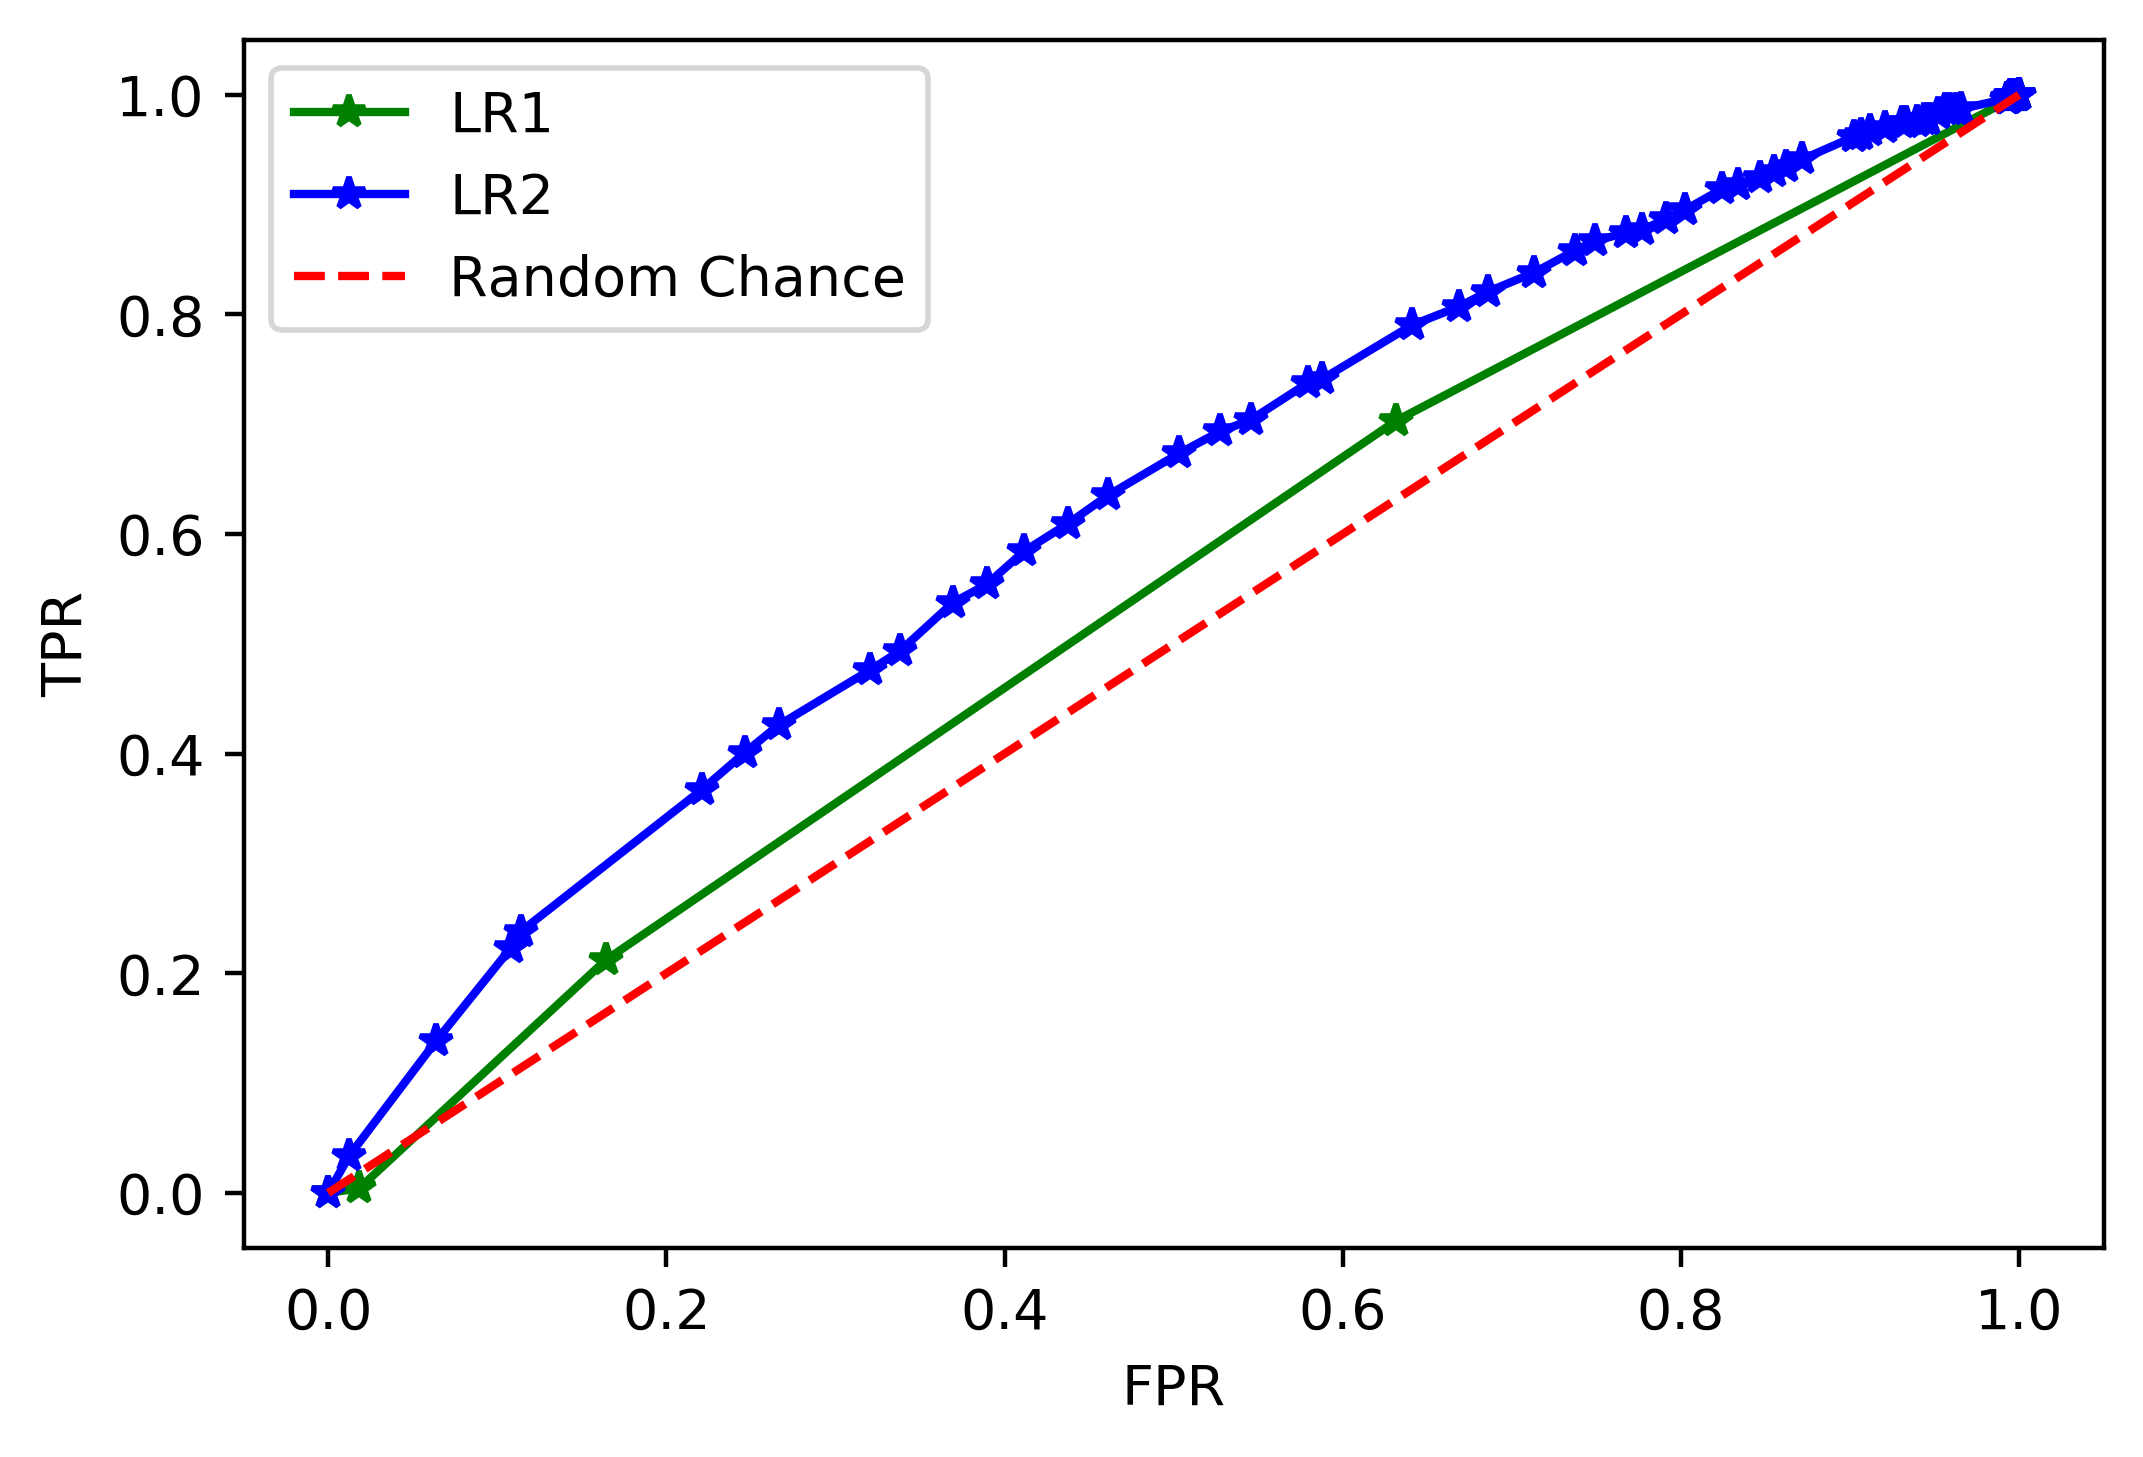

In [231]:
plt.plot (fpr, tpr, 'g*-')
plt.plot (fpr2, tpr2, 'b*-')
plt.plot ( [0,1], [0,1], 'r--')
plt.legend (['LR1','LR2', 'Random Chance'])
plt.xlabel ('FPR')
plt.ylabel ('TPR')

##### Calculate data for the Precision-Recall Curve

In [236]:
#help (metrics.precision_recall_curve)
precision, recall, thresholds = metrics.precision_recall_curve ( y_test, probs, 1 )

Text(0.5, 0, 'recall')

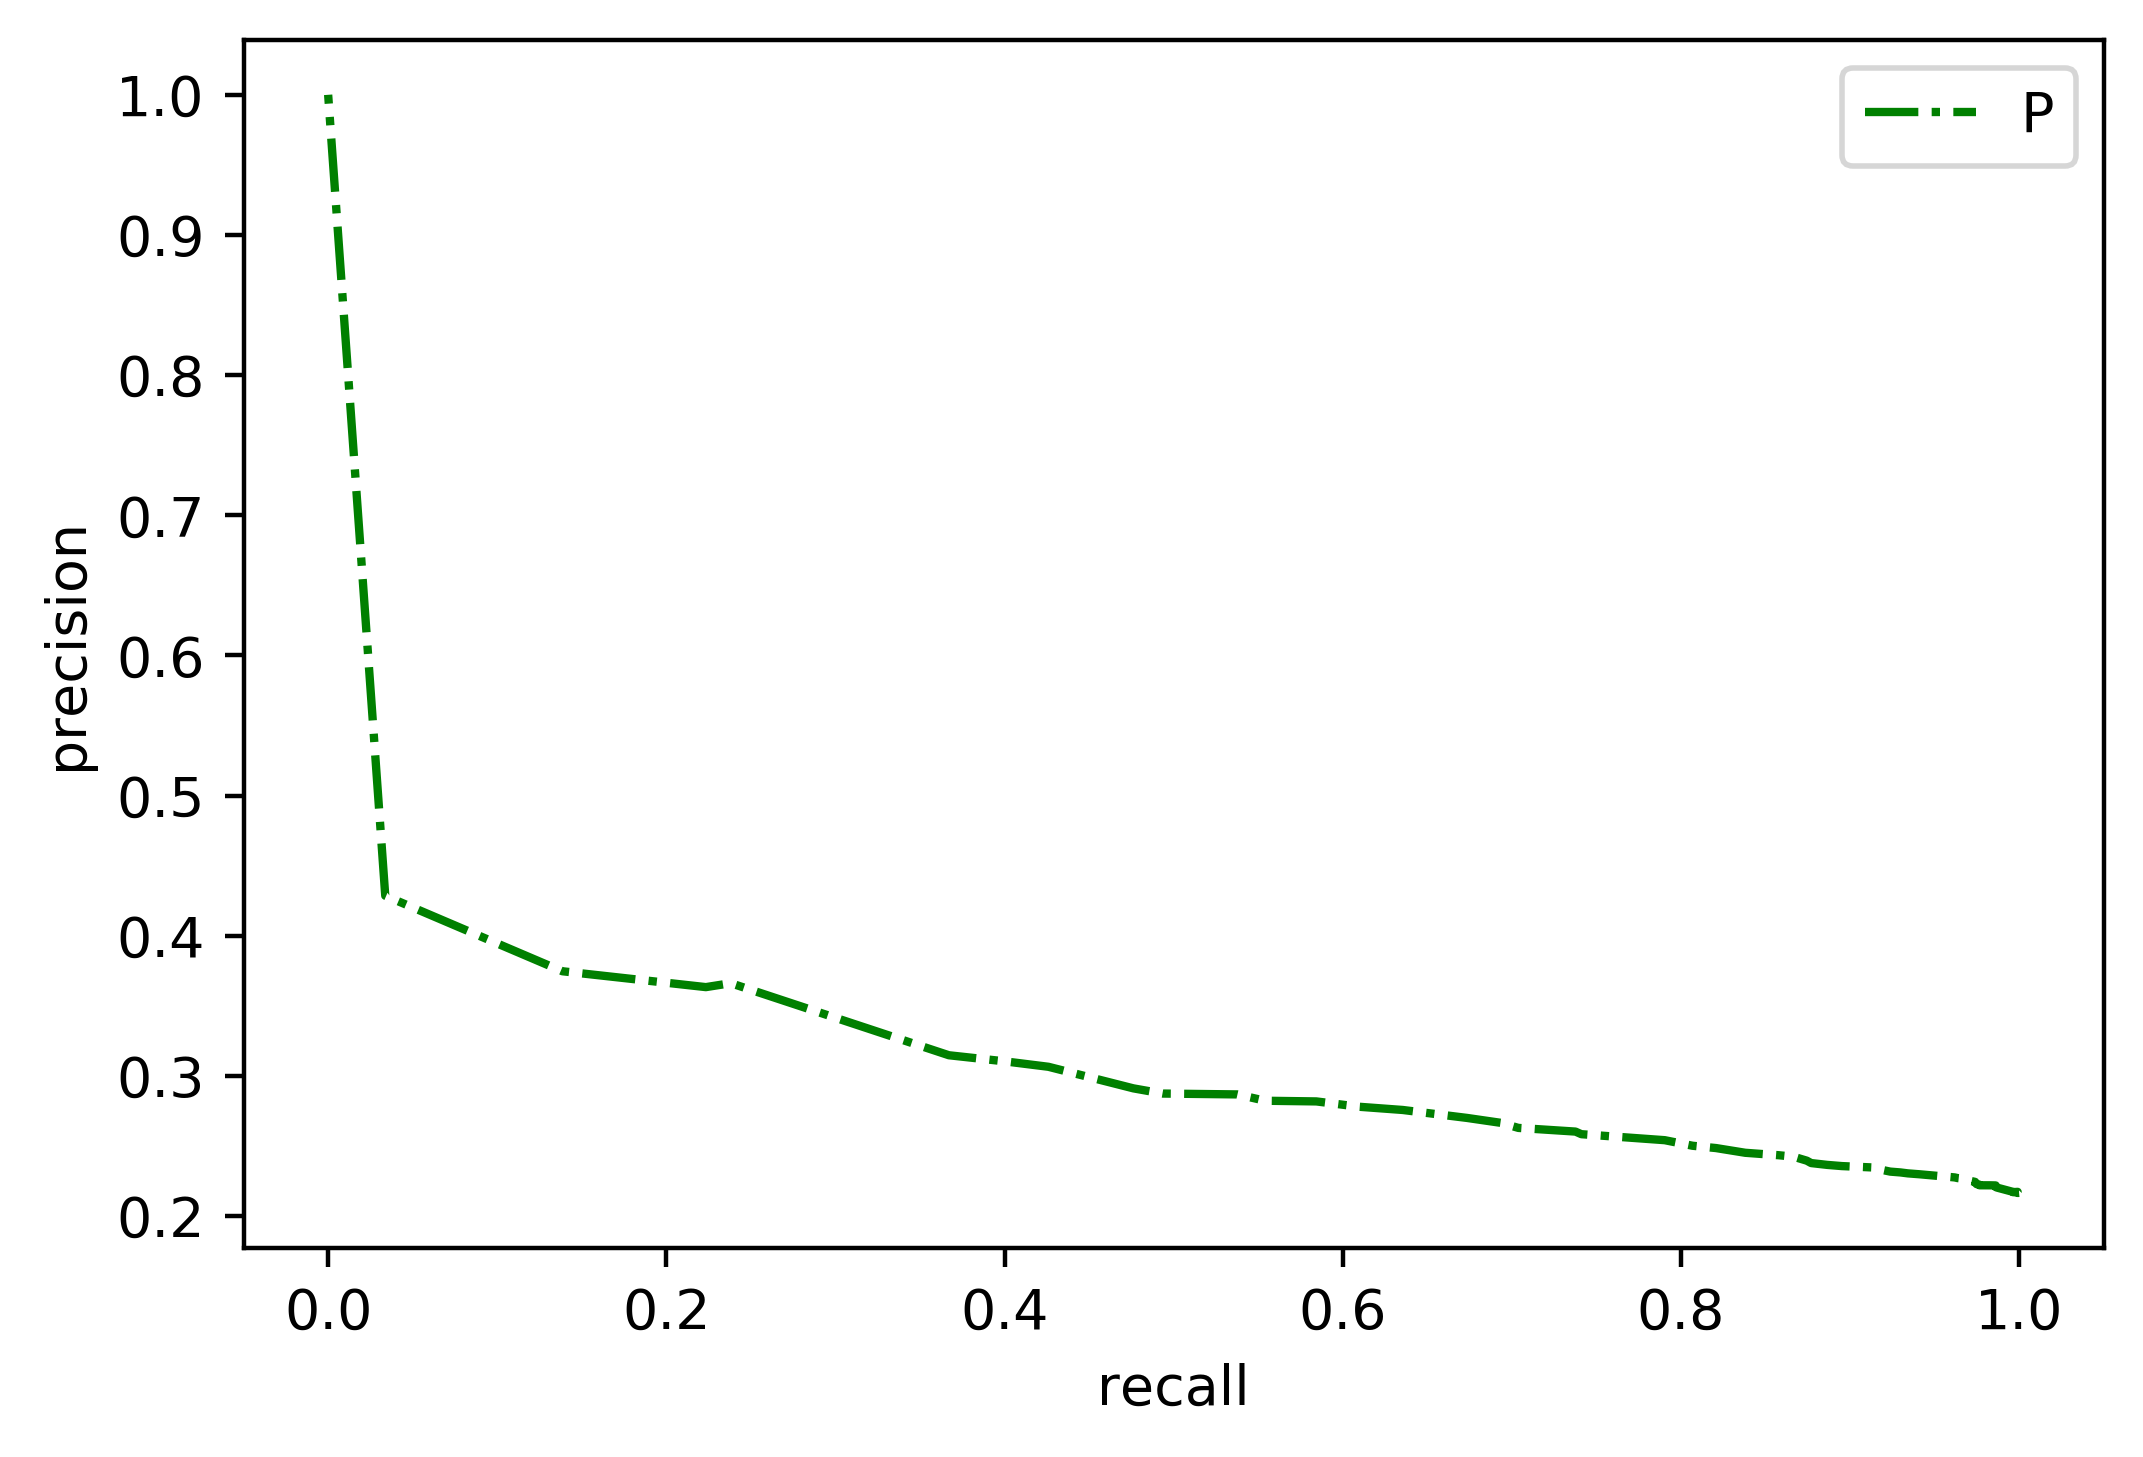

In [246]:
plt.plot (recall, precision, 'g-.')
#plt.plot ( [0,1], [0,1], 'r--')
plt.legend ('PR Curve')
plt.ylabel ('precision')
plt.xlabel ('recall')
#pllt.title ( 'Precision and Recalll for LR with LIMIT_BAL' )

In [247]:
metrics.auc ( recall, precision)

0.31566964427378624


#### Caculate ROC AUC for training set

In [260]:
y_train_pred_probs = lr2.predict_proba ( X_train)
metrics.roc_auc_score ( y_train, y_train_pred_probs[:,1]  )



0.6182918113358344

#### similar to the train ROC AUC value